<a href="https://colab.research.google.com/github/Parry-97/Parry-97/blob/main/Progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Import librerie utilizzate

In [ ]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

#general
import io
import pandas as pd
pd.options.mode.chained_assignment = None 
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
#pd.set_option('display.max_rows', None)
#pd.set_option('max_rows', 99999)
#pd.set_option('max_colwidth', 400)

#graphics
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#EDA e preprocessing
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#metriche e visualizzazione dei risultati
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold

#support vector machines
from sklearn.svm import SVC

#decision trees & random forest
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC

#NN
from sklearn.neural_network import MLPClassifier

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier as GBC

#clustering
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift


import nltk, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from pandas.core.construction import is_empty_data
from pandas.core.arrays import string_

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Funzioni utlizzate

In [ ]:
def contiene(array, n):
    for i in range(0,len(array)):
        if array[i] == n:
            return True
    return False

# Versione 1.0 (clustering con duplicati)

## Caricamento e visualizzazione dataset

In [ ]:
TITLES_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles.csv'
CREDITS_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/credits.csv'
data_titles = pd.read_csv(TITLES_PATH)
data_credits = pd.read_csv(CREDITS_PATH)

In [ ]:
data_titles.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965        8.18  
2           10.010        7.30  
3           15.461        7.81  
4           20.398        7.60

In [ ]:
data_titles.tail()

id                                      title   type  \
5845  tm1014599                                  Fine Wine  MOVIE   
5846   tm898842                                C/O Kaadhal  MOVIE   
5847  tm1059008                                    Lokillo  MOVIE   
5848  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5849   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
5845  A beautiful love story that can happen between...          2021   
5846  A heart warming film that explores the concept...          2021   
5847  A controversial TV host and comedian who has b...          2021   
5848  Jamie Foxx, David Alan Grier and more from the...          2021   
5849  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime                             genres  \
5845               NaN      100               ['romance', 'drama']   
5846               NaN      134                          ['drama']   
5847               NaN       90                         ['comedy']   
5848             PG-13       37                                NaN   
5849               NaN        7  ['family', 'animation', 'comedy']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
5845               ['NG']      NaN  tt13857480         6.8        45.0   
5846                  NaN      NaN  tt11803618         7.7       348.0   
5847               ['CO']      NaN  tt14585902         3.8        68.0   
5848               ['US']      NaN         NaN         NaN         NaN   
5849                  NaN      1.0  tt13711094         7.8        18.0   

      tmdb_popularity  tmdb_score  
5845            1.466         NaN  
5846              NaN         NaN  
5847           26.005         6.3  
5848            1.296        10.0  
5849            2.289        10.0

In [ ]:
len(data_credits)

77801

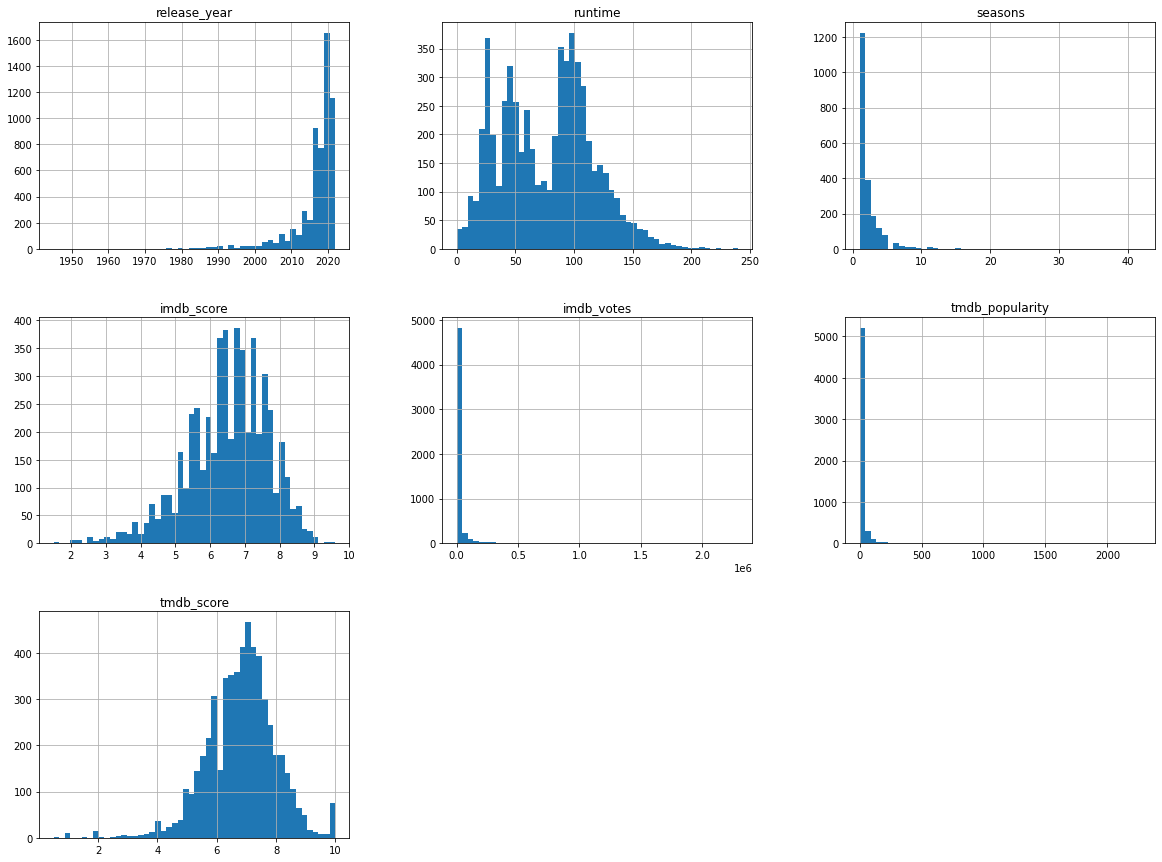

In [ ]:
#data_titles.hist()
%matplotlib inline
import matplotlib.pyplot as plt
data_titles.hist(bins=50, figsize=(20,15))
plt.show()

## Gestione missing values

Controlliamo quante colonne contengono almeno un valore nullo

In [ ]:
missing_data_titles = data_titles.columns[data_titles.isnull().any()]
print('dati mancanti = ', len(missing_data_titles))

dati mancanti =  11


In [ ]:
data_titles.isnull().sum(axis = 0)

id                         0
title                      1
type                       0
description               17
release_year               0
age_certification       2619
runtime                    0
genres                    58
production_countries     229
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

elimino film senza titolo con id -> tm1063792

In [ ]:
data_titles = data_titles[data_titles["title"].notna()]

In [ ]:
data_titles.isnull().sum(axis = 0)

id                         0
title                      0
type                       0
description               16
release_year               0
age_certification       2618
runtime                    0
genres                    57
production_countries     228
seasons                 3743
imdb_id                  403
imdb_score               481
imdb_votes               497
tmdb_popularity           90
tmdb_score               310
dtype: int64

Elimino le righe in credits con id (film) -> tm1063792

In [ ]:
data_credits = data_credits[data_credits.id != "tm1063792"]

NameError: ignored

Count non conta i NaN.
La media non considera i NaN, ovviamente

Per ogni feature calcoliamo la media e assegniamo ai valori NaN questo valore.

In [ ]:
mean_imdb_score = data_titles["imdb_score"].mean()
mean_imdb_votes = data_titles["imdb_votes"].mean()
mean_tmdb_popularity = data_titles["tmdb_popularity"].mean()
mean_tmdb_score = data_titles["tmdb_score"].mean()

data_titles["imdb_score"].fillna(round(mean_imdb_score,2), inplace=True)
data_titles["imdb_votes"].fillna(int(mean_imdb_votes), inplace=True)
data_titles["tmdb_popularity"].fillna(int(mean_tmdb_popularity), inplace=True)
data_titles["tmdb_score"].fillna(round(mean_tmdb_score,2), inplace=True)
data_titles["seasons"].fillna(0, inplace=True)

Gestisco i NaN. Per i film abbiamo messo season = 0

In [ ]:
data_titles.head()

In [ ]:
missing_data_titles = data_titles.columns[data_titles.isnull().any()]
print('dati mancanti = ', len(missing_data_titles))

In [ ]:
data_titles.isnull().sum(axis = 0)

Credits missing values

In [ ]:
missing_data_credits = data_credits.columns[data_credits.isnull().any()]
print('dati mancanti = ', len(missing_data_credits))

In [ ]:
data_credits.isnull().sum(axis = 0)

Duplicati

In [ ]:
dup_data_titles = data_titles.copy()
dup_data_titles.drop_duplicates(inplace=True)

print('Numero totale di istanze duplicate: ', data_titles.shape[0] - dup_data_titles.shape[0])
#data = dup_data.copy()
#data

In [ ]:
dup_data_credits = data_credits.copy()
dup_data_credits.drop_duplicates(inplace=True)

print('Numero totale di istanze duplicate: ', data_credits.shape[0] - dup_data_credits.shape[0])

Non ci sono duplicati

In [ ]:
data_titles

In [ ]:
data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv', index=False)

In [ ]:
data_credits.head()

T inverte righe e colonne

In [ ]:
data_titles.describe().T

In [ ]:
data_titles.info()

## Creiamo il dataset numerico versione 1

Convertiamo in valore numerico i generi, paesi produttori e tipo. Eliminiamo le colonne titolo, descrizione, age certification, ecc. Duplichiamo le righe in modo tale che ogni riga abbia un solo genere e un solo paese produttore.

In [ ]:
data_titles

id                                      title   type  \
0      ts300399        Five Came Back: The Reference Films   SHOW   
1       tm84618                                Taxi Driver  MOVIE   
2      tm154986                                Deliverance  MOVIE   
3      tm127384            Monty Python and the Holy Grail  MOVIE   
4      tm120801                            The Dirty Dozen  MOVIE   
...         ...                                        ...    ...   
5845  tm1014599                                  Fine Wine  MOVIE   
5846   tm898842                                C/O Kaadhal  MOVIE   
5847  tm1059008                                    Lokillo  MOVIE   
5848  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5849   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5845  A beautiful love story that can happen between...          2021   
5846  A heart warming film that explores the concept...          2021   
5847  A controversial TV host and comedian who has b...          2021   
5848  Jamie Foxx, David Alan Grier and more from the...          2021   
5849  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime                                       genres  \
0                TV-MA       51                            ['documentation']   
1                    R      114                           ['drama', 'crime']   
2                    R      109  ['drama', 'action', 'thriller', 'european']   
3                   PG       91              ['fantasy', 'action', 'comedy']   
4                  NaN      150                            ['war', 'action']   
...                ...      ...                                          ...   
5845               NaN      100                         ['romance', 'drama']   
5846               NaN      134                                    ['drama']   
5847               NaN       90                                   ['comedy']   
5848             PG-13       37                                          NaN   
5849               NaN        7            ['family', 'animation', 'comedy']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0                  ['US']      1.0         NaN         NaN         NaN   
1                  ['US']      NaN   tt0075314         8.2    808582.0   
2                  ['US']      NaN   tt0068473         7.7    107673.0   
3                  ['GB']      NaN   tt0071853         8.2    534486.0   
4            ['GB', 'US']      NaN   tt0061578         7.7     72662.0   
...                   ...      ...         ...         ...         ...   
5845               ['NG']      NaN  tt13857480         6.8        45.0   
5846                  NaN      NaN  tt11803618         7.7       348.0   
5847               ['CO']      NaN  tt14585902         3.8        68.0   
5848               ['US']      NaN         NaN         NaN         NaN   
5849                  NaN      1.0  tt13711094         7.8        18.0   

      tmdb_popularity  tmdb_score  
0               0.600         NaN  
1              40.965        8.18  
2              10.010        7.30  
3              15.461        7.81  
4              20.398        7.60  
...               ...         ...  
5845            1.466         NaN  
5846              NaN         NaN  
5847           26.005        6.30  
5848            1.296       10.00  
5849            2.289       10.00  

[5850 rows x 15 columns]

In [ ]:
from pandas.core.construction import is_empty_data
from pandas.core.arrays import string_
#data_titles["genres"].value_counts()

data_titles["genres"]
a = []

for riga in data_titles["genres"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  a.append(row)

#a

In [ ]:
c = data_titles

for i in range(0, len(a)):
  if(len(a[i])>1):
    for j in range(0, len(a[i])):
      c = c.append(c.loc[[i] * 1].assign(genres = a[i][j]), ignore_index=True)

for i in range(0, len(a)):
  if(len(a[i])>1):
    c = c.drop(i)

c = c.reset_index()
c = c.drop('index', axis=1)

c

id                                title   type  \
0       ts300399  Five Came Back: The Reference Films   SHOW   
1        tm70993                        Life of Brian  MOVIE   
2        tm14350                     Alexandria… Why?  MOVIE   
3        tm81728                             The Land  MOVIE   
4       tm259855        We Are All for the Fatherland  MOVIE   
...          ...                                  ...    ...   
15143  tm1014599                            Fine Wine  MOVIE   
15144  tm1014599                            Fine Wine  MOVIE   
15145   ts271048   Mighty Little Bheem: Kite Festival   SHOW   
15146   ts271048   Mighty Little Bheem: Kite Festival   SHOW   
15147   ts271048   Mighty Little Bheem: Kite Festival   SHOW   

                                             description  release_year  \
0      This collection includes 12 World War II-era p...          1945   
1      Brian Cohen is an average young Jewish man, bu...          1979   
2      Set against the panoramic backdrop of war-torn...          1979   
3      Set in 1933, the mayor informs the peasants th...          1969   
4      After the 1978 Israeli invasion of Lebanon, ch...          1979   
...                                                  ...           ...   
15143  A beautiful love story that can happen between...          2021   
15144  A beautiful love story that can happen between...          2021   
15145  With winter behind them, Bheem and his townspe...          2021   
15146  With winter behind them, Bheem and his townspe...          2021   
15147  With winter behind them, Bheem and his townspe...          2021   

      age_certification  runtime             genres production_countries  \
0                 TV-MA       51  ['documentation']               ['US']   
1                     R       94         ['comedy']               ['GB']   
2                   NaN      133          ['drama']               ['EG']   
3                   NaN      129          ['drama']               ['EG']   
4                   NaN       74  ['documentation']   ['LB', 'CA', 'FR']   
...                 ...      ...                ...                  ...   
15143               NaN      100            romance               ['NG']   
15144               NaN      100              drama               ['NG']   
15145               NaN        7             family                  NaN   
15146               NaN        7          animation                  NaN   
15147               NaN        7             comedy                  NaN   

       seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  \
0          1.0         NaN         NaN         NaN            0.600   
1          NaN   tt0079470         8.0    395024.0           17.770   
2          NaN   tt0077751         7.2      1727.0            1.370   
3          NaN   tt0064038         8.1      1958.0            1.265   
4          NaN   tt0170799         6.1        47.0            0.600   
...        ...         ...         ...         ...              ...   
15143      NaN  tt13857480         6.8        45.0            1.466   
15144      NaN  tt13857480         6.8        45.0            1.466   
15145      1.0  tt13711094         7.8        18.0            2.289   
15146      1.0  tt13711094         7.8        18.0            2.289   
15147      1.0  tt13711094         7.8        18.0            2.289   

       tmdb_score  
0             NaN  
1             7.8  
2             6.0  
3             8.5  
4             5.2  
...           ...  
15143         NaN  
15144         NaN  
15145        10.0  
15146        10.0  
15147        10.0  

[15148 rows x 15 columns]

In [ ]:
c.tail(30)

id                                         title   type  \
15118  tm1099969                                     Angeliena  MOVIE   
15119   ts319608  The Family That Sings Together: The Camargos   SHOW   
15120   ts319608  The Family That Sings Together: The Camargos   SHOW   
15121   ts319608  The Family That Sings Together: The Camargos   SHOW   
15122   tm846586                                  Layla Majnun  MOVIE   
15123   tm846586                                  Layla Majnun  MOVIE   
15124   ts288861                                     Let's Eat   SHOW   
15125   ts288861                                     Let's Eat   SHOW   
15126   ts273317                                 Pitta Kathalu   SHOW   
15127   ts273317                                 Pitta Kathalu   SHOW   
15128   tm996479                          Tuesdays And Fridays  MOVIE   
15129   tm996479                          Tuesdays And Fridays  MOVIE   
15130   tm985747                                  I Missed You  MOVIE   
15131   tm985747                                  I Missed You  MOVIE   
15132   tm959213                                     My Amanda  MOVIE   
15133   tm959213                                     My Amanda  MOVIE   
15134  tm1053409                          Happiness Ever After  MOVIE   
15135  tm1053409                          Happiness Ever After  MOVIE   
15136   tm985215                          Princess 'Daya'Reese  MOVIE   
15137   tm985215                          Princess 'Daya'Reese  MOVIE   
15138  tm1066324             Super Monsters: Once Upon a Rhyme  MOVIE   
15139  tm1066324             Super Monsters: Once Upon a Rhyme  MOVIE   
15140  tm1097142                                      My Bride  MOVIE   
15141  tm1097142                                      My Bride  MOVIE   
15142  tm1097142                                      My Bride  MOVIE   
15143  tm1014599                                     Fine Wine  MOVIE   
15144  tm1014599                                     Fine Wine  MOVIE   
15145   ts271048            Mighty Little Bheem: Kite Festival   SHOW   
15146   ts271048            Mighty Little Bheem: Kite Festival   SHOW   
15147   ts271048            Mighty Little Bheem: Kite Festival   SHOW   

                                             description  release_year  \
15118  After a string of life-changing revelations, a...          2021   
15119  Surrounded by family and friends, Zezé Di Cama...          2021   
15120  Surrounded by family and friends, Zezé Di Cama...          2021   
15121  Surrounded by family and friends, Zezé Di Cama...          2021   
15122  While in Azerbaijan, Layla, an Indonesian scho...          2021   
15123  While in Azerbaijan, Layla, an Indonesian scho...          2021   
15124  A food-blogging insurance agent encounters a f...          2021   
15125  A food-blogging insurance agent encounters a f...          2021   
15126  Four different women, four journeys of love an...          2021   
15127  Four different women, four journeys of love an...          2021   
15128  Two millennials get into a relationship where ...          2021   
15129  Two millennials get into a relationship where ...          2021   
15130  A woman who was overwhelmed by work and had no...          2021   
15131  A woman who was overwhelmed by work and had no...          2021   
15132  Two unusually close friends share every aspect...          2021   
15133  Two unusually close friends share every aspect...          2021   
15134  Five years later from where we left our charac...          2021   
15135  Five years later from where we left our charac...          2021   
15136  Reese is a con artist from Manila who dreams o...          2021   
15137  Reese is a con artist from Manila who dreams o...          2021   
15138  The Super Monsters rethink exemplary fantasies...          2021   
15139  The Super Monsters rethink exemplary fantasies...          2021   
15140  The story follows a young man and woman w

In [ ]:
b = []

for riga in c["production_countries"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  b.append(row)

b

[['US'],
 ['GB'],
 ['EG'],
 ['EG'],
 ['LB', 'CA', 'FR'],
 ['nan'],
 ['LB'],
 ['CA', 'FR', 'LB'],
 ['IN'],
 ['US'],
 ['GB', 'US'],
 ['US'],
 ['US'],
 ['AR'],
 ['GB'],
 ['US'],
 ['US'],
 ['US'],
 ['FR', 'EG'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['GB'],
 ['FR'],
 ['CO'],
 ['US'],
 ['PS', 'US', 'FR', 'DE'],
 ['GB'],
 ['US'],
 ['FR', 'EG'],
 ['nan'],
 ['TR'],
 ['CA', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['BE', 'US'],
 ['US'],
 ['AU'],
 ['CA', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['CA'],
 ['IN'],
 ['US'],
 ['EG'],
 ['AR', 'ES'],
 ['US'],
 ['US'],
 ['US'],
 ['AU'],
 ['US'],
 ['GB'],
 ['nan'],
 ['CO'],
 ['CA'],
 ['IN'],
 ['US'],
 ['US'],
 ['IN'],
 ['IN'],
 ['US'],
 ['IN'],
 ['US'],
 ['CA'],
 ['Lebanon'],
 ['NG'],
 ['GB'],
 ['CN'],
 ['nan'],
 ['nan'],
 ['ZA'],
 ['TW'],
 ['NG', 'US'],
 ['nan'],
 ['US'],
 ['LB', 'FR'],
 ['TW'],
 ['AR'],
 ['SG'],
 ['LB'],
 ['IN'],
 ['IN'],
 ['FR', 'DE', 'KW', 'PS'],
 [

In [ ]:
d = c

for i in range(0, len(b)):
  if(len(b[i])>1):
    for j in range(0, len(b[i])):
      d = d.append(d.loc[[i] * 1].assign(production_countries = b[i][j]), ignore_index=True)

for i in range(0, len(b)):
  if(len(b[i])>1):
    d = d.drop(i)

d = d.reset_index()
d = d.drop('index', axis=1)

data_titles = d

In [ ]:
from numpy.ma.core import append

a = []

for riga in d["genres"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  a.append(row)



def contiene(array, n):
    for i in range(0,len(array)):
        if array[i] == n:
            return True
    return False

generi = []
for riga in a:
  for genere in riga:
    if(not(contiene(generi, genere))):
      generi.append(genere)

generi.remove('nan')
generi.sort()
generi.insert(0, 'nan')

generi

dizionario_generi = {}

i = 0
for key in generi:
  dizionario_generi[key] = i
  i+=1

dizionario_generi

for i in range(0,len(a)):
  #print(i)
  for j in range(0, len(a[i])):
    #print(i,j)
    a[i][j] = dizionario_generi[str(a[i][j])]
    #print(a[i][j])

valori_generi = []

for i in range(0, len(a)):
  valori_generi.append(a[i][0])



valori_generi

[5,
 3,
 6,
 6,
 3,
 6,
 14,
 3,
 8,
 6,
 3,
 3,
 6,
 6,
 3,
 6,
 6,
 3,
 6,
 13,
 6,
 3,
 6,
 3,
 3,
 5,
 3,
 6,
 3,
 3,
 3,
 0,
 6,
 3,
 3,
 3,
 13,
 17,
 6,
 3,
 3,
 11,
 3,
 3,
 3,
 6,
 2,
 6,
 3,
 6,
 3,
 3,
 5,
 3,
 2,
 5,
 5,
 3,
 3,
 6,
 6,
 5,
 5,
 3,
 11,
 6,
 2,
 3,
 18,
 3,
 3,
 18,
 2,
 13,
 3,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 0,
 6,
 6,
 2,
 0,
 2,
 0,
 0,
 6,
 3,
 13,
 5,
 6,
 11,
 3,
 6,
 5,
 5,
 6,
 13,
 3,
 5,
 3,
 6,
 6,
 6,
 3,
 13,
 3,
 6,
 3,
 3,
 2,
 3,
 6,
 6,
 6,
 2,
 6,
 2,
 3,
 2,
 6,
 3,
 2,
 3,
 6,
 6,
 2,
 6,
 13,
 6,
 12,
 13,
 6,
 3,
 3,
 5,
 2,
 13,
 3,
 2,
 5,
 3,
 2,
 0,
 11,
 6,
 6,
 3,
 6,
 11,
 5,
 5,
 6,
 5,
 3,
 14,
 3,
 5,
 5,
 6,
 11,
 6,
 2,
 3,
 3,
 3,
 0,
 11,
 17,
 3,
 6,
 6,
 3,
 2,
 9,
 3,
 5,
 2,
 3,
 2,
 2,
 3,
 2,
 17,
 0,
 6,
 3,
 3,
 3,
 3,
 13,
 3,
 3,
 3,
 3,
 6,
 6,
 5,
 6,
 3,
 3,
 5,
 13,
 13,
 6,
 3,
 3,
 3,
 2,
 6,
 3,
 3,
 5,
 5,
 3,
 3,
 5,
 6,
 6,
 5,
 3,
 5,
 8,
 3,
 1,
 3,
 1,
 6,
 6,
 3,
 13,
 3,
 17,
 17,
 1,
 3

In [ ]:
file = open('/content/drive/Shareddrives/MLDM Progetto/dizionari/valori_generi.txt', "w")
file.write(str(dizionario_generi))
file.close()

In [ ]:
b = []

for riga in d["production_countries"]:
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")
    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  b.append(row)

def contiene(array, n):
    for i in range(0,len(array)):
        if array[i] == n:
            return True
    return False

paesi = []
for riga in b:
  for paese in riga:
    if(not(contiene(paesi, paese))):
      paesi.append(paese)

paesi.remove('nan')
paesi.sort()
paesi.insert(0, 'nan')

#generi.remove('')

dizionario_paesi = {}

i = 0
for key in paesi:
  dizionario_paesi[key] = i
  i+=1

dizionario_paesi

for i in range(0,len(b)):
  for j in range(0, len(b[i])):
    b[i][j] = dizionario_paesi[str(b[i][j])]


valori_countries = []

for i in range(0, len(b)):
  valori_countries.append(b[i][0])




valori_countries

[102,
 34,
 29,
 29,
 0,
 60,
 46,
 102,
 102,
 102,
 5,
 34,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 34,
 33,
 22,
 102,
 34,
 102,
 0,
 98,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 7,
 102,
 102,
 102,
 16,
 46,
 102,
 29,
 102,
 102,
 102,
 7,
 102,
 34,
 0,
 22,
 16,
 46,
 102,
 102,
 46,
 46,
 102,
 46,
 102,
 16,
 64,
 73,
 34,
 21,
 0,
 0,
 108,
 99,
 0,
 102,
 99,
 5,
 92,
 60,
 46,
 46,
 0,
 83,
 71,
 92,
 46,
 0,
 0,
 102,
 107,
 102,
 102,
 102,
 102,
 58,
 102,
 102,
 99,
 33,
 0,
 102,
 102,
 102,
 33,
 102,
 19,
 29,
 98,
 34,
 108,
 7,
 46,
 102,
 46,
 107,
 46,
 79,
 29,
 92,
 46,
 43,
 46,
 46,
 46,
 90,
 102,
 46,
 102,
 60,
 79,
 0,
 99,
 102,
 102,
 102,
 102,
 45,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 58,
 102,
 98,
 102,
 58,
 102,
 46,
 46,
 102,
 34,
 83,
 19,
 16,
 73,
 102,
 102,
 12,
 92,
 98,
 46,
 46,
 107,
 102,
 16,
 102,
 79,
 46,
 40,
 102,
 92,
 16,
 0,
 46,
 46,
 34,
 0,
 16,
 0,
 0

In [ ]:
file = open('/content/drive/Shareddrives/MLDM Progetto/dizionari/valori_countries.txt', "w")
file.write(str(dizionario_paesi))
file.close()

In [ ]:
"""
data_generi = data_titles[["genres"]]
unique = data_titles["genres"].unique()
unique.sort()
unique[:100]

"""


'\ndata_generi = data_titles[["genres"]]\nunique = data_titles["genres"].unique()\nunique.sort()\nunique[:100]\n\n'

In [ ]:
data_titles

id                                title   type  \
0       ts300399  Five Came Back: The Reference Films   SHOW   
1        tm70993                        Life of Brian  MOVIE   
2        tm14350                     Alexandria… Why?  MOVIE   
3        tm81728                             The Land  MOVIE   
4        ts45948     Monty Python's Fliegender Zirkus   SHOW   
...          ...                                  ...    ...   
17814  tm1045018                                Clash  MOVIE   
17815   tm996479                 Tuesdays And Fridays  MOVIE   
17816   tm996479                 Tuesdays And Fridays  MOVIE   
17817   tm996479                 Tuesdays And Fridays  MOVIE   
17818   tm996479                 Tuesdays And Fridays  MOVIE   

                                             description  release_year  \
0      This collection includes 12 World War II-era p...          1945   
1      Brian Cohen is an average young Jewish man, bu...          1979   
2      Set against the panoramic backdrop of war-torn...          1979   
3      Set in 1933, the mayor informs the peasants th...          1969   
4      Monty Python's Fliegender Zirkus consisted of ...          1972   
...                                                  ...           ...   
17814  A man from Nigeria returns to his family in Ca...          2021   
17815  Two millennials get into a relationship where ...          2021   
17816  Two millennials get into a relationship where ...          2021   
17817  Two millennials get into a relationship where ...          2021   
17818  Two millennials get into a relationship where ...          2021   

      age_certification  runtime             genres production_countries  \
0                 TV-MA       51  ['documentation']               ['US']   
1                     R       94         ['comedy']               ['GB']   
2                   NaN      133          ['drama']               ['EG']   
3                   NaN      129          ['drama']               ['EG']   
4                 TV-MA       43         ['comedy']                  NaN   
...                 ...      ...                ...                  ...   
17814               NaN       88              drama                   CA   
17815               NaN      106            romance                   GB   
17816               NaN      106            romance                   IN   
17817               NaN      106             comedy                   GB   
17818               NaN      106             comedy                   IN   

       seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  \
0          1.0         NaN         NaN         NaN            0.600   
1          NaN   tt0079470         8.0    395024.0           17.770   
2          NaN   tt0077751         7.2      1727.0            1.370   
3          NaN   tt0064038         8.1      1958.0            1.265   
4          1.0   tt0202477         8.1      2151.0            1.487   
...        ...         ...         ...         ...              ...   
17814      NaN  tt14620732         6.1        34.0            1.253   
17815      NaN   tt9176102         4.4       792.0            1.589   
17816      NaN   tt9176102         4.4       792.0            1.589   
17817      NaN   tt9176102         4.4       792.0            1.589   
17818      NaN   tt9176102         4.4       792.0            1.589   

       tmdb_score  
0             NaN  
1             7.8  
2             6.0  
3             8.5  
4             7.0  
...           ...  
17814         NaN  
17815         5.3  
17816         5.3  
17817         5.3  
17818         5.3  

[17819 rows x 15 columns]

In [ ]:
id_film = data_titles["id"]
id_film

0         ts300399
1          tm70993
2          tm14350
3          tm81728
4          ts45948
           ...    
17814    tm1045018
17815     tm996479
17816     tm996479
17817     tm996479
17818     tm996479
Name: id, Length: 17819, dtype: object

In [ ]:
id_film.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/id_film.csv', index=False)

In [ ]:
data_titles["genres"] = valori_generi


In [ ]:
data_titles["production_countries"] = valori_countries

In [ ]:
dizionario_paesi

{'nan': 0,
 'AE': 1,
 'AF': 2,
 'AL': 3,
 'AO': 4,
 'AR': 5,
 'AT': 6,
 'AU': 7,
 'BD': 8,
 'BE': 9,
 'BF': 10,
 'BG': 11,
 'BR': 12,
 'BS': 13,
 'BT': 14,
 'BY': 15,
 'CA': 16,
 'CD': 17,
 'CH': 18,
 'CL': 19,
 'CM': 20,
 'CN': 21,
 'CO': 22,
 'CU': 23,
 'CY': 24,
 'CZ': 25,
 'DE': 26,
 'DK': 27,
 'DZ': 28,
 'EG': 29,
 'ES': 30,
 'FI': 31,
 'FO': 32,
 'FR': 33,
 'GB': 34,
 'GE': 35,
 'GH': 36,
 'GL': 37,
 'GR': 38,
 'GT': 39,
 'HK': 40,
 'HR': 41,
 'HU': 42,
 'ID': 43,
 'IE': 44,
 'IL': 45,
 'IN': 46,
 'IO': 47,
 'IQ': 48,
 'IR': 49,
 'IS': 50,
 'IT': 51,
 'JO': 52,
 'JP': 53,
 'KE': 54,
 'KG': 55,
 'KH': 56,
 'KN': 57,
 'KR': 58,
 'KW': 59,
 'LB': 60,
 'LK': 61,
 'LT': 62,
 'LU': 63,
 'Lebanon': 64,
 'MA': 65,
 'MC': 66,
 'MT': 67,
 'MU': 68,
 'MW': 69,
 'MX': 70,
 'MY': 71,
 'NA': 72,
 'NG': 73,
 'NL': 74,
 'NO': 75,
 'NP': 76,
 'NZ': 77,
 'PE': 78,
 'PH': 79,
 'PK': 80,
 'PL': 81,
 'PR': 82,
 'PS': 83,
 'PT': 84,
 'PY': 85,
 'QA': 86,
 'RO': 87,
 'RS': 88,
 'RU': 89,
 'SA': 90,
 'S

In [ ]:
data_titles[data_titles["title"] == "The Magic School Bus"]

id                 title  type  \
13651  ts22193  The Magic School Bus  SHOW   
13652  ts22193  The Magic School Bus  SHOW   
13653  ts22193  The Magic School Bus  SHOW   
13654  ts22193  The Magic School Bus  SHOW   
13655  ts22193  The Magic School Bus  SHOW   
13656  ts22193  The Magic School Bus  SHOW   
13657  ts22193  The Magic School Bus  SHOW   
13658  ts22193  The Magic School Bus  SHOW   
13659  ts22193  The Magic School Bus  SHOW   
13660  ts22193  The Magic School Bus  SHOW   

                                             description  release_year  \
13651  An eccentric schoolteacher takes her class on ...          1994   
13652  An eccentric schoolteacher takes her class on ...          1994   
13653  An eccentric schoolteacher takes her class on ...          1994   
13654  An eccentric schoolteacher takes her class on ...          1994   
13655  An eccentric schoolteacher takes her class on ...          1994   
13656  An eccentric schoolteacher takes her class on ...          1994   
13657  An eccentric schoolteacher takes her class on ...          1994   
13658  An eccentric schoolteacher takes her class on ...          1994   
13659  An eccentric schoolteacher takes her class on ...          1994   
13660  An eccentric schoolteacher takes her class on ...          1994   

      age_certification  runtime  genres  production_countries  seasons  \
13651              TV-Y       26       2                    16      4.0   
13652              TV-Y       26       2                   102      4.0   
13653              TV-Y       26      15                    16      4.0   
13654              TV-Y       26      15                   102      4.0   
13655              TV-Y       26       3                    16      4.0   
13656              TV-Y       26       3                   102      4.0   
13657              TV-Y       26       8                    16      4.0   
13658              TV-Y       26       8                   102      4.0   
13659              TV-Y       26       9                    16      4.0   
13660              TV-Y       26       9                   102      4.0   

         imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
13651  tt0108847         7.8      9829.0            16.83         7.8  
13652  tt0108847         7.8      9829.0            16.83         7.8  
13653  tt0108847         7.8      9829.0            16.83         7.8  
13654  tt0108847         7.8      9829.0            16.83         7.8  
13655  tt0108847         7.8      9829.0            16.83         7.8  
13656  tt0108847         7.8      9829.0            16.83         7.8  
13657  tt0108847         7.8      9829.0            16.83         7.8  
13658  tt0108847         7.8      9829.0            16.83         7.8  
13659  tt0108847         7.8      9829.0            16.83         7.8  
13660  tt0108847         7.8      9829.0            16.83         7.8

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

data_type = data_titles[["type"]]
ordinal_encoder = OrdinalEncoder(categories = "auto")
data_type_ordinal = ordinal_encoder.fit_transform(data_type)
print(data_type_ordinal[:10])

data_titles["type"] = data_type_ordinal

[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [ ]:
data_titles = data_titles.drop("title", axis = 1)
data_titles = data_titles.drop("id", axis = 1)
data_titles = data_titles.drop("description", axis = 1)
data_titles = data_titles.drop("age_certification", axis = 1)
data_titles = data_titles.drop("imdb_id", axis = 1)

In [ ]:
data_titles

type  release_year  runtime  genres  production_countries  seasons  \
0       1.0          1945       51       5                   102      1.0   
1       0.0          1979       94       3                    34      NaN   
2       0.0          1979      133       6                    29      NaN   
3       0.0          1969      129       6                    29      NaN   
4       1.0          1972       43       3                     0      1.0   
...     ...           ...      ...     ...                   ...      ...   
17814   0.0          2021       88       6                    16      NaN   
17815   0.0          2021      106      14                    34      NaN   
17816   0.0          2021      106      14                    46      NaN   
17817   0.0          2021      106       3                    34      NaN   
17818   0.0          2021      106       3                    46      NaN   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0             NaN         NaN            0.600         NaN  
1             8.0    395024.0           17.770         7.8  
2             7.2      1727.0            1.370         6.0  
3             8.1      1958.0            1.265         8.5  
4             8.1      2151.0            1.487         7.0  
...           ...         ...              ...         ...  
17814         6.1        34.0            1.253         NaN  
17815         4.4       792.0            1.589         5.3  
17816         4.4       792.0            1.589         5.3  
17817         4.4       792.0            1.589         5.3  
17818         4.4       792.0            1.589         5.3  

[17819 rows x 10 columns]

In [ ]:
data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_numeric.csv', index=False)

## Import csv vari

Importiamo i vari dataset, compreso quello numerico creato sopra

In [ ]:
TITLES_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_numeric.csv'
data_titles = pd.read_csv(TITLES_PATH, encoding='latin-1')
TITLES_FINALE_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv'
final_data_titles = pd.read_csv(TITLES_FINALE_PATH, encoding='latin-1')
ID_FILM_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/id_film.csv'
id_film = pd.read_csv(ID_FILM_PATH, encoding='latin-1')
CREDITS_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/credits.csv'
data_credits = pd.read_csv(CREDITS_PATH, encoding='latin-1')
UTENTI_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/utenti.csv'
data_users = pd.read_csv(UTENTI_PATH, encoding='latin-1')

file = open('/content/drive/Shareddrives/MLDM Progetto/dizionari/valori_generi.txt', "r+") 
dizionario_generi = file.read()
dizionario_generi = dizionario_generi.replace("{", "").replace("}", "").replace("'", "").replace(" ", "")
#print(dizionario_generi)

dizionario = {}
for element in dizionario_generi.split(","):
  dizionario[element.split(":")[0]] = int(element.split(":")[1]) 

dizionario_generi = dizionario


file = open('/content/drive/Shareddrives/MLDM Progetto/dizionari/valori_countries.txt', "r+") 
dizionario_countries = file.read()
dizionario_countries = dizionario_countries.replace("{", "").replace("}", "").replace("'", "").replace(" ", "")
#print(dizionario_generi)

dizionario = {}
for element in dizionario_countries.split(","):
  dizionario[element.split(":")[0]] = int(element.split(":")[1]) 

dizionario_countries = dizionario


In [ ]:
data_titles["imdb_score"].fillna("{:.2f}".format(mean_imdb_score), inplace=True)
data_titles["imdb_votes"].fillna(int(mean_imdb_votes), inplace=True)
data_titles["tmdb_popularity"].fillna(int(mean_tmdb_popularity), inplace=True)
data_titles["tmdb_score"].fillna("{:.2f}".format(mean_tmdb_score), inplace=True)
data_titles["seasons"].fillna(0, inplace=True)

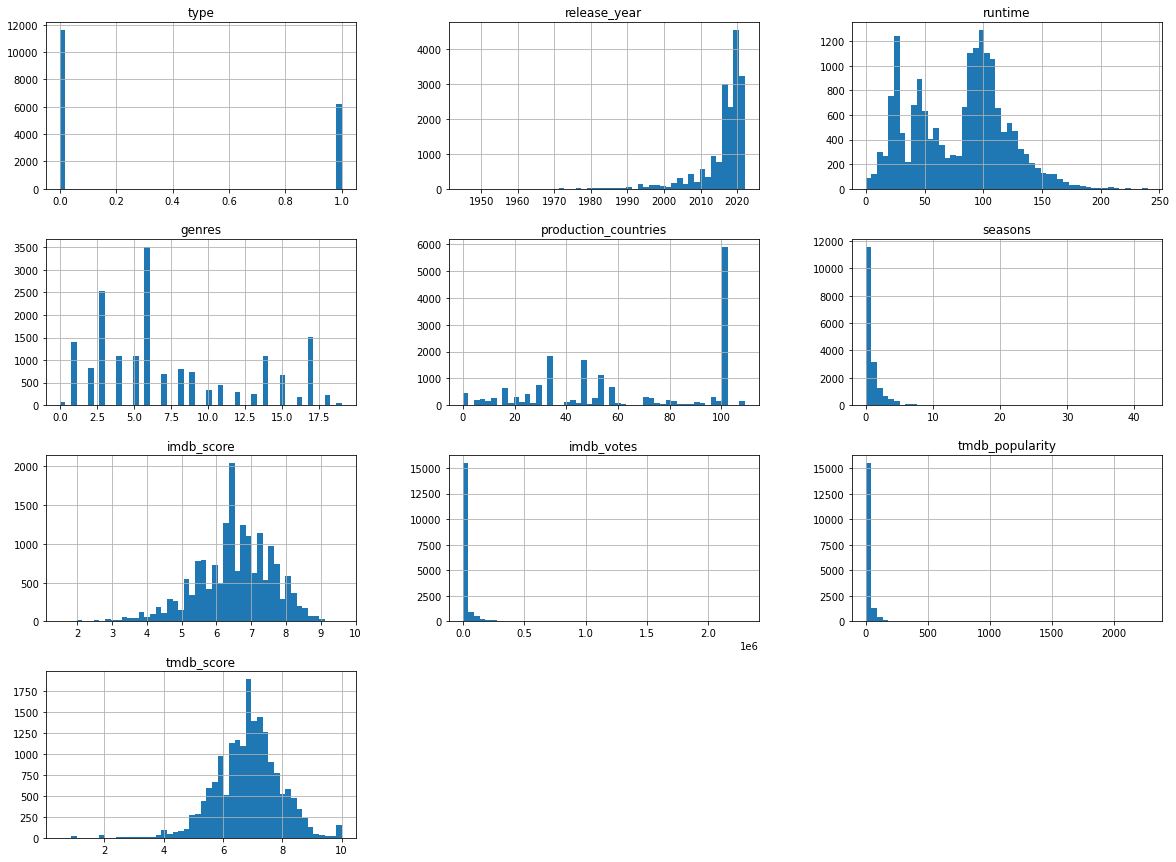

In [ ]:
#data_titles.hist()
%matplotlib inline
import matplotlib.pyplot as plt
data_titles.hist(bins=50, figsize=(20,15))
plt.show()

## Feature scaling

In [ ]:

# Initialise the Scaler
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()
 
# To scale data
minMaxScaler.fit(data_titles)
dati_scalati_m = minMaxScaler.transform(data_titles)
dati_scalati_s = standardScaler.fit_transform(data_titles)

In [ ]:
dati_scalati_m

array([[1.00000000e+00, 0.00000000e+00, 2.12500000e-01, ...,
        1.02143381e-02, 2.59696253e-04, 6.66315789e-01],
       [0.00000000e+00, 4.41558442e-01, 3.91666667e-01, ...,
        1.72179637e-01, 7.81015319e-03, 7.68421053e-01],
       [0.00000000e+00, 4.41558442e-01, 5.54166667e-01, ...,
        7.50579934e-04, 5.98301485e-04, 5.78947368e-01],
       ...,
       [0.00000000e+00, 9.87012987e-01, 4.41666667e-01, ...,
        3.43035080e-04, 6.94606090e-04, 5.05263158e-01],
       [0.00000000e+00, 9.87012987e-01, 4.41666667e-01, ...,
        3.43035080e-04, 6.94606090e-04, 5.05263158e-01],
       [0.00000000e+00, 9.87012987e-01, 4.41666667e-01, ...,
        3.43035080e-04, 6.94606090e-04, 5.05263158e-01]])

## Creo persona scalata con MinMaxScaler

Prendiamo il datset della persona, convertiamo in valore numerico le varie features (genere, paese, tipo), eliminiamo le colonne non necessarie (titolo, descrizione, ecc) e duplichiamo le righe (come prima).
Infine scaliamo i dati e otteniamo un array di array.

In [ ]:
persona = data_users

persona1 = persona[persona.user_id == "u1"]
persona2 = persona[persona.user_id == "u2"]

persona = persona1

persona = persona.reset_index()
persona = persona.drop('index', axis=1)

lista_film_persona = list(persona["film_id"])


persona = persona.drop("user_id", axis = 1)
persona = persona.drop("title", axis = 1)
persona = persona.drop("film_id", axis = 1)
persona = persona.drop("description", axis = 1)
persona = persona.drop("age_certification", axis = 1)
persona = persona.drop("imdb_id", axis = 1)
persona["tmdb_popularity"].fillna(round(data_titles["tmdb_popularity"].mean(),2), inplace=True)
persona["seasons"].fillna(0, inplace=True)

persona

type  release_year  runtime  \
0    SHOW          1999       23   
1   MOVIE          2009      114   
2   MOVIE          2008       95   
3   MOVIE          2007       89   
4   MOVIE          2012      108   
5    SHOW          2013       24   
6    SHOW          2002       23   
7   MOVIE          2007       94   
8   MOVIE          2010       85   
9   MOVIE          2008       90   
10  MOVIE          2009       95   
11  MOVIE          2006       95   
12  MOVIE          2005       96   
13  MOVIE          2011      108   
14  MOVIE          2017      135   
15   SHOW          2012       24   
16   SHOW          2019       25   
17  MOVIE          2008       94   
18  MOVIE          2010       94   
19  MOVIE          2018      108   
20   SHOW          2021       25   
21   SHOW          2018       24   
22   SHOW          2012       23   
23   SHOW          2006       24   
24   SHOW          2014       25   
25  MOVIE          2018       99   
26  MOVIE          2021       79   
27   SHOW          2020       25   
28   SHOW          2019       24   
29  MOVIE          2017       89   
30  MOVIE          2018       91   
31  MOVIE          2018      105   
32   SHOW          2021       25   
33  MOVIE          1988      119   
34  MOVIE          1981      133   
35  MOVIE          1982      144   
36   SHOW          2010       36   
37   SHOW          2015       24   
38  MOVIE          2021       96   
39   SHOW          1998       22   
40   SHOW          2011       23   
41   SHOW          2021       25   

                                               genres production_countries  \
0   ['animation', 'action', 'comedy', 'drama', 'fa...               ['JP']   
1                  ['fantasy', 'action', 'animation']               ['JP']   
2   ['action', 'comedy', 'animation', 'drama', 'fa...               ['JP']   
3          ['comedy', 'drama', 'animation', 'action']               ['JP']   
4                  ['action', 'animation', 'fantasy']               ['JP']   
5   ['action', 'scifi', 'animation', 'horror', 'dr...               ['JP']   
6   ['animation', 'action', 'scifi', 'comedy', 'fa...               ['JP']   
7        ['animation', 'action', 'fantasy', 'family']               ['JP']   
8                  ['animation', 'action', 'fantasy']               ['JP']   
9                  ['fantasy', 'animation', 'action']               ['JP']   
10  ['action', 'comedy', 'drama', 'fantasy', 'anim...               ['JP']   
11                            ['action', 'animation']               ['JP']   
12  ['fantasy', 'action', 'comedy', 'drama', 'anim...               ['JP']   
13  ['action', 'comedy', 'horror', 'thriller', 'an...               ['JP']   
14                     ['fantasy', 'scifi', 'action']               ['JP']   
15  ['scifi', 'animation', 'action', 'comedy', 'dr...               ['JP']   
16  ['scifi', 'action', 'animation', 'horror', 'fa...               ['JP']   
17        ['fantasy', 'action', 'drama', 'animation']               ['JP']   
18                 ['fantasy', 'animation', 'action']               ['JP']   
19                              ['fantasy', 'action']               ['JP']   
20  ['animation', 'action', 'drama', 'sport', 'thr...               ['JP']   
21  ['drama', 'animation', 'action', 'crime', 'spo...               ['JP']   
22  ['scifi', 'action', 'animation', 'drama', 'wes...               ['JP']   
23  ['animation', 'thriller', 'scifi', 'drama', 'f...               ['JP']   
24  ['scifi', 'action', 'animation', 'comedy', 'fa...               ['JP']   
25                 ['fantasy', 'animation', 'action']               ['JP']   
26                 ['animation', 'fantasy', 'action']               ['JP']   
27  ['scifi', 'action', 'animation', 'crime', 'dra...               ['JP']   
28  ['animation', 'action', 'drama', 'war', 'histo...               ['JP']   
29                   ['scifi', 'action', 'animation']               ['JP']   
30  ['scifi', 'fantasy', 'horror', 'an

In [ ]:
from pandas.core.construction import is_empty_data
from pandas.core.arrays import string_
#data_titles["genres"].value_counts()

persona["genres"]
a = []

for riga in persona["genres"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  a.append(row)

a

[['animation', 'action', 'comedy', 'drama', 'fantasy'],
 ['fantasy', 'action', 'animation'],
 ['action', 'comedy', 'animation', 'drama', 'fantasy'],
 ['comedy', 'drama', 'animation', 'action'],
 ['action', 'animation', 'fantasy'],
 ['action', 'scifi', 'animation', 'horror', 'drama', 'fantasy'],
 ['animation', 'action', 'scifi', 'comedy', 'fantasy', 'thriller'],
 ['animation', 'action', 'fantasy', 'family'],
 ['animation', 'action', 'fantasy'],
 ['fantasy', 'animation', 'action'],
 ['action', 'comedy', 'drama', 'fantasy', 'animation'],
 ['action', 'animation'],
 ['fantasy', 'action', 'comedy', 'drama', 'animation'],
 ['action', 'comedy', 'horror', 'thriller', 'animation', 'fantasy'],
 ['fantasy', 'scifi', 'action'],
 ['scifi',
  'animation',
  'action',
  'comedy',
  'drama',
  'fantasy',
  'horror',
  'thriller'],
 ['scifi', 'action', 'animation', 'horror', 'fantasy', 'thriller'],
 ['fantasy', 'action', 'drama', 'animation'],
 ['fantasy', 'animation', 'action'],
 ['fantasy', 'action'],

In [ ]:
c = persona

for i in range(0, len(a)):
  if(len(a[i])>1):
    for j in range(0, len(a[i])):
      c = c.append(c.loc[[i] * 1].assign(genres = a[i][j]), ignore_index=True)

for i in range(0, len(a)):
  if(len(a[i])>1):
    c = c.drop(i)

c = c.reset_index()
c = c.drop('index', axis=1)

c

type  release_year  runtime     genres production_countries  seasons  \
0    SHOW          1999       23  animation               ['JP']     21.0   
1    SHOW          1999       23     action               ['JP']     21.0   
2    SHOW          1999       23     comedy               ['JP']     21.0   
3    SHOW          1999       23      drama               ['JP']     21.0   
4    SHOW          1999       23    fantasy               ['JP']     21.0   
..    ...           ...      ...        ...                  ...      ...   
189  SHOW          2021       25     comedy               ['JP']      1.0   
190  SHOW          2021       25    fantasy               ['JP']      1.0   
191  SHOW          2021       25  animation               ['JP']      1.0   
192  SHOW          2021       25     action               ['JP']      1.0   
193  SHOW          2021       25      scifi               ['JP']      1.0   

     imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0           8.8      117129          143.457        8.76  
1           8.8      117129          143.457        8.76  
2           8.8      117129          143.457        8.76  
3           8.8      117129          143.457        8.76  
4           8.8      117129          143.457        8.76  
..          ...         ...              ...         ...  
189         6.9        1728           56.636        8.30  
190         6.9        1728           56.636        8.30  
191         6.9        1728           56.636        8.30  
192         6.9        1728           56.636        8.30  
193         6.9        1728           56.636        8.30  

[194 rows x 10 columns]

In [ ]:
b = []

for riga in c["production_countries"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  b.append(row)

b

[['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 ['JP'],
 

In [ ]:
d = c

for i in range(0, len(b)):
  if(len(b[i])>1):
    for j in range(0, len(b[i])):
      d = d.append(d.loc[[i] * 1].assign(production_countries = b[i][j]), ignore_index=True)

for i in range(0, len(b)):
  if(len(b[i])>1):
    d = d.drop(i)

d = d.reset_index()
d = d.drop('index', axis=1)

persona = d



In [ ]:
persona

type  release_year  runtime     genres production_countries  seasons  \
0    SHOW          1999       23  animation               ['JP']     21.0   
1    SHOW          1999       23     action               ['JP']     21.0   
2    SHOW          1999       23     comedy               ['JP']     21.0   
3    SHOW          1999       23      drama               ['JP']     21.0   
4    SHOW          1999       23    fantasy               ['JP']     21.0   
..    ...           ...      ...        ...                  ...      ...   
189  SHOW          2021       25     comedy               ['JP']      1.0   
190  SHOW          2021       25    fantasy               ['JP']      1.0   
191  SHOW          2021       25  animation               ['JP']      1.0   
192  SHOW          2021       25     action               ['JP']      1.0   
193  SHOW          2021       25      scifi               ['JP']      1.0   

     imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0           8.8      117129          143.457        8.76  
1           8.8      117129          143.457        8.76  
2           8.8      117129          143.457        8.76  
3           8.8      117129          143.457        8.76  
4           8.8      117129          143.457        8.76  
..          ...         ...              ...         ...  
189         6.9        1728           56.636        8.30  
190         6.9        1728           56.636        8.30  
191         6.9        1728           56.636        8.30  
192         6.9        1728           56.636        8.30  
193         6.9        1728           56.636        8.30  

[194 rows x 10 columns]

In [ ]:
from numpy.ma.core import append

a = []

for riga in d["genres"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  a.append(row)



for i in range(0,len(a)):
  #print(i)
  for j in range(0, len(a[i])):
    #print(i,j)
    a[i][j] = dizionario_generi[str(a[i][j])]
    #print(a[i][j])

valori_generi = []

for i in range(0, len(a)):
  valori_generi.append(a[i][0])



persona["genres"] = valori_generi

In [ ]:
b = []

for riga in d["production_countries"]:
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")
    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  b.append(row)


for i in range(0,len(b)):
  for j in range(0, len(b[i])):
    b[i][j] = dizionario_countries[str(b[i][j])]


valori_countries = []

for i in range(0, len(b)):
  valori_countries.append(b[i][0])




persona["production_countries"]= valori_countries

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

data_type = persona[["type"]]
ordinal_encoder = OrdinalEncoder(categories = "auto")
data_type_ordinal = ordinal_encoder.fit_transform(data_type)

persona["type"] = data_type_ordinal

In [ ]:
persona

type  release_year  runtime  genres  production_countries  seasons  \
0     1.0          1999       23       2                    53     21.0   
1     1.0          1999       23       1                    53     21.0   
2     1.0          1999       23       3                    53     21.0   
3     1.0          1999       23       6                    53     21.0   
4     1.0          1999       23       9                    53     21.0   
..    ...           ...      ...     ...                   ...      ...   
189   1.0          2021       25       3                    53      1.0   
190   1.0          2021       25       9                    53      1.0   
191   1.0          2021       25       2                    53      1.0   
192   1.0          2021       25       1                    53      1.0   
193   1.0          2021       25      15                    53      1.0   

     imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0           8.8      117129          143.457        8.76  
1           8.8      117129          143.457        8.76  
2           8.8      117129          143.457        8.76  
3           8.8      117129          143.457        8.76  
4           8.8      117129          143.457        8.76  
..          ...         ...              ...         ...  
189         6.9        1728           56.636        8.30  
190         6.9        1728           56.636        8.30  
191         6.9        1728           56.636        8.30  
192         6.9        1728           56.636        8.30  
193         6.9        1728           56.636        8.30  

[194 rows x 10 columns]

In [ ]:

# To scale data
dati_scalati_persona_m = minMaxScaler.transform(persona)
 
# To scale data
#dati_scalati_persona_s = standardScaler.fit_transform(persona)

persona_scalata = dati_scalati_persona_m

## Clustering KMeans

## ricerca iperparametri kmeans

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


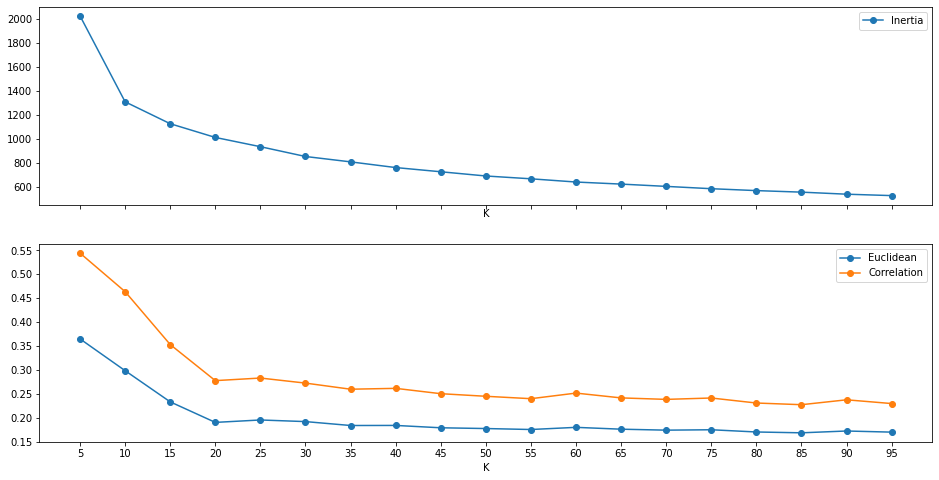

In [ ]:
results = dict()
k_cand = list(np.arange(5,100,5))

for k in k_cand:
    print(k)
    kmeans = KMeans(n_clusters=k, init = 'k-means++').fit(X)
    score0 = kmeans.inertia_
    score1 = silhouette_score(X,kmeans.labels_,metric='euclidean')
    score2 = silhouette_score(X,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0,'s1':score1,'s2':score2}

fig,axs = plt.subplots(2,1,sharex=True,figsize=(16,8))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

Minore è l'inerzia, maggiore è la coerenza dei cluster
https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819

For n_clusters = 5 The average silhouette_score is : 0.3648409355219037
For n_clusters = 10 The average silhouette_score is : 0.27619266013132315
For n_clusters = 15 The average silhouette_score is : 0.21360267052232118
For n_clusters = 20 The average silhouette_score is : 0.19532238667267665
For n_clusters = 25 The average silhouette_score is : 0.1951133120153809
For n_clusters = 30 The average silhouette_score is : 0.19192323377780326
For n_clusters = 35 The average silhouette_score is : 0.18833086232209859
For n_clusters = 40 The average silhouette_score is : 0.18145340512580943
For n_clusters = 45 The average silhouette_score is : 0.18228597222673906
For n_clusters = 50 The average silhouette_score is : 0.17821946553329224
For n_clusters = 55 The average silhouette_score is : 0.18226211162980507
For n_clusters = 60 The average silhouette_score is : 0.17407994675100333
For n_clusters = 65 The average silhouette_score is : 0.17675053542185762
For n_clusters = 70 The average silhouett

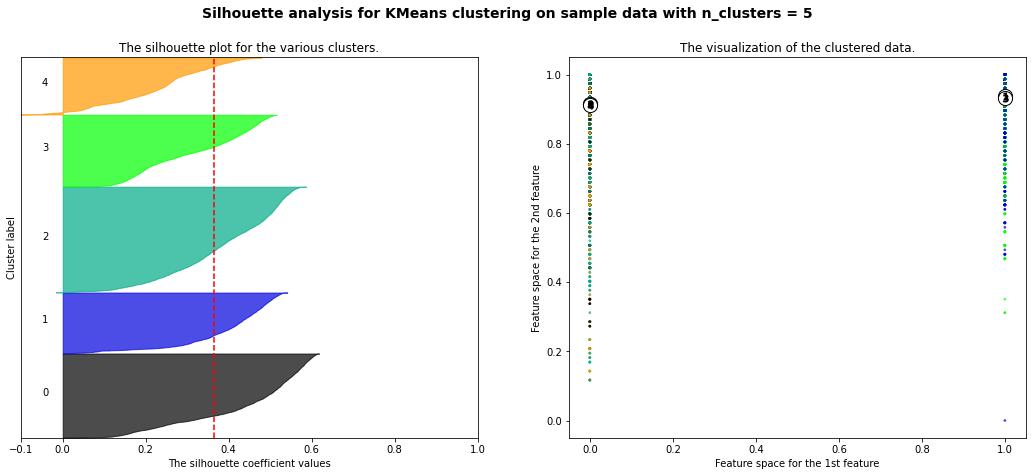

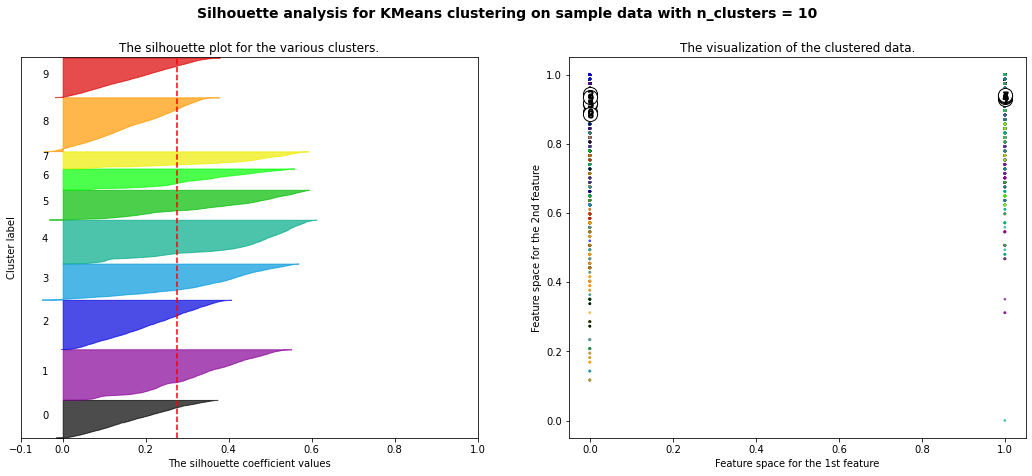

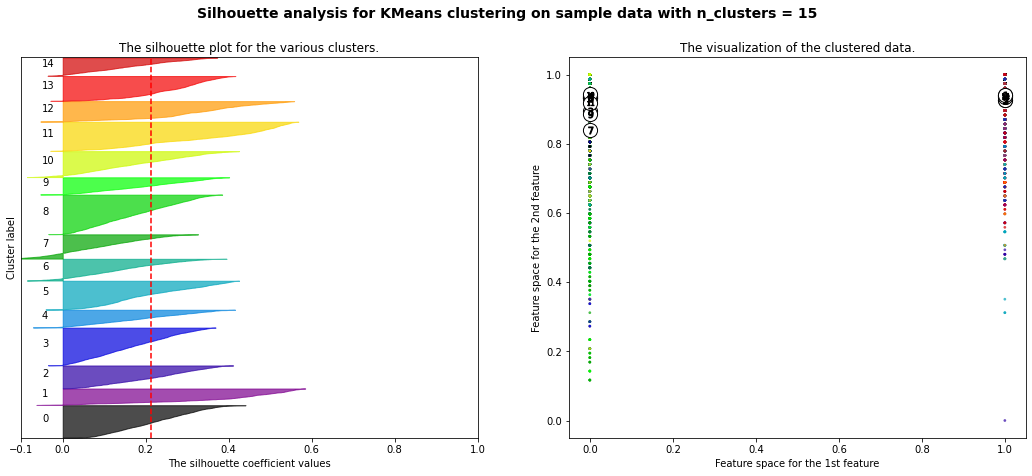

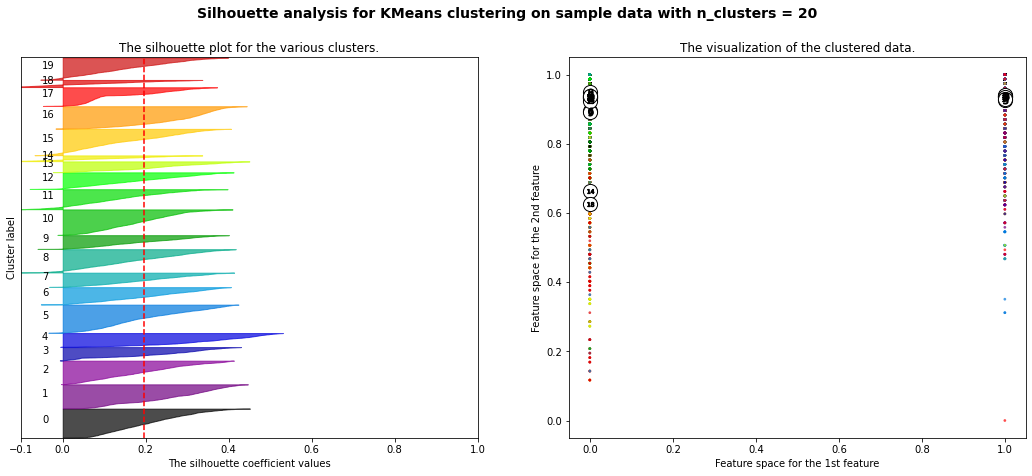

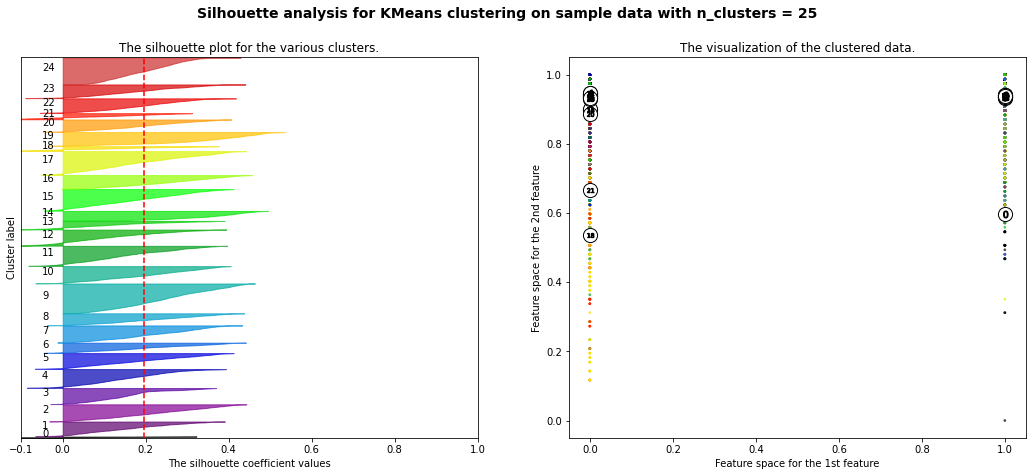

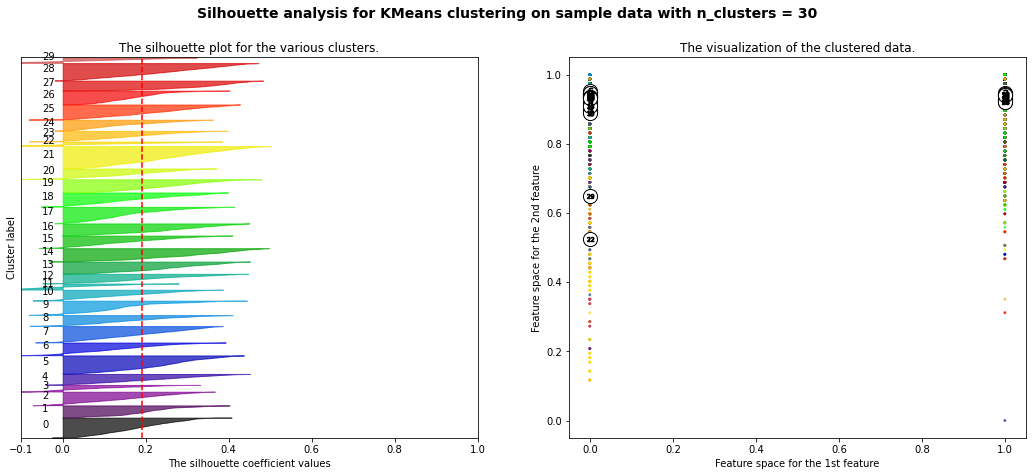

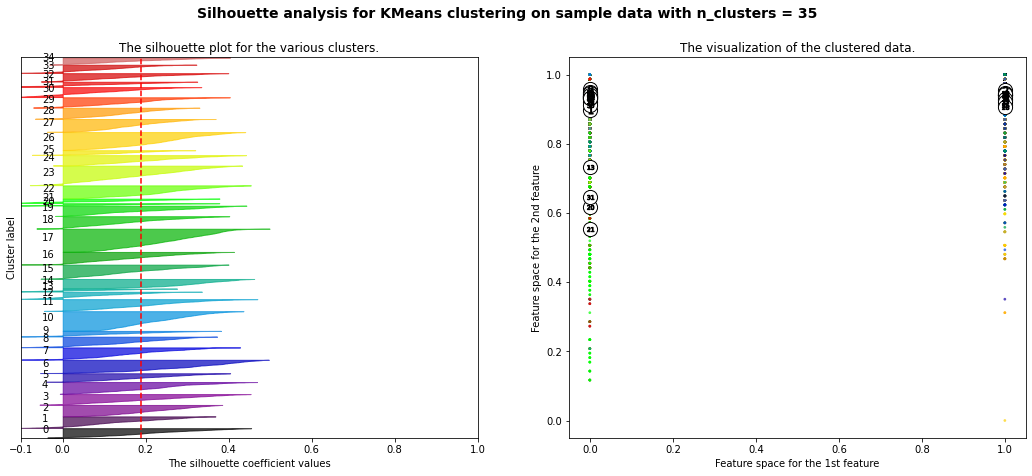

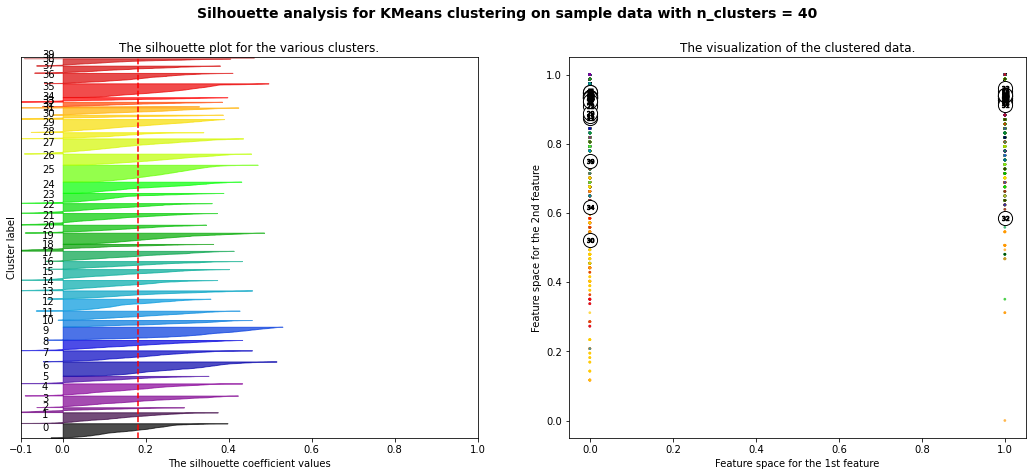

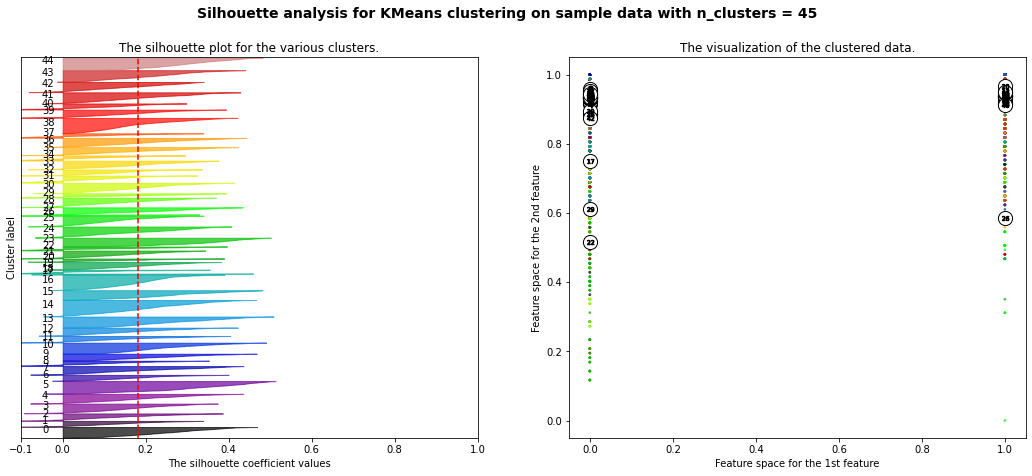

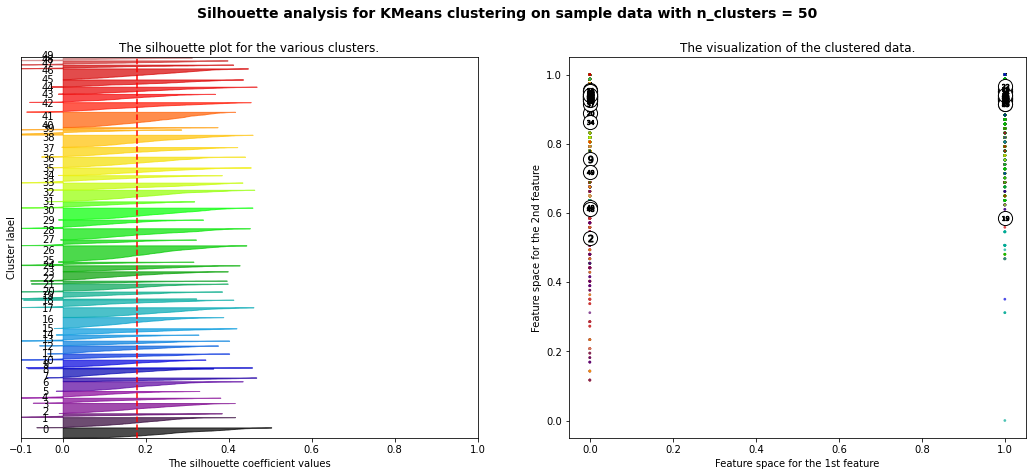

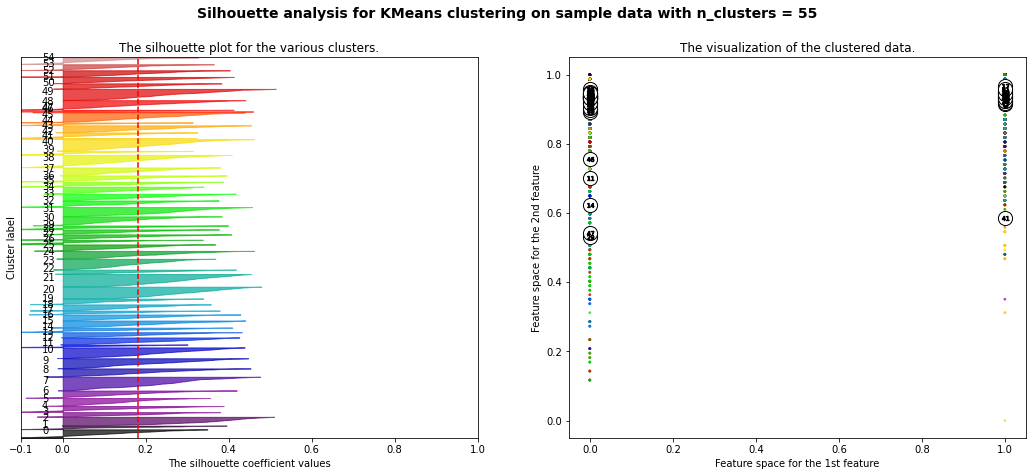

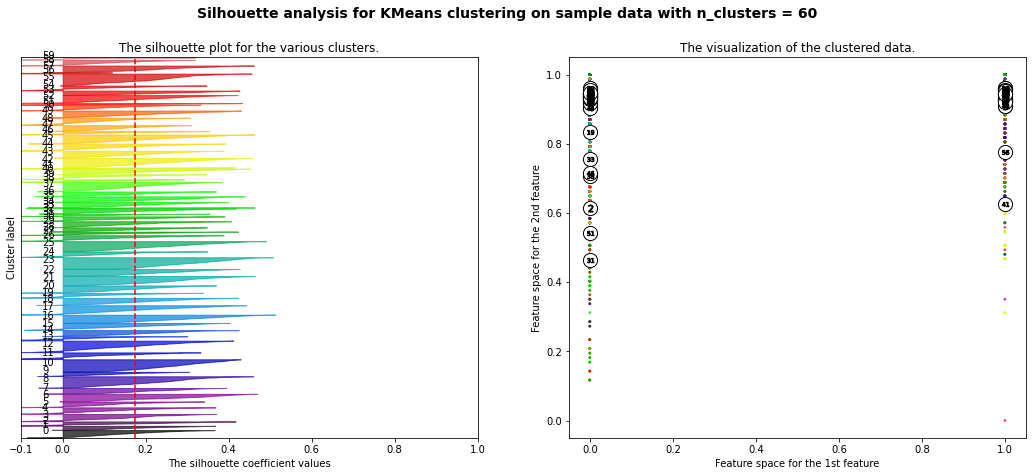

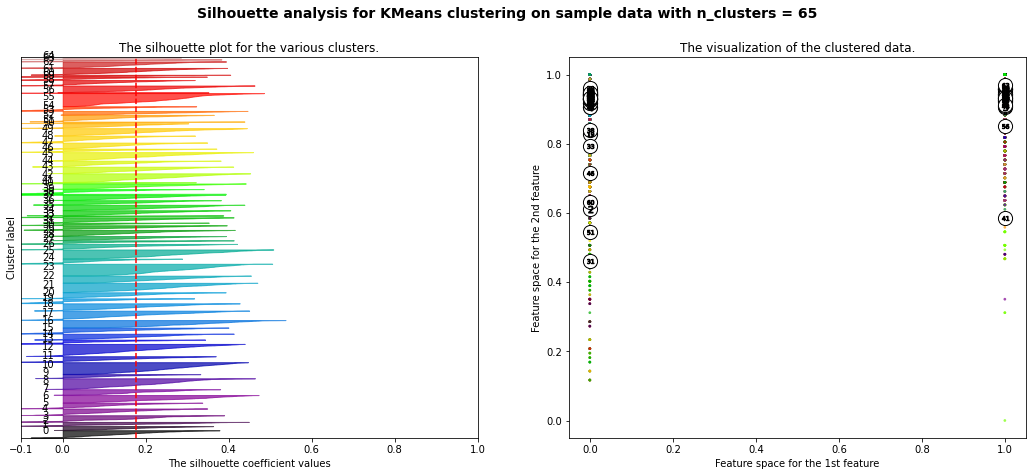

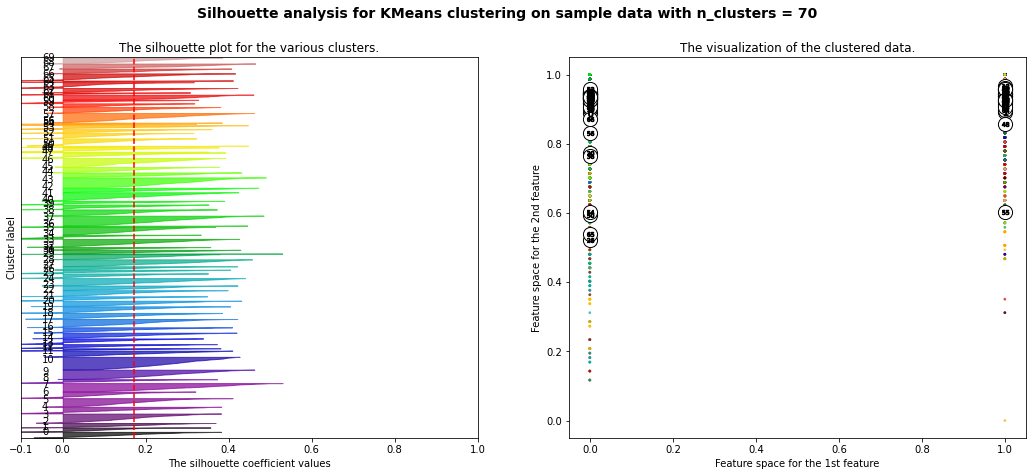

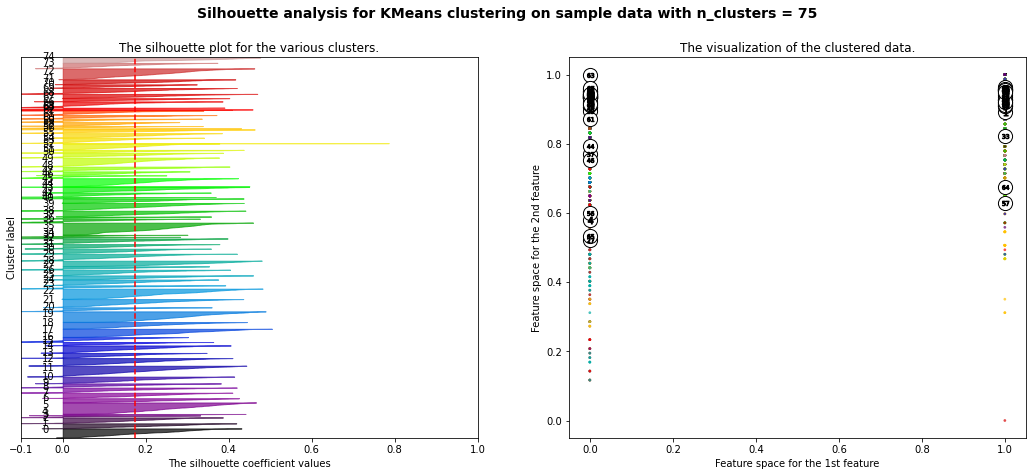

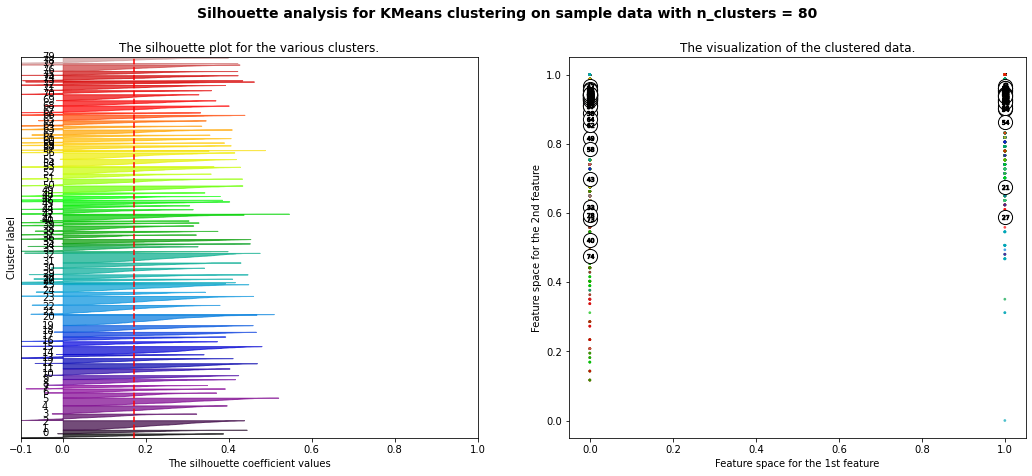

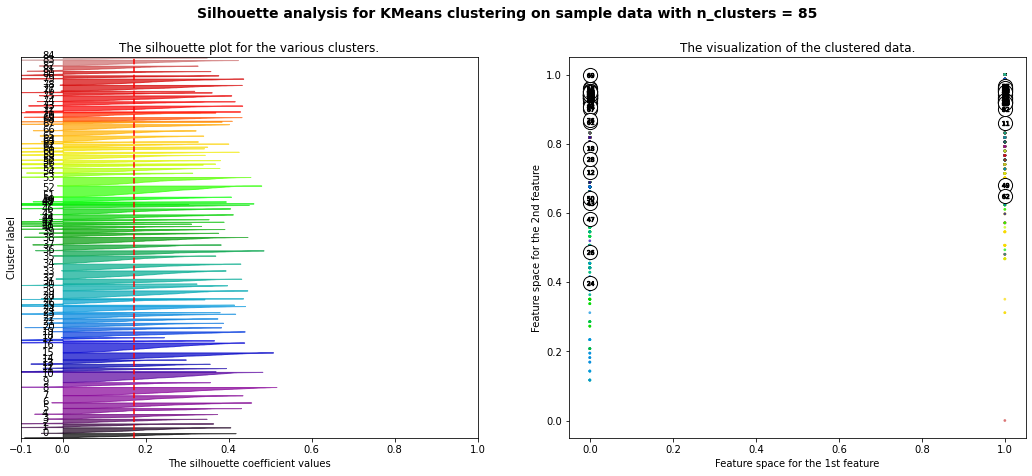

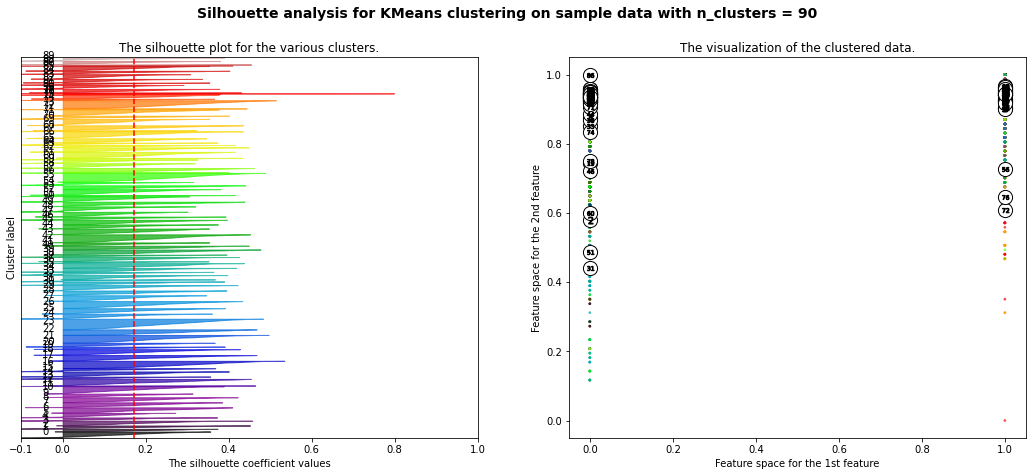

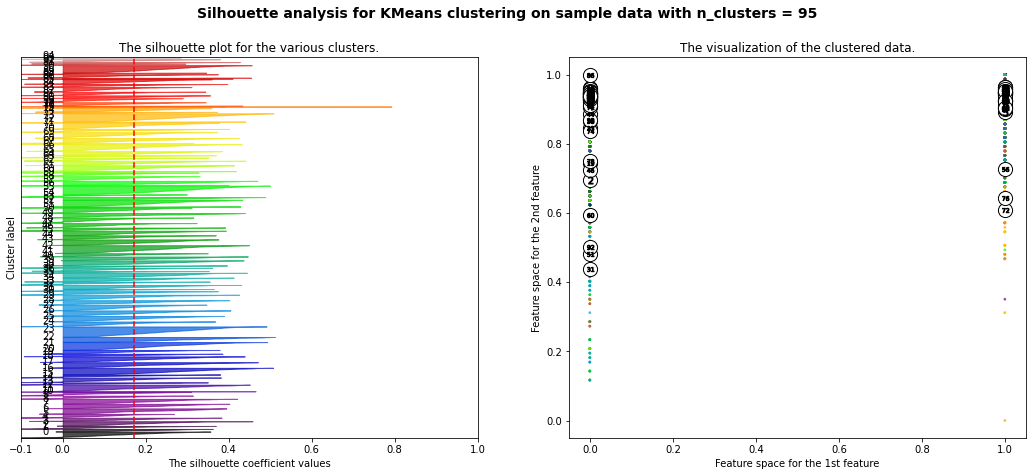

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = list(np.arange(5,100,5))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

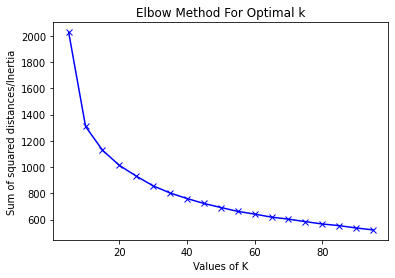

In [ ]:
Sum_of_squared_distances = []
K = range(5,100,5)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

5 0.3648295919826099
10 0.29836291909073615
15 0.21341973731206512
20 0.20717562967509248
25 0.18436905835736334
30 0.18719368993293262
35 0.17925307804704602
40 0.18088282741922335
45 0.1782709403842269
50 0.18346191110498677
55 0.17832004326386702
60 0.17757916367800983
65 0.17387815827727848
70 0.1725982113136988
75 0.17445974198912761
80 0.17015370008603986
85 0.16827501681760412
90 0.16780822512020246
95 0.1716989210149158


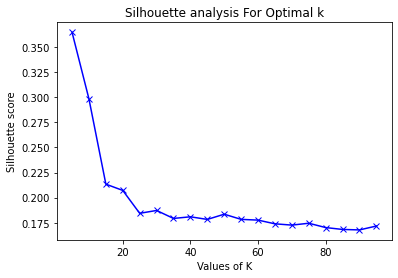

In [ ]:
range_n_clusters = list(np.arange(5,100,5))
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  s = silhouette_score(X, cluster_labels)
  print(num_clusters, s)
  silhouette_avg.append(s)

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

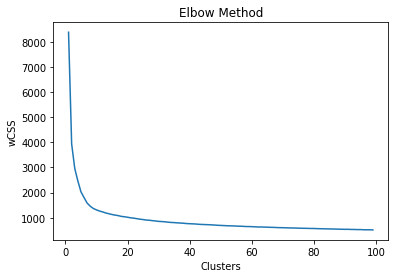

In [ ]:
wCSS = [] #varianza, cerco varianza bassa senza esagerare col numero di cluster
for i in range(1,100):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wCSS.append(kmeans.inertia_) #Collects all of the within cluster sum of squares
plt.plot(range(1,100), wCSS)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wCSS')
plt.show()

## kmeans

applichiamo il kmeans ai dati scalati del dataset numerico

In [ ]:
X = dati_scalati_m

#X = data_titles

k=10
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10)
y_pred=kmeans.fit_predict(X)

quanti elementi ci sono in ogni cluster

In [ ]:
for i in range(0,10):
  print(np.count_nonzero(y_pred == i))


1179
2389
2518
1469
1921
795
967
1704
1363
3514


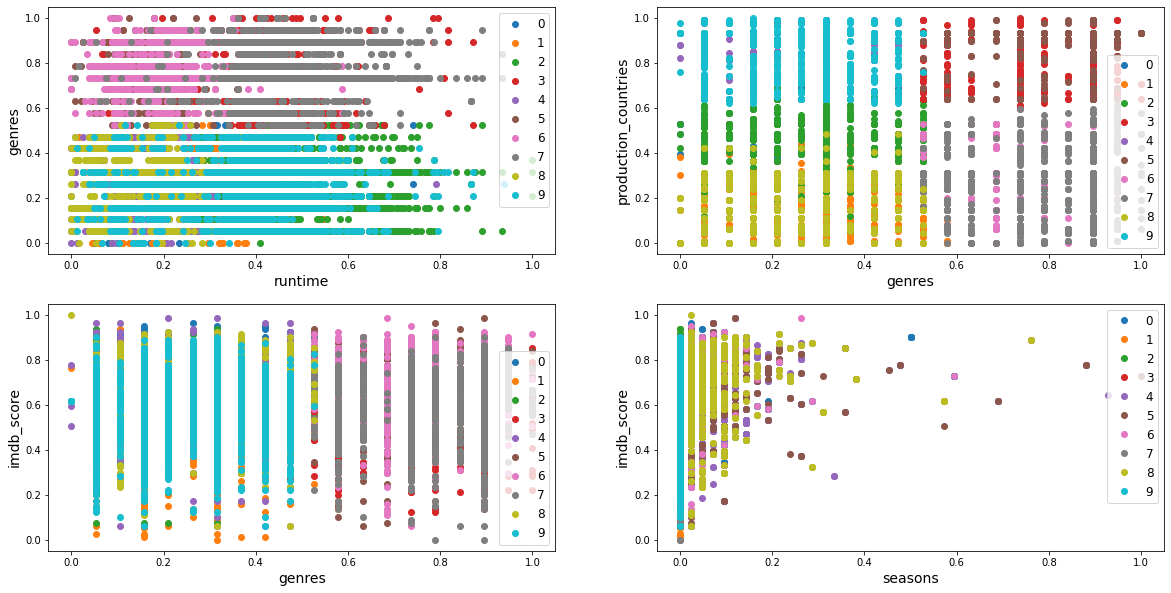

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
for i in range(0, k):
  plt.plot(X[y_pred==i, 2], X[y_pred==i, 3], "o",label=i) #con y==0 prendo solo la classe 0
plt.xlabel("runtime", fontsize=14)
plt.ylabel("genres", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(222)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 4],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [ ]:
y_pred

array([4, 2, 2, ..., 7, 1, 1], dtype=int32)

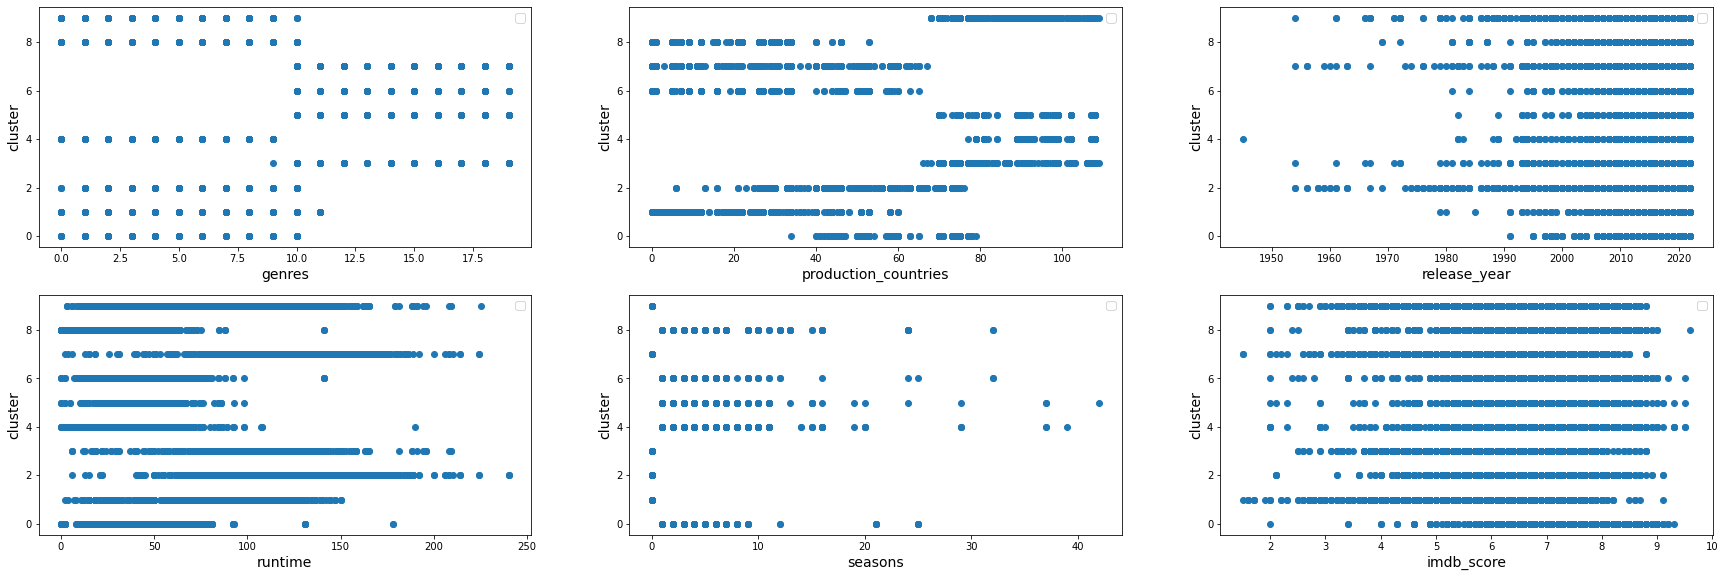

In [ ]:
plt.figure(figsize=(30, 15))

plt.subplot(331)

"""
for i in range(0, k):
  plt.plot(data_titles[y_pred==i,3], y_pred==i,"o", label=i) #con y==0 prendo solo la classe 0
"""
plt.plot(data_titles["genres"],y_pred , "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("genres", fontsize=14)
plt.legend(fontsize=12)


plt.subplot(332)
plt.plot(data_titles["production_countries"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(333)
plt.plot(data_titles["release_year"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("release_year", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(334)
plt.plot(data_titles["runtime"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("runtime", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(335)
plt.plot(data_titles["seasons"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("seasons", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(336)
plt.plot(data_titles["imdb_score"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""
plt.subplot(337)
plt.plot(data_titles["imdb_votes"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_votes", fontsize=14)
plt.legend(fontsize=12)


#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""

plt.show()

In [ ]:
y_pred[:30]

array([4, 2, 2, 2, 8, 2, 7, 4, 4, 9, 1, 2, 9, 9, 9, 9, 9, 4, 9, 5, 9, 9,
       9, 9, 4, 1, 8, 8, 9, 2], dtype=int32)

## Applico il Kmeans alla persona

In [ ]:
y_pred_persona_scalata = kmeans.predict(persona_scalata)
#y_pred_persona_scalata = kmeans.predict(persona)

cluster_previsione = np.unique(y_pred_persona_scalata)
cluster_previsione

conta = np.zeros(k)
for i in range(0,len(y_pred_persona_scalata)):
  conta[y_pred_persona_scalata[i]] = conta[y_pred_persona_scalata[i]] + 1

cluster = {}
for i in range(0,len(conta)):
  #print("Cluster",i,":",conta[i])
  cluster[i] = conta[i]

# ordino cluster
cluster = dict(sorted(cluster.items(), key=lambda item: item[1], reverse=True))
cluster = {x:y for x,y in cluster.items() if y!=0}
cluster

y_pred_persona_scalata

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 6,
       0, 6, 0, 0, 0, 0, 6, 0, 0, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 2, 2, 2, 7, 2, 6, 0, 0,
       0, 0, 0, 6, 6, 6, 0, 0, 6, 0, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 6, 6, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 6, 0, 0,
       0, 6, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 6, 0, 0, 0, 0, 6, 0, 0, 0, 6,
       0, 7, 2, 2, 7, 2, 7, 2, 2, 2, 2, 7, 0, 0, 6, 6, 7, 2, 2, 2, 7, 2,
       7, 2, 2, 7, 2, 2, 7, 2, 7, 6, 0, 0, 0, 6, 6, 0, 6, 0, 0, 7, 2, 2,
       2, 7, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6], dtype=int32)

In [ ]:
cluster

{2: 77.0, 0: 71.0, 6: 31.0, 7: 15.0}

## roba affinità

In [ ]:
percentuale_affinita = conta/len(y_pred_persona_scalata)*100

percentuale_affinita_attore = {}

for i in range(0, len(percentuale_affinita)):
  percentuale_affinita_attore[i] = percentuale_affinita[i]

percentuale_affinita_attore = {x:y for x,y in percentuale_affinita_attore.items() if y!=0}

percentuale_affinita = percentuale_affinita[percentuale_affinita  != 0]
percentuale_affinita 

array([60.66666667,  2.66666667, 18.66666667,  4.        ,  2.        ,
        6.        ,  6.        ])

per ogni cluster prendo 2 film casuali e li inserisco nel dataset

In [ ]:
predizione = pd.DataFrame()
#predizione.loc[:, "affinity"] = []
for i in cluster_previsione:
  predizione = predizione.append(data_titles.iloc[y_pred == i].sample(2))


predizione

type  release_year  runtime  genres  production_countries  seasons  \
2182    0.0          2002       82       5                   102      0.0   
17510   0.0          2021       83       2                    81      0.0   
8017    1.0          2020       88       9                    34      1.0   
5777    1.0          2018       21       3                    53      1.0   
8383    0.0          2020       99       2                    53      0.0   
169     0.0          2013       63       2                    46      0.0   
11943   1.0          2021       34      14                    51      2.0   
3066    1.0          2011        2      11                    58      5.0   
1920    1.0          2009       42      11                   102      8.0   
7954    1.0          2020       48      15                   102      3.0   
7300    0.0          2017      105      12                   102      0.0   
5243    0.0          2016      130      14                    79      0.0   
5422    1.0          2017       28       6                   102      4.0   
750     1.0          2020       37       3                   102      1.0   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
2182         6.90      6985.0            4.854       6.700  
17510        7.20     42484.0           16.901       7.700  
8017         6.80     45971.0           25.177       7.142  
5777         6.20        27.0           11.922       6.830  
8383         6.40      1942.0          110.860       7.027  
169          8.60         6.0           22.000       6.830  
11943        7.10      3034.0            8.058       7.000  
3066         7.10       615.0            9.644       7.400  
1920         7.70    314422.0          479.354       8.348  
7954         7.40     72031.0           48.220       8.100  
7300         5.30      1072.0            6.917       5.700  
5243         5.90       189.0            1.812       6.500  
5422         8.10     16167.0           17.017       8.100  
750          6.51     23439.0            2.924       7.100

inserisco l'affinità

In [ ]:
id_pred = []

for i in range(0,len(predizione)):
  #print(i)
  id_pred.append(id_film.at[predizione.index[i], "id"])

id_pred


previsione_film = pd.DataFrame()
previsione_film.loc[:, "affinity"] = []

for i in range(0, len(id_pred)):
  previsione_film = previsione_film.append(final_data_titles[final_data_titles.id == id_pred[i]])

previsione_film = previsione_film.reset_index()
previsione_film = previsione_film.drop('index', axis=1)


for i in range(0,len(previsione_film),2):
  previsione_film.at[i:i+1,"affinity"] = percentuale_affinita[int(i/2)]


previsione_film

affinity         id                                     title   type  \
0   60.666667   tm112381                                  Comedian  MOVIE   
1   60.666667  tm1003034        The Witcher: Nightmare of the Wolf  MOVIE   
2    2.666667    ts88379                                   Dracula   SHOW   
3    2.666667    ts82281                                Zoids Wild   SHOW   
4   18.666667   tm878333  Pokémon the Movie: Secrets of the Jungle  MOVIE   
5   18.666667   tm529733       Chhota Bheem and the ShiNobi Secret  MOVIE   
6    4.000000   ts297846   An astrological guide for broken hearts   SHOW   
7    4.000000    ts81858                                     Larva   SHOW   
8    2.000000    ts21247                       The Vampire Diaries   SHOW   
9    2.000000    ts87953                               Locke & Key   SHOW   
10   6.000000   tm233345                         Love Beats Rhymes  MOVIE   
11   6.000000   tm272666                        The Unmarried Wife  MOVIE   
12   6.000000    ts53198                         One Day at a Time   SHOW   
13   6.000000   ts236033                                  #blackAF   SHOW   

                                          description  release_year  \
0   A look at the work of two stand-up comics, Jer...        2002.0   
1   Escaping from poverty to become a witcher, Ves...        2021.0   
2   Transylvania, 1897. The blood-drinking Count D...        2020.0   
3   A quest for freedom and legendary treasure beg...        2018.0   
4   The story of Koko, a young boy raised by Pokém...        2020.0   
5   Prof. Dhoomketu is trying to build a new machi...        2013.0   
6   Mid-thirties and still single (certainly not b...        2021.0   
7   Two curious worms spend their days investigati...        2011.0   
8   The story of two vampire brothers obsessed wit...        2009.0   
9   Three siblings who move into their ancestral e...        2020.0   
10  A young woman dreams of making it big in the w...        2017.0   
11  A woman is torn between trying to save her fai...        2016.0   
12  In a reimagining of the TV classic, a newly si...        2017.0   
13  A father takes an irreverent and honest approa...        2020.0   

   age_certification  runtime  \
0                  R     82.0   
1                NaN     83.0   
2              TV-MA     88.0   
3              TV-Y7     21.0   
4                NaN     99.0   
5                  G     63.0   
6              TV-14     34.0   
7               TV-G      2.0   
8              TV-14     42.0   
9              TV-14     48.0   
10                 R    105.0   
11               NaN    130.0   
12             TV-PG     28.0   
13             TV-MA     37.0   

                                               genres production_countries  \
0                         ['comedy', 'documentation']               ['US']   
1   ['action', 'drama', 'fantasy', 'scifi', 'anima...   ['US', 'PL', 'KR']   
2   ['drama', 'action', 'thriller', 'fantasy', 'ho...               ['GB']   
3          ['action', 'comedy', 'animation', 'scifi']               ['JP']   
4   ['family', 'fantasy', 'animation', 'action', '...               ['JP']   
5                                       ['animation']               ['IN']   
6                               ['romance', 'comedy']               ['IT']   
7   ['comedy', 'family', 'animation', 'drama', 'ho...               ['KR']   
8   ['drama', 'scifi', 'horror', 'romance', 'thril...               ['US']   
9   ['drama', 'thriller', 'scifi', 'horror', 'fant...               ['US']   
10                                 ['music', 'drama']               ['US']   
11                               ['drama', 'romance']               ['PH']   
12                                ['comedy', 'drama']               ['US']   
13                                         ['comedy']               ['US']   

    seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0       0.0   tt0328962        6.90  

In [ ]:
y_pred_persona_scalata

array([0, 0, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6, 0,
       0, 6, 0, 0, 6, 7, 7, 4, 7, 7, 4, 7, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_[9]

array([ 4.16333634e-15,  9.36247470e-01,  3.55407517e-01,  2.18757929e-01,
        8.87117143e-01, -1.38777878e-17,  5.02356061e-01,  7.26890319e-03,
        1.15262350e-02,  5.73877597e-01])

## Previsione film cluster maggioritario con calcolo affinità basato sulla distanza punti

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

indice_cluster_key = 0

lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]])

#index = random.randint(0, lunghezza)

#persona_scalata[y_pred_persona_scalata == keys[0]][index]
min_dist = 100000
min_index = 0
for index in range(0, lunghezza):
  dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index])
  if(dist < min_dist):
    min_dist = dist
    min_index = index



dati_scalati_m[y_pred == keys[indice_cluster_key]]




film_top = pd.DataFrame()
for index in range(0, lunghezza):
  film_utente = persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index]

  distanze_film_affini = []
  film_affini = []
  for point in dati_scalati_m[y_pred == keys[indice_cluster_key]]:
    if(np.linalg.norm(point - film_utente) <= min_dist):
      film_affini.append(point)

      distanze_film_affini.append(np.linalg.norm(point - film_utente))


  indici = []

  indice_film_utente = 0

  for i in range(0, len(dati_scalati_m)):
    for j in range(0, len(film_affini)):
      if((dati_scalati_m[i] == film_affini[j]).all()):
        indici.append(i)

      if((dati_scalati_m[i] == film_utente).all()):
        indice_film_utente = i
      
  id_pred = []


  #scommentare
  """
  id_film_utente = id_film.at[indice_film_utente, "id"]


  film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]
  """


  for i in range(0,len(indici)):
    coppia = []
    coppia.append(id_film.at[indici[i], "id"])
    coppia.append(distanze_film_affini[i])
    id_pred.append(coppia)


  id_pred_unico = []
  id_pred_unico_dist = []

  #id_pred_unico.append(id_pred[0])

  for i in range(0, len(id_pred)):
    if(not (contiene(id_pred_unico, id_pred[i][0]))):
      id_pred_unico.append(id_pred[i][0])
      id_pred_unico_dist.append(id_pred[i][1])
    else:
      for j in range(0, len(id_pred_unico)):
        if(id_pred_unico[j] == id_pred[i][0]):
          if(id_pred_unico_dist[j] > id_pred[i][1]):
            id_pred_unico_dist[j] = id_pred[i][1]
          



  film_vicini = pd.DataFrame()
  film_vicini.loc[:, "affinity"] = []

  for i in range(0, len(id_pred_unico)):
    film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


  film_vicini = film_vicini.reset_index()
  film_vicini = film_vicini.drop('index', axis=1)

    
  for i in range(0, len(film_vicini)):
    film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



  #scommentare
  """
  for i in range(0, len(lista_film_persona)):
      film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]
  """


  film_vicini = film_vicini.reset_index()
  film_vicini = film_vicini.drop('index', axis=1)

  film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)



film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

affinita_film_top = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  affinita_film_top = affinita_film_top.append(film_top[film_top.affinity == max].iloc[0])


affinita_film_top = affinita_film_top.sort_values(by=['affinity'], ascending=False)


affinita_film_top = affinita_film_top.reset_index()
affinita_film_top = affinita_film_top.drop('index', axis=1)

affinita_film_top

affinity        id                                title   type  \
0    100.000000  tm134235              One Piece: Strong World  MOVIE   
1    100.000000  tm134235              One Piece: Strong World  MOVIE   
2    100.000000  tm134235              One Piece: Strong World  MOVIE   
3    100.000000  tm134235              One Piece: Strong World  MOVIE   
4    100.000000  tm134235              One Piece: Strong World  MOVIE   
..          ...       ...                                  ...    ...   
105   90.122353  tm145791                          Miss Granny  MOVIE   
106   90.048749  tm186161                                 Boss  MOVIE   
107   90.040142  tm416341  HiGH&LOW The Movie 3: Final Mission  MOVIE   
108   90.030909  tm184732                           Dhobi Ghat  MOVIE   
109   90.000775  tm850723            Altered Carbon: Resleeved  MOVIE   

                                           description  release_year  \
0    20 years after his escape from Impel Down, the...        2009.0   
1    20 years after his escape from Impel Down, the...        2009.0   
2    20 years after his escape from Impel Down, the...        2009.0   
3    20 years after his escape from Impel Down, the...        2009.0   
4    20 years after his escape from Impel Down, the...        2009.0   
..                                                 ...           ...   
105  An unappreciated old granny magically turns 20...        2014.0   
106  Disowned by his father as a boy, Surya is take...        2013.0   
107  In order to conceal past corruption by the gov...        2017.0   
108  Arun is a reclusive and lonely modern art pain...        2010.0   
109  On the planet Latimer, Takeshi Kovacs must pro...        2020.0   

    age_certification  runtime  \
0               PG-13    114.0   
1               PG-13    114.0   
2               PG-13    114.0   
3               PG-13    114.0   
4               PG-13    114.0   
..                ...      ...   
105               NaN    124.0   
106             PG-13    143.0   
107               NaN    118.0   
108               NaN    102.0   
109               NaN     75.0   

                                                genres production_countries  \
0                   ['fantasy', 'action', 'animation']               ['JP']   
1                   ['fantasy', 'action', 'animation']               ['JP']   
2                   ['fantasy', 'action', 'animation']               ['JP']   
3                   ['fantasy', 'action', 'animation']               ['JP']   
4                   ['fantasy', 'action', 'animation']               ['JP']   
..                                                 ...                  ...   
105  ['drama', 'comedy', 'music', 'family', 'fantasy']               ['KR']   
106             ['comedy', 'drama', 'crime', 'action']               ['IN']   
107                                ['drama', 'action']               ['JP']   
108                                          ['drama']               ['IN']   
109  ['scifi', 'animation', 'crime', 'drama', 'thri...               ['JP']   

     seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0        0.0  tt1485763         7.5      5467.0           39.946         7.5  
1        0.0  tt1485763         7.5      5467.0           39.946         7.5  
2        0.0  tt1485763         7.5      5467.0           39.946         7.5  
3        0.0  tt1485763         7.5      5467.0           39.946         7.5  
4        0.0  tt1485763         7.5      5467.0           39.946         7.5  
..       ...        ...         ...         ...              ...         ...  
105      0.0  tt3516378         7.2      3508.0            6.475         7.4  
106      0.0  tt2571140         5.1     11159.0            3.181         5.7  
107      0.0  tt7624932         7.1       656.0            5.265         6.4  
108      0.0  tt1433810         7.0     13167.0            7.689         6.4  
109      0.0  tt9310328         6.5   

In [ ]:
affinita_film_top.head(30)

## Previsione film di tutti i cluster con calcolo affinità basato sulla distanza punti

In [ ]:
cluster

{8: 77.0, 9: 72.0, 3: 30.0, 4: 15.0}

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

film_top = pd.DataFrame()

for indice_cluster_key in range(0, 2):

  lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]])

  #index = random.randint(0, lunghezza)

  #persona_scalata[y_pred_persona_scalata == keys[0]][index]
  min_dist = 100000
  min_index = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index])
    if(dist < min_dist):
      min_dist = dist
      min_index = index



  dati_scalati_m[y_pred == keys[indice_cluster_key]]



  for index in range(0, lunghezza):
    film_utente = persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []
    for point in dati_scalati_m[y_pred == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= min_dist):
        film_affini.append(point)

        distanze_film_affini.append(np.linalg.norm(point - film_utente))

    if(len(film_affini) > 0):
      indici = []

      indice_film_utente = 0

      for i in range(0, len(dati_scalati_m)):
        for j in range(0, len(film_affini)):
          if((dati_scalati_m[i] == film_affini[j]).all()):
            indici.append(i)

          if((dati_scalati_m[i] == film_utente).all()):
            indice_film_utente = i
          
      id_pred = []

      id_film_utente = id_film.at[indice_film_utente, "id"]


      film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


      for i in range(0,len(indici)):
        coppia = []
        coppia.append(id_film.at[indici[i], "id"])
        coppia.append(distanze_film_affini[i])
        id_pred.append(coppia)


      id_pred_unico = []
      id_pred_unico_dist = []

      #id_pred_unico.append(id_pred[0])

      for i in range(0, len(id_pred)):
        if(not (contiene(id_pred_unico, id_pred[i][0]))):
          id_pred_unico.append(id_pred[i][0])
          id_pred_unico_dist.append(id_pred[i][1])
        else:
          for j in range(0, len(id_pred_unico)):
            if(id_pred_unico[j] == id_pred[i][0]):
              if(id_pred_unico_dist[j] > id_pred[i][1]):
                id_pred_unico_dist[j] = id_pred[i][1]
              



      film_vicini = pd.DataFrame()
      film_vicini.loc[:, "affinity"] = []

      for i in range(0, len(id_pred_unico)):
        film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

        
      for i in range(0, len(film_vicini)):
        film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



      for i in range(0, len(lista_film_persona)):
          film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

      film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)

  print(1)
  film_top.head(30)




film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

kmeans_affinita_film_top = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  kmeans_affinita_film_top = kmeans_affinita_film_top.append(film_top[film_top.affinity == max].iloc[0])


kmeans_affinita_film_top = kmeans_affinita_film_top.sort_values(by=['affinity'], ascending=False)


kmeans_affinita_film_top = kmeans_affinita_film_top.reset_index()
kmeans_affinita_film_top = kmeans_affinita_film_top.drop('index', axis=1)

kmeans_affinita_film_top

1
1


affinity        id                                         title   type  \
0    98.308891  ts225669                                Dragon's Dogma   SHOW   
1    98.057254  tm167944  Berserk: The Golden Age Arc III - The Advent  MOVIE   
2    97.934901  ts242244                             Japan Sinks: 2020   SHOW   
3    97.342150  ts246178                                          Eden   SHOW   
4    96.422947   ts86164                                     Hero Mask   SHOW   
..         ...       ...                                           ...    ...   
189  90.048749  tm186161                                          Boss  MOVIE   
190  90.040142  tm416341           HiGH&LOW The Movie 3: Final Mission  MOVIE   
191  90.030909  tm184732                                    Dhobi Ghat  MOVIE   
192  90.015769   ts77219                                Part-Time Idol   SHOW   
193  90.000775  tm850723                     Altered Carbon: Resleeved  MOVIE   

                                           description  release_year  \
0    Ethan sets out to vanquish the Dragon that too...        2020.0   
1    A year has passed since Guts parted ways with ...        2013.0   
2    Based on Sakyo Komatsu's 1973 bestseller sci-f...        2020.0   
3    Thousands of years in the future, a city known...        2021.0   
4    After a rash of mysterious deaths, Crown prose...        2018.0   
..                                                 ...           ...   
189  Disowned by his father as a boy, Surya is take...        2013.0   
190  In order to conceal past corruption by the gov...        2017.0   
191  Arun is a reclusive and lonely modern art pain...        2010.0   
192  This drama takes place in fictional entertainm...        2017.0   
193  On the planet Latimer, Takeshi Kovacs must pro...        2020.0   

    age_certification  runtime  \
0                 NaN     26.0   
1               NC-17    110.0   
2               TV-MA     26.0   
3               TV-PG     25.0   
4               TV-14     25.0   
..                ...      ...   
189             PG-13    143.0   
190               NaN    118.0   
191               NaN    102.0   
192             TV-14     40.0   
193               NaN     75.0   

                                                genres production_countries  \
0                     ['action', 'scifi', 'animation']               ['JP']   
1    ['drama', 'fantasy', 'animation', 'action', 'r...               ['JP']   
2            ['action', 'scifi', 'animation', 'drama']               ['JP']   
3    ['animation', 'drama', 'scifi', 'reality', 'fa...               ['JP']   
4    ['animation', 'action', 'thriller', 'scifi', '...               ['JP']   
..                                                 ...                  ...   
189             ['comedy', 'drama', 'crime', 'action']               ['IN']   
190                                ['drama', 'action']               ['JP']   
191                                          ['drama']               ['IN']   
192             ['drama', 'family', 'music', 'comedy']               ['KR']   
193  ['scifi', 'animation', 'crime', 'drama', 'thri...               ['JP']   

     seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0        1.0         NaN        6.51     23439.0           16.589         7.2  
1        0.0   tt2358913        7.80     10173.0           41.099         7.6  
2        1.0  tt12031040        6.40      2992.0           11.820         7.3  
3        1.0  tt10545250        6.60      1159.0           11.578         7.0  
4        2.0   tt9316078        6.10       675.0            4.779         6.3  
..       ...         ...         ...         ...              ...         ...  
189      0.0   tt2571140        5.10     11159.0            3.181         5.7  
190      0.0   tt7624932        7.10       656.0            5.265         6.4  
191      0.0   tt1433810        7.00     13167.0            7.689         6.4  
192      1

In [ ]:
kmeans_affinita_film_top.head(20)

affinity        id                                              title  \
0   98.308891  ts225669                                     Dragon's Dogma   
1   98.057254  tm167944       Berserk: The Golden Age Arc III - The Advent   
2   97.934901  ts242244                                  Japan Sinks: 2020   
3   97.342150  ts246178                                               Eden   
4   96.422947   ts86164                                          Hero Mask   
5   96.395414  tm241990                                             Blame!   
6   96.217093  tm466832                           Dragon Quest: Your Story   
7   96.039535  ts256311                                 High-Rise Invasion   
8   95.830867   ts20014                                Sailor Moon Crystal   
9   95.828491  tm467848                                           NiNoKuni   
10  95.810590   ts35201                       Food Wars! Shokugeki no Soma   
11  95.713415   ts79409                             A.I.C.O. -Incarnation-   
12  95.615661   ts84772                             Ingress: The Animation   
13  95.580202  ts218888                                                BNA   
14  95.561958  tm245271                                            Gantz:O   
15  95.515253  ts237513                                     Ju-On: Origins   
16  95.420543   tm38064  Berserk: The Golden Age Arc II - The Battle fo...   
17  95.335991   tm80339            Naruto: Ninja Clash in the Land of Snow   
18  95.305825  tm941531                                          The Beast   
19  95.169650   ts79988                                          Lost Song   

     type                                        description  release_year  \
0    SHOW  Ethan sets out to vanquish the Dragon that too...        2020.0   
1   MOVIE  A year has passed since Guts parted ways with ...        2013.0   
2    SHOW  Based on Sakyo Komatsu's 1973 bestseller sci-f...        2020.0   
3    SHOW  Thousands of years in the future, a city known...        2021.0   
4    SHOW  After a rash of mysterious deaths, Crown prose...        2018.0   
5   MOVIE  In the distant technological future, civilizat...        2017.0   
6   MOVIE  Luca follows in his father's footsteps to resc...        2019.0   
7    SHOW  High-school girl Yuri suddenly finds herself o...        2021.0   
8    SHOW  Usagi Tsukino is chosen to be a guardian of ju...        2014.0   
9   MOVIE  Adapted from the video game series of the same...        2019.0   
10   SHOW  Yukihira Souma's dream is to become a full-tim...        2015.0   
11   SHOW  In Japan in the year 2035, an accident known a...        2018.0   
12   SHOW  After scientists discover a mysterious substan...        2018.0   
13   SHOW  Morphed into a raccoon beastman, Michiru seeks...        2020.0   
14  MOVIE  Somewhere in Tokyo, there is a room. In that r...        2016.0   
15   SHOW  A paranormal researcher searches obsessively f...        2020.0   
16  MOVIE  The Band of the Hawk participates in the Midla...        2012.0   
17  MOVIE  Naruto is thrilled when he is sent on a missio...        2004.0   
18  MOVIE  To rescue his daughter, an unstable Special Fo...        2020.0   
19   SHOW  Rin, an energetic girl who loves to eat, lives...        2018.0   

   age_certification  runtime  \
0                NaN     26.0   
1              NC-17    110.0   
2              TV-MA     26.0   
3              TV-PG     25.0   
4              TV-14     25.0   
5              PG-13    106.0   
6                 PG    102.0   
7              TV-MA     26.0   
8              TV-14     24.0   
9              PG-13    106.0   
10             TV-MA     24.0   
11             TV-14     25.0   
12             TV-MA     24.0   
13             TV-14     24.0   
14             NC-17     95.0   
15             TV-MA     29.0   
16                 R     98.0   
17             PG-13     90.0   
18               NaN     90.0   
19             TV-14     24.0   

                                 

## creo la lista film dell'utente di test

Fase di test iniziale: creavamo il dataset dell'utente prendendo righe a caso dal dataset.

In [ ]:
len(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 46)])

36

In [ ]:
data_titles[(data_titles.release_year < 1990)]

In [ ]:
final_data_titles

In [ ]:
#persona = data_titles.iloc[2:5].append(data_titles.iloc[20:30].append(data_titles.iloc[100:200]))
persona = data_titles[(data_titles.seasons > 10) & (data_titles.production_countries == 102)].iloc[2:5].append(data_titles[(data_titles.genres == 6) & (data_titles.production_countries == 102)].iloc[100:150].append(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 102)].iloc[220:270].append(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 46)].iloc[0:30])))

#persona = data_titles[(data_titles.genres >8) & (data_titles.production_countries >60) & (data_titles.seasons == 0)]

id_film_utente = []

for i in range(0,len(persona)):
  id_film_utente.append(id_film.at[persona.index[i], "id"])



persona = persona.reset_index()
persona = persona.drop('index', axis=1)

id_film_utente = np.unique(np.array(id_film_utente))

len(list(id_film_utente))

133

In [ ]:
# Initialise the Scaler
standardScaler = StandardScaler()
minMaxScaler = MinMaxScaler()
 
# To scale data
dati_scalati_m = minMaxScaler.fit_transform(persona)
 
# To scale data
dati_scalati_s = standardScaler.fit_transform(persona)

persona_scalata = dati_scalati_m

persona_scalata

array([[1.00000000e+00, 5.12820513e-01, 2.12435233e-01, ...,
        1.00744548e-02, 7.88415517e-03, 1.45454545e-01],
       [1.00000000e+00, 7.43589744e-01, 2.02072539e-01, ...,
        2.24383536e-03, 7.05800253e-03, 6.18181818e-01],
       [1.00000000e+00, 3.84615385e-01, 1.91709845e-01, ...,
        1.88572262e-03, 9.95911619e-03, 5.81818182e-01],
       ...,
       [0.00000000e+00, 9.23076923e-01, 7.09844560e-01, ...,
        8.51362377e-04, 7.24552699e-04, 5.45454545e-01],
       [0.00000000e+00, 1.00000000e+00, 8.80829016e-01, ...,
        1.42175265e-03, 4.43672414e-03, 4.00000000e-01],
       [0.00000000e+00, 1.00000000e+00, 7.51295337e-01, ...,
        6.67801441e-04, 6.27481216e-03, 2.72727273e-01]])

## cluster con pescaggio casuale in base all'attore

Ottaniamo tutti gli attori presenti nei film che ha visto l'utente

In [ ]:
attori_film_visti = pd.DataFrame()

for i in range(0, len(id_film_utente)):
  attori_film_visti = attori_film_visti.append(data_credits[data_credits.id == id_film_utente[i]])

attori_film_visti

person_id        id                 name        character   role
8976       1675  tm100015           Idris Elba  Gordon Jennings  ACTOR
8977       2673  tm100015          Paul Walker      John Rahway  ACTOR
8978      13138  tm100015          Matt Dillon      Jack Welles  ACTOR
8979       5130  tm100015         Michael Ealy      Jake Attica  ACTOR
8980      13145  tm100015        Jay Hernandez    Eddie Hatcher  ACTOR
...         ...       ...                  ...              ...    ...
4473      84012       ts9        Ross Marquand            Aaron  ACTOR
4474      18053       ts9         Khary Payton   Ezekiel Sutton  ACTOR
4475     815971       ts9       Cooper Andrews            Jerry  ACTOR
4476       6959       ts9     Callan McAuliffe            Alden  ACTOR
4477       5577       ts9  Jeffrey Dean Morgan      Negan Smith  ACTOR

[2688 rows x 5 columns]

Per ogni attore (nella lista creata sopra) contiamo quante volte appare

In [ ]:
a = pd.DataFrame(attori_film_visti.groupby(['person_id']).size())
a = a[0]

ricorrenza_attori = dict(a)

ricorrenza_attori = dict(sorted(ricorrenza_attori.items(), key=lambda item: item[1], reverse=True))

attori = []
keys = list(ricorrenza_attori.keys())
for i in range(0,4):
  attori.append(keys[i])

ricorrenza_attori


{3385: 4,
 7204: 4,
 1000: 3,
 2293: 3,
 2718: 3,
 4696: 3,
 6066: 3,
 13923: 3,
 14142: 3,
 30307: 3,
 55478: 3,
 58669: 3,
 61013: 3,
 124577: 3,
 182985: 3,
 1641: 2,
 1690: 2,
 1737: 2,
 1764: 2,
 1855: 2,
 2275: 2,
 2322: 2,
 2327: 2,
 2329: 2,
 2779: 2,
 2863: 2,
 3036: 2,
 3194: 2,
 3776: 2,
 4081: 2,
 4888: 2,
 5115: 2,
 5145: 2,
 5150: 2,
 5313: 2,
 5479: 2,
 5482: 2,
 5567: 2,
 5834: 2,
 6062: 2,
 6068: 2,
 6302: 2,
 6504: 2,
 6653: 2,
 7198: 2,
 7909: 2,
 7991: 2,
 7997: 2,
 8178: 2,
 8472: 2,
 8642: 2,
 8658: 2,
 8707: 2,
 8969: 2,
 9233: 2,
 9380: 2,
 9666: 2,
 9756: 2,
 10042: 2,
 10573: 2,
 10876: 2,
 11230: 2,
 11691: 2,
 12022: 2,
 12429: 2,
 12521: 2,
 12618: 2,
 12664: 2,
 13751: 2,
 14151: 2,
 14152: 2,
 15065: 2,
 15828: 2,
 17733: 2,
 18312: 2,
 18636: 2,
 24359: 2,
 25396: 2,
 28810: 2,
 36047: 2,
 37297: 2,
 38212: 2,
 44698: 2,
 45445: 2,
 47695: 2,
 48004: 2,
 54231: 2,
 56159: 2,
 56781: 2,
 61021: 2,
 61324: 2,
 62774: 2,
 65820: 2,
 66027: 2,
 69009: 2,
 78

Abbiamo i 4 attori più "visti"

In [ ]:
attori

[3385, 7204, 1000, 2293]

In [ ]:
id_film

In attori abbiamo i 4 attori più presenti. Prendiamo tutti i film di questi 4 attori (attori più visti dall'utente).

In [ ]:
#film dell'attore

film_attori_best = []
for i in range(0,len(attori)):
  film_attore = data_credits[data_credits.person_id == attori[i]]
  film_attore = film_attore["id"]
  film_attore = film_attore.unique()
  film_attori_best.append(list(film_attore))

#prendiamo solo quelli del cluster che ci intertessa
film_attori_best

[['tm89677',
  'tm101334',
  'tm100015',
  'tm208903',
  'tm444247',
  'tm931686',
  'tm1082564',
  'ts108042',
  'tm314863'],
 ['tm27911', 'tm148270', 'tm74780', 'tm88045'],
 ['tm192199',
  'tm111828',
  'tm27911',
  'tm195620',
  'tm44730',
  'ts35251',
  'tm366820'],
 ['tm12499',
  'tm133374',
  'tm23935',
  'tm159901',
  'tm77649',
  'tm374132',
  'tm1092864']]

Dato il cluster maggioritario (cluster che contiene il maggior numero di film dell'utente), dati i film ottenuti sopra, prendiamo solo quelli presenti nel cluster maggioritario.

In [ ]:
def contiene(array, n):
    for i in range(0,len(array)):
        if array[i] == n:
            return True
    return False

keys = list(cluster.keys())

film_attori_cluster = []

for i in range(0, len(attori)):
  cluster_max = id_film.iloc[y_pred==keys[i]]
  cluster_max = list(cluster_max["id"])

  films = []
  for film in film_attori_best[i]:
    if(contiene(cluster_max, film)):
      films.append(film)
  
  film_attori_cluster.append(films)

film_attori_cluster

[[], [], [], []]

Per i primi 4 cluster maggioritari, ho 4 array rispettivi contenenti i film in cui hanno partecipato gli attori più visti dall'utente. Da questi, se possibile, pesco 2 film. Nel caso in cui in un cluster non ci fossero film o ce ne fosse solo uno, pesco dal cluster senza prendere in considerazione gli attori.

In [ ]:
predizione_su_attori = pd.DataFrame()
keys = list(cluster.keys())

for i in range(0,len(attori)):
  predizione_su_attore = pd.DataFrame()
  for film in film_attori_cluster[i]:
    predizione_su_attore = predizione_su_attore.append(final_data_titles[final_data_titles.id == film])
  
  if(len(predizione_su_attore) == 1):
    predizione_su_attori = predizione_su_attori.append(predizione_su_attore.sample(1))
    predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred == keys[i]].sample(1))
  elif(len(predizione_su_attore) > 1):
    predizione_su_attori = predizione_su_attori.append(predizione_su_attore.sample(2))
  else:
    predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred == keys[i]].sample(2))

for i in range(len(attori), len(keys)):
  print(keys[i])
  predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred ==  keys[i]].sample(2))
  
predizione_su_attori



type  release_year  runtime  genres  production_countries  seasons  \
3332    0.0          2011      115       3                    46      0.0   
14135   0.0          2002       92       3                    33      0.0   
6586    1.0          2018       26       6                    53      2.0   
7610    1.0          2017       11       2                    58      1.0   
5570    1.0          2018       25      15                    53      1.0   
7784    1.0          2018       45      14                    21      1.0   
4917    0.0          2016       88      14                    30      0.0   
7641    0.0          2018      105      17                    29      0.0   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
3332          5.3       392.0            1.489       5.000  
14135         6.6      3598.0            2.894       6.400  
6586          7.2       912.0           10.181       5.900  
7610          8.5        36.0            0.600       6.830  
5570          7.6     19465.0           37.228       7.887  
7784          7.5       225.0            3.082       8.200  
4917          6.7      4228.0           17.857       7.200  
7641          4.5       455.0            2.001       6.100

In [ ]:
predizione_su_attori.iloc[0,:]

type                       0.000
release_year            2011.000
runtime                  115.000
genres                     3.000
production_countries      46.000
seasons                    0.000
imdb_score                 5.300
imdb_votes               392.000
tmdb_popularity            1.489
tmdb_score                 5.000
Name: 3332, dtype: float64

In [ ]:
predizione_su_attori.isnull().iloc[1,0]

False

In [ ]:
id_film

id
0       ts300399
1        tm70993
2        tm14350
3        tm81728
4        ts45948
...          ...
17812  tm1045018
17813   tm996479
17814   tm996479
17815   tm996479
17816   tm996479

[17817 rows x 1 columns]

In [ ]:
predizione_su_attori.loc[[predizione_su_attori.index[0]]]

type  release_year  runtime  genres  production_countries  seasons  \
3332   0.0          2011      115       3                    46      0.0   

      imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
3332         5.3       392.0            1.489         5.0

In [ ]:
percentuale_affinita

array([40.90909091,  7.57575758, 15.15151515, 36.36363636])

Trasformiamo il dataset ottenuto da numerico a non numerico e inseriamo l'affinità

In [ ]:
id_pred = []
predizione_con_attori = pd.DataFrame()
predizione_con_attori.loc[:, "affinity"] = []

for i in range(0,len(predizione_su_attori)):
  if(predizione_su_attori.isnull().iloc[i,0]):
    #print(predizione_su_attori.iloc[i,0])
    #id_pred.append(id_film.at[predizione_su_attori.index[i], "id"])
    #predizione_su_attori[predizione_su_attori.index[i]]
    #predizione_su_attori.iloc[i,:] = final_data_titles[final_data_titles.id == id_film.at[predizione_su_attori.index[i], "id"]]
    predizione_con_attori = predizione_con_attori.append(final_data_titles[final_data_titles.id == id_film.at[predizione_su_attori.index[i], "id"]])
  else:
    predizione_con_attori = predizione_con_attori.append(predizione_su_attori.loc[[predizione_su_attori.index[i]]])

percentuale_affinita_attore = dict(sorted(percentuale_affinita_attore.items(), key=lambda item: item[1], reverse=True))
keys = list(percentuale_affinita_attore.keys())

predizione_con_attori = predizione_con_attori.reset_index()
predizione_con_attori = predizione_con_attori.drop('index', axis=1)

for i in range(0,len(predizione_con_attori),2):
  predizione_con_attori.at[i:i+1,"affinity"] = percentuale_affinita_attore[keys[int(i/2)]]

predizione_con_attori

affinity  type  release_year  runtime  genres  production_countries  \
0  40.909091   0.0        2011.0    115.0     3.0                  46.0   
1  40.909091   0.0        2002.0     92.0     3.0                  33.0   
2  36.363636   1.0        2018.0     26.0     6.0                  53.0   
3  36.363636   1.0        2017.0     11.0     2.0                  58.0   
4  15.151515   1.0        2018.0     25.0    15.0                  53.0   
5  15.151515   1.0        2018.0     45.0    14.0                  21.0   
6   7.575758   0.0        2016.0     88.0    14.0                  30.0   
7   7.575758   0.0        2018.0    105.0    17.0                  29.0   

   seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      0.0         5.3       392.0            1.489       5.000  
1      0.0         6.6      3598.0            2.894       6.400  
2      2.0         7.2       912.0           10.181       5.900  
3      1.0         8.5        36.0            0.600       6.830  
4      1.0         7.6     19465.0           37.228       7.887  
5      1.0         7.5       225.0            3.082       8.200  
6      0.0         6.7      4228.0           17.857       7.200  
7      0.0         4.5       455.0            2.001       6.100

In [ ]:
for i in range(0,50):
  print(np.count_nonzero(y_pred == i))


795
2565
1359
1921
3515
1695
1469
965
1184
2349
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## Clustering MeanShift

In [ ]:
X = dati_scalati_m

mean_shift = MeanShift().fit(X)
y_pred=mean_shift.predict(X)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
for i in range(0,10):
  print(np.count_nonzero(y_pred == i))


11593
6224
0
0
0
0
0
0
0
0


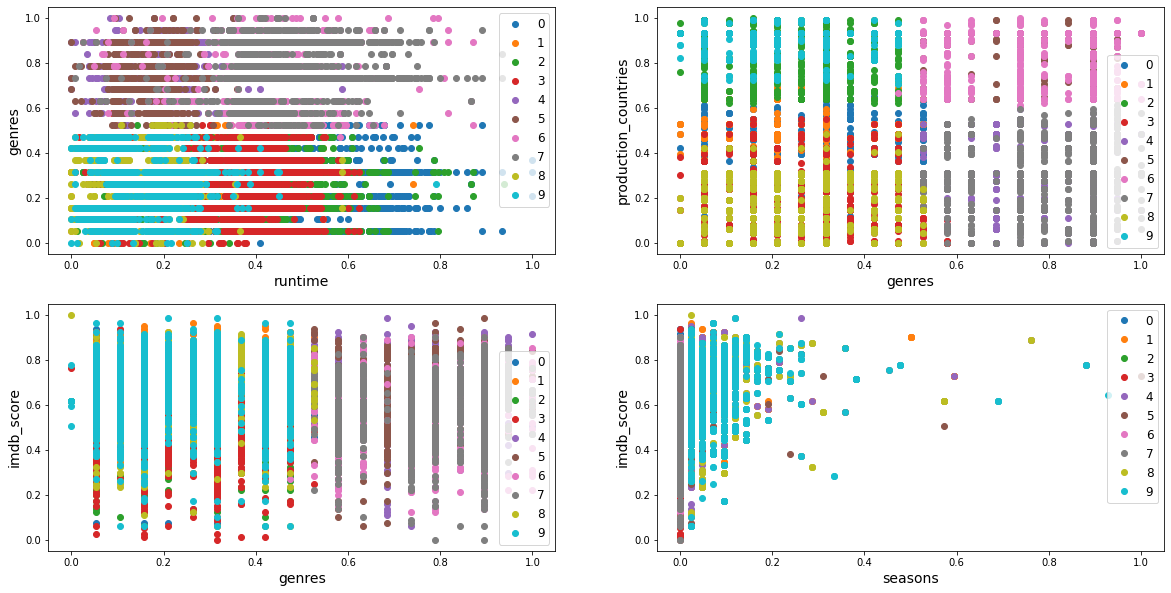

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
for i in range(0, k):
  plt.plot(X[y_pred==i, 2], X[y_pred==i, 3], "o",label=i) #con y==0 prendo solo la classe 0
plt.xlabel("runtime", fontsize=14)
plt.ylabel("genres", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(222)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 4],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [ ]:
y_pred

array([9, 0, 0, ..., 7, 3, 3], dtype=int32)

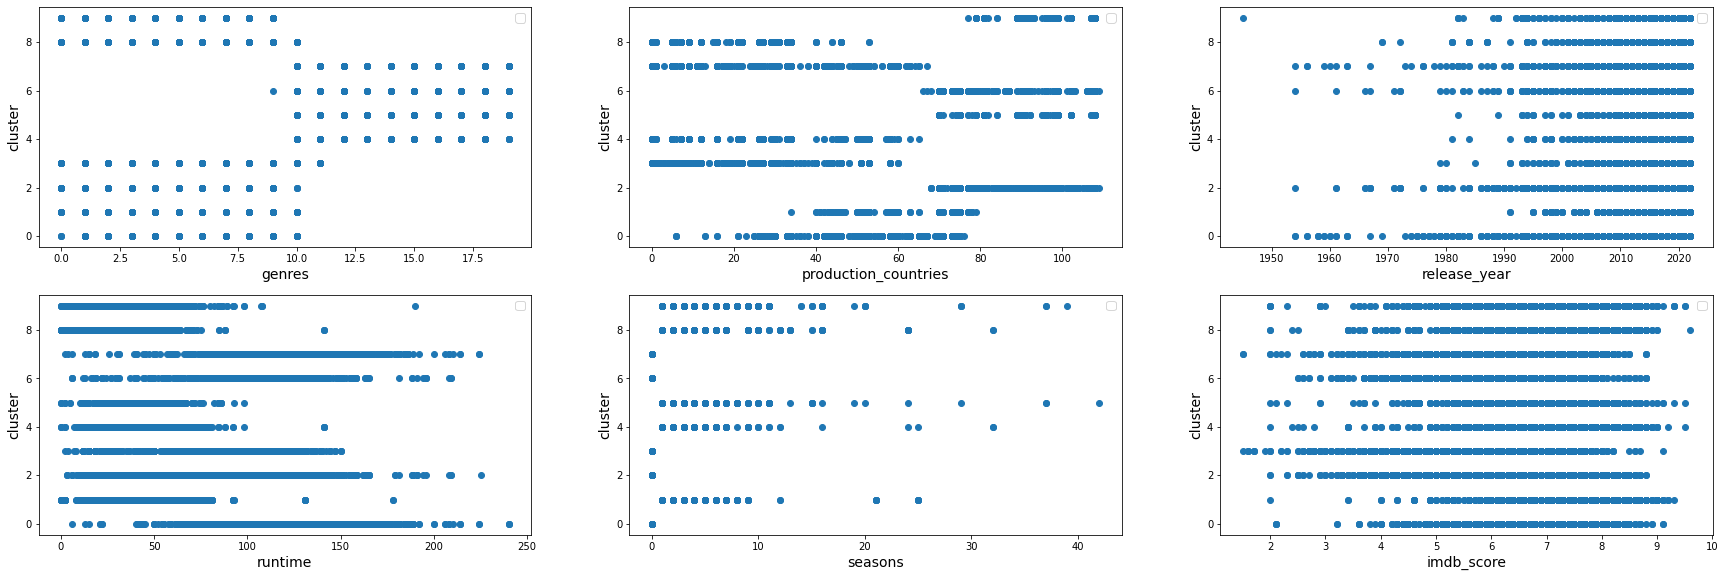

In [ ]:
plt.figure(figsize=(30, 15))

plt.subplot(331)

"""
for i in range(0, k):
  plt.plot(data_titles[y_pred==i,3], y_pred==i,"o", label=i) #con y==0 prendo solo la classe 0
"""
plt.plot(data_titles["genres"],y_pred , "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("genres", fontsize=14)
plt.legend(fontsize=12)


plt.subplot(332)
plt.plot(data_titles["production_countries"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(333)
plt.plot(data_titles["release_year"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("release_year", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(334)
plt.plot(data_titles["runtime"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("runtime", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(335)
plt.plot(data_titles["seasons"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("seasons", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(336)
plt.plot(data_titles["imdb_score"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""
plt.subplot(337)
plt.plot(data_titles["imdb_votes"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_votes", fontsize=14)
plt.legend(fontsize=12)


#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""

plt.show()

In [ ]:
y_pred[:30]

array([9, 0, 0, 0, 8, 0, 7, 9, 9, 2, 3, 0, 2, 2, 2, 2, 2, 9, 2, 5, 2, 2,
       2, 2, 9, 3, 8, 8, 2, 0], dtype=int32)

## Clustering Birch

## Birch

In [ ]:
from sklearn.cluster import Birch

X = dati_scalati_m


brc = Birch(n_clusters=None).fit(X)
y_pred_brc=brc.predict(X)

k = len(brc.subcluster_labels_)

In [ ]:
y_pred_brc

array([0, 1, 1, ..., 4, 1, 1])

In [ ]:
for i in range(0,k):
  print(np.count_nonzero(y_pred_brc == i))


2827
8415
3346
51
3178


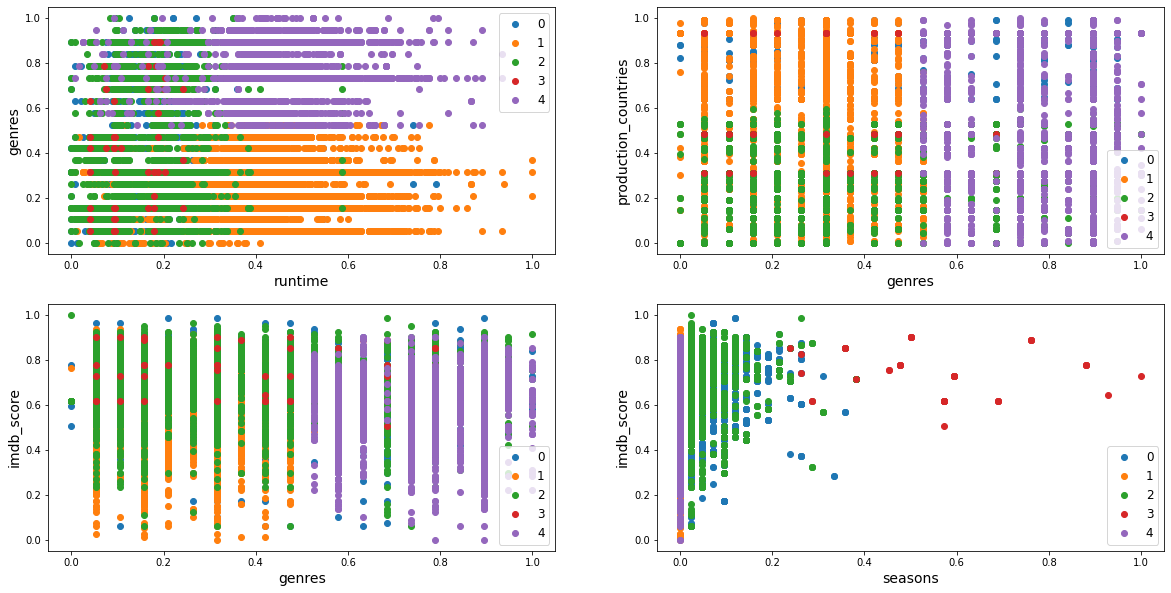

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
for i in range(0, k):
  plt.plot(X[y_pred_brc==i, 2], X[y_pred_brc==i, 3], "o",label=i) #con y==0 prendo solo la classe 0
plt.xlabel("runtime", fontsize=14)
plt.ylabel("genres", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(222)
for i in range(0, k):
  plt.plot(X[y_pred_brc==i, 3], X[y_pred_brc==i, 4],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred_brc==i, 3], X[y_pred_brc==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred_brc==i, 5], X[y_pred_brc==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.show()

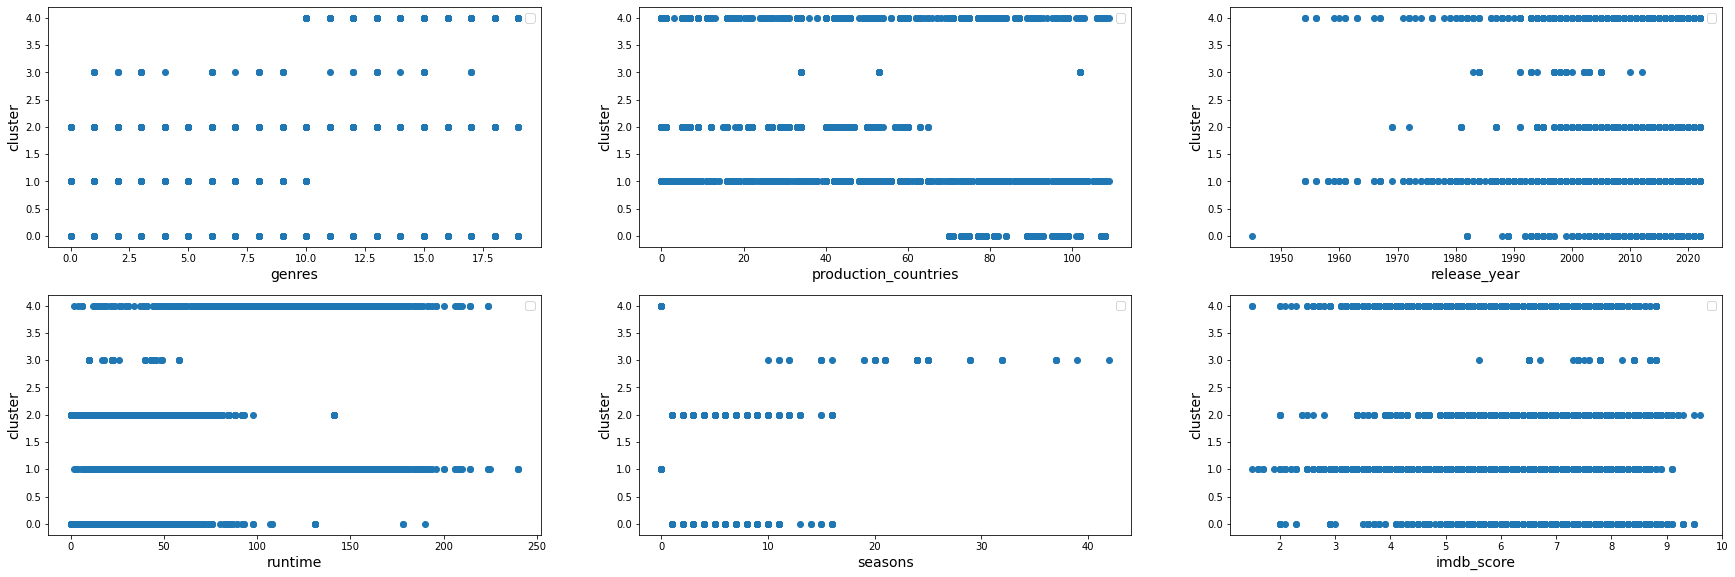

In [ ]:
plt.figure(figsize=(30, 15))

plt.subplot(331)

"""
for i in range(0, k):
  plt.plot(data_titles[y_pred==i,3], y_pred==i,"o", label=i) #con y==0 prendo solo la classe 0
"""
plt.plot(data_titles["genres"],y_pred_brc , "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("genres", fontsize=14)
plt.legend(fontsize=12)


plt.subplot(332)
plt.plot(data_titles["production_countries"],y_pred_brc,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(333)
plt.plot(data_titles["release_year"],y_pred_brc,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("release_year", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(334)
plt.plot(data_titles["runtime"],y_pred_brc,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("runtime", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(335)
plt.plot(data_titles["seasons"],y_pred_brc,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("seasons", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(336)
plt.plot(data_titles["imdb_score"],y_pred_brc,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""
plt.subplot(337)
plt.plot(data_titles["imdb_votes"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_votes", fontsize=14)
plt.legend(fontsize=12)


#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""

plt.show()

## Applico Birch alla persona

In [ ]:
y_pred_persona_scalata_brc = brc.predict(persona_scalata)
#y_pred_persona_scalata = kmeans.predict(persona)

y_pred_persona_scalata_brc

array([3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1,
       4, 1, 1, 4, 1, 1, 4, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
cluster_previsione = np.unique(y_pred_persona_scalata_brc)
cluster_previsione

conta = np.zeros(k)
for i in range(0,len(y_pred_persona_scalata_brc)):
  conta[y_pred_persona_scalata_brc[i]] = conta[y_pred_persona_scalata_brc[i]] + 1

conta

array([ 0., 77., 97.,  5., 15.])

In [ ]:
cluster = {}
for i in range(0,len(conta)):
  #print("Cluster",i,":",conta[i])
  cluster[i] = conta[i]

# ordino cluster
cluster = dict(sorted(cluster.items(), key=lambda item: item[1], reverse=True))
cluster = {x:y for x,y in cluster.items() if y!=0}
cluster

{2: 97.0, 1: 77.0, 4: 15.0, 3: 5.0}

In [ ]:
percentuale_affinita = conta/len(y_pred_persona_scalata_brc)*100

percentuale_affinita_attore = {}

for i in range(0, len(percentuale_affinita)):
  percentuale_affinita_attore[i] = percentuale_affinita[i]

percentuale_affinita_attore = {x:y for x,y in percentuale_affinita_attore.items() if y!=0}

percentuale_affinita = percentuale_affinita[percentuale_affinita  != 0]
percentuale_affinita 

array([39.69072165, 50.        ,  2.57731959,  7.73195876])

In [ ]:
predizione = pd.DataFrame()
#predizione.loc[:, "affinity"] = []
for i in cluster_previsione:
  predizione = predizione.append(data_titles.iloc[y_pred_brc == i].sample(2))


predizione

In [ ]:
id_pred = []

for i in range(0,len(predizione)):
  #print(i)
  id_pred.append(id_film.at[predizione.index[i], "id"])

id_pred


previsione_film = pd.DataFrame()
previsione_film.loc[:, "affinity"] = []

for i in range(0, len(id_pred)):
  previsione_film = previsione_film.append(final_data_titles[final_data_titles.id == id_pred[i]])

previsione_film = previsione_film.reset_index()
previsione_film = previsione_film.drop('index', axis=1)


for i in range(0,len(previsione_film),2):
  previsione_film.at[i:i+1,"affinity"] = percentuale_affinita[int(i/2)]


previsione_film

la previsione di un film viene fatta cercando i film più vicini ad un dato film visto dall'utente all'interno dei vari cluster. Il più vicino avrà affinità maggiore e più aumenta la distanza più l'affinità si riduce. Bisogna dare un'affinità di default ai vari cluster in base a quanti film vengono visti per ogni cluster. 

In [ ]:
y_pred_persona_scalata_brc

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4,
       1, 4, 1, 1, 1, 1, 4, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0, 7, 0, 4, 1, 1,
       1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 4, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 1, 4, 4, 7, 0, 0, 7, 0, 7, 0, 0, 0, 0, 7, 7, 0, 0, 0, 7, 0,
       7, 0, 0, 7, 0, 0, 7, 0, 7, 4, 1, 1, 1, 4, 4, 1, 4, 1, 1, 7, 0, 0,
       0, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4], dtype=int32)

In [ ]:
brc.subcluster_centers_

array([[1.        , 0.9384411 , 0.1538301 , 0.3865033 , 0.90660324,
        0.05822625, 0.66340453, 0.01253152, 0.01737737, 0.73566349],
       [0.        , 0.91293636, 0.41883125, 0.25543091, 0.55568203,
        0.        , 0.59394295, 0.01492307, 0.0106419 , 0.63303243],
       [1.        , 0.93267616, 0.15971185, 0.39993085, 0.3391619 ,
        0.05016423, 0.68712459, 0.00561534, 0.01224305, 0.74294473],
       [1.        , 0.70357143, 0.1440625 , 0.44868421, 0.72293578,
        0.59642857, 0.76608025, 0.04675262, 0.06984143, 0.75377368],
       [0.        , 0.91995802, 0.45195992, 0.77893381, 0.58646183,
        0.        , 0.57184104, 0.02200303, 0.01340608, 0.62029112]])

raggio più piccolo = cazzo di mattia

In [ ]:
y_pred_persona_scalata_brc

array([3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1,
       4, 1, 1, 4, 1, 1, 4, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

film_top = pd.DataFrame()

for indice_cluster_key in range(0, 2):

  lunghezza = len(persona_scalata[y_pred_persona_scalata_brc == keys[indice_cluster_key]])

  #index = random.randint(0, lunghezza)

  #persona_scalata[y_pred_persona_scalata == keys[0]][index]
  min_dist = 100000
  min_index = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(brc.subcluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata_brc == keys[indice_cluster_key]][index])
    if(dist < min_dist):
      min_dist = dist
      min_index = index



  dati_scalati_m[y_pred_brc == keys[indice_cluster_key]]



  for index in range(0, lunghezza):
    film_utente = persona_scalata[y_pred_persona_scalata_brc == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []
    for point in dati_scalati_m[y_pred_brc == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= min_dist):
        film_affini.append(point)

        distanze_film_affini.append(np.linalg.norm(point - film_utente))

    if(len(film_affini) > 0):
      indici = []

      indice_film_utente = 0

      for i in range(0, len(dati_scalati_m)):
        for j in range(0, len(film_affini)):
          if((dati_scalati_m[i] == film_affini[j]).all()):
            indici.append(i)

          if((dati_scalati_m[i] == film_utente).all()):
            indice_film_utente = i
          
      id_pred = []

      id_film_utente = id_film.at[indice_film_utente, "id"]


      film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


      for i in range(0,len(indici)):
        coppia = []
        coppia.append(id_film.at[indici[i], "id"])
        coppia.append(distanze_film_affini[i])
        id_pred.append(coppia)


      id_pred_unico = []
      id_pred_unico_dist = []

      #id_pred_unico.append(id_pred[0])

      for i in range(0, len(id_pred)):
        if(not (contiene(id_pred_unico, id_pred[i][0]))):
          id_pred_unico.append(id_pred[i][0])
          id_pred_unico_dist.append(id_pred[i][1])
        else:
          for j in range(0, len(id_pred_unico)):
            if(id_pred_unico[j] == id_pred[i][0]):
              if(id_pred_unico_dist[j] > id_pred[i][1]):
                id_pred_unico_dist[j] = id_pred[i][1]
              



      film_vicini = pd.DataFrame()
      film_vicini.loc[:, "affinity"] = []

      for i in range(0, len(id_pred_unico)):
        film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

        
      for i in range(0, len(film_vicini)):
        film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



      for i in range(0, len(lista_film_persona)):
          film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

      film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)

  print(1)
  film_top.head(30)




film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

affinita_film_top_brc = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  affinita_film_top_brc = affinita_film_top_brc.append(film_top[film_top.affinity == max].iloc[0])


affinita_film_top_brc = affinita_film_top_brc.sort_values(by=['affinity'], ascending=False)


affinita_film_top_brc = affinita_film_top_brc.reset_index()
affinita_film_top_brc = affinita_film_top_brc.drop('index', axis=1)

affinita_film_top_brc

1
1


affinity        id                                         title   type  \
0    98.057254  tm167944  Berserk: The Golden Age Arc III - The Advent  MOVIE   
1    96.422947   ts86164                                     Hero Mask   SHOW   
2    96.395414  tm241990                                        Blame!  MOVIE   
3    96.217093  tm466832                      Dragon Quest: Your Story  MOVIE   
4    96.039535  ts256311                            High-Rise Invasion   SHOW   
..         ...       ...                                           ...    ...   
176  90.048749  tm186161                                          Boss  MOVIE   
177  90.040142  tm416341           HiGH&LOW The Movie 3: Final Mission  MOVIE   
178  90.030909  tm184732                                    Dhobi Ghat  MOVIE   
179  90.015769   ts77219                                Part-Time Idol   SHOW   
180  90.000775  tm850723                     Altered Carbon: Resleeved  MOVIE   

                                           description  release_year  \
0    A year has passed since Guts parted ways with ...        2013.0   
1    After a rash of mysterious deaths, Crown prose...        2018.0   
2    In the distant technological future, civilizat...        2017.0   
3    Luca follows in his father's footsteps to resc...        2019.0   
4    High-school girl Yuri suddenly finds herself o...        2021.0   
..                                                 ...           ...   
176  Disowned by his father as a boy, Surya is take...        2013.0   
177  In order to conceal past corruption by the gov...        2017.0   
178  Arun is a reclusive and lonely modern art pain...        2010.0   
179  This drama takes place in fictional entertainm...        2017.0   
180  On the planet Latimer, Takeshi Kovacs must pro...        2020.0   

    age_certification  runtime  \
0               NC-17    110.0   
1               TV-14     25.0   
2               PG-13    106.0   
3                  PG    102.0   
4               TV-MA     26.0   
..                ...      ...   
176             PG-13    143.0   
177               NaN    118.0   
178               NaN    102.0   
179             TV-14     40.0   
180               NaN     75.0   

                                                genres production_countries  \
0    ['drama', 'fantasy', 'animation', 'action', 'r...               ['JP']   
1    ['animation', 'action', 'thriller', 'scifi', '...               ['JP']   
2    ['scifi', 'animation', 'action', 'drama', 'thr...               ['JP']   
3    ['action', 'fantasy', 'animation', 'family', '...               ['JP']   
4    ['thriller', 'action', 'animation', 'horror', ...               ['JP']   
..                                                 ...                  ...   
176             ['comedy', 'drama', 'crime', 'action']               ['IN']   
177                                ['drama', 'action']               ['JP']   
178                                          ['drama']               ['IN']   
179             ['drama', 'family', 'music', 'comedy']               ['KR']   
180  ['scifi', 'animation', 'crime', 'drama', 'thri...               ['JP']   

     seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0        0.0   tt2358913         7.8     10173.0           41.099         7.6  
1        2.0   tt9316078         6.1       675.0            4.779         6.3  
2        0.0   tt6574146         6.6      8044.0           31.452         6.4  
3        0.0  tt10127562         6.5      2831.0           13.817         6.8  
4        1.0  tt13357164         6.6      2575.0           37.817         8.4  
..       ...         ...         ...         ...              ...         ...  
176      0.0   tt2571140         5.1     11159.0            3.181         5.7  
177      0.0   tt7624932         7.1       656.0            5.265         6.4  
178      0.0   tt1433810         7.0     13167.0            7.689         6.4  
179      1

In [ ]:
affinita_film_top.head(30)

affinity         id                                              title  \
0   98.057254   tm167944       Berserk: The Golden Age Arc III - The Advent   
1   96.422947    ts86164                                          Hero Mask   
2   96.395414   tm241990                                             Blame!   
3   96.217093   tm466832                           Dragon Quest: Your Story   
4   96.039535   ts256311                                 High-Rise Invasion   
5   95.828491   tm467848                                           NiNoKuni   
6   95.713415    ts79409                             A.I.C.O. -Incarnation-   
7   95.580202   ts218888                                                BNA   
8   95.561958   tm245271                                            Gantz:O   
9   95.515253   ts237513                                     Ju-On: Origins   
10  95.420543    tm38064  Berserk: The Golden Age Arc II - The Battle fo...   
11  95.335991    tm80339            Naruto: Ninja Clash in the Land of Snow   
12  95.305825   tm941531                                          The Beast   
13  95.169650    ts79988                                          Lost Song   
14  95.128187   ts215166                                              Scams   
15  95.030623   tm164557                                          Initial D   
16  95.022439   tm362881                                              Mirai   
17  94.936224    ts22249                                Kuroko's Basketball   
18  94.878803   tm960430                             Child of Kamiari Month   
19  94.832989    ts76603                                             Erased   
20  94.792282    ts56251                                               ID-0   
21  94.777861    ts82281                                         Zoids Wild   
22  94.673052    ts35201                       Food Wars! Shokugeki no Soma   
23  94.603516   ts217045                                             Levius   
24  94.525822   tm245176                                        Sand Castle   
25  94.500553   ts269881                                 Record of Ragnarok   
26  94.493707  tm1046932                                               Kate   
27  94.337615   tm143372                               Stand by Me Doraemon   
28  94.317894   tm282910                                          Fireworks   
29  94.263219   ts313668                         Tear Along the Dotted Line   

     type                                        description  release_year  \
0   MOVIE  A year has passed since Guts parted ways with ...        2013.0   
1    SHOW  After a rash of mysterious deaths, Crown prose...        2018.0   
2   MOVIE  In the distant technological future, civilizat...        2017.0   
3   MOVIE  Luca follows in his father's footsteps to resc...        2019.0   
4    SHOW  High-school girl Yuri suddenly finds herself o...        2021.0   
5   MOVIE  Adapted from the video game series of the same...        2019.0   
6    SHOW  In Japan in the year 2035, an accident known a...        2018.0   
7    SHOW  Morphed into a raccoon beastman, Michiru seeks...        2020.0   
8   MOVIE  Somewhere in Tokyo, there is a room. In that r...        2016.0   
9    SHOW  A paranormal researcher searches obsessively f...        2020.0   
10  MOVIE  The Band of the Hawk participates in the Midla...        2012.0   
11  MOVIE  Naruto is thrilled when he is sent on a missio...        2004.0   
12  MOVIE  To rescue his daughter, an unstable Special Fo...        2020.0   
13   SHOW  Rin, an energetic girl who loves to eat, lives...        2018.0   
14   SHOW  Kusano has a bright future with his fancy univ...        2019.0   
15  MOVIE  After winning his first competition, Takumi fo...        2005.0   
16  MOVIE  Unhappy after his new baby sister displaces hi...        2018.0   
17   SHOW  In the story, Kagami Taiga has just enrolled i...        2012.0   
18  MOVIE  This is a story of a 12-year-old girl, Kanna, ...        2021.

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[0]])

#index = random.randint(0, lunghezza)

#persona_scalata[y_pred_persona_scalata == keys[0]][index]
min_dist = 100000
min_index = 0
for index in range(0, lunghezza):
  dist = np.linalg.norm(brc.subcluster_centers_[keys[0]] - persona_scalata[y_pred_persona_scalata == keys[0]][index])
  if(dist < min_dist):
    min_dist = dist
    min_index = index

min_dist


0.20126273243110254

I dati scalati sono (ERANO) sbagliati.

In [ ]:
dati_scalati_m[y_pred == keys[0]]

film_affini = []

index = random.randint(0, lunghezza)

film_utente = persona_scalata[y_pred_persona_scalata == keys[0]][index]

distanze_film_affini = []

for point in dati_scalati_m[y_pred == keys[0]]:
  if(np.linalg.norm(point - film_utente) <= min_dist):
    film_affini.append(point)

    distanze_film_affini.append(np.linalg.norm(point - film_utente))



indici = []

indice_film_utente = 0

for i in range(0, len(dati_scalati_m)):
  for j in range(0, len(film_affini)):
    if((dati_scalati_m[i] == film_affini[j]).all()):
      indici.append(i)

    if((dati_scalati_m[i] == film_utente).all()):
      indice_film_utente = i
    
distanze_film_affini


In [ ]:
id_pred = []

id_film_utente = id_film.at[indice_film_utente, "id"]


film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


for i in range(0,len(indici)):
  coppia = []
  coppia.append(id_film.at[indici[i], "id"])
  coppia.append(distanze_film_affini[i])
  id_pred.append(coppia)


id_pred_unico = []
id_pred_unico_dist = []

#id_pred_unico.append(id_pred[0])

for i in range(0, len(id_pred)):
  if(not (contiene(id_pred_unico, id_pred[i][0]))):
    id_pred_unico.append(id_pred[i][0])
    id_pred_unico_dist.append(id_pred[i][1])
  else:
    for j in range(0, len(id_pred_unico)):
      if(id_pred_unico[j] == id_pred[i][0]):
        if(id_pred_unico_dist[j] > id_pred[i][1]):
          id_pred_unico_dist[j] = id_pred[i][1]
        

film_vicini = pd.DataFrame()
film_vicini.loc[:, "affinity"] = []

for i in range(0, len(id_pred_unico)):
  film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


film_vicini = film_vicini.reset_index()
film_vicini = film_vicini.drop('index', axis=1)

  
for i in range(0, len(film_vicini)):
  film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100

len(id_pred_unico)

52

Film dell'utente pescato a caso

In [ ]:
final_data_titles[final_data_titles.id == id_film_utente]

id                                              title   type  \
497  tm65142  One Piece: The Desert Princess and the Pirates...  MOVIE   

                                           description  release_year  \
497  A re-telling of the Alabaster Arc from One Pie...          2007   

    age_certification  runtime                                      genres  \
497             PG-13       89  ['comedy', 'drama', 'animation', 'action']   

    production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
497               ['JP']      0.0  tt1037116         6.9      1660.0   

     tmdb_popularity  tmdb_score  
497           38.807         6.7

Film trovarti vicino al film dell'utente

In [ ]:
film_vicini

affinity         id                                              title  \
0    86.475046  tm1077037  Chhota Bheem & Krishna: Pataliputra- City of t...   
1    86.629939  tm1077038                     Chhota Bheem: Journey to Petra   
2    86.316515    tm80059                         Naruto Shippuden the Movie   
3    84.473658   tm134235                            One Piece: Strong World   
4    86.525509    tm49405  Inuyasha the Movie: Affections Touching Across...   
5    95.298557    tm34846                    Bleach the Movie: Fade to Black   
6    93.987284    tm96037         Naruto Shippuden the Movie: The Lost Tower   
7    89.402076    tm93612                       Bleach the Movie: Hell Verse   
8    93.609838    tm36164                  Naruto Shippuden the Movie: Bonds   
9    92.129392   tm147494       Naruto Shippuden the Movie: The Will of Fire   
10   86.265560    tm89936                                             Arahan   
11   86.679737   tm105278  Inuyasha the Movie 2: The Castle Beyond the Lo...   
12   86.082004   tm150521                                           Accident   
13   92.444068    tm80339            Naruto: Ninja Clash in the Land of Snow   
14   85.235080    tm33729                                    Taxi No. 9 2 11   
15   94.756115    tm34524  One Piece: Episode of Chopper Plus: Bloom in t...   
16   89.019411   tm166293                                  The Blue Umbrella   
17   92.464871    tm24576     Naruto: Guardians of the Crescent Moon Kingdom   
18   84.312392    tm92977                                            Ishqiya   
19   85.755853   tm106625                          LSD: Love, Sex aur Dhokha   
20  100.000000    tm65142  One Piece: The Desert Princess and the Pirates...   
21   92.617972   tm177687               Naruto: Legend of the Stone of Gelel   
22   88.171477    tm89764    Inuyasha the Movie 4: Fire on the Mystic Island   
23   84.089658   tm138902  Inuyasha the Movie 3: Swords of an Honorable R...   
24   84.317246   tm104349                                         The Unjust   
25   84.174534    tm95434                                     Love in a Puff   
26   85.723530   tm102848                                        Peepli Live   
27   84.123752    tm34924                                      Beast Stalker   
28   87.320707    tm49865                                              Aamir   
29   87.576783   tm598375                           Chhota Bheem Aur Krishna   
30   86.527339    tm60844  Berserk: The Golden Age Arc I - The Egg of the...   
31   84.983167    tm38064  Berserk: The Golden Age Arc II - The Battle fo...   
32   86.084878   tm177258                                        Delhi Belly   
33   87.165462   tm177044           Naruto Shippuden the Movie: Blood Prison   
34   88.677784    tm59372                          Arjun: The Warrior Prince   
35   92.064484    tm54780                       Tiger & Bunny: The Beginning   
36   87.593573   tm143372                               Stand by Me Doraemon   
37   84.392484   tm152273                          Tiger & Bunny: The Rising   
38   86.509414   tm182580                                              Ghadi   
39   84.483199   tm175364                           Chhota Bheem Aur Hanuman   
40   86.337910  tm1194608                     Motu Patlu: Deep Sea Adventure   
41   86.238424   tm245271                                            Gantz:O   
42   84.478668   tm424879                                 Road To High & Low   
43   84.561412   tm362881                                              Mirai   
44   84.420915   tm241990                                             Blame!   
45   84.847280   tm413557                                         Okko's Inn   
46   89.102807   tm164557                                          Initial D   
47   85.207373   tm110923                                Divine Intervention   
48   84.644076   tm224255                                      Very Big Shot   
49   8

Droppiamo i film già visti dall'utente

In [ ]:
for i in range(0, len(lista_film_persona)):
    film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



film_vicini = film_vicini.reset_index()
film_vicini = film_vicini.drop('index', axis=1)



In [ ]:
film_vicini[film_vicini.affinity > 90.00]

affinity       id                                    title   type  \
6   92.444068  tm80339  Naruto: Ninja Clash in the Land of Snow  MOVIE   
23  92.064484  tm54780             Tiger & Bunny: The Beginning  MOVIE   

                                          description  release_year  \
6   Naruto is thrilled when he is sent on a missio...        2004.0   
23  Set on an alternative Earth, Superheroes are c...        2012.0   

   age_certification  runtime                                        genres  \
6              PG-13     90.0  ['comedy', 'fantasy', 'animation', 'action']   
23                PG     88.0              ['scifi', 'animation', 'action']   

   production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
6                ['JP']      0.0  tt0476680         6.6      6866.0   
23               ['JP']      0.0  tt2507174         6.6       264.0   

    tmdb_popularity  tmdb_score  
6            50.604         7.2  
23            2.996         6.5

## Previsione film cluster maggioritario con calcolo affinità basato sulla distanza punti

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

indice_cluster_key = 0

lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]])

#index = random.randint(0, lunghezza)

#persona_scalata[y_pred_persona_scalata == keys[0]][index]
min_dist = 100000
min_index = 0
for index in range(0, lunghezza):
  dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index])
  if(dist < min_dist):
    min_dist = dist
    min_index = index



dati_scalati_m[y_pred == keys[indice_cluster_key]]




film_top = pd.DataFrame()
for index in range(0, lunghezza):
  film_utente = persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index]

  distanze_film_affini = []
  film_affini = []
  for point in dati_scalati_m[y_pred == keys[indice_cluster_key]]:
    if(np.linalg.norm(point - film_utente) <= min_dist):
      film_affini.append(point)

      distanze_film_affini.append(np.linalg.norm(point - film_utente))


  indici = []

  indice_film_utente = 0

  for i in range(0, len(dati_scalati_m)):
    for j in range(0, len(film_affini)):
      if((dati_scalati_m[i] == film_affini[j]).all()):
        indici.append(i)

      if((dati_scalati_m[i] == film_utente).all()):
        indice_film_utente = i
      
  id_pred = []

  id_film_utente = id_film.at[indice_film_utente, "id"]


  film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


  for i in range(0,len(indici)):
    coppia = []
    coppia.append(id_film.at[indici[i], "id"])
    coppia.append(distanze_film_affini[i])
    id_pred.append(coppia)


  id_pred_unico = []
  id_pred_unico_dist = []

  #id_pred_unico.append(id_pred[0])

  for i in range(0, len(id_pred)):
    if(not (contiene(id_pred_unico, id_pred[i][0]))):
      id_pred_unico.append(id_pred[i][0])
      id_pred_unico_dist.append(id_pred[i][1])
    else:
      for j in range(0, len(id_pred_unico)):
        if(id_pred_unico[j] == id_pred[i][0]):
          if(id_pred_unico_dist[j] > id_pred[i][1]):
            id_pred_unico_dist[j] = id_pred[i][1]
          



  film_vicini = pd.DataFrame()
  film_vicini.loc[:, "affinity"] = []

  for i in range(0, len(id_pred_unico)):
    film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


  film_vicini = film_vicini.reset_index()
  film_vicini = film_vicini.drop('index', axis=1)

    
  for i in range(0, len(film_vicini)):
    film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



  for i in range(0, len(lista_film_persona)):
      film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



  film_vicini = film_vicini.reset_index()
  film_vicini = film_vicini.drop('index', axis=1)

  film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)
  """
  frames = [film_top, film_vicini]

  pd.concat(frames)
  """



film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

affinita_film_top = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  affinita_film_top = affinita_film_top.append(film_top[film_top.affinity == max].iloc[0])


affinita_film_top = affinita_film_top.sort_values(by=['affinity'], ascending=False)


affinita_film_top = affinita_film_top.reset_index()
affinita_film_top = affinita_film_top.drop('index', axis=1)

affinita_film_top

3
3
3
2
4
3
2
3
3
3
2
2
3
3
2
0
0
0
0
3
2
2
2
2
2
4
3
2
4
4
2
2
2
3
3
2
2
0
0
0
0
0
4
3
4
4
3
6
7
8
11
26
11
15
13
0
0
0
9
14
1
3
3
17
13
0
0
0
0
0
0
0
0
0
1
1
0


affinity        id                                         title   type  \
0   98.057254  tm167944  Berserk: The Golden Age Arc III - The Advent  MOVIE   
1   96.395414  tm241990                                        Blame!  MOVIE   
2   96.217093  tm466832                      Dragon Quest: Your Story  MOVIE   
3   95.828491  tm467848                                      NiNoKuni  MOVIE   
4   95.561958  tm245271                                       Gantz:O  MOVIE   
..        ...       ...                                           ...    ...   
81  90.122353  tm145791                                   Miss Granny  MOVIE   
82  90.048749  tm186161                                          Boss  MOVIE   
83  90.040142  tm416341           HiGH&LOW The Movie 3: Final Mission  MOVIE   
84  90.030909  tm184732                                    Dhobi Ghat  MOVIE   
85  90.000775  tm850723                     Altered Carbon: Resleeved  MOVIE   

                                          description  release_year  \
0   A year has passed since Guts parted ways with ...        2013.0   
1   In the distant technological future, civilizat...        2017.0   
2   Luca follows in his father's footsteps to resc...        2019.0   
3   Adapted from the video game series of the same...        2019.0   
4   Somewhere in Tokyo, there is a room. In that r...        2016.0   
..                                                ...           ...   
81  An unappreciated old granny magically turns 20...        2014.0   
82  Disowned by his father as a boy, Surya is take...        2013.0   
83  In order to conceal past corruption by the gov...        2017.0   
84  Arun is a reclusive and lonely modern art pain...        2010.0   
85  On the planet Latimer, Takeshi Kovacs must pro...        2020.0   

   age_certification  runtime  \
0              NC-17    110.0   
1              PG-13    106.0   
2                 PG    102.0   
3              PG-13    106.0   
4              NC-17     95.0   
..               ...      ...   
81               NaN    124.0   
82             PG-13    143.0   
83               NaN    118.0   
84               NaN    102.0   
85               NaN     75.0   

                                               genres production_countries  \
0   ['drama', 'fantasy', 'animation', 'action', 'r...               ['JP']   
1   ['scifi', 'animation', 'action', 'drama', 'thr...               ['JP']   
2   ['action', 'fantasy', 'animation', 'family', '...               ['JP']   
3   ['family', 'fantasy', 'romance', 'animation', ...               ['JP']   
4   ['scifi', 'action', 'animation', 'fantasy', 't...               ['JP']   
..                                                ...                  ...   
81  ['drama', 'comedy', 'music', 'family', 'fantasy']               ['KR']   
82             ['comedy', 'drama', 'crime', 'action']               ['IN']   
83                                ['drama', 'action']               ['JP']   
84                                          ['drama']               ['IN']   
85  ['scifi', 'animation', 'crime', 'drama', 'thri...               ['JP']   

    seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0       0.0   tt2358913         7.8     10173.0           41.099         7.6  
1       0.0   tt6574146         6.6      8044.0           31.452         6.4  
2       0.0  tt10127562         6.5      2831.0           13.817         6.8  
3       0.0   tt9760504         6.1      3338.0           19.730         6.7  
4       0.0   tt5923962         7.1     14950.0           28.818         7.3  
..      ...         ...         ...         ...              ...         ...  
81      0.0   tt3516378         7.2      3508.0            6.475         7.4  
82      0.0   tt2571140         5.1     11159.0            3.181         5.7  
83      0.0   tt7624932         7.1       656.0            5.265         6.4  
84      0.0   tt1433810         7.0     13167.0            7.689   

In [ ]:
affinita_film_top.head(30)

affinity         id                                              title  \
0   98.057254   tm167944       Berserk: The Golden Age Arc III - The Advent   
1   96.395414   tm241990                                             Blame!   
2   96.217093   tm466832                           Dragon Quest: Your Story   
3   95.828491   tm467848                                           NiNoKuni   
4   95.561958   tm245271                                            Gantz:O   
5   95.420543    tm38064  Berserk: The Golden Age Arc II - The Battle fo...   
6   95.335991    tm80339            Naruto: Ninja Clash in the Land of Snow   
7   95.305825   tm941531                                          The Beast   
8   95.030623   tm164557                                          Initial D   
9   95.022439   tm362881                                              Mirai   
10  94.878803   tm960430                             Child of Kamiari Month   
11  94.525822   tm245176                                        Sand Castle   
12  94.493707  tm1046932                                               Kate   
13  94.337615   tm143372                               Stand by Me Doraemon   
14  94.317894   tm282910                                          Fireworks   
15  94.256877   tm941382                             Stand by Me Doraemon 2   
16  94.119102   tm413557                                         Okko's Inn   
17  93.912121   tm441231                                     Murder Mystery   
18  93.801947   tm317110                                      Psychokinesis   
19  93.750019   tm843938                                        18 Presents   
20  93.601519   tm836449                                          Tuna Girl   
21  93.579251  tm1038327                                            Beckett   
22  93.362765   tm460829                                Children of the Sea   
23  93.327896   tm451548                                          The Fable   
24  93.298596   tm357708                                           The Bros   
25  93.264771  tm1198504       Ghost in the Shell: SAC_2045 Sustainable War   
26  93.138401   tm451078  Pokemon the Movie: Mewtwo Strikes Back - Evolu...   
27  92.891038  tm1005109                        Kingdom: Ashin of the North   
28  92.756229   tm370212                                             Adrift   
29  92.712618   tm450375                                          Thackeray   

     type                                        description  release_year  \
0   MOVIE  A year has passed since Guts parted ways with ...        2013.0   
1   MOVIE  In the distant technological future, civilizat...        2017.0   
2   MOVIE  Luca follows in his father's footsteps to resc...        2019.0   
3   MOVIE  Adapted from the video game series of the same...        2019.0   
4   MOVIE  Somewhere in Tokyo, there is a room. In that r...        2016.0   
5   MOVIE  The Band of the Hawk participates in the Midla...        2012.0   
6   MOVIE  Naruto is thrilled when he is sent on a missio...        2004.0   
7   MOVIE  To rescue his daughter, an unstable Special Fo...        2020.0   
8   MOVIE  After winning his first competition, Takumi fo...        2005.0   
9   MOVIE  Unhappy after his new baby sister displaces hi...        2018.0   
10  MOVIE  This is a story of a 12-year-old girl, Kanna, ...        2021.0   
11  MOVIE  Set during the occupation of Iraq, a squad of ...        2017.0   
12  MOVIE  A ruthless criminal operative has less than 24...        2021.0   
13  MOVIE  In the suburbs of Tokyo some time ago, there l...        2014.0   
14  MOVIE  Moshimo, Japan. The annual fireworks festival ...        2017.0   
15  MOVIE  She and her beloved Shizuka are finally marrie...        2020.0   
16  MOVIE  12-year-old Oriko Seki, who lost her parents i...        2018.0   
17  MOVIE  On a long-awaited trip to Europe, a New York C...        2019.0   
18  MOVIE  An ordinary guy suddenly finds he has superpow...        2018.

## Previsione film di tutti i cluster con calcolo affinità basato sulla distanza punti

In [ ]:
cluster

{0: 77.0, 1: 72.0, 4: 30.0, 7: 15.0}

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

film_top = pd.DataFrame()

for indice_cluster_key in range(0, 2):

  lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]])

  #index = random.randint(0, lunghezza)

  #persona_scalata[y_pred_persona_scalata == keys[0]][index]
  min_dist = 100000
  min_index = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index])
    if(dist < min_dist):
      min_dist = dist
      min_index = index



  dati_scalati_m[y_pred == keys[indice_cluster_key]]



  for index in range(0, lunghezza):
    film_utente = persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []
    for point in dati_scalati_m[y_pred == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= min_dist):
        film_affini.append(point)

        distanze_film_affini.append(np.linalg.norm(point - film_utente))

    if(len(film_affini) > 0):
      indici = []

      indice_film_utente = 0

      for i in range(0, len(dati_scalati_m)):
        for j in range(0, len(film_affini)):
          if((dati_scalati_m[i] == film_affini[j]).all()):
            indici.append(i)

          if((dati_scalati_m[i] == film_utente).all()):
            indice_film_utente = i
          
      id_pred = []

      id_film_utente = id_film.at[indice_film_utente, "id"]


      film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


      for i in range(0,len(indici)):
        coppia = []
        coppia.append(id_film.at[indici[i], "id"])
        coppia.append(distanze_film_affini[i])
        id_pred.append(coppia)


      id_pred_unico = []
      id_pred_unico_dist = []

      #id_pred_unico.append(id_pred[0])

      for i in range(0, len(id_pred)):
        if(not (contiene(id_pred_unico, id_pred[i][0]))):
          id_pred_unico.append(id_pred[i][0])
          id_pred_unico_dist.append(id_pred[i][1])
        else:
          for j in range(0, len(id_pred_unico)):
            if(id_pred_unico[j] == id_pred[i][0]):
              if(id_pred_unico_dist[j] > id_pred[i][1]):
                id_pred_unico_dist[j] = id_pred[i][1]
              



      film_vicini = pd.DataFrame()
      film_vicini.loc[:, "affinity"] = []

      for i in range(0, len(id_pred_unico)):
        film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

        
      for i in range(0, len(film_vicini)):
        film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



      for i in range(0, len(lista_film_persona)):
          film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

      film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)

  print(1)
  film_top.head(30)




film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

affinita_film_top = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  affinita_film_top = affinita_film_top.append(film_top[film_top.affinity == max].iloc[0])


affinita_film_top = affinita_film_top.sort_values(by=['affinity'], ascending=False)


affinita_film_top = affinita_film_top.reset_index()
affinita_film_top = affinita_film_top.drop('index', axis=1)

affinita_film_top

In [ ]:
affinita_film_top.head(20)

## creo la lista film dell'utente

In [ ]:
len(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 46)])

36

In [ ]:
data_titles[(data_titles.release_year < 1990)]

In [ ]:
final_data_titles

In [ ]:
data_titles

In [ ]:
#persona = data_titles.iloc[2:5].append(data_titles.iloc[20:30].append(data_titles.iloc[100:200]))
persona = data_titles[(data_titles.seasons > 10) & (data_titles.production_countries == 102)].iloc[2:5].append(data_titles[(data_titles.genres == 6) & (data_titles.production_countries == 102)].iloc[100:150].append(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 102)].iloc[220:270].append(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 46)].iloc[0:30])))

#persona = data_titles[(data_titles.genres >8) & (data_titles.production_countries >60) & (data_titles.seasons == 0)]

id_film_utente = []

for i in range(0,len(persona)):
  id_film_utente.append(id_film.at[persona.index[i], "id"])



persona = persona.reset_index()
persona = persona.drop('index', axis=1)

id_film_utente = np.unique(np.array(id_film_utente))

len(list(id_film_utente))

133

In [ ]:
# Initialise the Scaler
standardScaler = StandardScaler()
minMaxScaler = MinMaxScaler()
 
# To scale data
dati_scalati_m = minMaxScaler.fit_transform(persona)
 
# To scale data
dati_scalati_s = standardScaler.fit_transform(persona)

persona_scalata = dati_scalati_m

persona_scalata

array([[1.00000000e+00, 5.12820513e-01, 2.12435233e-01, ...,
        1.00744548e-02, 7.88415517e-03, 1.45454545e-01],
       [1.00000000e+00, 7.43589744e-01, 2.02072539e-01, ...,
        2.24383536e-03, 7.05800253e-03, 6.18181818e-01],
       [1.00000000e+00, 3.84615385e-01, 1.91709845e-01, ...,
        1.88572262e-03, 9.95911619e-03, 5.81818182e-01],
       ...,
       [0.00000000e+00, 9.23076923e-01, 7.09844560e-01, ...,
        8.51362377e-04, 7.24552699e-04, 5.45454545e-01],
       [0.00000000e+00, 1.00000000e+00, 8.80829016e-01, ...,
        1.42175265e-03, 4.43672414e-03, 4.00000000e-01],
       [0.00000000e+00, 1.00000000e+00, 7.51295337e-01, ...,
        6.67801441e-04, 6.27481216e-03, 2.72727273e-01]])

## cluster con pescaggio casuale in base all'attore

In [ ]:
attori_film_visti = pd.DataFrame()

for i in range(0, len(id_film_utente)):
  attori_film_visti = attori_film_visti.append(data_credits[data_credits.id == id_film_utente[i]])

attori_film_visti

person_id        id                 name        character   role
8976       1675  tm100015           Idris Elba  Gordon Jennings  ACTOR
8977       2673  tm100015          Paul Walker      John Rahway  ACTOR
8978      13138  tm100015          Matt Dillon      Jack Welles  ACTOR
8979       5130  tm100015         Michael Ealy      Jake Attica  ACTOR
8980      13145  tm100015        Jay Hernandez    Eddie Hatcher  ACTOR
...         ...       ...                  ...              ...    ...
4473      84012       ts9        Ross Marquand            Aaron  ACTOR
4474      18053       ts9         Khary Payton   Ezekiel Sutton  ACTOR
4475     815971       ts9       Cooper Andrews            Jerry  ACTOR
4476       6959       ts9     Callan McAuliffe            Alden  ACTOR
4477       5577       ts9  Jeffrey Dean Morgan      Negan Smith  ACTOR

[2688 rows x 5 columns]

In [ ]:
a = pd.DataFrame(attori_film_visti.groupby(['person_id']).size())
a = a[0]

ricorrenza_attori = dict(a)

ricorrenza_attori = dict(sorted(ricorrenza_attori.items(), key=lambda item: item[1], reverse=True))

attori = []
keys = list(ricorrenza_attori.keys())
for i in range(0,4):
  attori.append(keys[i])

ricorrenza_attori


{3385: 4,
 7204: 4,
 1000: 3,
 2293: 3,
 2718: 3,
 4696: 3,
 6066: 3,
 13923: 3,
 14142: 3,
 30307: 3,
 55478: 3,
 58669: 3,
 61013: 3,
 124577: 3,
 182985: 3,
 1641: 2,
 1690: 2,
 1737: 2,
 1764: 2,
 1855: 2,
 2275: 2,
 2322: 2,
 2327: 2,
 2329: 2,
 2779: 2,
 2863: 2,
 3036: 2,
 3194: 2,
 3776: 2,
 4081: 2,
 4888: 2,
 5115: 2,
 5145: 2,
 5150: 2,
 5313: 2,
 5479: 2,
 5482: 2,
 5567: 2,
 5834: 2,
 6062: 2,
 6068: 2,
 6302: 2,
 6504: 2,
 6653: 2,
 7198: 2,
 7909: 2,
 7991: 2,
 7997: 2,
 8178: 2,
 8472: 2,
 8642: 2,
 8658: 2,
 8707: 2,
 8969: 2,
 9233: 2,
 9380: 2,
 9666: 2,
 9756: 2,
 10042: 2,
 10573: 2,
 10876: 2,
 11230: 2,
 11691: 2,
 12022: 2,
 12429: 2,
 12521: 2,
 12618: 2,
 12664: 2,
 13751: 2,
 14151: 2,
 14152: 2,
 15065: 2,
 15828: 2,
 17733: 2,
 18312: 2,
 18636: 2,
 24359: 2,
 25396: 2,
 28810: 2,
 36047: 2,
 37297: 2,
 38212: 2,
 44698: 2,
 45445: 2,
 47695: 2,
 48004: 2,
 54231: 2,
 56159: 2,
 56781: 2,
 61021: 2,
 61324: 2,
 62774: 2,
 65820: 2,
 66027: 2,
 69009: 2,
 78

Abbiamo i 4 attori più "visti"

In [ ]:
attori

[3385, 7204, 1000, 2293]

In [ ]:
id_film

id
0       ts300399
1        tm70993
2        tm14350
3        tm81728
4        ts45948
...          ...
17812  tm1045018
17813   tm996479
17814   tm996479
17815   tm996479
17816   tm996479

[17817 rows x 1 columns]

In [ ]:
#film dell'attore

film_attori_best = []
for i in range(0,len(attori)):
  film_attore = data_credits[data_credits.person_id == attori[i]]
  film_attore = film_attore["id"]
  film_attore = film_attore.unique()
  film_attori_best.append(list(film_attore))

#prendiamo solo quelli del cluster che ci intertessa
film_attori_best

[['tm89677',
  'tm101334',
  'tm100015',
  'tm208903',
  'tm444247',
  'tm931686',
  'tm1082564',
  'ts108042',
  'tm314863'],
 ['tm27911', 'tm148270', 'tm74780', 'tm88045'],
 ['tm192199',
  'tm111828',
  'tm27911',
  'tm195620',
  'tm44730',
  'ts35251',
  'tm366820'],
 ['tm12499',
  'tm133374',
  'tm23935',
  'tm159901',
  'tm77649',
  'tm374132',
  'tm1092864']]

In [ ]:
def contiene(array, n):
    for i in range(0,len(array)):
        if array[i] == n:
            return True
    return False

keys = list(cluster.keys())

film_attori_cluster = []

for i in range(0, len(attori)):
  cluster_max = id_film.iloc[y_pred==keys[i]]
  cluster_max = list(cluster_max["id"])

  films = []
  for film in film_attori_best[i]:
    if(contiene(cluster_max, film)):
      films.append(film)
  
  film_attori_cluster.append(films)

film_attori_cluster

[[], [], [], []]

In [ ]:
predizione_su_attori = pd.DataFrame()
keys = list(cluster.keys())

for i in range(0,len(attori)):
  predizione_su_attore = pd.DataFrame()
  for film in film_attori_cluster[i]:
    predizione_su_attore = predizione_su_attore.append(final_data_titles[final_data_titles.id == film])
  
  if(len(predizione_su_attore) == 1):
    predizione_su_attori = predizione_su_attori.append(predizione_su_attore.sample(1))
    predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred == keys[i]].sample(1))
  elif(len(predizione_su_attore) > 1):
    predizione_su_attori = predizione_su_attori.append(predizione_su_attore.sample(2))
  else:
    predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred == keys[i]].sample(2))

for i in range(len(attori), len(keys)):
  print(keys[i])
  predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred ==  keys[i]].sample(2))
  
predizione_su_attori



type  release_year  runtime  genres  production_countries  seasons  \
3332    0.0          2011      115       3                    46      0.0   
14135   0.0          2002       92       3                    33      0.0   
6586    1.0          2018       26       6                    53      2.0   
7610    1.0          2017       11       2                    58      1.0   
5570    1.0          2018       25      15                    53      1.0   
7784    1.0          2018       45      14                    21      1.0   
4917    0.0          2016       88      14                    30      0.0   
7641    0.0          2018      105      17                    29      0.0   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
3332          5.3       392.0            1.489       5.000  
14135         6.6      3598.0            2.894       6.400  
6586          7.2       912.0           10.181       5.900  
7610          8.5        36.0            0.600       6.830  
5570          7.6     19465.0           37.228       7.887  
7784          7.5       225.0            3.082       8.200  
4917          6.7      4228.0           17.857       7.200  
7641          4.5       455.0            2.001       6.100

In [ ]:
predizione_su_attori.iloc[0,:]

type                       0.000
release_year            2011.000
runtime                  115.000
genres                     3.000
production_countries      46.000
seasons                    0.000
imdb_score                 5.300
imdb_votes               392.000
tmdb_popularity            1.489
tmdb_score                 5.000
Name: 3332, dtype: float64

In [ ]:
predizione_su_attori.isnull().iloc[1,0]

False

In [ ]:
id_film

id
0       ts300399
1        tm70993
2        tm14350
3        tm81728
4        ts45948
...          ...
17812  tm1045018
17813   tm996479
17814   tm996479
17815   tm996479
17816   tm996479

[17817 rows x 1 columns]

In [ ]:
predizione_su_attori.loc[[predizione_su_attori.index[0]]]

type  release_year  runtime  genres  production_countries  seasons  \
3332   0.0          2011      115       3                    46      0.0   

      imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
3332         5.3       392.0            1.489         5.0

In [ ]:
percentuale_affinita

array([40.90909091,  7.57575758, 15.15151515, 36.36363636])

In [ ]:
id_pred = []
predizione_con_attori = pd.DataFrame()
predizione_con_attori.loc[:, "affinity"] = []

for i in range(0,len(predizione_su_attori)):
  if(predizione_su_attori.isnull().iloc[i,0]):
    #print(predizione_su_attori.iloc[i,0])
    #id_pred.append(id_film.at[predizione_su_attori.index[i], "id"])
    #predizione_su_attori[predizione_su_attori.index[i]]
    #predizione_su_attori.iloc[i,:] = final_data_titles[final_data_titles.id == id_film.at[predizione_su_attori.index[i], "id"]]
    predizione_con_attori = predizione_con_attori.append(final_data_titles[final_data_titles.id == id_film.at[predizione_su_attori.index[i], "id"]])
  else:
    predizione_con_attori = predizione_con_attori.append(predizione_su_attori.loc[[predizione_su_attori.index[i]]])

percentuale_affinita_attore = dict(sorted(percentuale_affinita_attore.items(), key=lambda item: item[1], reverse=True))
keys = list(percentuale_affinita_attore.keys())

predizione_con_attori = predizione_con_attori.reset_index()
predizione_con_attori = predizione_con_attori.drop('index', axis=1)

for i in range(0,len(predizione_con_attori),2):
  predizione_con_attori.at[i:i+1,"affinity"] = percentuale_affinita_attore[keys[int(i/2)]]

predizione_con_attori

affinity  type  release_year  runtime  genres  production_countries  \
0  40.909091   0.0        2011.0    115.0     3.0                  46.0   
1  40.909091   0.0        2002.0     92.0     3.0                  33.0   
2  36.363636   1.0        2018.0     26.0     6.0                  53.0   
3  36.363636   1.0        2017.0     11.0     2.0                  58.0   
4  15.151515   1.0        2018.0     25.0    15.0                  53.0   
5  15.151515   1.0        2018.0     45.0    14.0                  21.0   
6   7.575758   0.0        2016.0     88.0    14.0                  30.0   
7   7.575758   0.0        2018.0    105.0    17.0                  29.0   

   seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      0.0         5.3       392.0            1.489       5.000  
1      0.0         6.6      3598.0            2.894       6.400  
2      2.0         7.2       912.0           10.181       5.900  
3      1.0         8.5        36.0            0.600       6.830  
4      1.0         7.6     19465.0           37.228       7.887  
5      1.0         7.5       225.0            3.082       8.200  
6      0.0         6.7      4228.0           17.857       7.200  
7      0.0         4.5       455.0            2.001       6.100

In [ ]:
for i in range(0,50):
  print(np.count_nonzero(y_pred == i))


795
2565
1359
1921
3515
1695
1469
965
1184
2349
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## cluster pescaggio casuale

In [ ]:
percentuale_affinita = conta/len(y_pred_persona_scalata)*100

percentuale_affinita_attore = {}

for i in range(0, len(percentuale_affinita)):
  percentuale_affinita_attore[i] = percentuale_affinita[i]

percentuale_affinita_attore = {x:y for x,y in percentuale_affinita_attore.items() if y!=0}

percentuale_affinita = percentuale_affinita[percentuale_affinita  != 0]
percentuale_affinita 

array([40.90909091,  7.57575758, 15.15151515, 36.36363636])

Controllare che il film previsto non sia un film già visto!! 
Cambiare anche il nome del data_tiles non numerico in modo da usare la corrispondenza e stampare il titolo del film testuale

In [ ]:
cluster_previsione

array([1, 5, 7, 8], dtype=int32)

In [ ]:
predizione = pd.DataFrame()
#predizione.loc[:, "affinity"] = []
for i in cluster_previsione:
  predizione = predizione.append(data_titles.iloc[y_pred == i].sample(2))

#predizione = predizione.reset_index()
#predizione = predizione.drop('index', axis=1)

"""
for i in range(0,len(predizione),2):
  predizione.at[i:i+1,"affinity"] = percentuale_affinita[int(i/2)]
"""


predizione


type  release_year  runtime  genres  production_countries  seasons  \
2603    0.0          2007       89       2                    53      0.0   
10149   0.0          2019       92      10                    51      0.0   
10572   0.0          2020       90      17                    46      0.0   
16092   0.0          2018       98      14                    46      0.0   
14634   1.0          2016       56      10                    34      5.0   
9989    1.0          2019       66      18                    58      2.0   
11933   1.0          2022       29       2                    53      1.0   
9554    1.0          2019       63       8                    58      1.0   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
2603         6.90      1660.0           38.807         6.7  
10149        6.50      1548.0            8.190         7.1  
10572        3.50      1230.0            1.950         4.8  
16092        7.70      7109.0            5.830         7.1  
14634        8.70    194243.0           75.521         8.2  
9989         6.51     23439.0            6.992         8.5  
11933        7.00       749.0            1.915         7.6  
9554         7.80      1405.0           24.844         8.4

In [ ]:
id_pred = []

for i in range(0,len(predizione)):
  #print(i)
  id_pred.append(id_film.at[predizione.index[i], "id"])

id_pred


previsione_film = pd.DataFrame()
previsione_film.loc[:, "affinity"] = []

for i in range(0, len(id_pred)):
  previsione_film = previsione_film.append(final_data_titles[final_data_titles.id == id_pred[i]])

previsione_film = previsione_film.reset_index()
previsione_film = previsione_film.drop('index', axis=1)


for i in range(0,len(previsione_film),2):
  previsione_film.at[i:i+1,"affinity"] = percentuale_affinita[int(i/2)]


previsione_film

affinity        id                                              title  \
0  40.909091   tm65142  One Piece: The Desert Princess and the Pirates...   
1  40.909091  tm817087                       #AnneFrank. Parallel Stories   
2   7.575758  tm940566                                        Kaali Khuhi   
3   7.575758  tm409817                                                Sir   
4  15.151515   ts42069                                          The Crown   
5  15.151515   ts91125                                     Chief of Staff   
6  36.363636  ts343492                                Thermae Romae Novae   
7  36.363636   ts90902                                        Search: WWW   

    type                                        description  release_year  \
0  MOVIE  A re-telling of the Alabaster Arc from One Pie...        2007.0   
1  MOVIE  One single Anne Frank moves us more than the c...        2019.0   
2  MOVIE  When a restless spirit curses a Punjab village...        2020.0   
3  MOVIE  A young widow is hired as the domestic helper ...        2018.0   
4   SHOW  The gripping, decades-spanning inside story of...        2016.0   
5   SHOW  As a chief of staff in the National Assembly, ...        2019.0   
6   SHOW  A proud bath architect in ancient Rome starts ...        2022.0   
7   SHOW  The stories of ambitious career women working ...        2019.0   

  age_certification  runtime                                         genres  \
0             PG-13     89.0     ['comedy', 'drama', 'animation', 'action']   
1               NaN     92.0          ['drama', 'history', 'documentation']   
2               NaN     90.0                ['thriller', 'horror', 'drama']   
3               NaN     98.0               ['drama', 'romance', 'european']   
4             TV-MA     56.0               ['drama', 'history', 'european']   
5               NaN     66.0                               ['drama', 'war']   
6             TV-MA     29.0  ['comedy', 'animation', 'fantasy', 'history']   
7               NaN     63.0       ['drama', 'comedy', 'family', 'romance']   

  production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0               ['JP']      0.0   tt1037116        6.90      1660.0   
1               ['IT']      0.0   tt9850370        6.50      1548.0   
2               ['IN']      0.0  tt10235600        3.50      1230.0   
3         ['IN', 'FR']      0.0   tt7142506        7.70      7109.0   
4         ['GB', 'US']      5.0   tt4786824        8.70    194243.0   
5               ['KR']      2.0         NaN        6.51     23439.0   
6               ['JP']      1.0  tt13357234        7.00       749.0   
7               ['KR']      1.0  tt10253244        7.80      1405.0   

   tmdb_popularity  tmdb_score  
0           38.807         6.7  
1            8.190         7.1  
2            1.950         4.8  
3            5.830         7.1  
4           75.521         8.2  
5            6.992         8.5  
6            1.915         7.6  
7           24.844         8.4

## Clustering DBSCAN

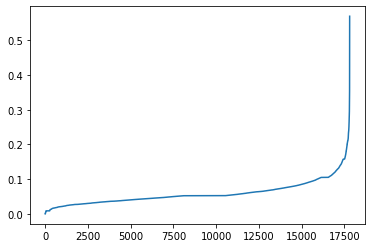

In [ ]:
from sklearn.neighbors import NearestNeighbors

X = dati_scalati_m

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import Birch


dbscan = DBSCAN(eps=0.19, min_samples=18)
dbscan.fit(X)

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
y_pred = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
n_noise_ = list(y_pred).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print(y_pred)

k = n_clusters


Estimated number of clusters: 2
[-1 -1 -1 ...  0  0  0]


In [ ]:
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
for i in range(-1,k):
  print(np.count_nonzero(y_pred == i))


0
11593
6224


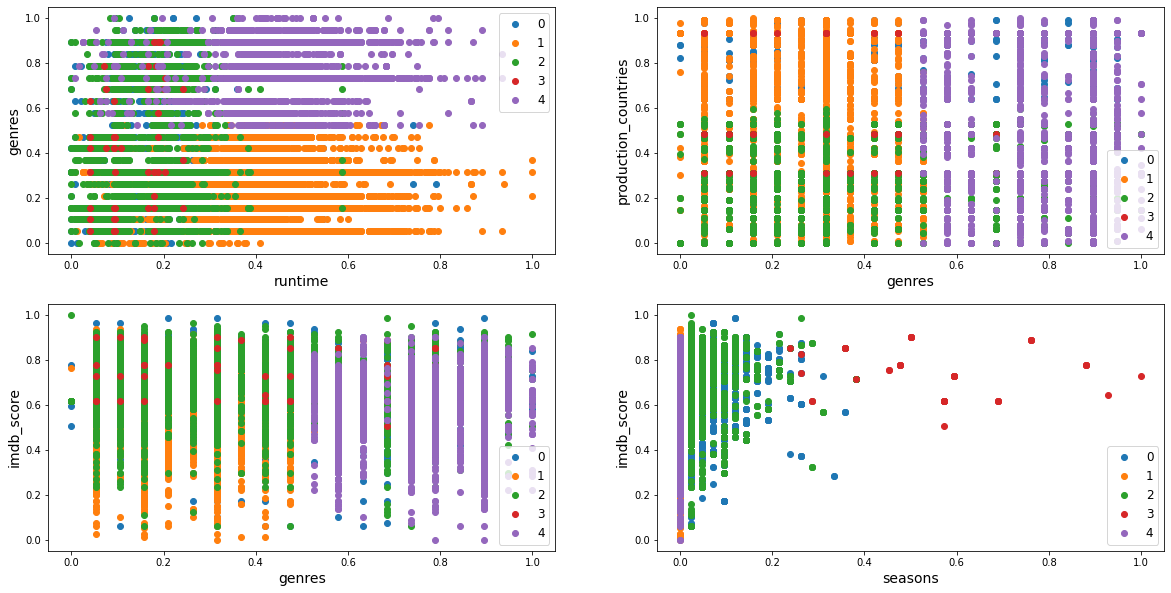

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
for i in range(0, k):
  plt.plot(X[y_pred==i, 2], X[y_pred==i, 3], "o",label=i) #con y==0 prendo solo la classe 0
plt.xlabel("runtime", fontsize=14)
plt.ylabel("genres", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(222)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 4],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.show()

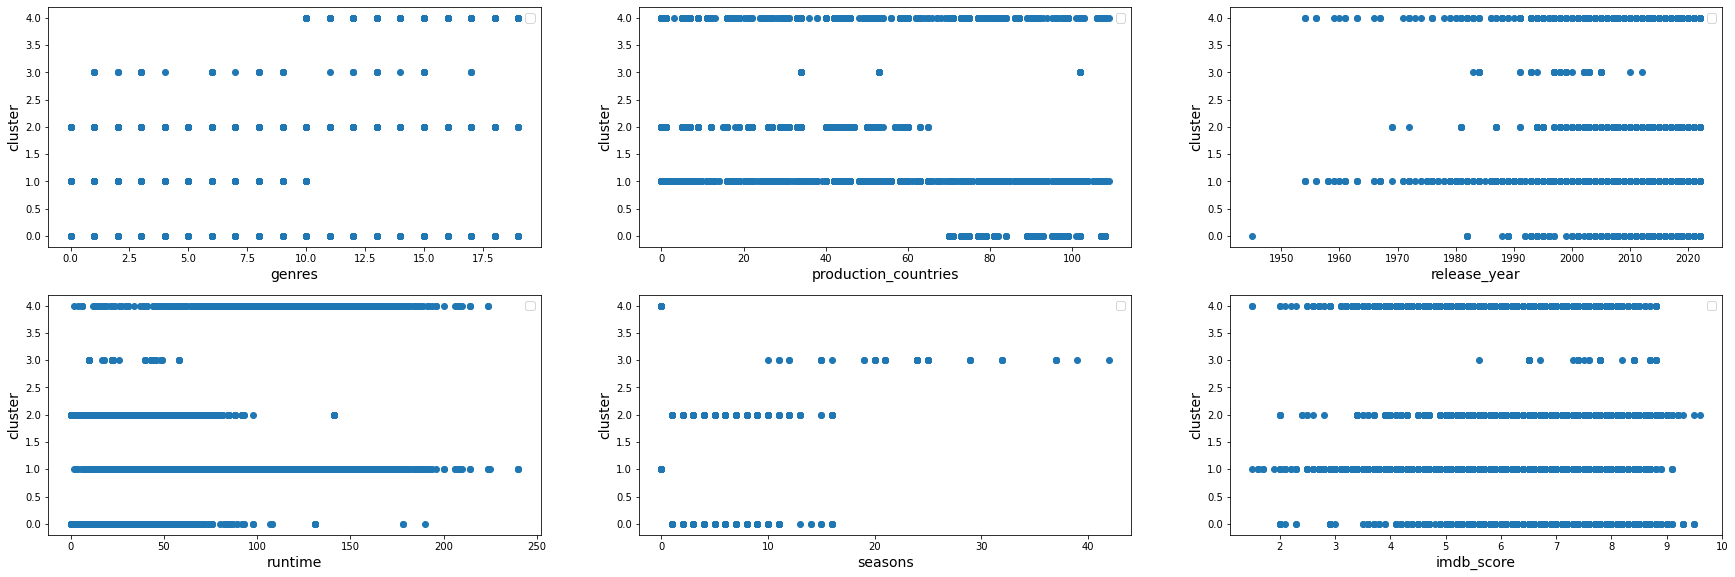

In [ ]:
plt.figure(figsize=(30, 15))

plt.subplot(331)

"""
for i in range(0, k):
  plt.plot(data_titles[y_pred==i,3], y_pred==i,"o", label=i) #con y==0 prendo solo la classe 0
"""
plt.plot(data_titles["genres"],y_pred , "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("genres", fontsize=14)
plt.legend(fontsize=12)


plt.subplot(332)
plt.plot(data_titles["production_countries"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(333)
plt.plot(data_titles["release_year"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("release_year", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(334)
plt.plot(data_titles["runtime"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("runtime", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(335)
plt.plot(data_titles["seasons"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("seasons", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(336)
plt.plot(data_titles["imdb_score"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""
plt.subplot(337)
plt.plot(data_titles["imdb_votes"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_votes", fontsize=14)
plt.legend(fontsize=12)


#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""

plt.show()

## Applico Birch alla persona

In [ ]:
y_pred_persona_scalata = brc.predict(persona_scalata)
#y_pred_persona_scalata = kmeans.predict(persona)



cluster_previsione = np.unique(y_pred_persona_scalata)
cluster_previsione

conta = np.zeros(k)
for i in range(0,len(y_pred_persona_scalata)):
  conta[y_pred_persona_scalata[i]] = conta[y_pred_persona_scalata[i]] + 1

conta

cluster = {}
for i in range(0,len(conta)):
  #print("Cluster",i,":",conta[i])
  cluster[i] = conta[i]

# ordino cluster
cluster = dict(sorted(cluster.items(), key=lambda item: item[1], reverse=True))
cluster = {x:y for x,y in cluster.items() if y!=0}
cluster

array([3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1,
       4, 1, 1, 4, 1, 1, 4, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_pred_persona_scalata

array([ 0., 77., 97.,  5., 15.])

In [ ]:
percentuale_affinita = conta/len(y_pred_persona_scalata)*100

percentuale_affinita_attore = {}

for i in range(0, len(percentuale_affinita)):
  percentuale_affinita_attore[i] = percentuale_affinita[i]

percentuale_affinita_attore = {x:y for x,y in percentuale_affinita_attore.items() if y!=0}

percentuale_affinita = percentuale_affinita[percentuale_affinita  != 0]
percentuale_affinita 

array([39.69072165, 50.        ,  2.57731959,  7.73195876])

In [ ]:
predizione = pd.DataFrame()
#predizione.loc[:, "affinity"] = []
for i in cluster_previsione:
  predizione = predizione.append(data_titles.iloc[y_pred == i].sample(2))


predizione

In [ ]:
id_pred = []

for i in range(0,len(predizione)):
  #print(i)
  id_pred.append(id_film.at[predizione.index[i], "id"])

id_pred


previsione_film = pd.DataFrame()
previsione_film.loc[:, "affinity"] = []

for i in range(0, len(id_pred)):
  previsione_film = previsione_film.append(final_data_titles[final_data_titles.id == id_pred[i]])

previsione_film = previsione_film.reset_index()
previsione_film = previsione_film.drop('index', axis=1)


for i in range(0,len(previsione_film),2):
  previsione_film.at[i:i+1,"affinity"] = percentuale_affinita[int(i/2)]


previsione_film

affinity        id             title   type  \
0  39.690722  tm463592  Little Miss Sumo  MOVIE   
1  39.690722  tm366383          Deliha 2  MOVIE   
2  50.000000   ts84398     Little Things   SHOW   
3  50.000000   ts86946           Osmosis   SHOW   
4   2.577320  ts251477   My First Errand   SHOW   
5   2.577320   ts21715  Thomas & Friends   SHOW   
6   7.731959  tm856375       The Decline  MOVIE   
7   7.731959  tm323616         The Visit  MOVIE   

                                         description  release_year  \
0  In an ancient sport traditionally reserved for...        2018.0   
1  Zeliha is back: Crazy and candid as ever, and ...        2018.0   
2  A cohabiting couple in their 20s navigate the ...        2016.0   
3  In Paris of the near future, a dating app matc...        2019.0   
4  “Hajimete no Otsukai” (First Errand) is a Japa...        1991.0   
5  Thomas & Friends is a British children's telev...        1984.0   
6  Anticipating a disaster, Antoine, a father, at...        2020.0   
7  Two couples living together in the same buildi...        2015.0   

  age_certification  runtime  \
0               NaN     18.0   
1                 G    106.0   
2             TV-MA     25.0   
3             TV-MA     42.0   
4              TV-G     18.0   
5              TV-Y     10.0   
6                 R     83.0   
7               NaN    130.0   

                                              genres production_countries  \
0                                  ['documentation']         ['JP', 'GB']   
1                                         ['comedy']               ['TR']   
2                     ['drama', 'romance', 'comedy']               ['IN']   
3                      ['drama', 'scifi', 'romance']               ['FR']   
4             ['documentation', 'family', 'reality']               ['JP']   
5  ['animation', 'family', 'comedy', 'fantasy', '...               ['GB']   
6                             ['thriller', 'action']               ['CA']   
7                  ['thriller', 'comedy', 'romance']                  NaN   

   seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      0.0         NaN        6.51     23439.0           27.973         5.8  
1      0.0   tt7871636        4.70      2594.0            5.949         5.9  
2      4.0   tt6522580        8.20      6542.0            6.822         7.8  
3      1.0   tt7043380        5.70      3041.0            8.783         5.9  
4     12.0         NaN        6.51     23439.0            7.730         7.8  
5     24.0   tt0086815        6.50      5104.0           42.196         6.5  
6      0.0  tt10307440        6.00      8782.0            7.679         6.2  
7      0.0  tt15119398        6.51     23439.0            0.600         6.0

la previsione di un film viene fatta cercando i film più vicini ad un dato film visto dall'utente all'interno dei vari cluster. Il più vicino avrà affinità maggiore e più aumenta la distanza più l'affinità si riduce. Bisogna dare un'affinità di default ai vari cluster in base a quanti film vengono visti per ogni cluster. 

In [ ]:
y_pred_persona_scalata

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4,
       1, 4, 1, 1, 1, 1, 4, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0, 7, 0, 4, 1, 1,
       1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 4, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 1, 4, 4, 7, 0, 0, 7, 0, 7, 0, 0, 0, 0, 7, 7, 0, 0, 0, 7, 0,
       7, 0, 0, 7, 0, 0, 7, 0, 7, 4, 1, 1, 1, 4, 4, 1, 4, 1, 1, 7, 0, 0,
       0, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4], dtype=int32)

In [ ]:
brc.subcluster_centers_

array([[1.        , 0.9384411 , 0.1538301 , 0.3865033 , 0.90660324,
        0.05822625, 0.66340453, 0.01253152, 0.01737737, 0.73566349],
       [0.        , 0.91293636, 0.41883125, 0.25543091, 0.55568203,
        0.        , 0.59394295, 0.01492307, 0.0106419 , 0.63303243],
       [1.        , 0.93267616, 0.15971185, 0.39993085, 0.3391619 ,
        0.05016423, 0.68712459, 0.00561534, 0.01224305, 0.74294473],
       [1.        , 0.70357143, 0.1440625 , 0.44868421, 0.72293578,
        0.59642857, 0.76608025, 0.04675262, 0.06984143, 0.75377368],
       [0.        , 0.91995802, 0.45195992, 0.77893381, 0.58646183,
        0.        , 0.57184104, 0.02200303, 0.01340608, 0.62029112]])

raggio più piccolo = cazzo di mattia

In [ ]:
y_pred_persona_scalata

array([3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1,
       4, 1, 1, 4, 1, 1, 4, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

film_top = pd.DataFrame()

for indice_cluster_key in range(0, 2):

  lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]])

  #index = random.randint(0, lunghezza)

  #persona_scalata[y_pred_persona_scalata == keys[0]][index]
  min_dist = 100000
  min_index = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(brc.subcluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index])
    if(dist < min_dist):
      min_dist = dist
      min_index = index



  dati_scalati_m[y_pred == keys[indice_cluster_key]]



  for index in range(0, lunghezza):
    film_utente = persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []
    for point in dati_scalati_m[y_pred == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= min_dist):
        film_affini.append(point)

        distanze_film_affini.append(np.linalg.norm(point - film_utente))

    if(len(film_affini) > 0):
      indici = []

      indice_film_utente = 0

      for i in range(0, len(dati_scalati_m)):
        for j in range(0, len(film_affini)):
          if((dati_scalati_m[i] == film_affini[j]).all()):
            indici.append(i)

          if((dati_scalati_m[i] == film_utente).all()):
            indice_film_utente = i
          
      id_pred = []

      id_film_utente = id_film.at[indice_film_utente, "id"]


      film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


      for i in range(0,len(indici)):
        coppia = []
        coppia.append(id_film.at[indici[i], "id"])
        coppia.append(distanze_film_affini[i])
        id_pred.append(coppia)


      id_pred_unico = []
      id_pred_unico_dist = []

      #id_pred_unico.append(id_pred[0])

      for i in range(0, len(id_pred)):
        if(not (contiene(id_pred_unico, id_pred[i][0]))):
          id_pred_unico.append(id_pred[i][0])
          id_pred_unico_dist.append(id_pred[i][1])
        else:
          for j in range(0, len(id_pred_unico)):
            if(id_pred_unico[j] == id_pred[i][0]):
              if(id_pred_unico_dist[j] > id_pred[i][1]):
                id_pred_unico_dist[j] = id_pred[i][1]
              



      film_vicini = pd.DataFrame()
      film_vicini.loc[:, "affinity"] = []

      for i in range(0, len(id_pred_unico)):
        film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

        
      for i in range(0, len(film_vicini)):
        film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



      for i in range(0, len(lista_film_persona)):
          film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

      film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)

  print(1)
  film_top.head(30)




film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

affinita_film_top = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  affinita_film_top = affinita_film_top.append(film_top[film_top.affinity == max].iloc[0])


affinita_film_top = affinita_film_top.sort_values(by=['affinity'], ascending=False)


affinita_film_top = affinita_film_top.reset_index()
affinita_film_top = affinita_film_top.drop('index', axis=1)

affinita_film_top

1
1


affinity        id                                         title   type  \
0    98.057254  tm167944  Berserk: The Golden Age Arc III - The Advent  MOVIE   
1    96.422947   ts86164                                     Hero Mask   SHOW   
2    96.395414  tm241990                                        Blame!  MOVIE   
3    96.217093  tm466832                      Dragon Quest: Your Story  MOVIE   
4    96.039535  ts256311                            High-Rise Invasion   SHOW   
..         ...       ...                                           ...    ...   
176  90.048749  tm186161                                          Boss  MOVIE   
177  90.040142  tm416341           HiGH&LOW The Movie 3: Final Mission  MOVIE   
178  90.030909  tm184732                                    Dhobi Ghat  MOVIE   
179  90.015769   ts77219                                Part-Time Idol   SHOW   
180  90.000775  tm850723                     Altered Carbon: Resleeved  MOVIE   

                                           description  release_year  \
0    A year has passed since Guts parted ways with ...        2013.0   
1    After a rash of mysterious deaths, Crown prose...        2018.0   
2    In the distant technological future, civilizat...        2017.0   
3    Luca follows in his father's footsteps to resc...        2019.0   
4    High-school girl Yuri suddenly finds herself o...        2021.0   
..                                                 ...           ...   
176  Disowned by his father as a boy, Surya is take...        2013.0   
177  In order to conceal past corruption by the gov...        2017.0   
178  Arun is a reclusive and lonely modern art pain...        2010.0   
179  This drama takes place in fictional entertainm...        2017.0   
180  On the planet Latimer, Takeshi Kovacs must pro...        2020.0   

    age_certification  runtime  \
0               NC-17    110.0   
1               TV-14     25.0   
2               PG-13    106.0   
3                  PG    102.0   
4               TV-MA     26.0   
..                ...      ...   
176             PG-13    143.0   
177               NaN    118.0   
178               NaN    102.0   
179             TV-14     40.0   
180               NaN     75.0   

                                                genres production_countries  \
0    ['drama', 'fantasy', 'animation', 'action', 'r...               ['JP']   
1    ['animation', 'action', 'thriller', 'scifi', '...               ['JP']   
2    ['scifi', 'animation', 'action', 'drama', 'thr...               ['JP']   
3    ['action', 'fantasy', 'animation', 'family', '...               ['JP']   
4    ['thriller', 'action', 'animation', 'horror', ...               ['JP']   
..                                                 ...                  ...   
176             ['comedy', 'drama', 'crime', 'action']               ['IN']   
177                                ['drama', 'action']               ['JP']   
178                                          ['drama']               ['IN']   
179             ['drama', 'family', 'music', 'comedy']               ['KR']   
180  ['scifi', 'animation', 'crime', 'drama', 'thri...               ['JP']   

     seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0        0.0   tt2358913         7.8     10173.0           41.099         7.6  
1        2.0   tt9316078         6.1       675.0            4.779         6.3  
2        0.0   tt6574146         6.6      8044.0           31.452         6.4  
3        0.0  tt10127562         6.5      2831.0           13.817         6.8  
4        1.0  tt13357164         6.6      2575.0           37.817         8.4  
..       ...         ...         ...         ...              ...         ...  
176      0.0   tt2571140         5.1     11159.0            3.181         5.7  
177      0.0   tt7624932         7.1       656.0            5.265         6.4  
178      0.0   tt1433810         7.0     13167.0            7.689         6.4  
179      1

In [ ]:
affinita_film_top.head(30)

affinity         id                                              title  \
0   98.057254   tm167944       Berserk: The Golden Age Arc III - The Advent   
1   96.422947    ts86164                                          Hero Mask   
2   96.395414   tm241990                                             Blame!   
3   96.217093   tm466832                           Dragon Quest: Your Story   
4   96.039535   ts256311                                 High-Rise Invasion   
5   95.828491   tm467848                                           NiNoKuni   
6   95.713415    ts79409                             A.I.C.O. -Incarnation-   
7   95.580202   ts218888                                                BNA   
8   95.561958   tm245271                                            Gantz:O   
9   95.515253   ts237513                                     Ju-On: Origins   
10  95.420543    tm38064  Berserk: The Golden Age Arc II - The Battle fo...   
11  95.335991    tm80339            Naruto: Ninja Clash in the Land of Snow   
12  95.305825   tm941531                                          The Beast   
13  95.169650    ts79988                                          Lost Song   
14  95.128187   ts215166                                              Scams   
15  95.030623   tm164557                                          Initial D   
16  95.022439   tm362881                                              Mirai   
17  94.936224    ts22249                                Kuroko's Basketball   
18  94.878803   tm960430                             Child of Kamiari Month   
19  94.832989    ts76603                                             Erased   
20  94.792282    ts56251                                               ID-0   
21  94.777861    ts82281                                         Zoids Wild   
22  94.673052    ts35201                       Food Wars! Shokugeki no Soma   
23  94.603516   ts217045                                             Levius   
24  94.525822   tm245176                                        Sand Castle   
25  94.500553   ts269881                                 Record of Ragnarok   
26  94.493707  tm1046932                                               Kate   
27  94.337615   tm143372                               Stand by Me Doraemon   
28  94.317894   tm282910                                          Fireworks   
29  94.263219   ts313668                         Tear Along the Dotted Line   

     type                                        description  release_year  \
0   MOVIE  A year has passed since Guts parted ways with ...        2013.0   
1    SHOW  After a rash of mysterious deaths, Crown prose...        2018.0   
2   MOVIE  In the distant technological future, civilizat...        2017.0   
3   MOVIE  Luca follows in his father's footsteps to resc...        2019.0   
4    SHOW  High-school girl Yuri suddenly finds herself o...        2021.0   
5   MOVIE  Adapted from the video game series of the same...        2019.0   
6    SHOW  In Japan in the year 2035, an accident known a...        2018.0   
7    SHOW  Morphed into a raccoon beastman, Michiru seeks...        2020.0   
8   MOVIE  Somewhere in Tokyo, there is a room. In that r...        2016.0   
9    SHOW  A paranormal researcher searches obsessively f...        2020.0   
10  MOVIE  The Band of the Hawk participates in the Midla...        2012.0   
11  MOVIE  Naruto is thrilled when he is sent on a missio...        2004.0   
12  MOVIE  To rescue his daughter, an unstable Special Fo...        2020.0   
13   SHOW  Rin, an energetic girl who loves to eat, lives...        2018.0   
14   SHOW  Kusano has a bright future with his fancy univ...        2019.0   
15  MOVIE  After winning his first competition, Takumi fo...        2005.0   
16  MOVIE  Unhappy after his new baby sister displaces hi...        2018.0   
17   SHOW  In the story, Kagami Taiga has just enrolled i...        2012.0   
18  MOVIE  This is a story of a 12-year-old girl, Kanna, ...        2021.

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[0]])

#index = random.randint(0, lunghezza)

#persona_scalata[y_pred_persona_scalata == keys[0]][index]
min_dist = 100000
min_index = 0
for index in range(0, lunghezza):
  dist = np.linalg.norm(brc.subcluster_centers_[keys[0]] - persona_scalata[y_pred_persona_scalata == keys[0]][index])
  if(dist < min_dist):
    min_dist = dist
    min_index = index

min_dist


0.20126273243110254

I dati scalati sono (ERANO) sbagliati.

In [ ]:
dati_scalati_m[y_pred == keys[0]]

film_affini = []

index = random.randint(0, lunghezza)

film_utente = persona_scalata[y_pred_persona_scalata == keys[0]][index]

distanze_film_affini = []

for point in dati_scalati_m[y_pred == keys[0]]:
  if(np.linalg.norm(point - film_utente) <= min_dist):
    film_affini.append(point)

    distanze_film_affini.append(np.linalg.norm(point - film_utente))



indici = []

indice_film_utente = 0

for i in range(0, len(dati_scalati_m)):
  for j in range(0, len(film_affini)):
    if((dati_scalati_m[i] == film_affini[j]).all()):
      indici.append(i)

    if((dati_scalati_m[i] == film_utente).all()):
      indice_film_utente = i
    
distanze_film_affini


In [ ]:
id_pred = []

id_film_utente = id_film.at[indice_film_utente, "id"]


film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


for i in range(0,len(indici)):
  coppia = []
  coppia.append(id_film.at[indici[i], "id"])
  coppia.append(distanze_film_affini[i])
  id_pred.append(coppia)


id_pred_unico = []
id_pred_unico_dist = []

#id_pred_unico.append(id_pred[0])

for i in range(0, len(id_pred)):
  if(not (contiene(id_pred_unico, id_pred[i][0]))):
    id_pred_unico.append(id_pred[i][0])
    id_pred_unico_dist.append(id_pred[i][1])
  else:
    for j in range(0, len(id_pred_unico)):
      if(id_pred_unico[j] == id_pred[i][0]):
        if(id_pred_unico_dist[j] > id_pred[i][1]):
          id_pred_unico_dist[j] = id_pred[i][1]
        

film_vicini = pd.DataFrame()
film_vicini.loc[:, "affinity"] = []

for i in range(0, len(id_pred_unico)):
  film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


film_vicini = film_vicini.reset_index()
film_vicini = film_vicini.drop('index', axis=1)

  
for i in range(0, len(film_vicini)):
  film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100

len(id_pred_unico)

52

Film dell'utente pescato a caso

In [ ]:
final_data_titles[final_data_titles.id == id_film_utente]

id                                              title   type  \
497  tm65142  One Piece: The Desert Princess and the Pirates...  MOVIE   

                                           description  release_year  \
497  A re-telling of the Alabaster Arc from One Pie...          2007   

    age_certification  runtime                                      genres  \
497             PG-13       89  ['comedy', 'drama', 'animation', 'action']   

    production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
497               ['JP']      0.0  tt1037116         6.9      1660.0   

     tmdb_popularity  tmdb_score  
497           38.807         6.7

Film trovarti vicino al film dell'utente

In [ ]:
film_vicini

affinity         id                                              title  \
0    86.475046  tm1077037  Chhota Bheem & Krishna: Pataliputra- City of t...   
1    86.629939  tm1077038                     Chhota Bheem: Journey to Petra   
2    86.316515    tm80059                         Naruto Shippuden the Movie   
3    84.473658   tm134235                            One Piece: Strong World   
4    86.525509    tm49405  Inuyasha the Movie: Affections Touching Across...   
5    95.298557    tm34846                    Bleach the Movie: Fade to Black   
6    93.987284    tm96037         Naruto Shippuden the Movie: The Lost Tower   
7    89.402076    tm93612                       Bleach the Movie: Hell Verse   
8    93.609838    tm36164                  Naruto Shippuden the Movie: Bonds   
9    92.129392   tm147494       Naruto Shippuden the Movie: The Will of Fire   
10   86.265560    tm89936                                             Arahan   
11   86.679737   tm105278  Inuyasha the Movie 2: The Castle Beyond the Lo...   
12   86.082004   tm150521                                           Accident   
13   92.444068    tm80339            Naruto: Ninja Clash in the Land of Snow   
14   85.235080    tm33729                                    Taxi No. 9 2 11   
15   94.756115    tm34524  One Piece: Episode of Chopper Plus: Bloom in t...   
16   89.019411   tm166293                                  The Blue Umbrella   
17   92.464871    tm24576     Naruto: Guardians of the Crescent Moon Kingdom   
18   84.312392    tm92977                                            Ishqiya   
19   85.755853   tm106625                          LSD: Love, Sex aur Dhokha   
20  100.000000    tm65142  One Piece: The Desert Princess and the Pirates...   
21   92.617972   tm177687               Naruto: Legend of the Stone of Gelel   
22   88.171477    tm89764    Inuyasha the Movie 4: Fire on the Mystic Island   
23   84.089658   tm138902  Inuyasha the Movie 3: Swords of an Honorable R...   
24   84.317246   tm104349                                         The Unjust   
25   84.174534    tm95434                                     Love in a Puff   
26   85.723530   tm102848                                        Peepli Live   
27   84.123752    tm34924                                      Beast Stalker   
28   87.320707    tm49865                                              Aamir   
29   87.576783   tm598375                           Chhota Bheem Aur Krishna   
30   86.527339    tm60844  Berserk: The Golden Age Arc I - The Egg of the...   
31   84.983167    tm38064  Berserk: The Golden Age Arc II - The Battle fo...   
32   86.084878   tm177258                                        Delhi Belly   
33   87.165462   tm177044           Naruto Shippuden the Movie: Blood Prison   
34   88.677784    tm59372                          Arjun: The Warrior Prince   
35   92.064484    tm54780                       Tiger & Bunny: The Beginning   
36   87.593573   tm143372                               Stand by Me Doraemon   
37   84.392484   tm152273                          Tiger & Bunny: The Rising   
38   86.509414   tm182580                                              Ghadi   
39   84.483199   tm175364                           Chhota Bheem Aur Hanuman   
40   86.337910  tm1194608                     Motu Patlu: Deep Sea Adventure   
41   86.238424   tm245271                                            Gantz:O   
42   84.478668   tm424879                                 Road To High & Low   
43   84.561412   tm362881                                              Mirai   
44   84.420915   tm241990                                             Blame!   
45   84.847280   tm413557                                         Okko's Inn   
46   89.102807   tm164557                                          Initial D   
47   85.207373   tm110923                                Divine Intervention   
48   84.644076   tm224255                                      Very Big Shot   
49   8

Droppiamo i film già visti dall'utente

In [ ]:
for i in range(0, len(lista_film_persona)):
    film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



film_vicini = film_vicini.reset_index()
film_vicini = film_vicini.drop('index', axis=1)



In [ ]:
film_vicini[film_vicini.affinity > 90.00]

affinity       id                                    title   type  \
6   92.444068  tm80339  Naruto: Ninja Clash in the Land of Snow  MOVIE   
23  92.064484  tm54780             Tiger & Bunny: The Beginning  MOVIE   

                                          description  release_year  \
6   Naruto is thrilled when he is sent on a missio...        2004.0   
23  Set on an alternative Earth, Superheroes are c...        2012.0   

   age_certification  runtime                                        genres  \
6              PG-13     90.0  ['comedy', 'fantasy', 'animation', 'action']   
23                PG     88.0              ['scifi', 'animation', 'action']   

   production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
6                ['JP']      0.0  tt0476680         6.6      6866.0   
23               ['JP']      0.0  tt2507174         6.6       264.0   

    tmdb_popularity  tmdb_score  
6            50.604         7.2  
23            2.996         6.5

## Previsione film cluster maggioritario con calcolo affinità basato sulla distanza punti

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

indice_cluster_key = 0

lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]])

#index = random.randint(0, lunghezza)

#persona_scalata[y_pred_persona_scalata == keys[0]][index]
min_dist = 100000
min_index = 0
for index in range(0, lunghezza):
  dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index])
  if(dist < min_dist):
    min_dist = dist
    min_index = index



dati_scalati_m[y_pred == keys[indice_cluster_key]]




film_top = pd.DataFrame()
for index in range(0, lunghezza):
  film_utente = persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index]

  distanze_film_affini = []
  film_affini = []
  for point in dati_scalati_m[y_pred == keys[indice_cluster_key]]:
    if(np.linalg.norm(point - film_utente) <= min_dist):
      film_affini.append(point)

      distanze_film_affini.append(np.linalg.norm(point - film_utente))


  indici = []

  indice_film_utente = 0

  for i in range(0, len(dati_scalati_m)):
    for j in range(0, len(film_affini)):
      if((dati_scalati_m[i] == film_affini[j]).all()):
        indici.append(i)

      if((dati_scalati_m[i] == film_utente).all()):
        indice_film_utente = i
      
  id_pred = []

  id_film_utente = id_film.at[indice_film_utente, "id"]


  film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


  for i in range(0,len(indici)):
    coppia = []
    coppia.append(id_film.at[indici[i], "id"])
    coppia.append(distanze_film_affini[i])
    id_pred.append(coppia)


  id_pred_unico = []
  id_pred_unico_dist = []

  #id_pred_unico.append(id_pred[0])

  for i in range(0, len(id_pred)):
    if(not (contiene(id_pred_unico, id_pred[i][0]))):
      id_pred_unico.append(id_pred[i][0])
      id_pred_unico_dist.append(id_pred[i][1])
    else:
      for j in range(0, len(id_pred_unico)):
        if(id_pred_unico[j] == id_pred[i][0]):
          if(id_pred_unico_dist[j] > id_pred[i][1]):
            id_pred_unico_dist[j] = id_pred[i][1]
          



  film_vicini = pd.DataFrame()
  film_vicini.loc[:, "affinity"] = []

  for i in range(0, len(id_pred_unico)):
    film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


  film_vicini = film_vicini.reset_index()
  film_vicini = film_vicini.drop('index', axis=1)

    
  for i in range(0, len(film_vicini)):
    film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



  for i in range(0, len(lista_film_persona)):
      film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



  film_vicini = film_vicini.reset_index()
  film_vicini = film_vicini.drop('index', axis=1)

  film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)
  """
  frames = [film_top, film_vicini]

  pd.concat(frames)
  """



film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

affinita_film_top = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  affinita_film_top = affinita_film_top.append(film_top[film_top.affinity == max].iloc[0])


affinita_film_top = affinita_film_top.sort_values(by=['affinity'], ascending=False)


affinita_film_top = affinita_film_top.reset_index()
affinita_film_top = affinita_film_top.drop('index', axis=1)

affinita_film_top

3
3
3
2
4
3
2
3
3
3
2
2
3
3
2
0
0
0
0
3
2
2
2
2
2
4
3
2
4
4
2
2
2
3
3
2
2
0
0
0
0
0
4
3
4
4
3
6
7
8
11
26
11
15
13
0
0
0
9
14
1
3
3
17
13
0
0
0
0
0
0
0
0
0
1
1
0


affinity        id                                         title   type  \
0   98.057254  tm167944  Berserk: The Golden Age Arc III - The Advent  MOVIE   
1   96.395414  tm241990                                        Blame!  MOVIE   
2   96.217093  tm466832                      Dragon Quest: Your Story  MOVIE   
3   95.828491  tm467848                                      NiNoKuni  MOVIE   
4   95.561958  tm245271                                       Gantz:O  MOVIE   
..        ...       ...                                           ...    ...   
81  90.122353  tm145791                                   Miss Granny  MOVIE   
82  90.048749  tm186161                                          Boss  MOVIE   
83  90.040142  tm416341           HiGH&LOW The Movie 3: Final Mission  MOVIE   
84  90.030909  tm184732                                    Dhobi Ghat  MOVIE   
85  90.000775  tm850723                     Altered Carbon: Resleeved  MOVIE   

                                          description  release_year  \
0   A year has passed since Guts parted ways with ...        2013.0   
1   In the distant technological future, civilizat...        2017.0   
2   Luca follows in his father's footsteps to resc...        2019.0   
3   Adapted from the video game series of the same...        2019.0   
4   Somewhere in Tokyo, there is a room. In that r...        2016.0   
..                                                ...           ...   
81  An unappreciated old granny magically turns 20...        2014.0   
82  Disowned by his father as a boy, Surya is take...        2013.0   
83  In order to conceal past corruption by the gov...        2017.0   
84  Arun is a reclusive and lonely modern art pain...        2010.0   
85  On the planet Latimer, Takeshi Kovacs must pro...        2020.0   

   age_certification  runtime  \
0              NC-17    110.0   
1              PG-13    106.0   
2                 PG    102.0   
3              PG-13    106.0   
4              NC-17     95.0   
..               ...      ...   
81               NaN    124.0   
82             PG-13    143.0   
83               NaN    118.0   
84               NaN    102.0   
85               NaN     75.0   

                                               genres production_countries  \
0   ['drama', 'fantasy', 'animation', 'action', 'r...               ['JP']   
1   ['scifi', 'animation', 'action', 'drama', 'thr...               ['JP']   
2   ['action', 'fantasy', 'animation', 'family', '...               ['JP']   
3   ['family', 'fantasy', 'romance', 'animation', ...               ['JP']   
4   ['scifi', 'action', 'animation', 'fantasy', 't...               ['JP']   
..                                                ...                  ...   
81  ['drama', 'comedy', 'music', 'family', 'fantasy']               ['KR']   
82             ['comedy', 'drama', 'crime', 'action']               ['IN']   
83                                ['drama', 'action']               ['JP']   
84                                          ['drama']               ['IN']   
85  ['scifi', 'animation', 'crime', 'drama', 'thri...               ['JP']   

    seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0       0.0   tt2358913         7.8     10173.0           41.099         7.6  
1       0.0   tt6574146         6.6      8044.0           31.452         6.4  
2       0.0  tt10127562         6.5      2831.0           13.817         6.8  
3       0.0   tt9760504         6.1      3338.0           19.730         6.7  
4       0.0   tt5923962         7.1     14950.0           28.818         7.3  
..      ...         ...         ...         ...              ...         ...  
81      0.0   tt3516378         7.2      3508.0            6.475         7.4  
82      0.0   tt2571140         5.1     11159.0            3.181         5.7  
83      0.0   tt7624932         7.1       656.0            5.265         6.4  
84      0.0   tt1433810         7.0     13167.0            7.689   

In [ ]:
affinita_film_top.head(30)

affinity         id                                              title  \
0   98.057254   tm167944       Berserk: The Golden Age Arc III - The Advent   
1   96.395414   tm241990                                             Blame!   
2   96.217093   tm466832                           Dragon Quest: Your Story   
3   95.828491   tm467848                                           NiNoKuni   
4   95.561958   tm245271                                            Gantz:O   
5   95.420543    tm38064  Berserk: The Golden Age Arc II - The Battle fo...   
6   95.335991    tm80339            Naruto: Ninja Clash in the Land of Snow   
7   95.305825   tm941531                                          The Beast   
8   95.030623   tm164557                                          Initial D   
9   95.022439   tm362881                                              Mirai   
10  94.878803   tm960430                             Child of Kamiari Month   
11  94.525822   tm245176                                        Sand Castle   
12  94.493707  tm1046932                                               Kate   
13  94.337615   tm143372                               Stand by Me Doraemon   
14  94.317894   tm282910                                          Fireworks   
15  94.256877   tm941382                             Stand by Me Doraemon 2   
16  94.119102   tm413557                                         Okko's Inn   
17  93.912121   tm441231                                     Murder Mystery   
18  93.801947   tm317110                                      Psychokinesis   
19  93.750019   tm843938                                        18 Presents   
20  93.601519   tm836449                                          Tuna Girl   
21  93.579251  tm1038327                                            Beckett   
22  93.362765   tm460829                                Children of the Sea   
23  93.327896   tm451548                                          The Fable   
24  93.298596   tm357708                                           The Bros   
25  93.264771  tm1198504       Ghost in the Shell: SAC_2045 Sustainable War   
26  93.138401   tm451078  Pokemon the Movie: Mewtwo Strikes Back - Evolu...   
27  92.891038  tm1005109                        Kingdom: Ashin of the North   
28  92.756229   tm370212                                             Adrift   
29  92.712618   tm450375                                          Thackeray   

     type                                        description  release_year  \
0   MOVIE  A year has passed since Guts parted ways with ...        2013.0   
1   MOVIE  In the distant technological future, civilizat...        2017.0   
2   MOVIE  Luca follows in his father's footsteps to resc...        2019.0   
3   MOVIE  Adapted from the video game series of the same...        2019.0   
4   MOVIE  Somewhere in Tokyo, there is a room. In that r...        2016.0   
5   MOVIE  The Band of the Hawk participates in the Midla...        2012.0   
6   MOVIE  Naruto is thrilled when he is sent on a missio...        2004.0   
7   MOVIE  To rescue his daughter, an unstable Special Fo...        2020.0   
8   MOVIE  After winning his first competition, Takumi fo...        2005.0   
9   MOVIE  Unhappy after his new baby sister displaces hi...        2018.0   
10  MOVIE  This is a story of a 12-year-old girl, Kanna, ...        2021.0   
11  MOVIE  Set during the occupation of Iraq, a squad of ...        2017.0   
12  MOVIE  A ruthless criminal operative has less than 24...        2021.0   
13  MOVIE  In the suburbs of Tokyo some time ago, there l...        2014.0   
14  MOVIE  Moshimo, Japan. The annual fireworks festival ...        2017.0   
15  MOVIE  She and her beloved Shizuka are finally marrie...        2020.0   
16  MOVIE  12-year-old Oriko Seki, who lost her parents i...        2018.0   
17  MOVIE  On a long-awaited trip to Europe, a New York C...        2019.0   
18  MOVIE  An ordinary guy suddenly finds he has superpow...        2018.

## Previsione film di tutti i cluster con calcolo affinità basato sulla distanza punti

In [ ]:
cluster

{0: 77.0, 1: 72.0, 4: 30.0, 7: 15.0}

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

film_top = pd.DataFrame()

for indice_cluster_key in range(0, 2):

  lunghezza = len(persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]])

  #index = random.randint(0, lunghezza)

  #persona_scalata[y_pred_persona_scalata == keys[0]][index]
  min_dist = 100000
  min_index = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index])
    if(dist < min_dist):
      min_dist = dist
      min_index = index



  dati_scalati_m[y_pred == keys[indice_cluster_key]]



  for index in range(0, lunghezza):
    film_utente = persona_scalata[y_pred_persona_scalata == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []
    for point in dati_scalati_m[y_pred == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= min_dist):
        film_affini.append(point)

        distanze_film_affini.append(np.linalg.norm(point - film_utente))

    if(len(film_affini) > 0):
      indici = []

      indice_film_utente = 0

      for i in range(0, len(dati_scalati_m)):
        for j in range(0, len(film_affini)):
          if((dati_scalati_m[i] == film_affini[j]).all()):
            indici.append(i)

          if((dati_scalati_m[i] == film_utente).all()):
            indice_film_utente = i
          
      id_pred = []

      id_film_utente = id_film.at[indice_film_utente, "id"]


      film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


      for i in range(0,len(indici)):
        coppia = []
        coppia.append(id_film.at[indici[i], "id"])
        coppia.append(distanze_film_affini[i])
        id_pred.append(coppia)


      id_pred_unico = []
      id_pred_unico_dist = []

      #id_pred_unico.append(id_pred[0])

      for i in range(0, len(id_pred)):
        if(not (contiene(id_pred_unico, id_pred[i][0]))):
          id_pred_unico.append(id_pred[i][0])
          id_pred_unico_dist.append(id_pred[i][1])
        else:
          for j in range(0, len(id_pred_unico)):
            if(id_pred_unico[j] == id_pred[i][0]):
              if(id_pred_unico_dist[j] > id_pred[i][1]):
                id_pred_unico_dist[j] = id_pred[i][1]
              



      film_vicini = pd.DataFrame()
      film_vicini.loc[:, "affinity"] = []

      for i in range(0, len(id_pred_unico)):
        film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

        
      for i in range(0, len(film_vicini)):
        film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



      for i in range(0, len(lista_film_persona)):
          film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

      film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)

  print(1)
  film_top.head(30)




film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

affinita_film_top = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  affinita_film_top = affinita_film_top.append(film_top[film_top.affinity == max].iloc[0])


affinita_film_top = affinita_film_top.sort_values(by=['affinity'], ascending=False)


affinita_film_top = affinita_film_top.reset_index()
affinita_film_top = affinita_film_top.drop('index', axis=1)

affinita_film_top

In [ ]:
affinita_film_top.head(20)

## creo la lista film dell'utente

In [ ]:
len(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 46)])

36

In [ ]:
data_titles[(data_titles.release_year < 1990)]

In [ ]:
final_data_titles

In [ ]:
data_titles

In [ ]:
#persona = data_titles.iloc[2:5].append(data_titles.iloc[20:30].append(data_titles.iloc[100:200]))
persona = data_titles[(data_titles.seasons > 10) & (data_titles.production_countries == 102)].iloc[2:5].append(data_titles[(data_titles.genres == 6) & (data_titles.production_countries == 102)].iloc[100:150].append(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 102)].iloc[220:270].append(data_titles[(data_titles.genres == 8) & (data_titles.production_countries == 46)].iloc[0:30])))

#persona = data_titles[(data_titles.genres >8) & (data_titles.production_countries >60) & (data_titles.seasons == 0)]

id_film_utente = []

for i in range(0,len(persona)):
  id_film_utente.append(id_film.at[persona.index[i], "id"])



persona = persona.reset_index()
persona = persona.drop('index', axis=1)

id_film_utente = np.unique(np.array(id_film_utente))

len(list(id_film_utente))

133

In [ ]:
# Initialise the Scaler
standardScaler = StandardScaler()
minMaxScaler = MinMaxScaler()
 
# To scale data
dati_scalati_m = minMaxScaler.fit_transform(persona)
 
# To scale data
dati_scalati_s = standardScaler.fit_transform(persona)

persona_scalata = dati_scalati_m

persona_scalata

array([[1.00000000e+00, 5.12820513e-01, 2.12435233e-01, ...,
        1.00744548e-02, 7.88415517e-03, 1.45454545e-01],
       [1.00000000e+00, 7.43589744e-01, 2.02072539e-01, ...,
        2.24383536e-03, 7.05800253e-03, 6.18181818e-01],
       [1.00000000e+00, 3.84615385e-01, 1.91709845e-01, ...,
        1.88572262e-03, 9.95911619e-03, 5.81818182e-01],
       ...,
       [0.00000000e+00, 9.23076923e-01, 7.09844560e-01, ...,
        8.51362377e-04, 7.24552699e-04, 5.45454545e-01],
       [0.00000000e+00, 1.00000000e+00, 8.80829016e-01, ...,
        1.42175265e-03, 4.43672414e-03, 4.00000000e-01],
       [0.00000000e+00, 1.00000000e+00, 7.51295337e-01, ...,
        6.67801441e-04, 6.27481216e-03, 2.72727273e-01]])

## cluster con pescaggio casuale in base all'attore

In [ ]:
attori_film_visti = pd.DataFrame()

for i in range(0, len(id_film_utente)):
  attori_film_visti = attori_film_visti.append(data_credits[data_credits.id == id_film_utente[i]])

attori_film_visti

person_id        id                 name        character   role
8976       1675  tm100015           Idris Elba  Gordon Jennings  ACTOR
8977       2673  tm100015          Paul Walker      John Rahway  ACTOR
8978      13138  tm100015          Matt Dillon      Jack Welles  ACTOR
8979       5130  tm100015         Michael Ealy      Jake Attica  ACTOR
8980      13145  tm100015        Jay Hernandez    Eddie Hatcher  ACTOR
...         ...       ...                  ...              ...    ...
4473      84012       ts9        Ross Marquand            Aaron  ACTOR
4474      18053       ts9         Khary Payton   Ezekiel Sutton  ACTOR
4475     815971       ts9       Cooper Andrews            Jerry  ACTOR
4476       6959       ts9     Callan McAuliffe            Alden  ACTOR
4477       5577       ts9  Jeffrey Dean Morgan      Negan Smith  ACTOR

[2688 rows x 5 columns]

In [ ]:
a = pd.DataFrame(attori_film_visti.groupby(['person_id']).size())
a = a[0]

ricorrenza_attori = dict(a)

ricorrenza_attori = dict(sorted(ricorrenza_attori.items(), key=lambda item: item[1], reverse=True))

attori = []
keys = list(ricorrenza_attori.keys())
for i in range(0,4):
  attori.append(keys[i])

ricorrenza_attori


{3385: 4,
 7204: 4,
 1000: 3,
 2293: 3,
 2718: 3,
 4696: 3,
 6066: 3,
 13923: 3,
 14142: 3,
 30307: 3,
 55478: 3,
 58669: 3,
 61013: 3,
 124577: 3,
 182985: 3,
 1641: 2,
 1690: 2,
 1737: 2,
 1764: 2,
 1855: 2,
 2275: 2,
 2322: 2,
 2327: 2,
 2329: 2,
 2779: 2,
 2863: 2,
 3036: 2,
 3194: 2,
 3776: 2,
 4081: 2,
 4888: 2,
 5115: 2,
 5145: 2,
 5150: 2,
 5313: 2,
 5479: 2,
 5482: 2,
 5567: 2,
 5834: 2,
 6062: 2,
 6068: 2,
 6302: 2,
 6504: 2,
 6653: 2,
 7198: 2,
 7909: 2,
 7991: 2,
 7997: 2,
 8178: 2,
 8472: 2,
 8642: 2,
 8658: 2,
 8707: 2,
 8969: 2,
 9233: 2,
 9380: 2,
 9666: 2,
 9756: 2,
 10042: 2,
 10573: 2,
 10876: 2,
 11230: 2,
 11691: 2,
 12022: 2,
 12429: 2,
 12521: 2,
 12618: 2,
 12664: 2,
 13751: 2,
 14151: 2,
 14152: 2,
 15065: 2,
 15828: 2,
 17733: 2,
 18312: 2,
 18636: 2,
 24359: 2,
 25396: 2,
 28810: 2,
 36047: 2,
 37297: 2,
 38212: 2,
 44698: 2,
 45445: 2,
 47695: 2,
 48004: 2,
 54231: 2,
 56159: 2,
 56781: 2,
 61021: 2,
 61324: 2,
 62774: 2,
 65820: 2,
 66027: 2,
 69009: 2,
 78

Abbiamo i 4 attori più "visti"

In [ ]:
attori

[3385, 7204, 1000, 2293]

In [ ]:
id_film

id
0       ts300399
1        tm70993
2        tm14350
3        tm81728
4        ts45948
...          ...
17812  tm1045018
17813   tm996479
17814   tm996479
17815   tm996479
17816   tm996479

[17817 rows x 1 columns]

In [ ]:
#film dell'attore

film_attori_best = []
for i in range(0,len(attori)):
  film_attore = data_credits[data_credits.person_id == attori[i]]
  film_attore = film_attore["id"]
  film_attore = film_attore.unique()
  film_attori_best.append(list(film_attore))

#prendiamo solo quelli del cluster che ci intertessa
film_attori_best

[['tm89677',
  'tm101334',
  'tm100015',
  'tm208903',
  'tm444247',
  'tm931686',
  'tm1082564',
  'ts108042',
  'tm314863'],
 ['tm27911', 'tm148270', 'tm74780', 'tm88045'],
 ['tm192199',
  'tm111828',
  'tm27911',
  'tm195620',
  'tm44730',
  'ts35251',
  'tm366820'],
 ['tm12499',
  'tm133374',
  'tm23935',
  'tm159901',
  'tm77649',
  'tm374132',
  'tm1092864']]

In [ ]:
def contiene(array, n):
    for i in range(0,len(array)):
        if array[i] == n:
            return True
    return False

keys = list(cluster.keys())

film_attori_cluster = []

for i in range(0, len(attori)):
  cluster_max = id_film.iloc[y_pred==keys[i]]
  cluster_max = list(cluster_max["id"])

  films = []
  for film in film_attori_best[i]:
    if(contiene(cluster_max, film)):
      films.append(film)
  
  film_attori_cluster.append(films)

film_attori_cluster

[[], [], [], []]

In [ ]:
predizione_su_attori = pd.DataFrame()
keys = list(cluster.keys())

for i in range(0,len(attori)):
  predizione_su_attore = pd.DataFrame()
  for film in film_attori_cluster[i]:
    predizione_su_attore = predizione_su_attore.append(final_data_titles[final_data_titles.id == film])
  
  if(len(predizione_su_attore) == 1):
    predizione_su_attori = predizione_su_attori.append(predizione_su_attore.sample(1))
    predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred == keys[i]].sample(1))
  elif(len(predizione_su_attore) > 1):
    predizione_su_attori = predizione_su_attori.append(predizione_su_attore.sample(2))
  else:
    predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred == keys[i]].sample(2))

for i in range(len(attori), len(keys)):
  print(keys[i])
  predizione_su_attori = predizione_su_attori.append(data_titles.iloc[y_pred ==  keys[i]].sample(2))
  
predizione_su_attori



type  release_year  runtime  genres  production_countries  seasons  \
3332    0.0          2011      115       3                    46      0.0   
14135   0.0          2002       92       3                    33      0.0   
6586    1.0          2018       26       6                    53      2.0   
7610    1.0          2017       11       2                    58      1.0   
5570    1.0          2018       25      15                    53      1.0   
7784    1.0          2018       45      14                    21      1.0   
4917    0.0          2016       88      14                    30      0.0   
7641    0.0          2018      105      17                    29      0.0   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
3332          5.3       392.0            1.489       5.000  
14135         6.6      3598.0            2.894       6.400  
6586          7.2       912.0           10.181       5.900  
7610          8.5        36.0            0.600       6.830  
5570          7.6     19465.0           37.228       7.887  
7784          7.5       225.0            3.082       8.200  
4917          6.7      4228.0           17.857       7.200  
7641          4.5       455.0            2.001       6.100

In [ ]:
predizione_su_attori.iloc[0,:]

type                       0.000
release_year            2011.000
runtime                  115.000
genres                     3.000
production_countries      46.000
seasons                    0.000
imdb_score                 5.300
imdb_votes               392.000
tmdb_popularity            1.489
tmdb_score                 5.000
Name: 3332, dtype: float64

In [ ]:
predizione_su_attori.isnull().iloc[1,0]

False

In [ ]:
id_film

id
0       ts300399
1        tm70993
2        tm14350
3        tm81728
4        ts45948
...          ...
17812  tm1045018
17813   tm996479
17814   tm996479
17815   tm996479
17816   tm996479

[17817 rows x 1 columns]

In [ ]:
predizione_su_attori.loc[[predizione_su_attori.index[0]]]

type  release_year  runtime  genres  production_countries  seasons  \
3332   0.0          2011      115       3                    46      0.0   

      imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
3332         5.3       392.0            1.489         5.0

In [ ]:
percentuale_affinita

array([40.90909091,  7.57575758, 15.15151515, 36.36363636])

In [ ]:
id_pred = []
predizione_con_attori = pd.DataFrame()
predizione_con_attori.loc[:, "affinity"] = []

for i in range(0,len(predizione_su_attori)):
  if(predizione_su_attori.isnull().iloc[i,0]):
    #print(predizione_su_attori.iloc[i,0])
    #id_pred.append(id_film.at[predizione_su_attori.index[i], "id"])
    #predizione_su_attori[predizione_su_attori.index[i]]
    #predizione_su_attori.iloc[i,:] = final_data_titles[final_data_titles.id == id_film.at[predizione_su_attori.index[i], "id"]]
    predizione_con_attori = predizione_con_attori.append(final_data_titles[final_data_titles.id == id_film.at[predizione_su_attori.index[i], "id"]])
  else:
    predizione_con_attori = predizione_con_attori.append(predizione_su_attori.loc[[predizione_su_attori.index[i]]])

percentuale_affinita_attore = dict(sorted(percentuale_affinita_attore.items(), key=lambda item: item[1], reverse=True))
keys = list(percentuale_affinita_attore.keys())

predizione_con_attori = predizione_con_attori.reset_index()
predizione_con_attori = predizione_con_attori.drop('index', axis=1)

for i in range(0,len(predizione_con_attori),2):
  predizione_con_attori.at[i:i+1,"affinity"] = percentuale_affinita_attore[keys[int(i/2)]]

predizione_con_attori

affinity  type  release_year  runtime  genres  production_countries  \
0  40.909091   0.0        2011.0    115.0     3.0                  46.0   
1  40.909091   0.0        2002.0     92.0     3.0                  33.0   
2  36.363636   1.0        2018.0     26.0     6.0                  53.0   
3  36.363636   1.0        2017.0     11.0     2.0                  58.0   
4  15.151515   1.0        2018.0     25.0    15.0                  53.0   
5  15.151515   1.0        2018.0     45.0    14.0                  21.0   
6   7.575758   0.0        2016.0     88.0    14.0                  30.0   
7   7.575758   0.0        2018.0    105.0    17.0                  29.0   

   seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      0.0         5.3       392.0            1.489       5.000  
1      0.0         6.6      3598.0            2.894       6.400  
2      2.0         7.2       912.0           10.181       5.900  
3      1.0         8.5        36.0            0.600       6.830  
4      1.0         7.6     19465.0           37.228       7.887  
5      1.0         7.5       225.0            3.082       8.200  
6      0.0         6.7      4228.0           17.857       7.200  
7      0.0         4.5       455.0            2.001       6.100

In [ ]:
for i in range(0,50):
  print(np.count_nonzero(y_pred == i))


795
2565
1359
1921
3515
1695
1469
965
1184
2349
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## cluster pescaggio casuale

In [ ]:
percentuale_affinita = conta/len(y_pred_persona_scalata)*100

percentuale_affinita_attore = {}

for i in range(0, len(percentuale_affinita)):
  percentuale_affinita_attore[i] = percentuale_affinita[i]

percentuale_affinita_attore = {x:y for x,y in percentuale_affinita_attore.items() if y!=0}

percentuale_affinita = percentuale_affinita[percentuale_affinita  != 0]
percentuale_affinita 

array([40.90909091,  7.57575758, 15.15151515, 36.36363636])

Controllare che il film previsto non sia un film già visto!! 
Cambiare anche il nome del data_tiles non numerico in modo da usare la corrispondenza e stampare il titolo del film testuale

In [ ]:
cluster_previsione

array([1, 5, 7, 8], dtype=int32)

In [ ]:
predizione = pd.DataFrame()
#predizione.loc[:, "affinity"] = []
for i in cluster_previsione:
  predizione = predizione.append(data_titles.iloc[y_pred == i].sample(2))

#predizione = predizione.reset_index()
#predizione = predizione.drop('index', axis=1)

"""
for i in range(0,len(predizione),2):
  predizione.at[i:i+1,"affinity"] = percentuale_affinita[int(i/2)]
"""


predizione


type  release_year  runtime  genres  production_countries  seasons  \
2603    0.0          2007       89       2                    53      0.0   
10149   0.0          2019       92      10                    51      0.0   
10572   0.0          2020       90      17                    46      0.0   
16092   0.0          2018       98      14                    46      0.0   
14634   1.0          2016       56      10                    34      5.0   
9989    1.0          2019       66      18                    58      2.0   
11933   1.0          2022       29       2                    53      1.0   
9554    1.0          2019       63       8                    58      1.0   

       imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
2603         6.90      1660.0           38.807         6.7  
10149        6.50      1548.0            8.190         7.1  
10572        3.50      1230.0            1.950         4.8  
16092        7.70      7109.0            5.830         7.1  
14634        8.70    194243.0           75.521         8.2  
9989         6.51     23439.0            6.992         8.5  
11933        7.00       749.0            1.915         7.6  
9554         7.80      1405.0           24.844         8.4

In [ ]:
id_pred = []

for i in range(0,len(predizione)):
  #print(i)
  id_pred.append(id_film.at[predizione.index[i], "id"])

id_pred


previsione_film = pd.DataFrame()
previsione_film.loc[:, "affinity"] = []

for i in range(0, len(id_pred)):
  previsione_film = previsione_film.append(final_data_titles[final_data_titles.id == id_pred[i]])

previsione_film = previsione_film.reset_index()
previsione_film = previsione_film.drop('index', axis=1)


for i in range(0,len(previsione_film),2):
  previsione_film.at[i:i+1,"affinity"] = percentuale_affinita[int(i/2)]


previsione_film

affinity        id                                              title  \
0  40.909091   tm65142  One Piece: The Desert Princess and the Pirates...   
1  40.909091  tm817087                       #AnneFrank. Parallel Stories   
2   7.575758  tm940566                                        Kaali Khuhi   
3   7.575758  tm409817                                                Sir   
4  15.151515   ts42069                                          The Crown   
5  15.151515   ts91125                                     Chief of Staff   
6  36.363636  ts343492                                Thermae Romae Novae   
7  36.363636   ts90902                                        Search: WWW   

    type                                        description  release_year  \
0  MOVIE  A re-telling of the Alabaster Arc from One Pie...        2007.0   
1  MOVIE  One single Anne Frank moves us more than the c...        2019.0   
2  MOVIE  When a restless spirit curses a Punjab village...        2020.0   
3  MOVIE  A young widow is hired as the domestic helper ...        2018.0   
4   SHOW  The gripping, decades-spanning inside story of...        2016.0   
5   SHOW  As a chief of staff in the National Assembly, ...        2019.0   
6   SHOW  A proud bath architect in ancient Rome starts ...        2022.0   
7   SHOW  The stories of ambitious career women working ...        2019.0   

  age_certification  runtime                                         genres  \
0             PG-13     89.0     ['comedy', 'drama', 'animation', 'action']   
1               NaN     92.0          ['drama', 'history', 'documentation']   
2               NaN     90.0                ['thriller', 'horror', 'drama']   
3               NaN     98.0               ['drama', 'romance', 'european']   
4             TV-MA     56.0               ['drama', 'history', 'european']   
5               NaN     66.0                               ['drama', 'war']   
6             TV-MA     29.0  ['comedy', 'animation', 'fantasy', 'history']   
7               NaN     63.0       ['drama', 'comedy', 'family', 'romance']   

  production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0               ['JP']      0.0   tt1037116        6.90      1660.0   
1               ['IT']      0.0   tt9850370        6.50      1548.0   
2               ['IN']      0.0  tt10235600        3.50      1230.0   
3         ['IN', 'FR']      0.0   tt7142506        7.70      7109.0   
4         ['GB', 'US']      5.0   tt4786824        8.70    194243.0   
5               ['KR']      2.0         NaN        6.51     23439.0   
6               ['JP']      1.0  tt13357234        7.00       749.0   
7               ['KR']      1.0  tt10253244        7.80      1405.0   

   tmdb_popularity  tmdb_score  
0           38.807         6.7  
1            8.190         7.1  
2            1.950         4.8  
3            5.830         7.1  
4           75.521         8.2  
5            6.992         8.5  
6            1.915         7.6  
7           24.844         8.4

## Clustering MiniBatch Kmeans

## MiniBatch Kmeans

In [ ]:

X = dati_scalati_m
k = 10

bk = MiniBatchKMeans(n_clusters=k,random_state=0).fit(X)
y_pred_bk=bk.predict(X)



In [ ]:
y_pred_bk

array([8, 0, 0, ..., 2, 4, 4], dtype=int32)

In [ ]:
for i in range(0,k):
  print(np.count_nonzero(y_pred_bk == i))


2291
1010
1718
928
2591
1444
1779
2377
1909
1770


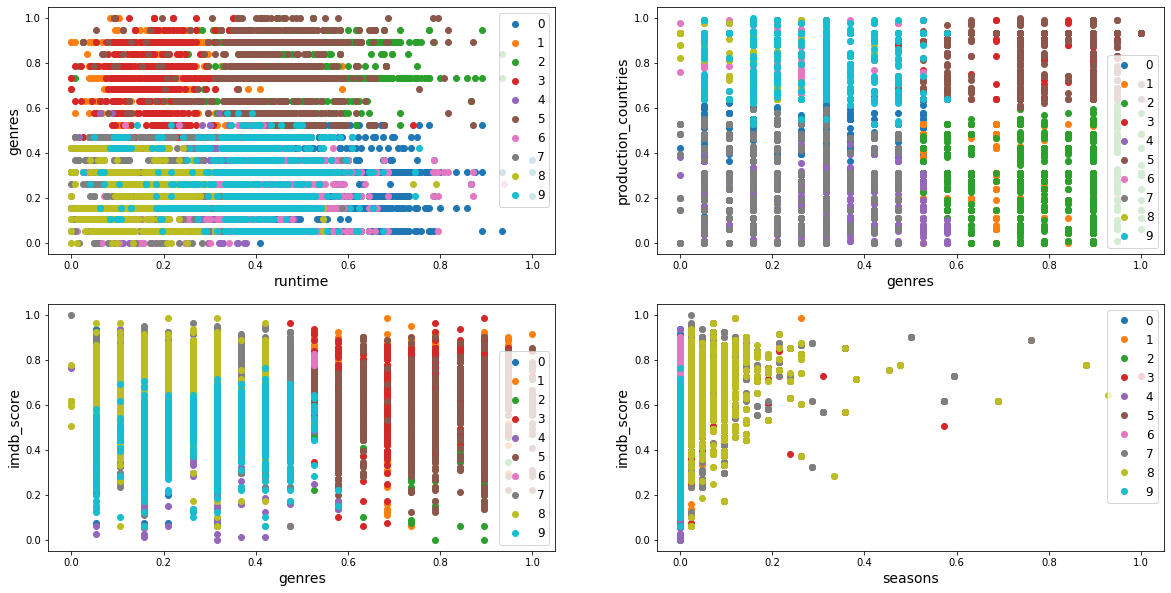

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
for i in range(0, k):
  plt.plot(X[y_pred_bk==i, 2], X[y_pred_bk==i, 3], "o",label=i) #con y==0 prendo solo la classe 0
plt.xlabel("runtime", fontsize=14)
plt.ylabel("genres", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(222)
for i in range(0, k):
  plt.plot(X[y_pred_bk==i, 3], X[y_pred_bk==i, 4],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred_bk==i, 3], X[y_pred_bk==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred_bk==i, 5], X[y_pred_bk==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.show()

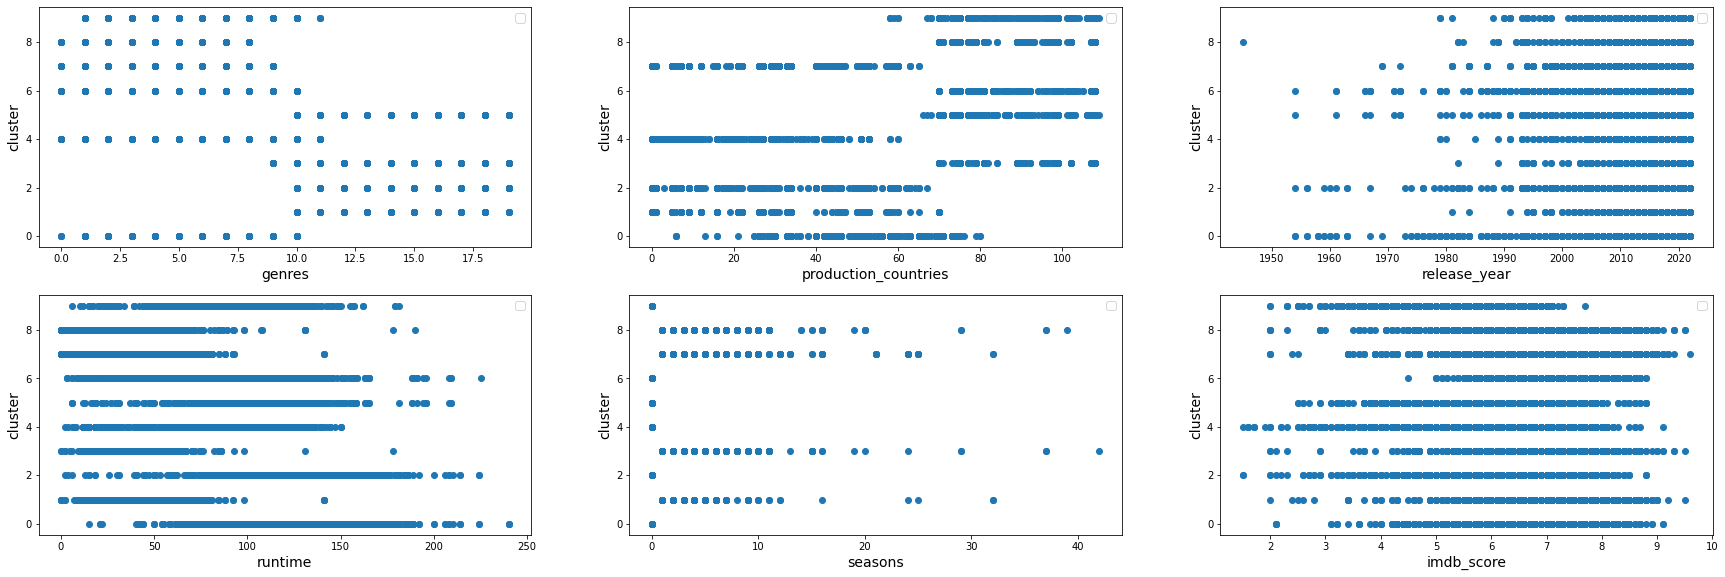

In [ ]:
plt.figure(figsize=(30, 15))

plt.subplot(331)

"""
for i in range(0, k):
  plt.plot(data_titles[y_pred==i,3], y_pred==i,"o", label=i) #con y==0 prendo solo la classe 0
"""
plt.plot(data_titles["genres"],y_pred_bk , "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("genres", fontsize=14)
plt.legend(fontsize=12)


plt.subplot(332)
plt.plot(data_titles["production_countries"],y_pred_bk,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(333)
plt.plot(data_titles["release_year"],y_pred_bk,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("release_year", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(334)
plt.plot(data_titles["runtime"],y_pred_bk,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("runtime", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(335)
plt.plot(data_titles["seasons"],y_pred_bk,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("seasons", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(336)
plt.plot(data_titles["imdb_score"],y_pred_bk,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""
plt.subplot(337)
plt.plot(data_titles["imdb_votes"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_votes", fontsize=14)
plt.legend(fontsize=12)


#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""

plt.show()

## Applico il Bisecting Kmeans alla persona

In [ ]:
y_pred_persona_scalata_bk = bk.predict(persona_scalata)
#y_pred_persona_scalata = kmeans.predict(persona)

cluster_previsione = np.unique(y_pred_persona_scalata_bk)
cluster_previsione

conta = np.zeros(k)
for i in range(0,len(y_pred_persona_scalata_bk)):
  conta[y_pred_persona_scalata_bk[i]] = conta[y_pred_persona_scalata_bk[i]] + 1

cluster = {}
for i in range(0,len(conta)):
  #print("Cluster",i,":",conta[i])
  cluster[i] = conta[i]

# ordino cluster
cluster = dict(sorted(cluster.items(), key=lambda item: item[1], reverse=True))
cluster = {x:y for x,y in cluster.items() if y!=0}
cluster

y_pred_persona_scalata_bk

array([7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1,
       7, 1, 7, 7, 7, 7, 1, 7, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 7, 7,
       7, 7, 7, 1, 1, 1, 7, 7, 1, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7,
       7, 1, 1, 7, 7, 7, 7, 1, 1, 7, 7, 7, 1, 7, 1, 1, 7, 7, 1, 1, 7, 7,
       7, 0, 0, 0, 0, 0, 0, 1, 7, 7, 7, 7, 1, 7, 7, 7, 7, 1, 7, 7, 7, 1,
       1, 7, 7, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 7, 7, 7, 1, 1, 7, 1, 7, 7, 2, 0, 0,
       0, 2, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1], dtype=int32)

In [ ]:
cluster

{0: 77.0, 7: 70.0, 1: 32.0, 2: 15.0}

In [ ]:
cluster

{0: 77.0, 7: 70.0, 1: 32.0, 2: 15.0}

## Previsione film di tutti i cluster con calcolo affinità basato sulla distanza punti

In [ ]:
cluster

{0: 77.0, 7: 70.0, 1: 32.0, 2: 15.0}

In [ ]:
import random
from scipy.spatial import distance

keys = list(cluster.keys())

film_top = pd.DataFrame()

for indice_cluster_key in range(0, 2):

  lunghezza = len(persona_scalata[y_pred_persona_scalata_bk == keys[indice_cluster_key]])

  #index = random.randint(0, lunghezza)

  #persona_scalata[y_pred_persona_scalata == keys[0]][index]
  min_dist = 100000
  min_index = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - persona_scalata[y_pred_persona_scalata_bk == keys[indice_cluster_key]][index])
    if(dist < min_dist):
      min_dist = dist
      min_index = index



  dati_scalati_m[y_pred_bk == keys[indice_cluster_key]]



  for index in range(0, lunghezza):
    film_utente = persona_scalata[y_pred_persona_scalata_bk == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []
    for point in dati_scalati_m[y_pred_bk == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= min_dist):
        film_affini.append(point)

        distanze_film_affini.append(np.linalg.norm(point - film_utente))

    if(len(film_affini) > 0):
      indici = []

      indice_film_utente = 0

      for i in range(0, len(dati_scalati_m)):
        for j in range(0, len(film_affini)):
          if((dati_scalati_m[i] == film_affini[j]).all()):
            indici.append(i)

          if((dati_scalati_m[i] == film_utente).all()):
            indice_film_utente = i
          
      id_pred = []

      id_film_utente = id_film.at[indice_film_utente, "id"]


      film_utente_ = final_data_titles[final_data_titles.id == id_film_utente]


      for i in range(0,len(indici)):
        coppia = []
        coppia.append(id_film.at[indici[i], "id"])
        coppia.append(distanze_film_affini[i])
        id_pred.append(coppia)


      id_pred_unico = []
      id_pred_unico_dist = []

      #id_pred_unico.append(id_pred[0])

      for i in range(0, len(id_pred)):
        if(not (contiene(id_pred_unico, id_pred[i][0]))):
          id_pred_unico.append(id_pred[i][0])
          id_pred_unico_dist.append(id_pred[i][1])
        else:
          for j in range(0, len(id_pred_unico)):
            if(id_pred_unico[j] == id_pred[i][0]):
              if(id_pred_unico_dist[j] > id_pred[i][1]):
                id_pred_unico_dist[j] = id_pred[i][1]
              



      film_vicini = pd.DataFrame()
      film_vicini.loc[:, "affinity"] = []

      for i in range(0, len(id_pred_unico)):
        film_vicini = film_vicini.append(final_data_titles[final_data_titles.id == id_pred_unico[i]])


      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

        
      for i in range(0, len(film_vicini)):
        film_vicini.at[i,"affinity"] = (1 - id_pred_unico_dist[i])*100



      for i in range(0, len(lista_film_persona)):
          film_vicini = film_vicini[film_vicini.id != lista_film_persona[i]]



      film_vicini = film_vicini.reset_index()
      film_vicini = film_vicini.drop('index', axis=1)

      film_top = film_top.append(film_vicini[film_vicini.affinity > 90.00], ignore_index=True)

  print(1)
  film_top.head(30)




film_top.sort_values(by=['affinity'], ascending=False)
film_top_unici = film_top["id"].unique()

kmeans_affinita_film_top = pd.DataFrame()

for id in film_top_unici:
  lista_film = pd.DataFrame()
  lista_film = film_top[film_top.id == id]
  #affinita_film_top = affinita_film_top.append(film_top[film_top.id == id].iloc[0])


  lista_film = lista_film.reset_index()
  lista_film = lista_film.drop('index', axis=1)
  max = -1.0
  for i in range(0, len(lista_film)):
    if(lista_film.at[i,"affinity"] > max):
      max = lista_film.at[i,"affinity"]
    
    #print(lista_film.at[i,"affinity"])

  kmeans_affinita_film_top = kmeans_affinita_film_top.append(film_top[film_top.affinity == max].iloc[0])


kmeans_affinita_film_top = kmeans_affinita_film_top.sort_values(by=['affinity'], ascending=False)


kmeans_affinita_film_top = kmeans_affinita_film_top.reset_index()
kmeans_affinita_film_top = kmeans_affinita_film_top.drop('index', axis=1)

kmeans_affinita_film_top

KeyboardInterrupt: ignored

In [ ]:
kmeans_affinita_film_top.head(20)

In [ ]:
kmeans_affinita_film_top.head(20)

## Feature Selection e plotting

In [ ]:
stagioni = data_titles["seasons"].unique()

for numero in stagioni:
  print(numero, data_titles[data_titles["seasons"] == numero]["seasons"].count())

In [ ]:
data_titles

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


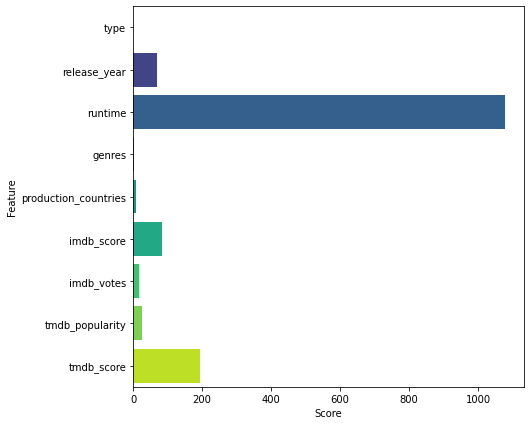

In [ ]:
X = data_titles.drop(['seasons'], axis=1)
Y = data_titles['seasons']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X,Y)

scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)

features_scores = pd.concat([columns_df,scores_df], axis=1)
features_scores.columns = ['Feature', 'Score']

fig, ax = plt.subplots(figsize=(7,7))
plot = sns.barplot(data=features_scores, x='Score', y='Feature', palette='viridis', linewidth=0.5, saturation=2, orient='h')

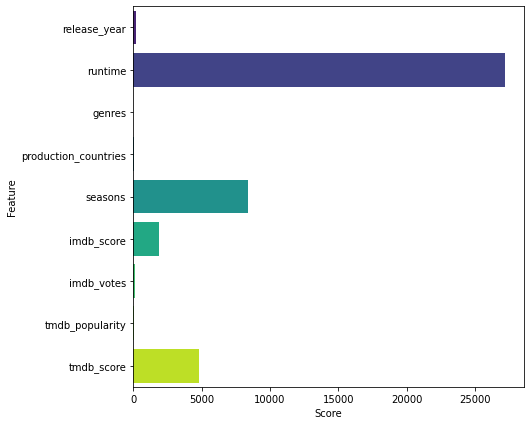

In [ ]:
X = data_titles.drop(['type'], axis=1)
Y = data_titles['type']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X,Y)

scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)

features_scores = pd.concat([columns_df,scores_df], axis=1)
features_scores.columns = ['Feature', 'Score']

fig, ax = plt.subplots(figsize=(7,7))
plot = sns.barplot(data=features_scores, x='Score', y='Feature', palette='viridis', linewidth=0.5, saturation=2, orient='h')

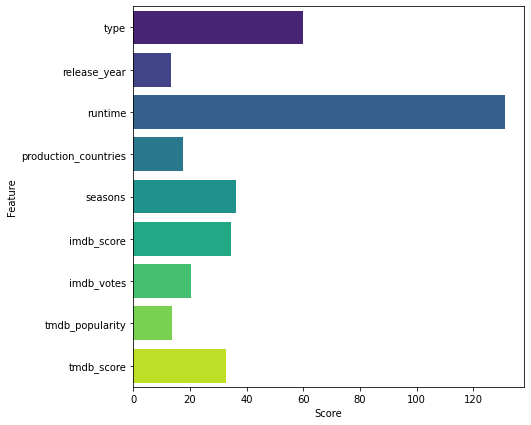

In [ ]:
X = data_titles.drop(['genres'], axis=1)
Y = data_titles['genres']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X,Y)

scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)

features_scores = pd.concat([columns_df,scores_df], axis=1)
features_scores.columns = ['Feature', 'Score']

fig, ax = plt.subplots(figsize=(7,7))
plot = sns.barplot(data=features_scores, x='Score', y='Feature', palette='viridis', linewidth=0.5, saturation=2, orient='h')

# Versione 2.0 (Bag of Words, Tdidf, Test accuratezza)

## Gestione missing values ( non da runnare)

Da runnare solo per test

In [ ]:
TITLES_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv'
data_titles = pd.read_csv(TITLES_PATH, encoding='latin-1')

Quante colonne contengono almeno un valore nullo

In [ ]:
missing_data_titles = data_titles.columns[data_titles.isnull().any()]
print('dati mancanti = ', len(missing_data_titles))

dati mancanti =  5


In [ ]:
data_titles.isnull().sum(axis = 0)

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification       2618
runtime                    0
genres                    54
production_countries     225
seasons                    0
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

elimino film senza titolo con id -> tm1063792

In [ ]:
data_titles = data_titles[data_titles["title"].notna()]

In [ ]:
data_titles.isnull().sum(axis = 0)

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification       2618
runtime                    0
genres                    54
production_countries     225
seasons                    0
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

Elimino le righe in credits con id (film) -> tm1063792

Count non conta i NaN.
La media non considera i NaN, ovviamente

In [ ]:
mean_imdb_score = data_titles["imdb_score"].mean()
mean_imdb_votes = data_titles["imdb_votes"].mean()
mean_tmdb_popularity = data_titles["tmdb_popularity"].mean()
mean_tmdb_score = data_titles["tmdb_score"].mean()

data_titles["imdb_score"].fillna("{:.2f}".format(mean_imdb_score), inplace=True)
data_titles["imdb_votes"].fillna(int(mean_imdb_votes), inplace=True)
data_titles["tmdb_popularity"].fillna(int(mean_tmdb_popularity), inplace=True)
data_titles["tmdb_score"].fillna("{:.2f}".format(mean_tmdb_score), inplace=True)
data_titles["seasons"].fillna(0, inplace=True)

Gestisco i NaN. Per i film abbiamo messo season = 0

In [ ]:
data_titles.head()

In [ ]:
missing_data_titles = data_titles.columns[data_titles.isnull().any()]
print('dati mancanti = ', len(missing_data_titles))

dati mancanti =  5


In [ ]:
data_titles.isnull().sum(axis = 0)

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification       2618
runtime                    0
genres                    54
production_countries     225
seasons                    0
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

Credits missing values

In [ ]:
missing_data_credits = data_credits.columns[data_credits.isnull().any()]
print('dati mancanti = ', len(missing_data_credits))

NameError: ignored

In [ ]:
data_credits.isnull().sum(axis = 0)

Duplicati

In [ ]:
dup_data_titles = data_titles.copy()
dup_data_titles.drop_duplicates(inplace=True)

print('Numero totale di istanze duplicate: ', data_titles.shape[0] - dup_data_titles.shape[0])
#data = dup_data.copy()
#data

Numero totale di istanze duplicate:  0


In [ ]:
dup_data_credits = data_credits.copy()
dup_data_credits.drop_duplicates(inplace=True)

print('Numero totale di istanze duplicate: ', data_credits.shape[0] - dup_data_credits.shape[0])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

data_type = data_titles[["type"]]
ordinal_encoder = OrdinalEncoder(categories = "auto")
data_type_ordinal = ordinal_encoder.fit_transform(data_type)
print(data_type_ordinal[:10])

data_titles["type"] = data_type_ordinal

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
#data_titles = data_titles.drop("title", axis = 1)
data_titles = data_titles.drop("id", axis = 1)
#data_titles = data_titles.drop("description", axis = 1)
data_titles = data_titles.drop("age_certification", axis = 1)
data_titles = data_titles.drop("imdb_id", axis = 1)
data_titles = data_titles.drop("tmdb_popularity", axis = 1)

In [ ]:
data_titles

In [ ]:
#data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_numeric_bag.csv', index=False)

In [ ]:
data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_drop.csv', index=False)

## Caricamento dataset

In [ ]:
"""
TITLES_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles.csv'
data_titles = pd.read_csv(TITLES_PATH)
"""
#CREDITS_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/credits.csv'

#data_credits = pd.read_csv(CREDITS_PATH)
UTENTI_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/utenti.csv'
data_users = pd.read_csv(UTENTI_PATH, encoding='latin-1')

TITLES_DROP_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_drop.csv'
data_titles = pd.read_csv(TITLES_DROP_PATH, encoding='latin-1')

TITLES_FINALE_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv'
final_data_titles = pd.read_csv(TITLES_FINALE_PATH, encoding='latin-1')


In [ ]:
len(final_data_titles)

5849

In [ ]:
"""
score = final_data_titles["tmdb_score"]
#print("{:.2f}".format(round(a, 2)))
for i in range(0, len(score)):
  score[i] = "{:.1f}".format(round(score[i], 1))

final_data_titles["tmdb_score"] = score

final_data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv', index=False)
"""

'\nscore = final_data_titles["tmdb_score"]\n#print("{:.2f}".format(round(a, 2)))\nfor i in range(0, len(score)):\n  score[i] = "{:.1f}".format(round(score[i], 1))\n\nfinal_data_titles["tmdb_score"] = score\n\nfinal_data_titles.to_csv(\'/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv\', index=False)\n'

In [ ]:
final_data_titles

id                                      title   type  \
0      ts300399        Five Came Back: The Reference Films   SHOW   
1       tm84618                                Taxi Driver  MOVIE   
2      tm154986                                Deliverance  MOVIE   
3      tm127384            Monty Python and the Holy Grail  MOVIE   
4      tm120801                            The Dirty Dozen  MOVIE   
...         ...                                        ...    ...   
5844  tm1014599                                  Fine Wine  MOVIE   
5845   tm898842                                C/O Kaadhal  MOVIE   
5846  tm1059008                                    Lokillo  MOVIE   
5847  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5848   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5844  A beautiful love story that can happen between...          2021   
5845  A heart warming film that explores the concept...          2021   
5846  A controversial TV host and comedian who has b...          2021   
5847  Jamie Foxx, David Alan Grier and more from the...          2021   
5848  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime                                       genres  \
0                TV-MA       51                            ['documentation']   
1                    R      114                           ['drama', 'crime']   
2                    R      109  ['drama', 'action', 'thriller', 'european']   
3                   PG       91              ['fantasy', 'action', 'comedy']   
4                  NaN      150                            ['war', 'action']   
...                ...      ...                                          ...   
5844               NaN      100                         ['romance', 'drama']   
5845               NaN      134                                    ['drama']   
5846               NaN       90                                   ['comedy']   
5847             PG-13       37                                          NaN   
5848               NaN        7            ['family', 'animation', 'comedy']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0                  ['US']        1         NaN        6.51       23439   
1                  ['US']        0   tt0075314        8.20      808582   
2                  ['US']        0   tt0068473        7.70      107673   
3                  ['GB']        0   tt0071853        8.20      534486   
4            ['GB', 'US']        0   tt0061578        7.70       72662   
...                   ...      ...         ...         ...         ...   
5844               ['NG']        0  tt13857480        6.80          45   
5845                  NaN        0  tt11803618        7.70         348   
5846               ['CO']        0  tt14585902        3.80          68   
5847               ['US']        0         NaN        6.51       23439   
5848                  NaN        1  tt13711094        7.80          18   

      tmdb_popularity  tmdb_score  
0               0.600        6.83  
1              40.965        8.18  
2              10.010        7.30  
3              15.461        7.81  
4              20.398        7.60  
...               ...         ...  
5844            1.466        6.83  
5845           22.000        6.83  
5846           26.005        6.30  
5847            1.296       10.00  
5848            2.289       10.00  

[5849 rows x 15 columns]

In [ ]:
data_titles.head()

title  type  \
0  Five Came Back: The Reference Films   1.0   
1                          Taxi Driver   0.0   
2                          Deliverance   0.0   
3      Monty Python and the Holy Grail   0.0   
4                      The Dirty Dozen   0.0   

                                         description  release_year  runtime  \
0  This collection includes 12 World War II-era p...          1945       51   
1  A mentally unstable Vietnam War veteran works ...          1976      114   
2  Intent on seeing the Cahulawassee River before...          1972      109   
3  King Arthur, accompanied by his squire, recrui...          1975       91   
4  12 American military prisoners in World War II...          1967      150   

                                        genres production_countries  seasons  \
0                            ['documentation']               ['US']        1   
1                           ['drama', 'crime']               ['US']        0   
2  ['drama', 'action', 'thriller', 'european']               ['US']        0   
3              ['fantasy', 'action', 'comedy']               ['GB']        0   
4                            ['war', 'action']         ['GB', 'US']        0   

   imdb_score  imdb_votes  tmdb_score  
0        6.51       23439        6.83  
1        8.20      808582        8.18  
2        7.70      107673        7.30  
3        8.20      534486        7.81  
4        7.70       72662        7.60

In [ ]:
data_titles.tail()

title  type  \
5844                                  Fine Wine   0.0   
5845                                C/O Kaadhal   0.0   
5846                                    Lokillo   0.0   
5847  Dad Stop Embarrassing Me - The Afterparty   0.0   
5848         Mighty Little Bheem: Kite Festival   1.0   

                                            description  release_year  \
5844  A beautiful love story that can happen between...          2021   
5845  A heart warming film that explores the concept...          2021   
5846  A controversial TV host and comedian who has b...          2021   
5847  Jamie Foxx, David Alan Grier and more from the...          2021   
5848  With winter behind them, Bheem and his townspe...          2021   

      runtime                             genres production_countries  \
5844      100               ['romance', 'drama']               ['NG']   
5845      134                          ['drama']                  NaN   
5846       90                         ['comedy']               ['CO']   
5847       37                                NaN               ['US']   
5848        7  ['family', 'animation', 'comedy']                  NaN   

      seasons  imdb_score  imdb_votes  tmdb_score  
5844        0        6.80          45        6.83  
5845        0        7.70         348        6.83  
5846        0        3.80          68        6.30  
5847        0        6.51       23439       10.00  
5848        1        7.80          18       10.00

## Data Visualization

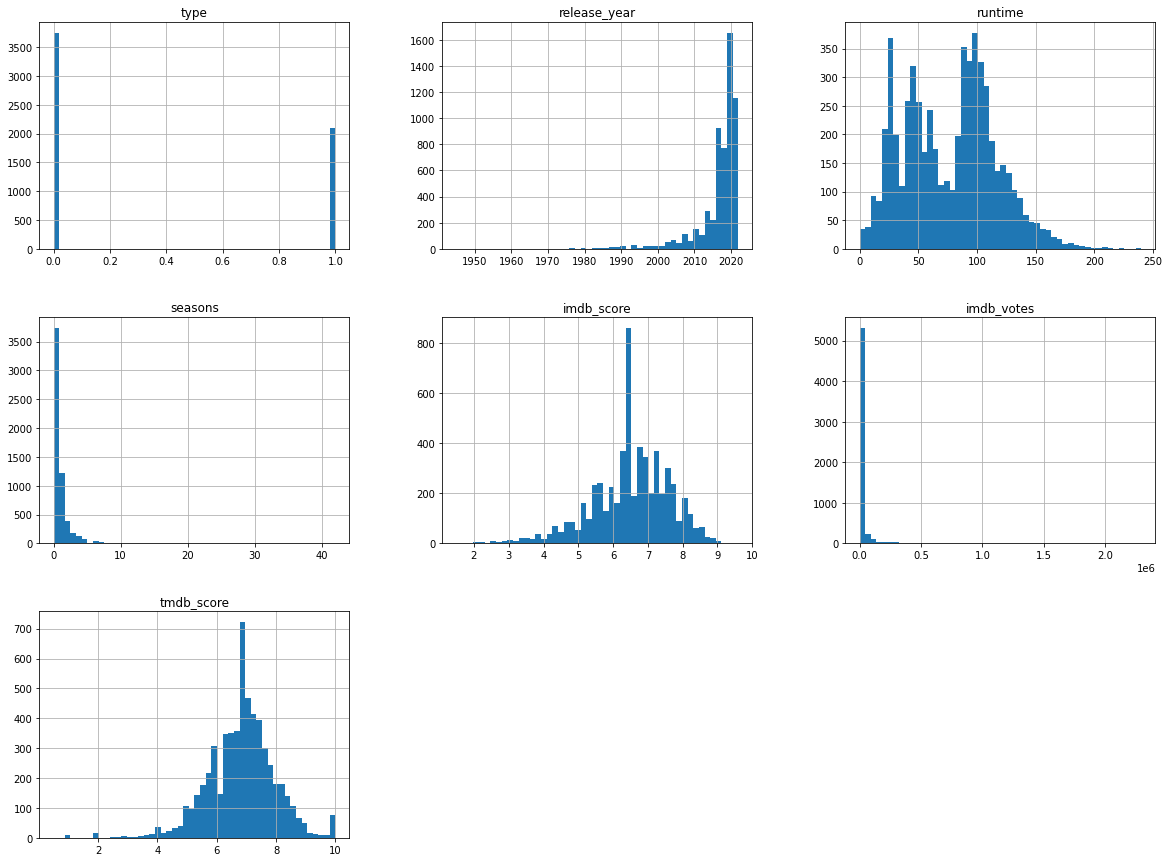

In [ ]:
#data_titles.hist()
%matplotlib inline
import matplotlib.pyplot as plt
data_titles.hist(bins=50, figsize=(20,15))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03194ae910>,
      dtype=object)

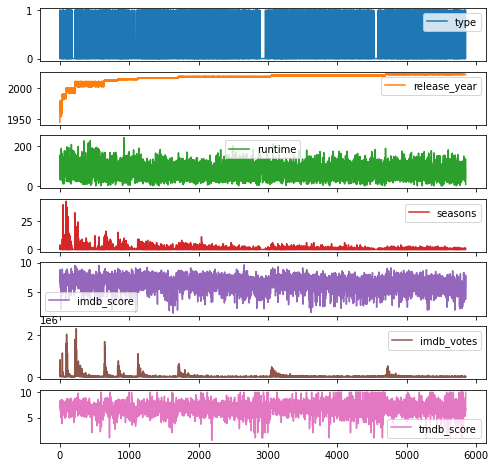

In [ ]:
data_titles.plot(subplots=True, figsize=(8, 8))

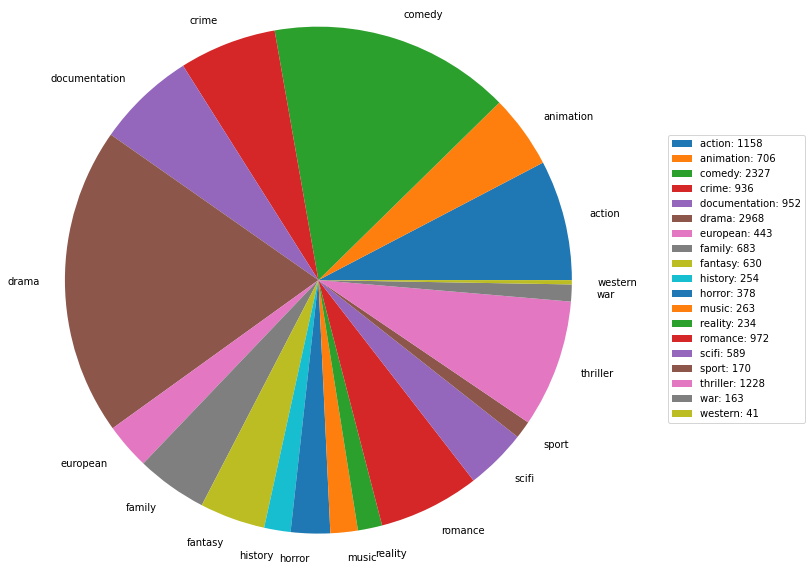

In [ ]:
a = []

for riga in data_titles["genres"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  a.append(row)

generi = []
for riga in a:
  for genere in riga:
    if(not(contiene(generi, genere))):
      generi.append(genere)

generi.remove('nan')
generi.sort()

generi

dict_generi = {}
for i in range(0, len(generi)):
  dict_generi[generi[i]] = len(data_titles[data_titles['genres'].str.contains(generi[i], na=False)])

dict_generi

# Data to plot
labels = []
values = []

for x, y in dict_generi.items():
    labels.append(x)
    values.append(y)

# Plot
plt.figure(figsize=(10, 10))
#plt.subplot(121)
plt.pie(values, labels=labels)

plt.axis('equal')
#plt.tight_layout()
#plt.subplot(122)
plt.legend([m+": "+str(n) for m,n in zip(labels,values)], loc="center", bbox_to_anchor=(1.25, 0.5))  
plt.show()

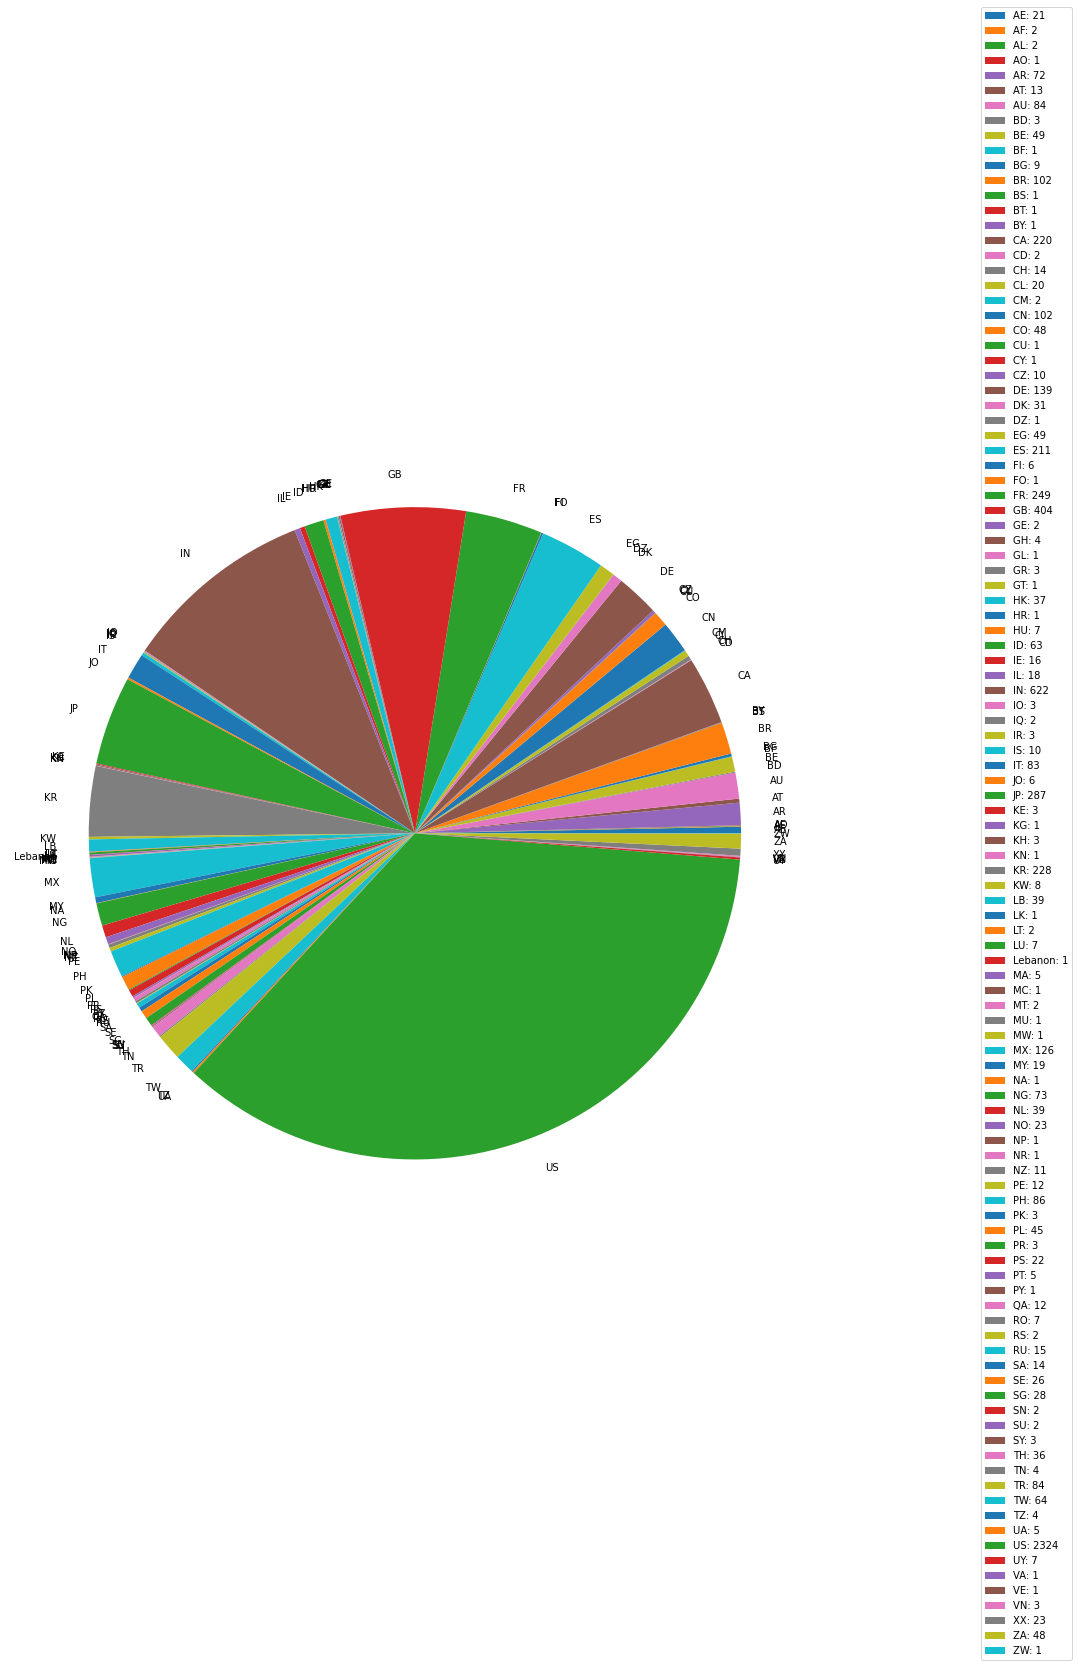

In [ ]:
a = []

for riga in data_titles["production_countries"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  a.append(row)

paesi = []
for riga in a:
  for genere in riga:
    if(not(contiene(paesi, genere))):
      paesi.append(genere)

paesi.remove('nan')
paesi.sort()

paesi

dict_paesi = {}
for i in range(0, len(paesi)):
  dict_paesi[paesi[i]] = len(data_titles[data_titles['production_countries'].str.contains(paesi[i], na=False)])

dict_paesi

# Data to plot
labels = []
values = []

for x, y in dict_paesi.items():
    labels.append(x)
    values.append(y)

# Plot
plt.figure(figsize=(15, 15))
plt.pie(values, labels=labels)
plt.legend([m+": "+str(n) for m,n in zip(labels,values)], loc="center", bbox_to_anchor=(1.25, 0.5)) 

plt.axis()
plt.show()

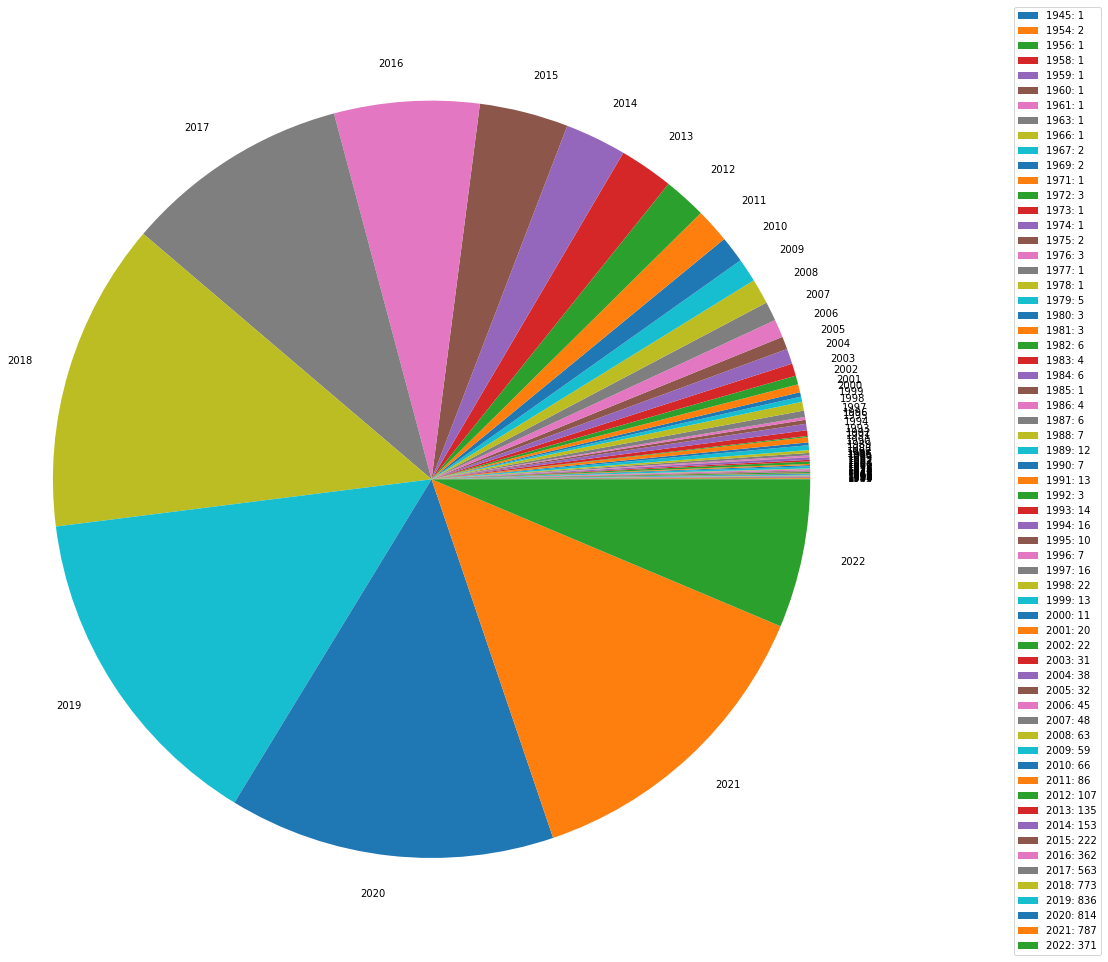

In [ ]:
a = []

for riga in data_titles["release_year"]:
  if not contiene(a, riga):
    a.append(riga)

a.sort()
anni = a

dict_anni = {}
for i in range(0, len(anni)):
  dict_anni[anni[i]] = len(data_titles[data_titles['release_year'] == anni[i]])

dict_anni

# Data to plot
labels = []
values = []

for x, y in dict_anni.items():
    labels.append(x)
    values.append(y)

# Plot
plt.figure(figsize=(15, 15))
plt.pie(values, labels=labels)
plt.legend([str(m)+": "+str(n) for m,n in zip(labels,values)], loc="center", bbox_to_anchor=(1.25, 0.5))

plt.axis('equal')
plt.show()

In [ ]:
data_titles_num = data_titles

data_titles_num = data_titles_num.drop("title", axis = 1)
data_titles_num = data_titles_num.drop("description", axis = 1)
data_titles_num = data_titles_num.drop("genres", axis = 1)
data_titles_num = data_titles_num.drop("production_countries", axis = 1)

data_titles_num

type  release_year  runtime  seasons  imdb_score  imdb_votes  tmdb_score
0      1.0          1945       51        1        6.51       23439        6.83
1      0.0          1976      114        0        8.20      808582        8.18
2      0.0          1972      109        0        7.70      107673        7.30
3      0.0          1975       91        0        8.20      534486        7.81
4      0.0          1967      150        0        7.70       72662        7.60
...    ...           ...      ...      ...         ...         ...         ...
5844   0.0          2021      100        0        6.80          45        6.83
5845   0.0          2021      134        0        7.70         348        6.83
5846   0.0          2021       90        0        3.80          68        6.30
5847   0.0          2021       37        0        6.51       23439       10.00
5848   1.0          2021        7        1        7.80          18       10.00

[5849 rows x 7 columns]

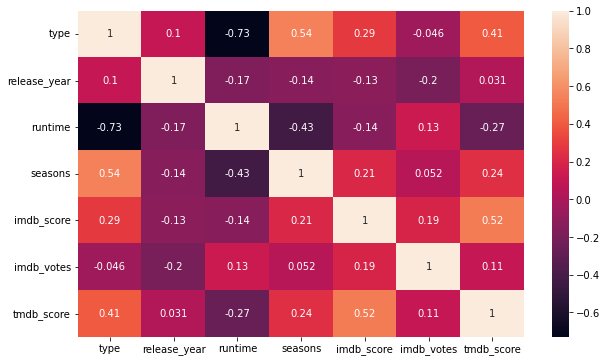

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(data_titles_num.corr(), ax=ax, annot=True)

In [ ]:
r = np.corrcoef(data_titles_num["runtime"], data_titles_num["seasons"])
r

array([[ 1.        , -0.42664021],
       [-0.42664021,  1.        ]])

In [ ]:
#data_titles_num.plot(x='runtime', y='seasons', style='o')

## Bag of words

Ottengo la bag di Genres

In [ ]:
data_titles_drop = data_titles

In [ ]:
data_titles_drop = data_titles
a = []

for riga in data_titles_drop["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

 
vectorizer_generi = CountVectorizer()
#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
vectorizer_generi.fit(docs)
bag_generi = vectorizer_generi.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_generi.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_generi = vectorizer_generi.vocabulary_
print(vectorizer_generi.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_generi.toarray())


genres = bag_generi

['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
{'documentation': 4, 'drama': 5, 'crime': 3, 'action': 0, 'thriller': 16, 'european': 6, 'fantasy': 8, 'comedy': 2, 'war': 17, 'romance': 13, 'western': 18, 'history': 9, 'music': 11, 'family': 7, 'horror': 10, 'scifi': 14, 'animation': 1, 'reality': 12, 'sport': 15}
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(genres.toarray()[0])

19

Ottengo la bag di Production Countries

In [ ]:
a = []
for riga in data_titles_drop["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

vectorizer_countries = CountVectorizer()
#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
vectorizer_countries.fit(docs)
bag_countries = vectorizer_countries.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_countries.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_countries = vectorizer_countries.vocabulary_
print(vectorizer_countries.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_countries.toarray())

countries = bag_countries

['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh', 'kn', 'kr', 'kw', 'lb', 'lebanon', 'lk', 'lt', 'lu', 'ma', 'mc', 'mt', 'mu', 'mw', 'mx', 'my', 'na', 'ng', 'nl', 'no', 'np', 'nz', 'pe', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py', 'qa', 'ro', 'rs', 'ru', 'sa', 'se', 'sg', 'sn', 'su', 'sy', 'th', 'tn', 'tr', 'tw', 'tz', 'ua', 'us', 'uy', 'va', 've', 'vn', 'xx', 'za', 'zw']
{'us': 101, 'gb': 33, 'eg': 28, 'de': 25, 'in': 45, 'su': 93, 'lb': 59, 'ca': 15, 'fr': 32, 'dz': 27, 'it': 50, 'jp': 52, 'ar': 4, 'pe': 77, 'br': 11, 'ie': 43, 'hk': 39, 'au': 6, 'gh': 35, 'bf': 9, 'mx': 69, 'es': 29, 'co': 21, 'ps': 82, 'no': 74, 'be': 8, 'tr': 97, 'dk': 26, 'bs': 12, 'cz': 24, 'mt': 66, 'za': 107, 'cn': 20, 'bg': 10, '

Ottengo la bag di titolo e descrizione (uniti)

In [ ]:
data_titles_drop["description"] = data_titles_drop["title"] +" " + data_titles_drop["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in data_titles_drop["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    #words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

vectorizer_text = CountVectorizer(stop_words='english')
#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
vectorizer_text.fit(docs)
bag_text = vectorizer_text.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_text.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_text = vectorizer_text.vocabulary_
print(vectorizer_text.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_text.toarray())


text = bag_text

['aag', 'aagey', 'aakhr', 'aaliy', 'aamir', 'aan', 'aap', 'aapk', 'aapl', 'aarambh', 'aardm', 'aaron', 'aas', 'aashiqu', 'aat', 'aavir', 'aayiram', 'ab', 'aback', 'abad', 'abagn', 'abah', 'abandon', 'abang', 'abatutu', 'abb', 'abbey', 'abbot', 'abby', 'abc', 'abcd', 'abd', 'abdal', 'abdallah', 'abdel', 'abdom', 'abdou', 'abduc', 'abdurrahm', 'abeokut', 'abercromby', 'abet', 'abhay', 'abhirup', 'abid', 'abigail', 'abimael', 'abject', 'abl', 'abnorm', 'aboard', 'abod', 'aborigin', 'abort', 'abound', 'abraham', 'abrazo', 'abroad', 'abrupt', 'abs', 'absolv', 'absorb', 'abstin', 'abstract', 'absurd', 'abtalk', 'abu', 'abud', 'abund', 'abus', 'abuzz', 'abyss', 'ac', 'academ', 'academy', 'acast', 'acc', 'acceiv', 'accel', 'access', 'accid', 'acclaim', 'accolad', 'accompany', 'accompl', 'accord', 'account', 'accr', 'accru', 'accum', 'accus', 'accustom', 'acerb', 'acero', 'acevedo', 'ach', 'achary', 'acheng', 'achiev', 'achil', 'achm', 'acid', 'acknowledg', 'acolyt', 'acoust', 'acp', 'acquaint'

In [ ]:
len(bag_text.toarray()[0])

15353

## TFIDF Vectorizer

Ottengo TFIDF di generi

In [ ]:
data_titles_drop = data_titles
a = []

for riga in data_titles_drop["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_generi_vectorizer = TfidfVectorizer()

tfidf_generi_vectorizer.fit(docs)
tfidf_generi = tfidf_generi_vectorizer.transform(docs)


print(tfidf_generi_vectorizer.get_feature_names())

dizionario_generi_tfdf = tfidf_generi_vectorizer.vocabulary_


print(tfidf_generi_vectorizer.vocabulary_)
print(tfidf_generi.toarray())


genres = tfidf_generi

['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
{'documentation': 4, 'drama': 5, 'crime': 3, 'action': 0, 'thriller': 16, 'european': 6, 'fantasy': 8, 'comedy': 2, 'war': 17, 'romance': 13, 'western': 18, 'history': 9, 'music': 11, 'family': 7, 'horror': 10, 'scifi': 14, 'animation': 1, 'reality': 12, 'sport': 15}
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.48602516 0.         0.         ... 0.47514186 0.         0.        ]
 ...
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.64518947 0.39820802 ... 0.         0.         0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Ottengo TFIDF di countries

In [ ]:
a = []
for riga in data_titles_drop["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_countries_vectorizer = TfidfVectorizer()

tfidf_countries_vectorizer.fit(docs)
tfidf_countries = tfidf_countries_vectorizer.transform(docs)


print(tfidf_countries_vectorizer.get_feature_names())

dizionario_countries_tfdf = tfidf_countries_vectorizer.vocabulary_

print(tfidf_countries_vectorizer.get_feature_names())

dizionario_countries_tfidf = tfidf_countries_vectorizer.vocabulary_
print(tfidf_countries_vectorizer.vocabulary_)

print(tfidf_countries.toarray())

countries = tfidf_countries

['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh', 'kn', 'kr', 'kw', 'lb', 'lebanon', 'lk', 'lt', 'lu', 'ma', 'mc', 'mt', 'mu', 'mw', 'mx', 'my', 'na', 'ng', 'nl', 'no', 'np', 'nr', 'nz', 'pe', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py', 'qa', 'ro', 'rs', 'ru', 'sa', 'se', 'sg', 'sn', 'su', 'sy', 'th', 'tn', 'tr', 'tw', 'tz', 'ua', 'us', 'uy', 'va', 've', 'vn', 'xx', 'za', 'zw']
['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh

Ottengo TFIDF di titolo e descrizione (uniti)

In [ ]:
data_titles_drop["description"] = data_titles_drop["title"] +" " + data_titles_drop["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in data_titles_drop["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(docs)
tfidf_text = tfidf_vectorizer.transform(docs)


print(tfidf_vectorizer.get_feature_names_out())

print(tfidf_text.shape)


text = tfidf_text

['aag' 'aagey' 'aakhr' ... 'zur' 'zuru' 'zz']
(5849, 15147)


Solo titoli

In [ ]:
"""
stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in data_titles_drop["title"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(docs)
tfidf_text = tfidf_vectorizer.transform(docs)


print(tfidf_vectorizer.get_feature_names_out())

print(tfidf_text.shape)


text = tfidf_text
"""

'\nstop_words = set(stopwords.words(\'english\'))\n#stop_words = [word for word in stop_words if len(word)>1]\n\na = []\nfor riga in data_titles_drop["title"]:\n  #print(riga)\n  row = ""\n  if(type(riga) != float):\n    #elementi = riga.split(" ")\n    #riga = re.sub("[.!,:?\'&=()\\[\\]\\{\\}\\\\/";\\-_@#^<>\\+\\-\\*\\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())\n    #riga = riga.replace("  ", " ")\n    tokens = word_tokenize(riga)\n    # convert to lower case\n    tokens = [w.lower() for w in tokens]\n    # remove punctuation from each word\n    table = str.maketrans(\'\', \'\', string.punctuation)\n    stripped = [w.translate(table) for w in tokens]\n    # remove remaining tokens that are not alphabetic\n    words = [word for word in stripped if word.isalpha()]\n    # filter out stop words\n    words = [w for w in words if not w in stop_words]\n    #from nltk.stem.porter import PorterStemmer\n    stemmer = LancasterStemmer()\n    wnl = WordNetLemmatizer()\n    words = [wnl.lemmatize

## Feature Scaling su dataset

In [ ]:
data_titles_drop = data_titles

Droppo le colonne da trasformare

In [ ]:
data_titles_drop = data_titles_drop.drop("title", axis = 1)
data_titles_drop = data_titles_drop.drop("description", axis = 1)
data_titles_drop = data_titles_drop.drop("genres", axis = 1)
data_titles_drop = data_titles_drop.drop("production_countries", axis = 1)

In [ ]:
# Initialise the Scaler
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()
 
# To scale data
minMaxScaler.fit(data_titles_drop)
dati_scalati_m = minMaxScaler.transform(data_titles_drop)
dati_scalati_s = standardScaler.fit_transform(data_titles_drop)

X = dati_scalati_m

Concateno tutto 

In [ ]:
X_new = np.hstack((X, text.toarray(), genres.toarray(), countries.toarray()))

In [ ]:
X_new.shape

(5849, 15283)

## Scelgo persona

In [ ]:
persona = data_users

persona1 = persona[persona.user_id == "u1"]
persona2 = persona[persona.user_id == "u2"]
persona3 = persona[persona.user_id == "u3"]
persona4 = persona[persona.user_id == "u4"]
persona5 = persona[persona.user_id == "u5"]
persona6 = persona[persona.user_id == "u6"]

persona = persona1

persona = persona.reset_index()
persona = persona.drop('index', axis=1)
data_users_pred = persona

lista_film_persona = list(persona["film_id"])


persona = persona.drop("user_id", axis = 1)
#persona = persona.drop("title", axis = 1)
persona = persona.drop("film_id", axis = 1)
#persona = persona.drop("description", axis = 1)
persona = persona.drop("age_certification", axis = 1)
persona = persona.drop("imdb_id", axis = 1)
persona = persona.drop("tmdb_popularity", axis = 1)
persona["seasons"].fillna(0, inplace=True)

persona

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

data_type = persona[["type"]]
ordinal_encoder = OrdinalEncoder(categories = "auto")
data_type_ordinal = ordinal_encoder.fit_transform(data_type)

persona["type"] = data_type_ordinal

In [ ]:
persona

## Bag of Words persona

ottengo bag generi persona

In [ ]:
from pandas.core.construction import is_empty_data
from pandas.core.arrays import string_
#data_titles["genres"].value_counts()

a = []

for riga in persona["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
 
#vectorizer = CountVectorizer()


#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
bag_generi_persona = vectorizer_generi.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_generi.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_generi_persona = vectorizer_generi.vocabulary_
print(vectorizer_generi.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_generi_persona.toarray())

persona_generi = bag_generi_persona

['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
{'documentation': 4, 'drama': 5, 'crime': 3, 'action': 0, 'thriller': 16, 'european': 6, 'fantasy': 8, 'comedy': 2, 'war': 17, 'romance': 13, 'western': 18, 'history': 9, 'music': 11, 'family': 7, 'horror': 10, 'scifi': 14, 'animation': 1, 'reality': 12, 'sport': 15}
[[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ottengo bag countries persona

In [ ]:
a = []
for riga in persona["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
bag_countries_persona = vectorizer_countries.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_countries.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_countries = vectorizer_countries.vocabulary_
print(vectorizer_countries.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_countries_persona.toarray())

persona_countries = bag_countries_persona

['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh', 'kn', 'kr', 'kw', 'lb', 'lebanon', 'lk', 'lt', 'lu', 'ma', 'mc', 'mt', 'mu', 'mw', 'mx', 'my', 'na', 'ng', 'nl', 'no', 'np', 'nz', 'pe', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py', 'qa', 'ro', 'rs', 'ru', 'sa', 'se', 'sg', 'sn', 'su', 'sy', 'th', 'tn', 'tr', 'tw', 'tz', 'ua', 'us', 'uy', 'va', 've', 'vn', 'xx', 'za', 'zw']
{'us': 101, 'gb': 33, 'eg': 28, 'de': 25, 'in': 45, 'su': 93, 'lb': 59, 'ca': 15, 'fr': 32, 'dz': 27, 'it': 50, 'jp': 52, 'ar': 4, 'pe': 77, 'br': 11, 'ie': 43, 'hk': 39, 'au': 6, 'gh': 35, 'bf': 9, 'mx': 69, 'es': 29, 'co': 21, 'ps': 82, 'no': 74, 'be': 8, 'tr': 97, 'dk': 26, 'bs': 12, 'cz': 24, 'mt': 66, 'za': 107, 'cn': 20, 'bg': 10, '

ottengo bag titolo e descrizione persona

In [ ]:
persona["description"] = persona["title"] +" " + persona["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in persona["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)


#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
bag_text_persona = vectorizer_text.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_text.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_text = vectorizer_text.vocabulary_
print(vectorizer_text.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_text_persona.toarray())

persona_text = bag_text_persona


['aag', 'aagey', 'aakhr', 'aaliy', 'aamir', 'aan', 'aap', 'aapk', 'aapl', 'aarambh', 'aardm', 'aaron', 'aas', 'aashiqu', 'aat', 'aavir', 'aayiram', 'ab', 'aback', 'abad', 'abagn', 'abah', 'abandon', 'abang', 'abatutu', 'abb', 'abbey', 'abbot', 'abby', 'abc', 'abcd', 'abd', 'abdal', 'abdallah', 'abdel', 'abdom', 'abdou', 'abduc', 'abdurrahm', 'abeokut', 'abercromby', 'abet', 'abhay', 'abhirup', 'abid', 'abigail', 'abimael', 'abject', 'abl', 'abnorm', 'aboard', 'abod', 'aborigin', 'abort', 'abound', 'abraham', 'abrazo', 'abroad', 'abrupt', 'abs', 'absolv', 'absorb', 'abstin', 'abstract', 'absurd', 'abtalk', 'abu', 'abud', 'abund', 'abus', 'abuzz', 'abyss', 'ac', 'academ', 'academy', 'acast', 'acc', 'acceiv', 'accel', 'access', 'accid', 'acclaim', 'accolad', 'accompany', 'accompl', 'accord', 'account', 'accr', 'accru', 'accum', 'accus', 'accustom', 'acerb', 'acero', 'acevedo', 'ach', 'achary', 'acheng', 'achiev', 'achil', 'achm', 'acid', 'acknowledg', 'acolyt', 'acoust', 'acp', 'acquaint'

## TFIDF persona

In [ ]:

a = []

for riga in persona["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
 
#vectorizer = CountVectorizer()


docs = a

tfidf_generi_persona = tfidf_generi_vectorizer.transform(docs)


#dizionario_generi_persona = vectorizer_generi.vocabulary_

print(tfidf_generi_persona.toarray())

persona_generi = tfidf_generi_persona

[[0.45266688 0.53810218 0.33211423 0.         0.         0.29007508
  0.         0.         0.5577592  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.50434845 0.59953802 0.         0.         0.         0.
  0.         0.         0.6214393  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.45266688 0.53810218 0.33211423 0.         0.         0.29007508
  0.         0.         0.5577592  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.54537993 0.64831368 0.40013627 0.         0.         0.34948686
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.50434845 0.59953802 0.         0.         0.         0.
  0.         0.         0.6214393  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.35

In [ ]:
a = []
for riga in persona["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_countries_persona = tfidf_countries_vectorizer.transform(docs)

dizionario_countries = tfidf_countries_vectorizer.vocabulary_


print(tfidf_countries_persona.toarray())

persona_countries = tfidf_countries_persona

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
persona["description"] = persona["title"] +" " + persona["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in persona["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_text_persona = tfidf_vectorizer.transform(docs)

print(tfidf_vectorizer.get_feature_names_out())

print(tfidf_text_persona.shape)

persona_text = tfidf_text_persona


['aag' 'aagey' 'aakhr' ... 'zur' 'zuru' 'zz']
(42, 15147)


Solo titolo

In [ ]:
"""
stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in persona["title"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_text_persona = tfidf_vectorizer.transform(docs)

print(tfidf_vectorizer.get_feature_names_out())

print(tfidf_text_persona.shape)

persona_text = tfidf_text_persona
"""

'\nstop_words = set(stopwords.words(\'english\'))\n#stop_words = [word for word in stop_words if len(word)>1]\n\na = []\nfor riga in persona["title"]:\n  #print(riga)\n  row = ""\n  if(type(riga) != float):\n    #elementi = riga.split(" ")\n    #riga = re.sub("[.!,:?\'&=()\\[\\]\\{\\}\\\\/";\\-_@#^<>\\+\\-\\*\\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())\n    #riga = riga.replace("  ", " ")\n    tokens = word_tokenize(riga)\n    # convert to lower case\n    tokens = [w.lower() for w in tokens]\n    # remove punctuation from each word\n    table = str.maketrans(\'\', \'\', string.punctuation)\n    stripped = [w.translate(table) for w in tokens]\n    # remove remaining tokens that are not alphabetic\n    words = [word for word in stripped if word.isalpha()]\n    # filter out stop words\n    words = [w for w in words if not w in stop_words]\n    #from nltk.stem.porter import PorterStemmer\n    stemmer = LancasterStemmer()\n    wnl = WordNetLemmatizer()\n    words = [wnl.lemmatize(word) fo

## Feature scaling su persona

In [ ]:
persona = persona.drop("title", axis = 1)
persona = persona.drop("description", axis = 1)
persona = persona.drop("genres", axis = 1)
persona = persona.drop("production_countries", axis = 1)

In [ ]:
persona

type  release_year  runtime  seasons  imdb_score  imdb_votes  tmdb_score
0    1.0          1999       23     21.0         8.8      117129        8.76
1    0.0          2009      114      0.0         7.5        5467        7.50
2    0.0          2008       95      0.0         7.0        1233        7.10
3    0.0          2007       89      0.0         6.9        1660        6.70
4    0.0          2012      108      0.0         7.8        7243        7.50
5    1.0          2013       24      4.0         9.0      325381        8.60
6    1.0          2002       23      6.0         8.4       96729        8.36
7    0.0          2007       94      0.0         6.7        4090        7.20
8    0.0          2010       85      0.0         6.8        3650        7.00
9    0.0          2008       90      0.0         6.8        4551        7.20
10   0.0          2009       95      0.0         7.0        3702        7.30
11   0.0          2006       95      0.0         6.4        4050        7.00
12   0.0          2005       96      0.0         6.4        4380        6.60
13   0.0          2011      108      0.0         7.1        5104        7.20
14   0.0          2017      135      0.0         5.2       19493        5.30
15   1.0          2012       24      5.0         8.4       21354        8.80
16   1.0          2019       25      3.0         8.7       93604        8.81
17   0.0          2008       94      0.0         7.1        2207        7.00
18   0.0          2010       94      0.0         7.4        2416        7.40
19   0.0          2018      108      0.0         6.4       11406        6.60
20   1.0          2021       25      2.0         6.6        1685        8.05
21   1.0          2018       24      3.0         6.7        6041        8.10
22   1.0          2012       23      4.0         7.6       44606        8.28
23   1.0          2006       24      1.0         9.0      309445        8.66
24   1.0          2014       25      5.0         7.9       31085        8.50
25   0.0          2018       99      0.0         7.1        4768        7.60
26   0.0          2021       79      0.0         6.4         970        7.90
27   1.0          2020       25      2.0         6.2        2397        6.50
28   1.0          2019       24      2.0         8.8       32535        8.60
29   0.0          2017       89      0.0         6.0        8548        6.30
30   0.0          2018       91      0.0         5.0        4196        6.50
31   0.0          2018      105      0.0         5.8        4896        6.50
32   1.0          2021       25      1.0         6.5        1673        7.22
33   0.0          1988      119      0.0         7.3        1693        6.70
34   0.0          1981      133      0.0         7.2        1274        7.20
35   0.0          1982      144      0.0         7.6        1236        7.50
36   1.0          2010       36      2.0         7.8        1291        7.90
37   1.0          2015       24      2.0         7.9        1660        7.10
38   0.0          2021       96      0.0         6.6        1400        7.60
39   1.0          1998       22      7.0         7.3       21113        7.36
40   1.0          2011       23      3.0         9.0       92162        8.80
41   1.0          2021       25      1.0         6.9        1728        8.30

In [ ]:
# To scale data
dati_scalati_persona_m = minMaxScaler.transform(persona)
 
# To scale data
#dati_scalati_persona_s = standardScaler.fit_transform(persona)

persona_scalata = dati_scalati_persona_m

Concateno tutto

In [ ]:
X_new_persona = np.hstack((persona_scalata, persona_text.toarray(), persona_generi.toarray(), persona_countries.toarray()))

In [ ]:
X_new_persona.shape

(42, 15283)

## ricerca iperparametri kmeans

In [ ]:
results = dict()
k_cand = list(np.arange(5,100,5))

for k in k_cand:
    print(k)
    kmeans = KMeans(n_clusters=k, init = 'k-means++').fit(X_new)
    score0 = kmeans.inertia_
    score1 = silhouette_score(X,kmeans.labels_,metric='euclidean')
    score2 = silhouette_score(X,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0,'s1':score1,'s2':score2}

fig,axs = plt.subplots(2,1,sharex=True,figsize=(16,8))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

5
10
15
20


KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: ignored

Minore è l'inerzia, maggiore è la coerenza dei cluster
https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819

In [ ]:
"""
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = list(np.arange(5,100,5))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
"""

In [ ]:
Sum_of_squared_distances = []
K = range(5,100,5)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_new)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

5 0.010976594877308232
10 -0.08034297078592427
15 -0.11341530062246619
20 -0.10349098345245793
25 -0.12867639587778065
30 -0.14662287783619302
35 -0.13719709016404086
40 -0.1407336485658542
45 -0.16155233316257198
50 -0.16295752889101753
55 -0.1725449045721974
60 -0.19276628240315458
65 -0.2020370714159539
70 -0.2093840569084845
75 -0.1948659430241413
80 -0.18149078432866514
85 -0.2188577395966049
90 -0.21976486960251582
95 -0.21586218088378054


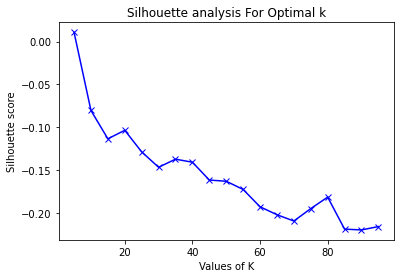

In [ ]:
range_n_clusters = list(np.arange(5,100,5))
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X_new)
  cluster_labels = kmeans.labels_

  # silhouette score
  s = silhouette_score(X, cluster_labels)
  print(num_clusters, s)
  silhouette_avg.append(s)

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
X

In [ ]:
wCSS = [] #varianza, cerco varianza bassa senza esagerare col numero di cluster
for i in range(1,100):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_new)
    wCSS.append(kmeans.inertia_) #Collects all of the within cluster sum of squares
plt.plot(range(1,100), wCSS)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wCSS')
plt.show()

## kmeans

In [ ]:
data_titles_pred = data_titles

X = np.array(X_new)

#X = data_titles

k=10
#algorithm{“lloyd”, “elkan”}
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10)
y_pred=kmeans.fit_predict(X)

data_titles_pred['y_pred'] = y_pred

In [ ]:
for i in range(0,k):
  print(np.count_nonzero(y_pred == i))


479
837
564
880
217
293
273
713
599
994


In [ ]:
data_titles_pred

title  type  \
0           Five Came Back: The Reference Films   1.0   
1                                   Taxi Driver   0.0   
2                                   Deliverance   0.0   
3               Monty Python and the Holy Grail   0.0   
4                               The Dirty Dozen   0.0   
...                                         ...   ...   
5844                                  Fine Wine   0.0   
5845                                C/O Kaadhal   0.0   
5846                                    Lokillo   0.0   
5847  Dad Stop Embarrassing Me - The Afterparty   0.0   
5848         Mighty Little Bheem: Kite Festival   1.0   

                                            description  release_year  \
0     Five Came Back: The Reference Films This colle...          1945   
1     Taxi Driver A mentally unstable Vietnam War ve...          1976   
2     Deliverance Intent on seeing the Cahulawassee ...          1972   
3     Monty Python and the Holy Grail King Arthur, a...          1975   
4     The Dirty Dozen 12 American military prisoners...          1967   
...                                                 ...           ...   
5844  Fine Wine A beautiful love story that can happ...          2021   
5845  C/O Kaadhal A heart warming film that explores...          2021   
5846  Lokillo A controversial TV host and comedian w...          2021   
5847  Dad Stop Embarrassing Me - The Afterparty Jami...          2021   
5848  Mighty Little Bheem: Kite Festival With winter...          2021   

      runtime                                       genres  \
0          51                            ['documentation']   
1         114                           ['drama', 'crime']   
2         109  ['drama', 'action', 'thriller', 'european']   
3          91              ['fantasy', 'action', 'comedy']   
4         150                            ['war', 'action']   
...       ...                                          ...   
5844      100                         ['romance', 'drama']   
5845      134                                    ['drama']   
5846       90                                   ['comedy']   
5847       37                                          NaN   
5848        7            ['family', 'animation', 'comedy']   

     production_countries  seasons  imdb_score  imdb_votes  tmdb_score  y_pred  
0                  ['US']        1        6.51       23439        6.83       0  
1                  ['US']        0        8.20      808582        8.18       3  
2                  ['US']        0        7.70      107673        7.30       3  
3                  ['GB']        0        8.20      534486        7.81       5  
4            ['GB', 'US']        0        7.70       72662        7.60       5  
...                   ...      ...         ...         ...         ...     ...  
5844               ['NG']        0        6.80          45        6.83       8  
5845                  NaN        0        7.70         348        6.83       9  
5846               ['CO']        0        3.80          68        6.30       8  
5847               ['US']        0        6.51       23439       10.00       3  
5848                  NaN        1        7.80          18       10.00       1  

[5849 rows x 12 columns]

In [ ]:
data_titles_pred["genres"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5844    False
5845    False
5846    False
5847     True
5848    False
Name: genres, Length: 5849, dtype: bool

In [ ]:
for i in range(0, k):
  c = data_titles_pred[data_titles_pred.y_pred == i]
  print(i, len(c[c.production_countries == "['JP']"]))

0 1
1 0
2 0
3 0
4 0
5 0
6 262
7 0
8 1
9 0


In [ ]:
c = data_titles_pred[data_titles_pred.y_pred == 0]
c[c.production_countries == "['JP']"]

title  type  \
4557  Cultivating the Seas: History and Future of th...   0.0   

                                            description  release_year  \
4557  Cultivating the Seas: History and Future of th...          2019   

      runtime             genres production_countries  seasons  imdb_score  \
4557       45  ['documentation']               ['JP']        0        6.51   

      imdb_votes  tmdb_score  y_pred  
4557       23439         6.0       0

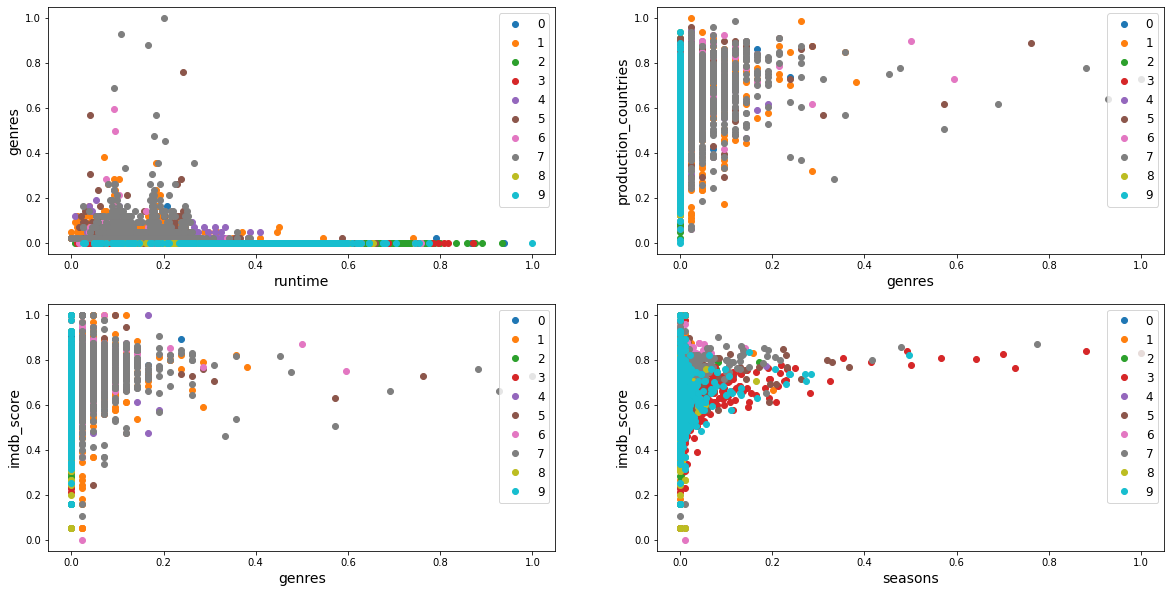

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
for i in range(0, k):
  plt.plot(X[y_pred==i, 2], X[y_pred==i, 3], "o",label=i) #con y==0 prendo solo la classe 0
plt.xlabel("runtime", fontsize=14)
plt.ylabel("genres", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(222)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 4],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [ ]:
y_pred

array([0, 3, 3, ..., 8, 3, 1], dtype=int32)

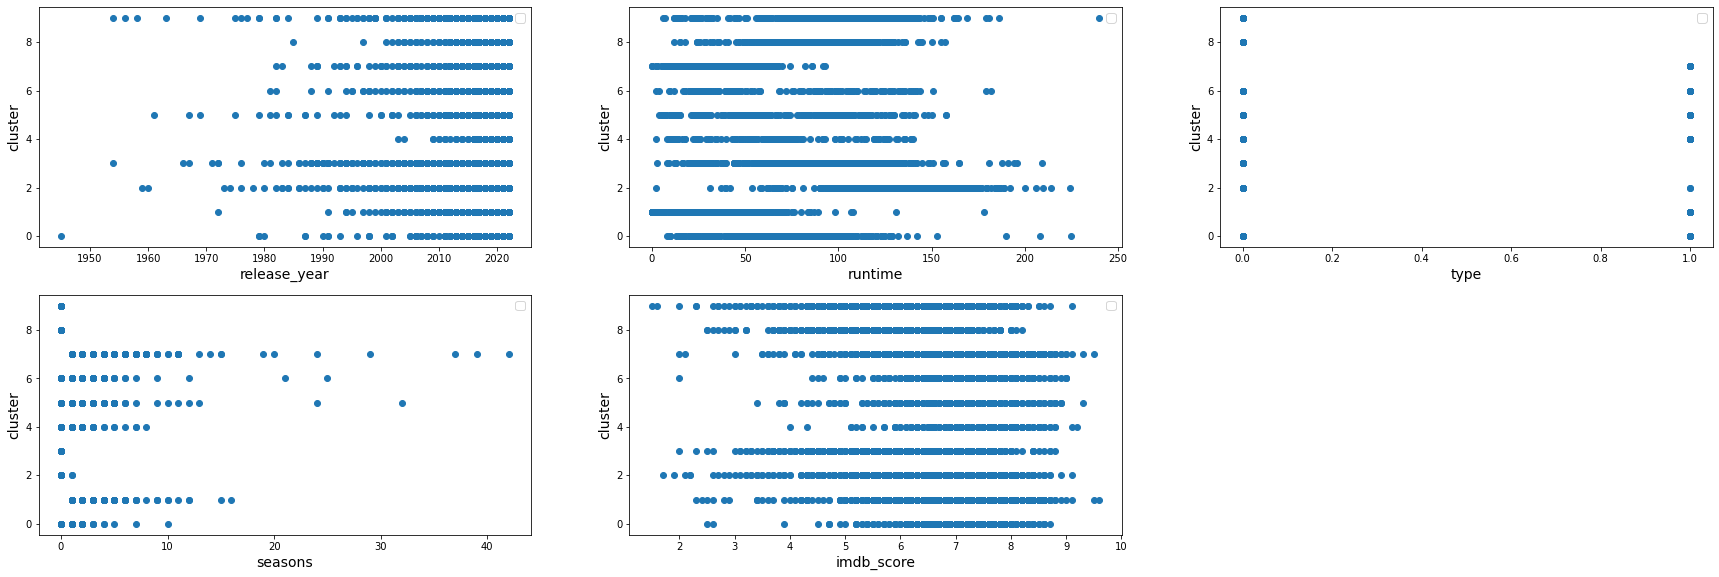

In [ ]:
plt.figure(figsize=(30, 15))

plt.subplot(331)

"""
for i in range(0, k):
  plt.plot(data_titles[y_pred==i,3], y_pred==i,"o", label=i) #con y==0 prendo solo la classe 0
"""

plt.plot(data_titles_pred["release_year"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("release_year", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(332)
plt.plot(data_titles_pred["runtime"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("runtime", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(333)
plt.plot(data_titles_pred["type"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("type", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(334)
plt.plot(data_titles_pred["seasons"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("seasons", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(335)
plt.plot(data_titles_pred["imdb_score"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""
plt.subplot(337)
plt.plot(data_titles["imdb_votes"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_votes", fontsize=14)
plt.legend(fontsize=12)


#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""

plt.show()

In [ ]:
y_pred[:30]

array([0, 3, 3, 5, 5, 5, 5, 3, 3, 3, 5, 3, 0, 3, 9, 9, 3, 9, 9, 2, 9, 9,
       9, 9, 0, 2, 1, 9, 9, 2], dtype=int32)

In [ ]:
len(X_new[y_pred ==1])

837

## Applico il Kmeans alla persona

In [ ]:
X_new_persona = np.array(X_new_persona)

y_pred_persona_scalata = kmeans.predict(X_new_persona)
#y_pred_persona_scalata = kmeans.predict(persona)

cluster_previsione = np.unique(y_pred_persona_scalata)
cluster_previsione

conta = np.zeros(k)
for i in range(0,len(y_pred_persona_scalata)):
  conta[y_pred_persona_scalata[i]] = conta[y_pred_persona_scalata[i]] + 1

cluster = {}
for i in range(0,len(conta)):
  #print("Cluster",i,":",conta[i])
  cluster[i] = conta[i]

# ordino cluster
cluster = dict(sorted(cluster.items(), key=lambda item: item[1], reverse=True))
cluster = {x:y for x,y in cluster.items() if y!=0}
cluster

y_pred_persona_scalata

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype=int32)

In [ ]:
data_users_pred['y_pred_persona_scalata'] = y_pred_persona_scalata

In [ ]:
cluster

{6: 42.0}

In [ ]:
data_users_pred[data_users_pred.y_pred_persona_scalata == 8]

Empty DataFrame
Columns: [user_id, film_id, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score, y_pred_persona_scalata]
Index: []

## loscate

In [ ]:
for i in range(0,k):
  print(np.count_nonzero(y_pred == i))

346
539
577
400
563
273
526
776
1090
759


In [ ]:
centro = kmeans.cluster_centers_[1]
dist = 1.3

vicini = []
for point in X_new[y_pred == 1]:
  print(np.linalg.norm(point - centro))
  if(np.linalg.norm(point - centro) <= dist):
    vicini.append(point)


indici_vicini = []
for i in range(0, len(X_new)):
  for j in range(0, len(vicini)):
    if((X_new[i] == vicini[j]).all()):
      indici_vicini.append(i)
      break

film = pd.DataFrame()

for i in indici_vicini:
  film = film.append(final_data_titles.loc[[i]])

film


In [ ]:
centro = kmeans.cluster_centers_[2]
dist = 1.435

vicini = []

punto = X_new[y_pred == 2][int((len(X_new[y_pred == 2])) * np.random.random_sample())]

for point in X_new[y_pred == 2]:
  print(np.linalg.norm(point - punto))
  if(np.linalg.norm(point - punto) <= dist):
    vicini.append(point)


indici_vicini = []
for i in range(0, len(X_new)):
  for j in range(0, len(vicini)):
    if((X_new[i] == vicini[j]).all()):
      indici_vicini.append(i)
      break

film = pd.DataFrame()

for i in indici_vicini:
  film = film.append(final_data_titles.loc[[i]])

film


1.508653865735606
2.0130182297989037
1.897161869819396
1.8884165435083469
1.891346964298206
1.8967041685265877
1.4745578288814984
1.8713475322314292
1.4698620050009992
1.4343711597064681
1.7120687109151715
1.7408804361317596
1.8757797525567166
1.8958822875058365
1.7180029021359366
1.8709668797299173
1.805499543411982
1.3924355469452538
1.6904913478581423
1.7351575628247815
1.4407823045877675
1.4238036929410558
1.734831244896221
1.4501136234460046
1.452282899835002
1.8779607036849988
1.7166586408729714
1.8886683286477755
1.889965714387362
1.87196876781752
1.7234877078210824
1.8724165643041568
1.709787702783131
1.5575557157091542
1.857804576010357
1.849937569777729
1.8882632998932336
1.7831864334982575
1.8466920323001275
1.3959881271665746
1.8577920715299243
1.8641858075668667
1.8595304058604893
1.7929776795401313
1.427120656598271
1.8759486580525053
1.6932057288498912
1.8787043052923866
1.8857036911005334
1.8720625842633674
1.7078572000496501
1.4045087045146607
1.412617408069046
1.41465

id                                              title   type  \
62     tm152839                            Tim Allen: Men Are Pigs  MOVIE   
168     tm64817  Jerry Seinfeld: I'm Telling You for the Last Time  MOVIE   
197      tm7951                         Tim Allen: Rewires America  MOVIE   
344    tm112381                                           Comedian  MOVIE   
357     tm76428                                        Jackass 2.5  MOVIE   
...         ...                                                ...    ...   
4786  tm1209228                    Norm Macdonald: Nothing Special  MOVIE   
4994  tm1207094           Pete Davidson Presents: The Best Friends  MOVIE   
5143  tm1207099        Jane Fonda & Lily Tomlin: Ladies Night Live  MOVIE   
5264  tm1215536          The Hall: Honoring the Greats of Stand-Up  MOVIE   
5421  tm1187638                            Ronny Chieng: Speakeasy  MOVIE   

                                            description  release_year  \
62    Comedian Tim Allen shares his enthusiasm for p...          1990   
168   Taped for HBO in August 1998, on the final dat...          1998   
197   This is arguably Tim Allen's best stand-up sho...          1991   
344   A look at the work of two stand-up comics, Jer...          2002   
357   The crew have now set off to finish what as le...          2007   
...                                                 ...           ...   
4786  In his final comedy special, Norm Macdonald po...          2022   
4994  Pete Davidson jokes about rumors, free plane r...          2022   
5143  Jane Fonda and Lily Tomlin host an iconic cele...          2022   
5264  In this comedy special, Jon Stewart, John Mula...          2022   
5421  Ronny shares his journey during the pandemic, ...          2022   

     age_certification  runtime                       genres  \
62                 NaN       30  ['comedy', 'documentation']   
168                  G       75  ['comedy', 'documentation']   
197                 PG       30  ['comedy', 'documentation']   
344                  R       82  ['comedy', 'documentation']   
357                NaN       61  ['documentation', 'comedy']   
...                ...      ...                          ...   
4786                 R       87  ['comedy', 'documentation']   
4994             PG-13       58  ['comedy', 'documentation']   
5143             PG-13       60  ['comedy', 'documentation']   
5264               NaN       70  ['documentation', 'comedy']   
5421               NaN       60  ['comedy', 'documentation']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
62                 ['US']        0   tt0259057        6.10         360   
168                ['US']        0   tt0500140        7.90        5879   
197                ['US']        0   tt0294967        6.00         198   
344                ['US']        0   tt0328962        6.90        6985   
357                ['US']        0         NaN        6.51       23439   
...                   ...      ...         ...         ...         ...   
4786               ['US']        0  tt20201450        7.60        1466   
4994               ['US']        0  tt20723748        4.70         569   
5143               ['US']        0  tt20723738        5.50         268   
5264               ['US']        0  tt10613308        6.30         400   
5421               ['US']        0  tt18830896        6.30        1146   

      tmdb_popularity  tmdb_score  
62              2.482         6.3  
168             5.822         7.6  
197             2.297         7.0  
344             4.854         6.7  
357            28.197         6.1  
...               ...         ...  
4786            4.061         6.2  
4994            3.503         7.0  
5143            2.912         5.7  
5264            2.957         8.0  
5421            3.056         6.2  

[67 rows x 15 columns]

In [ ]:
len(film)

27

In [ ]:
film = film.sample(42)
film

id                                              title   type  \
1638   tm207734                         Chris D'Elia: Incorrigible  MOVIE   
197      tm7951                         Tim Allen: Rewires America  MOVIE   
474     tm30289                   Jeff Dunham: Arguing with Myself  MOVIE   
1023   tm175954                          Aziz Ansari: Buried Alive  MOVIE   
2843   tm325610                          Chris D'Elia: Man on Fire  MOVIE   
4786  tm1209228                    Norm Macdonald: Nothing Special  MOVIE   
4994  tm1207094           Pete Davidson Presents: The Best Friends  MOVIE   
3810   tm857399                          Marc Maron: End Times Fun  MOVIE   
3034   tm327636           Joe Mande's Award-Winning Comedy Special  MOVIE   
2730   tm375091                            Marlon Wayans: Woke-ish  MOVIE   
924    tm149038             Bill Burr: I'm Sorry You Feel That Way  MOVIE   
2625   tm358242           Brian Regan: Nunchucks and Flamethrowers  MOVIE   
62     tm152839                            Tim Allen: Men Are Pigs  MOVIE   
1452   tm281182  Gabriel Iglesias: I'm Sorry for What I Said Wh...  MOVIE   
2739   tm320249                            Maria Bamford: Old Baby  MOVIE   
702     tm72845                          John Mulaney: New in Town  MOVIE   
5143  tm1207099        Jane Fonda & Lily Tomlin: Ladies Night Live  MOVIE   
1019   tm151210                             Jim Gaffigan: Obsessed  MOVIE   
344    tm112381                                           Comedian  MOVIE   
1445   tm220317                 Demetri Martin: Live (At The Time)  MOVIE   
415     tm75022        Zach Galifianakis: Live at the Purple Onion  MOVIE   
2598   tm366973                            Tom Segura: Disgraceful  MOVIE   
447    tm147686                 Kevin Hart: I'm a Grown Little Man  MOVIE   
2480   tm324588      Rory Scovel Tries Stand-Up for the First Time  MOVIE   
2722   tm429377                        Bert Kreischer: Secret Time  MOVIE   
1562   tm240728                Patton Oswalt: Talking for Clapping  MOVIE   
2449   tm346398                          Ryan Hamilton: Happy Face  MOVIE   
1407   tm209950                              Kevin Hart: What Now?  MOVIE   
540     tm44634                 Kevin James: Sweat the Small Stuff  MOVIE   
431    tm139349                            Jim Gaffigan: King Baby  MOVIE   
2204   tm440415          John Leguizamo's Latin History for Morons  MOVIE   
597     tm38454       Jeff Dunham's Very Special Christmas Special  MOVIE   
2193   tm320727    Norm Macdonald: Hitler's Dog, Gossip & Trickery  MOVIE   
1361   tm229542                     John Mulaney: The Comeback Kid  MOVIE   
357     tm76428                                        Jackass 2.5  MOVIE   
5264  tm1215536          The Hall: Honoring the Greats of Stand-Up  MOVIE   
777    tm181856                      Jeff Dunham: Controlled Chaos  MOVIE   
3565   tm452573                Gabriel Iglesias: One Show Fits All  MOVIE   
2697   tm356666  Judah Friedlander: America Is the Greatest Cou...  MOVIE   
1469   tm215054                                 Chris Tucker: Live  MOVIE   
730    tm183039                              Donald Glover: Weirdo  MOVIE   
4322   tm452574          Ray Romano: Right Here, Around the Corner  MOVIE   

                                            description  release_year  \
1638  Comedian and actor Chris DâElia, known for h...          2015   
197   This is arguably Tim Allen's best stand-up sho...          1991   
474   A recorded live performance of ventriloquist J...          2006   
1023  Standup comedian Aziz Ansari ("Parks and Recre...          2013   
2843  Unbridled comic Chris D'Elia reconsiders his a...          2017   
4786  In his final comedy special, Norm Macdonald po...          2022   
4994  Pete Davidson jokes about rumors, free plane r...          2022   
3810  Marc Maron wades through a swamp of vitamin hu...          2020   
3034  Stand-up comic Joe Mande aims for crit

In [ ]:
len(film["title"].unique())

42

In [ ]:
film.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/utente7.csv', index=False)

## Previsione film cluster con calcolo affinità basato sulla distanza punti

Predizione film

In [ ]:
1.6/(42-4)

0.042105263157894736

In [ ]:
1.2/(42-3)

0.030769230769230767

Soluzione di Matteo per l'affinità

In [ ]:
import random
from scipy.spatial import distance

X_new = np.array(X_new)

keys = list(cluster.keys())

if(len(keys)>1):
  n = len(keys)
  #n=2
else:
  n=1

film_top_affinity = pd.DataFrame()

for indice_cluster_key in range(0,n):
  lunghezza = len(X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]])

  max_dist = -1
  min_dist = 10000
  min_index = 0
  distanze = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index])
    distanze = distanze + dist
    if(dist > max_dist):
      max_dist = dist
    if(dist < min_dist):
      min_dist = dist
    
  media = distanze/lunghezza
  print(media)
  #print(min_dist)

  min_dist_affine = 0
  max_dist_affine = media

  for index in range(0, lunghezza):
    print("index:",index)
    film_utente = X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []

    for point in X_new[y_pred == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= max_dist):
        film_affini.append(point)
        y = np.linalg.norm(point - film_utente)
        distanze_film_affini.append(y)


    indici = []
    

    
    for i in range(0, len(X_new)):
      for j in range(0, len(film_affini)):
        if((X_new[i] == film_affini[j]).all()):
          indici.append(i)
          break
    

      
    
    film = pd.DataFrame()
    film.loc[:, "affinity"] = []

    for i in indici:
      film = film.append(final_data_titles.loc[[i]])

    
    film = film.reset_index()
    film = film.drop('index', axis=1)

    for i in range(0, len(distanze_film_affini)):
      #print(film.at[i,"title"], distanze_film_affini[i])
      film.at[i,"affinity"] = distanze_film_affini[i]


    film_top_affinity = film_top_affinity.append(film)


film_top = pd.DataFrame()
film_top.iloc[:, "ricorrenze"] = []


film_top_unici = film_top_affinity["id"].unique()


lista_ricorrenze = []
lista_affinita = []
#print(type(lista_ricorrenze))
for id in film_top_unici:
  film_uguali = film_top_affinity[film_top_affinity.id == id]
  """
  min = 10000
  for i in range(0, len(film_uguali)):
    if(film_uguali.iloc[i]["affinity"] < min): #DARE UN PESO A QUANTE VOLTE UN FILM COMPARE NEI FILM AFFINI
      min = film_uguali.iloc[i]["affinity"]
  #print(max)
  """
  n_film_uguali = len(film_uguali)
  #print(type(n_film_uguali))
  somma = 0 
  for i in range(0, n_film_uguali):
    somma = somma + film_uguali.iloc[i]["affinity"]
  
  media_film_uguali = (somma / n_film_uguali)#/n_film_uguali

  lista_ricorrenze.append(n_film_uguali)
  lista_affinita.append(media_film_uguali)

  film_top = film_top.append(film_uguali.iloc[0])

film_top["ricorrenze"] = lista_ricorrenze
film_top["affinity"] = lista_affinita 


#film_top = film_top.sort_values(by=['ricorrenze'], ascending=False)


#Togliamo quelli già visti
for i in range(0, len(lista_film_persona)):
  film_top = film_top[film_top.id != lista_film_persona[i]]


#scalo
if(len(film_top["affinity"])>0):
  affinity = film_top["affinity"]
  scaler = MinMaxScaler(feature_range =  tuple([-99.99, -60.00]))
  affinity = np.array(affinity).reshape(-1,1)
  affinity = scaler.fit_transform(affinity)
  #film_top["affinity"] = -affinity

  ricorrenze = film_top["ricorrenze"]
  scaler = MinMaxScaler(feature_range =  tuple([60.0, 99.99]))
  ricorrenze = np.array(ricorrenze).reshape(-1,1)
  ricorrenze = scaler.fit_transform(ricorrenze)
  film_top["affinity"] = np.mean([-affinity*2, ricorrenze*3, 0,0,0], axis=0)





film_top = film_top.sort_values(by=['affinity'], ascending=False)

film_top = film_top.reset_index()
film_top = film_top.drop('index', axis=1)

film_top

1.3353279581723176
index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 13
index: 14
index: 15
index: 16
index: 17
index: 18
index: 19
index: 20
index: 21
index: 22
index: 23
index: 24
index: 25
index: 26
index: 27
index: 28
index: 29
index: 30
index: 31
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
index: 41


affinity        id                                              title  \
0   97.418347   tm80339            Naruto: Ninja Clash in the Land of Snow   
1   90.028266   tm49405  Inuyasha the Movie: Affections Touching Across...   
2   87.683055  tm282915                      Fate/Grand Order: First Order   
3   87.161409   tm89764    Inuyasha the Movie 4: Fire on the Mystic Island   
4   86.968803  ts312044                               Beyblade Burst Surge   
..        ...       ...                                                ...   
59  61.233662  tm105278  Inuyasha the Movie 2: The Castle Beyond the Lo...   
60  60.698698   ts39014                                         Kuromukuro   
61  60.401758   ts34921                                          Wolverine   
62  60.128498  ts225690                              Vampire in the Garden   
63  60.000000   tm38064  Berserk: The Golden Age Arc II - The Battle fo...   

     type                                        description  release_year  \
0   MOVIE  Naruto is thrilled when he is sent on a missio...        2004.0   
1   MOVIE  InuYasha is a half-demon who was trapped in th...        2001.0   
2   MOVIE  The year 2015 CE.  The last era in which magec...        2016.0   
3   MOVIE  The mysterious island of Houraijima has reappe...        2004.0   
4    SHOW                                                NaN        2020.0   
..    ...                                                ...           ...   
59  MOVIE  With their most formidable foe vanquished, Inu...        2002.0   
60   SHOW  When mecha attack a research center, its stude...        2016.0   
61   SHOW  Wolverine is a mutant, possessing animal-keen ...        2011.0   
62   SHOW  Once, vampires and humans lived in harmony. No...        2022.0   
63  MOVIE  The Band of the Hawk participates in the Midla...        2012.0   

   age_certification  runtime  \
0              PG-13     90.0   
1              PG-13     99.0   
2                NaN     72.0   
3              PG-13     88.0   
4               TV-Y     23.0   
..               ...      ...   
59             PG-13    100.0   
60             TV-14     24.0   
61             TV-14     24.0   
62             TV-14     26.0   
63                 R     98.0   

                                               genres production_countries  \
0        ['comedy', 'fantasy', 'animation', 'action']               ['JP']   
1                  ['action', 'animation', 'fantasy']               ['JP']   
2                  ['action', 'fantasy', 'animation']               ['JP']   
3        ['fantasy', 'animation', 'action', 'comedy']               ['JP']   
4                                       ['animation']               ['JP']   
..                                                ...                  ...   
59  ['fantasy', 'action', 'animation', 'romance', ...               ['JP']   
60  ['comedy', 'drama', 'animation', 'action', 'sc...               ['JP']   
61                   ['scifi', 'animation', 'action']               ['JP']   
62  ['drama', 'scifi', 'action', 'animation', 'fan...               ['JP']   
63  ['action', 'drama', 'fantasy', 'animation', 'h...               ['JP']   

    seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0.0   tt0476680         6.6      6866.0           50.604         7.2   
1       0.0   tt0322645         7.2      2593.0           36.262         7.6   
2       0.0   tt6213810         5.7       896.0           12.341         6.8   
3       0.0   tt0473658         7.2      1845.0           34.264         7.7   
4       1.0  tt18554728         8.3        30.0            7.501         9.7   
..      ...         ...         ...         ...              ...         ...   
59      0.0   tt0366621         7.3      2148.0           30.957         7.6   
60      2.0   tt5895314         7.2      1290.0            6.887         6.7   
61      1.0   tt1847521         6.2      1519.0            8.022         6.5 

In [ ]:
film_top.head(50)

affinity         id                                              title  \
0   97.418347    tm80339            Naruto: Ninja Clash in the Land of Snow   
1   90.028266    tm49405  Inuyasha the Movie: Affections Touching Across...   
2   87.683055   tm282915                      Fate/Grand Order: First Order   
3   87.161409    tm89764    Inuyasha the Movie 4: Fire on the Mystic Island   
4   86.968803   ts312044                               Beyblade Burst Surge   
5   78.067483    ts27586                                               Magi   
6   77.841692   ts328671             BASTARDâ¼ -Heavy Metal, Dark Fantasy-   
7   77.040428    ts76865                                   Devilman Crybaby   
8   76.657175    tm54780                       Tiger & Bunny: The Beginning   
9   76.394268   tm138902  Inuyasha the Movie 3: Swords of an Honorable R...   
10  75.717248  tm1198504       Ghost in the Shell: SAC_2045 Sustainable War   
11  74.010969    ts84633                             The Promised Neverland   
12  73.968581   tm152273                          Tiger & Bunny: The Rising   
13  73.029852    ts38758                                               Ajin   
14  71.277390    ts37539                                      One-Punch Man   
15  70.998964     ts9246                                      Blue Exorcist   
16  70.866863   tm451078  Pokemon the Movie: Mewtwo Strikes Back - Evolu...   
17  70.449847    ts82228                                     Cells at Work!   
18  69.864386    ts42169                                             ERASED   
19  69.745673    ts12787               Code Geass: Lelouch of the Rebellion   
20  69.654812    ts26776                                     Smile PreCure!   
21  69.552310    ts79856                             SWORDGAI The Animation   
22  68.860694    ts21740                                       Black Butler   
23  68.617803    ts82375                               Beyblade Burst Turbo   
24  68.556530    ts86164                                          Hero Mask   
25  68.490194   ts218888                                                BNA   
26  68.220231    ts53367                              Little Witch Academia   
27  68.220087   ts221749                                         Dorohedoro   
28  68.145840    ts87471                                      Darwin's Game   
29  67.680452    ts57811                                     Fate/Apocrypha   
30  67.607516   ts218890                                   Drifting Dragons   
31  67.435146    ts76603                                             Erased   
32  66.288042    ts55232                        Cyborg 009: Call of Justice   
33  66.089182    ts20983                            Neon Genesis Evangelion   
34  65.949455   ts241486                      PokÃ©mon Journeys: The Series   
35  65.829160   ts222522                                           Spriggan   
36  65.742847   tm466832                           Dragon Quest: Your Story   
37  65.293990    ts79157                                   B: The Beginning   
38  65.008943    ts88783                             Bakugan: Battle Planet   
39  64.926566    ts82361                                           Ultraman   
40  64.717621    ts79409                             A.I.C.O. -Incarnation-   
41  64.629941    ts32186                                            Sonic X   
42  64.248922    ts84639                                          revisions   
43  64.146213    ts84772                             Ingress: The Animation   
44  64.128262   tm241990                                             Blame!   
45  63.930976    ts25765                                     Vampire Knight   
46  63.881704   ts256311                                 High-Rise Invasion   
47  63.847177    ts41906                    The Disastrous Life of Saiki K.   
48  63.631201    ts22286                                  Cardcaptor Sakura   
49  63.509840   tm467848                               

In [ ]:
film_top_bag_persona_1

In [ ]:
film_top_bag_persona_2.head(50)

In [ ]:
film_top_ifidf_persona_1

In [ ]:
data_titles_pred

In [ ]:
data_titles_pred[data_titles_pred.title == "One Piece"]

title  type                                        description  \
100  One Piece   1.0  Years ago, the fearsome Pirate King, Gol D. Ro...   

     release_year  runtime                                             genres  \
100          1999       23  ['animation', 'action', 'comedy', 'drama', 'fa...   

    production_countries  seasons  imdb_score  imdb_votes  tmdb_score  y_pred  
100               ['JP']     21.0         8.8    117129.0        8.76       4

Codice originale nostro funzionante

In [ ]:
import random
from scipy.spatial import distance
pd.options.mode.chained_assignment = None 

X_new = np.array(X_new)

keys = list(cluster.keys())

if(len(keys)>1):
  n = len(keys)
  #n=2
else:
  n=1

film_top_affinity = pd.DataFrame()

for indice_cluster_key in range(0,n):
  lunghezza = len(X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]])

  max_dist = -1
  min_dist = 10000
  min_index = 0
  distanze = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index])
    distanze = distanze + dist
    if(dist > max_dist):
      max_dist = dist
    if(dist < min_dist):
      min_dist = dist
    
  media = distanze/lunghezza
  print(media)
  #print(min_dist)

  min_dist_affine = 0
  max_dist_affine = media

  for index in range(0, lunghezza):
    print("index:",index)
    film_utente = X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []

    for point in X_new[y_pred == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= max_dist):
        film_affini.append(point)
        #y = (np.linalg.norm(point - film_utente) - 0) / (max_dist_cluster - 0)
        y = np.linalg.norm(point - film_utente)
        #distanze_film_affini.append(float("{:.2f}".format(y % 1)))
        distanze_film_affini.append(y)
        #print(y, np.linalg.norm(point - film_utente))
        #print(point, np.linalg.norm(point - film_utente))

    indici = []
    
    for i in range(0, len(X_new)):
      #print(i)
      for j in range(0, len(film_affini)):
        if((X_new[i] == film_affini[j]).all()):
          indici.append(i)
          break
    
    film = pd.DataFrame()
    film.loc[:, "affinity"] = []

    for i in indici:
      film = film.append(final_data_titles.loc[[i]])

    
    film = film.reset_index()
    film = film.drop('index', axis=1)

    for i in range(0, len(distanze_film_affini)):
      #print(film.at[i,"title"], distanze_film_affini[i])
      film.at[i,"affinity"] = "{:.2f}".format(distanze_film_affini[i])


    film_top_affinity = film_top_affinity.append(film)








film_top = pd.DataFrame()


film_top_unici = film_top_affinity["id"].unique()
for id in film_top_unici:
  
  film_uguali = film_top_affinity[film_top_affinity.id == id]
  ricorrenze = len(film_uguali)
  min = 10000
  for i in range(0, len(film_uguali)):
    #print(film_uguali.iloc[i]["title"], film_uguali.iloc[i]["affinity"])
    if(film_uguali.iloc[i]["affinity"] < min):
      min = film_uguali.iloc[i]["affinity"]
  #print(max)
  film_uguali.loc[:, "ricorrenze"] = ricorrenze
  
  film_top = film_top.append(film_uguali[film_uguali.affinity == min].iloc[0])


#film_top = film_top_affinity

#Togliamo quelli già visti
for i in range(0, len(lista_film_persona)):
  film_top = film_top[film_top.id != lista_film_persona[i]]






#scalo
if(len(film_top["affinity"])>0):
  affinity = film_top["affinity"]
  scaler = MinMaxScaler(feature_range =  tuple([-99.9, -60.0]))
  affinity = np.array(affinity).reshape(-1,1)
  affinity = scaler.fit_transform(affinity)
  film_top["affinity"] = -affinity


"""
column_to_move = film_top.pop("ricorrenze")
film_top.insert(0, "ricorrenze", column_to_move)
"""

film_top = film_top.sort_values(['affinity', 'ricorrenze'], ascending = [False, False])

film_top = film_top.reset_index()
film_top = film_top.drop('index', axis=1)

film_top

1.3353279581723176
index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 13
index: 14
index: 15
index: 16
index: 17
index: 18
index: 19
index: 20
index: 21
index: 22
index: 23
index: 24
index: 25
index: 26
index: 27
index: 28
index: 29
index: 30
index: 31
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
index: 41


affinity        id                                              title  \
0   99.900000   tm80339            Naruto: Ninja Clash in the Land of Snow   
1   89.491304   ts27586                                               Magi   
2   89.491304   ts76865                                   Devilman Crybaby   
3   82.552174  tm282915                      Fate/Grand Order: First Order   
4   82.552174  ts328671             BASTARDâ¼ -Heavy Metal, Dark Fantasy-   
..        ...       ...                                                ...   
59  61.734783  tm878333          PokÃ©mon the Movie: Secrets of the Jungle   
60  61.734783  tm105278  Inuyasha the Movie 2: The Castle Beyond the Lo...   
61  61.734783   ts34921                                          Wolverine   
62  61.734783   ts39014                                         Kuromukuro   
63  60.000000   tm38064  Berserk: The Golden Age Arc II - The Battle fo...   

     type                                        description  release_year  \
0   MOVIE  Naruto is thrilled when he is sent on a missio...        2004.0   
1    SHOW  This story is about the flow of fate and the b...        2012.0   
2    SHOW  Akira Fudo learns from his best friend Ryo Asu...        2018.0   
3   MOVIE  The year 2015 CE.  The last era in which magec...        2016.0   
4    SHOW  When evil forces threaten to resurrect Anthras...        2022.0   
..    ...                                                ...           ...   
59  MOVIE  The story of Koko, a young boy raised by PokÃ©...        2020.0   
60  MOVIE  With their most formidable foe vanquished, Inu...        2002.0   
61   SHOW  Wolverine is a mutant, possessing animal-keen ...        2011.0   
62   SHOW  When mecha attack a research center, its stude...        2016.0   
63  MOVIE  The Band of the Hawk participates in the Midla...        2012.0   

   age_certification  runtime  \
0              PG-13     90.0   
1              TV-14     24.0   
2              TV-MA     25.0   
3                NaN     72.0   
4              TV-MA     25.0   
..               ...      ...   
59               NaN     99.0   
60             PG-13    100.0   
61             TV-14     24.0   
62             TV-14     24.0   
63                 R     98.0   

                                               genres production_countries  \
0        ['comedy', 'fantasy', 'animation', 'action']               ['JP']   
1   ['scifi', 'action', 'animation', 'comedy', 'fa...               ['JP']   
2   ['animation', 'action', 'scifi', 'drama', 'fan...               ['JP']   
3                  ['action', 'fantasy', 'animation']               ['JP']   
4   ['animation', 'action', 'scifi', 'comedy', 'fa...               ['JP']   
..                                                ...                  ...   
59  ['family', 'fantasy', 'animation', 'action', '...               ['JP']   
60  ['fantasy', 'action', 'animation', 'romance', ...               ['JP']   
61                   ['scifi', 'animation', 'action']               ['JP']   
62  ['comedy', 'drama', 'animation', 'action', 'sc...               ['JP']   
63  ['action', 'drama', 'fantasy', 'animation', 'h...               ['JP']   

    seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0       0.0   tt0476680         6.6      6866.0           50.604        7.20   
1       3.0   tt2425098         7.8      4006.0           28.161        8.60   
2       1.0   tt6660498         7.6     19465.0           37.228        7.89   
3       0.0   tt6213810         5.7       896.0           12.341        6.80   
4       1.0  tt17736234         6.7       854.0           23.009        6.80   
..      ...         ...         ...         ...              ...         ...   
59      0.0  tt11819890         6.4      1942.0          110.860        7.03   
60      0.0   tt0366621         7.3      2148.0           30.957        7.60   
61      1.0   tt1847521         6.2      1519.0            8.022        6.50 

In [ ]:
film_top.head(50)

affinity         id                                              title  \
0   99.900000    tm80339            Naruto: Ninja Clash in the Land of Snow   
1   89.491304    ts27586                                               Magi   
2   89.491304    ts76865                                   Devilman Crybaby   
3   82.552174   tm282915                      Fate/Grand Order: First Order   
4   82.552174   ts328671             BASTARDâ¼ -Heavy Metal, Dark Fantasy-   
5   80.817391   ts312044                               Beyblade Burst Surge   
6   79.082609    tm49405  Inuyasha the Movie: Affections Touching Across...   
7   79.082609    tm89764    Inuyasha the Movie 4: Fire on the Mystic Island   
8   79.082609    tm54780                       Tiger & Bunny: The Beginning   
9   77.347826    ts84633                             The Promised Neverland   
10  77.347826    ts79856                             SWORDGAI The Animation   
11  77.347826  tm1198504       Ghost in the Shell: SAC_2045 Sustainable War   
12  75.613043     ts9246                                      Blue Exorcist   
13  75.613043    ts87471                                      Darwin's Game   
14  75.613043   tm152273                          Tiger & Bunny: The Rising   
15  73.878261    ts37539                                      One-Punch Man   
16  73.878261    ts38758                                               Ajin   
17  73.878261    ts12787               Code Geass: Lelouch of the Rebellion   
18  73.878261   tm451078  Pokemon the Movie: Mewtwo Strikes Back - Evolu...   
19  73.878261    ts82228                                     Cells at Work!   
20  72.143478    ts21740                                       Black Butler   
21  72.143478    ts82375                               Beyblade Burst Turbo   
22  72.143478    ts86164                                          Hero Mask   
23  72.143478    ts42169                                             ERASED   
24  70.408696   tm138902  Inuyasha the Movie 3: Swords of an Honorable R...   
25  70.408696    ts57811                                     Fate/Apocrypha   
26  70.408696    ts76603                                             Erased   
27  70.408696    ts53367                              Little Witch Academia   
28  68.673913    ts26776                                     Smile PreCure!   
29  68.673913   ts218888                                                BNA   
30  68.673913   ts218890                                   Drifting Dragons   
31  68.673913    ts20983                            Neon Genesis Evangelion   
32  68.673913    ts55232                        Cyborg 009: Call of Justice   
33  66.939130   ts221749                                         Dorohedoro   
34  66.939130   ts241486                      PokÃ©mon Journeys: The Series   
35  66.939130    ts79157                                   B: The Beginning   
36  66.939130   tm466832                           Dragon Quest: Your Story   
37  66.939130    ts79409                             A.I.C.O. -Incarnation-   
38  66.939130    ts32186                                            Sonic X   
39  66.939130    ts88783                             Bakugan: Battle Planet   
40  65.204348    ts41906                    The Disastrous Life of Saiki K.   
41  65.204348    ts82361                                           Ultraman   
42  65.204348   ts222522                                           Spriggan   
43  65.204348   tm467848                                           NiNoKuni   
44  65.204348   ts106015                                      Kengan Ashura   
45  65.204348   tm241990                                             Blame!   
46  65.204348    ts84772                             Ingress: The Animation   
47  65.204348    ts84639                                          revisions   
48  65.204348    ts22286                                  Cardcaptor Sakura   
49  63.469565    ts25765                               

## Test accuratezza

Togliamo un film alla volta dal dataset della persona, facciamo la previsione e controlliamo se il film tolto è presente o meno nella predizione. Contiamo quante volte il film è presente. Calcoliamo l'accuratezza dividendo questo contatore per il totale dei film "tolti".

In [ ]:
keys

[7, 3, 5, 4, 1]

In [ ]:
X_new_persona[y_pred_persona_scalata == 8]

array([], shape=(0, 15283), dtype=float64)

In [ ]:
import random
from scipy.spatial import distance

X_new = np.array(X_new)

keys = list(cluster.keys())

if(len(keys)>1):
  n = len(keys)
  #n=2
else:
  n=1

array_persona = X_new_persona
array_y_persona_scalata = y_pred_persona_scalata
array_film_persona = lista_film_persona

test_verificato = 0
for round in range(0, len(array_persona)):
  if(len(X_new_persona) > 1):
    X_new_persona = np.delete(X_new_persona, (round), axis=0)

    y_pred_persona_scalata = np.delete(y_pred_persona_scalata, (round), axis=0)
    id_film_test = persona1[persona1.index == round]["film_id"][round]

    lista_film_persona = np.delete(lista_film_persona, (round), axis=0)

    film_top_affinity = pd.DataFrame()

    for indice_cluster_key in range(0,n):
      lunghezza = len(X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]])
      if(lunghezza <1):
        break

      max_dist = -1
      min_dist = 10000
      min_index = 0
      distanze = 0
      for index in range(0, lunghezza):
        dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index])
        distanze = distanze + dist
        if(dist > max_dist):
          max_dist = dist
        if(dist < min_dist):
          min_dist = dist
        
      media = distanze/lunghezza
      #print(media)
      #print(min_dist)

      min_dist_affine = 0
      max_dist_affine = media

      for index in range(0, lunghezza):
        #print("index:",index)
        film_utente = X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index]

        distanze_film_affini = []
        film_affini = []

        for point in X_new[y_pred == keys[indice_cluster_key]]:
          if(np.linalg.norm(point - film_utente) <= max_dist):
            film_affini.append(point)
            #y = (np.linalg.norm(point - film_utente) - 0) / (max_dist_cluster - 0)
            y = np.linalg.norm(point - film_utente)
            #distanze_film_affini.append(float("{:.2f}".format(y % 1)))
            distanze_film_affini.append(y)
            #print(y, np.linalg.norm(point - film_utente))
            #print(point, np.linalg.norm(point - film_utente))


        indici = []
        for i in range(0, len(X_new)):
          #print(i)
          for j in range(0, len(film_affini)):
            if((X_new[i] == film_affini[j]).all()):
              indici.append(i)
              break
          
        
        film = pd.DataFrame()
        film.loc[:, "affinity"] = []

        for i in indici:
          film = film.append(final_data_titles.loc[[i]])

        
        film = film.reset_index()
        film = film.drop('index', axis=1)

        for i in range(0, len(distanze_film_affini)):
          #print(film.at[i,"title"], distanze_film_affini[i])
          film.at[i,"affinity"] = distanze_film_affini[i]

        #film = film.sort_values(by=['affinity'], ascending=False)

        #film = film.reset_index()
        #film = film.drop('index', axis=1)


        film_top_affinity = film_top_affinity.append(film)




    #film_top_unici = film_top_affinity["id"].unique()


    film_top = pd.DataFrame()
    film_top.loc[:, "ricorrenze"] = []


    film_top_unici = film_top_affinity["id"].unique()


    lista_ricorrenze = []
    lista_affinita = []
    #print(type(lista_ricorrenze))
    for id in film_top_unici:
      film_uguali = film_top_affinity[film_top_affinity.id == id]
      n_film_uguali = len(film_uguali)
      somma = 0 
      for i in range(0, n_film_uguali):
        somma = somma + film_uguali.iloc[i]["affinity"]
      
      media_film_uguali = (somma / n_film_uguali)#/n_film_uguali

      lista_ricorrenze.append(n_film_uguali)
      lista_affinita.append(media_film_uguali)

      film_top = film_top.append(film_uguali.iloc[0])

    film_top["ricorrenze"] = lista_ricorrenze
    film_top["affinity"] = lista_affinita 



    #film_top = film_top_affinity

    #Togliamo quelli già visti
    
    for i in range(0, len(lista_film_persona)):
      film_top = film_top[film_top.id != lista_film_persona[i]]
    


    #scalo
    if(len(film_top["affinity"])>0):
      affinity = film_top["affinity"]
      scaler = MinMaxScaler(feature_range =  tuple([-99.99, -60.0]))
      affinity = np.array(affinity).reshape(-1,1)
      affinity = scaler.fit_transform(affinity)
      #film_top["affinity"] = -affinity

      ricorrenze = film_top["ricorrenze"]
      scaler = MinMaxScaler(feature_range =  tuple([60.0, 99.99]))
      ricorrenze = np.array(ricorrenze).reshape(-1,1)
      ricorrenze = scaler.fit_transform(ricorrenze)
      film_top["affinity"] = np.mean([-affinity*2, ricorrenze*3,0,0,0], axis=0)




    film_top = film_top.sort_values(by=['affinity'], ascending=False)

    film_top = film_top.reset_index()
    film_top = film_top.drop('index', axis=1)

    film_top = film_top.head(10)

    id_film_top = film_top["id"]
    if(contiene(id_film_top, id_film_test)):
      print(round, id_film_test, "true")
      test_verificato = test_verificato+1
    else:
      print(round, id_film_test, "false")

    X_new_persona = array_persona

    y_pred_persona_scalata  = array_y_persona_scalata

    lista_film_persona = array_film_persona

print("Numero di film trovati in TOP10",test_verificato,"/", len(array_persona))
print("Percentuale TOP10 nuovo metodo:",test_verificato/len(array_persona))

0 ts20339 false
1 tm134235 false
2 tm34524 false
3 tm65142 false
4 tm59590 false
5 ts20682 false
6 ts20305 false
7 tm80059 false
8 tm96037 false
9 tm36164 false
10 tm147494 false
11 tm24576 false
12 tm177687 false
13 tm177044 false
14 tm312577 false
15 ts20433 false
16 ts87466 false
17 tm34846 false
18 tm93612 false
19 tm266652 false
20 ts273485 false
21 ts82189 false
22 ts20429 false
23 ts11313 false
24 ts314002 false
25 tm374845 false
26 tm1065041 false
27 ts103329 false
28 ts90311 false
29 tm315584 false
30 tm425138 false
31 tm363231 false
32 ts255486 false
33 tm40103 false
34 tm125985 false
35 tm49037 false
36 ts30288 false
37 ts38116 false
38 tm880822 false
39 ts25252 false
40 ts32835 false
41 ts250092 false
Numero di film trovati in TOP10 0 / 42
Percentuale TOP10 nuovo metodo: 0.0


In [ ]:
import random
from scipy.spatial import distance

X_new = np.array(X_new)

keys = list(cluster.keys())

if(len(keys)>1):
  n = len(keys)
  #n=2
else:
  n=1

array_persona = X_new_persona
array_y_persona_scalata = y_pred_persona_scalata
array_film_persona = lista_film_persona

test_verificato = 0
for round in range(0, len(array_persona)):
  if(len(X_new_persona) > 1):
    X_new_persona = np.delete(X_new_persona, (round), axis=0)

    y_pred_persona_scalata = np.delete(y_pred_persona_scalata, (round), axis=0)
    id_film_test = persona1[persona1.index == round]["film_id"][round]

    lista_film_persona = np.delete(lista_film_persona, (round), axis=0)

    film_top_affinity = pd.DataFrame()

    for indice_cluster_key in range(0,n):
      lunghezza = len(X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]])
      if(lunghezza <1):
        break

      max_dist = -1
      min_dist = 10000
      min_index = 0
      distanze = 0
      for index in range(0, lunghezza):
        dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index])
        distanze = distanze + dist
        if(dist > max_dist):
          max_dist = dist
        if(dist < min_dist):
          min_dist = dist
        
      media = distanze/lunghezza
      #print(media)
      #print(min_dist)

      min_dist_affine = 0
      max_dist_affine = media

      for index in range(0, lunghezza):
        #print("index:",index)
        film_utente = X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index]

        distanze_film_affini = []
        film_affini = []

        for point in X_new[y_pred == keys[indice_cluster_key]]:
          if(np.linalg.norm(point - film_utente) <= max_dist):
            film_affini.append(point)
            #y = (np.linalg.norm(point - film_utente) - 0) / (max_dist_cluster - 0)
            y = np.linalg.norm(point - film_utente)
            #distanze_film_affini.append(float("{:.2f}".format(y % 1)))
            distanze_film_affini.append(y)
            #print(y, np.linalg.norm(point - film_utente))
            #print(point, np.linalg.norm(point - film_utente))


        indici = []
        for i in range(0, len(X_new)):
          #print(i)
          for j in range(0, len(film_affini)):
            if((X_new[i] == film_affini[j]).all()):
              indici.append(i)
              break
          
        
        film = pd.DataFrame()
        film.loc[:, "affinity"] = []

        for i in indici:
          film = film.append(final_data_titles.loc[[i]])

        
        film = film.reset_index()
        film = film.drop('index', axis=1)

        for i in range(0, len(distanze_film_affini)):
          #print(film.at[i,"title"], distanze_film_affini[i])
          film.at[i,"affinity"] = "{:.3f}".format(distanze_film_affini[i])

        #film = film.sort_values(by=['affinity'], ascending=False)

        #film = film.reset_index()
        #film = film.drop('index', axis=1)


        film_top_affinity = film_top_affinity.append(film)




    #film_top_unici = film_top_affinity["id"].unique()


    film_top = pd.DataFrame()

    film_top_unici = film_top_affinity["id"].unique()
    for id in film_top_unici:
      
      film_uguali = film_top_affinity[film_top_affinity.id == id]
      ricorrenze = len(film_uguali)
      min = 10000
      for i in range(0, len(film_uguali)):
        #print(film_uguali.iloc[i]["title"], film_uguali.iloc[i]["affinity"])
        if(film_uguali.iloc[i]["affinity"] < min):
          min = film_uguali.iloc[i]["affinity"]
      #print(film_uguali.iloc[0]["title"], min)
      film_uguali.loc[:, "ricorrenze"] = ricorrenze
      
      film_top = film_top.append(film_uguali[film_uguali.affinity == min].iloc[0])


    #film_top = film_top_affinity

    #Togliamo quelli già visti
    for i in range(0, len(lista_film_persona)):
      film_top = film_top[film_top.id != lista_film_persona[i]]



    #scalo
    if(len(film_top["affinity"])>0):
      affinity = film_top["affinity"]
      scaler = MinMaxScaler(feature_range =  tuple([-99.9, -60.0]))
      affinity = np.array(affinity).reshape(-1,1)
      affinity = scaler.fit_transform(affinity)
      film_top["affinity"] = -affinity



    column_to_move = film_top.pop("ricorrenze")
    film_top.insert(0, "ricorrenze", column_to_move)

    film_top = film_top.sort_values(['affinity', 'ricorrenze'],
                  ascending = [False, False])

    film_top = film_top.reset_index()
    film_top = film_top.drop('index', axis=1)

    film_top = film_top.head(10)


    id_film_top = film_top["id"]
    if(contiene(id_film_top, id_film_test)):
      print(round,id_film_test, "true")
      test_verificato = test_verificato+1
    else:
      print(round,id_film_test, "false")

    X_new_persona = array_persona

    y_pred_persona_scalata  = array_y_persona_scalata

    lista_film_persona = array_film_persona

print(test_verificato, "/", len(array_persona))
print(test_verificato/len(array_persona))

0 ts20339 false
1 tm134235 false
2 tm34524 false
3 tm65142 false
4 tm59590 false
5 ts20682 false
6 ts20305 false
7 tm80059 false
8 tm96037 false
9 tm36164 false
10 tm147494 false
11 tm24576 false
12 tm177687 false
13 tm177044 false
14 tm312577 false
15 ts20433 false
16 ts87466 false
17 tm34846 false
18 tm93612 false
19 tm266652 false
20 ts273485 false
21 ts82189 false
22 ts20429 false
23 ts11313 false
24 ts314002 false
25 tm374845 false
26 tm1065041 false
27 ts103329 false
28 ts90311 false
29 tm315584 false
30 tm425138 false
31 tm363231 false
32 ts255486 false
33 tm40103 false
34 tm125985 false
35 tm49037 false
36 ts30288 false
37 ts38116 false
38 tm880822 false
39 ts25252 false
40 ts32835 false
41 ts250092 false
0 / 42
0.0


TOP 5 nostro

In [ ]:
import random
from scipy.spatial import distance

X_new = np.array(X_new)

keys = list(cluster.keys())

if(len(keys)>1):
  n = len(keys)
  #n=2
else:
  n=1

array_persona = X_new_persona
array_y_persona_scalata = y_pred_persona_scalata
array_film_persona = lista_film_persona

test_verificato = 0
for round in range(0, len(array_persona)):
  X_new_persona = np.delete(X_new_persona, (round), axis=0)

  y_pred_persona_scalata = np.delete(y_pred_persona_scalata, (round), axis=0)
  id_film_test = persona1[persona1.index == round]["film_id"][round]

  lista_film_persona = np.delete(lista_film_persona, (round), axis=0)

  film_top_affinity = pd.DataFrame()

  for indice_cluster_key in range(0,n):
    lunghezza = len(X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]])
    if(lunghezza <1):
        break

    max_dist = -1
    min_dist = 10000
    min_index = 0
    distanze = 0
    for index in range(0, lunghezza):
      dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index])
      distanze = distanze + dist
      if(dist > max_dist):
        max_dist = dist
      if(dist < min_dist):
        min_dist = dist
      
    media = distanze/lunghezza
    #print(media)
    #print(min_dist)

    min_dist_affine = 0
    max_dist_affine = media

    for index in range(0, lunghezza):
      #print("index:",index)
      film_utente = X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index]

      distanze_film_affini = []
      film_affini = []

      for point in X_new[y_pred == keys[indice_cluster_key]]:
        if(np.linalg.norm(point - film_utente) <= max_dist):
          film_affini.append(point)
          #y = (np.linalg.norm(point - film_utente) - 0) / (max_dist_cluster - 0)
          y = np.linalg.norm(point - film_utente)
          #distanze_film_affini.append(float("{:.2f}".format(y % 1)))
          distanze_film_affini.append(y)
          #print(y, np.linalg.norm(point - film_utente))
          #print(point, np.linalg.norm(point - film_utente))


      indici = []
      for i in range(0, len(X_new)):
        #print(i)
        for j in range(0, len(film_affini)):
          if((X_new[i] == film_affini[j]).all()):
            indici.append(i)
            break
        
      
      film = pd.DataFrame()
      film.loc[:, "affinity"] = []

      for i in indici:
        film = film.append(final_data_titles.loc[[i]])

      
      film = film.reset_index()
      film = film.drop('index', axis=1)

      for i in range(0, len(distanze_film_affini)):
        #print(film.at[i,"title"], distanze_film_affini[i])
        film.at[i,"affinity"] = "{:.3f}".format(distanze_film_affini[i])

      #film = film.sort_values(by=['affinity'], ascending=False)

      #film = film.reset_index()
      #film = film.drop('index', axis=1)


      film_top_affinity = film_top_affinity.append(film)




  #film_top_unici = film_top_affinity["id"].unique()


  film_top = pd.DataFrame()

  film_top_unici = film_top_affinity["id"].unique()
  for id in film_top_unici:
    
    film_uguali = film_top_affinity[film_top_affinity.id == id]
    ricorrenze = len(film_uguali)
    min = 10000
    for i in range(0, len(film_uguali)):
      #print(film_uguali.iloc[i]["title"], film_uguali.iloc[i]["affinity"])
      if(film_uguali.iloc[i]["affinity"] < min):
        min = film_uguali.iloc[i]["affinity"]
    #print(film_uguali.iloc[0]["title"], min)
    film_uguali.loc[:, "ricorrenze"] = ricorrenze
    
    film_top = film_top.append(film_uguali[film_uguali.affinity == min].iloc[0])


  #film_top = film_top_affinity

  #Togliamo quelli già visti
  for i in range(0, len(lista_film_persona)):
    film_top = film_top[film_top.id != lista_film_persona[i]]



  #scalo
  if(len(film_top["affinity"])>0):
    affinity = film_top["affinity"]
    scaler = MinMaxScaler(feature_range =  tuple([-99.9, -60.0]))
    affinity = np.array(affinity).reshape(-1,1)
    affinity = scaler.fit_transform(affinity)
    film_top["affinity"] = -affinity



  column_to_move = film_top.pop("ricorrenze")
  film_top.insert(0, "ricorrenze", column_to_move)

  film_top = film_top.sort_values(['affinity', 'ricorrenze'],
                ascending = [False, False])

  film_top = film_top.reset_index()
  film_top = film_top.drop('index', axis=1)

  film_top = film_top.head(5)


  id_film_top = film_top["id"]
  if(contiene(id_film_top, id_film_test)):
    print(round,id_film_test, "true")
    test_verificato = test_verificato+1
  else:
    print(round,id_film_test, "false")

  X_new_persona = array_persona

  y_pred_persona_scalata  = array_y_persona_scalata

  lista_film_persona = array_film_persona

print(test_verificato, "/", len(array_persona))
print(test_verificato/len(array_persona))

0 ts20339 false
1 tm134235 false
2 tm34524 false
3 tm65142 false
4 tm59590 false
5 ts20682 false
6 ts20305 false
7 tm80059 false
8 tm96037 false
9 tm36164 false
10 tm147494 false
11 tm24576 false
12 tm177687 false
13 tm177044 false
14 tm312577 false
15 ts20433 false
16 ts87466 false
17 tm34846 false
18 tm93612 false
19 tm266652 false
20 ts273485 false
21 ts82189 false
22 ts20429 false
23 ts11313 false
24 ts314002 false
25 tm374845 false
26 tm1065041 false
27 ts103329 false
28 ts90311 false
29 tm315584 false
30 tm425138 false
31 tm363231 false
32 ts255486 false
33 tm40103 false
34 tm125985 false
35 tm49037 false
36 ts30288 false
37 ts38116 false
38 tm880822 false
39 ts25252 false
40 ts32835 false
41 ts250092 false
0 / 42
0.0


# Previsione film con selezione parametri

## Gestione missing values ( non da runnare)

Quante colonne contengono almeno un valore nullo

In [ ]:
missing_data_titles = data_titles.columns[data_titles.isnull().any()]
print('dati mancanti = ', len(missing_data_titles))

dati mancanti =  3


In [ ]:
data_titles.isnull().sum(axis = 0)

title                     0
type                      0
description              17
release_year              0
runtime                   0
genres                   58
production_countries    228
seasons                   0
imdb_score                0
imdb_votes                0
tmdb_score                0
dtype: int64

elimino film senza titolo con id -> tm1063792

In [ ]:
data_titles = data_titles[data_titles["title"].notna()]

In [ ]:
data_titles.isnull().sum(axis = 0)

title                     0
type                      0
description              17
release_year              0
runtime                   0
genres                   58
production_countries    228
seasons                   0
imdb_score                0
imdb_votes                0
tmdb_score                0
dtype: int64

Elimino le righe in credits con id (film) -> tm1063792

In [ ]:
data_credits = data_credits[data_credits.id != "tm1063792"]

Count non conta i NaN.
La media non considera i NaN, ovviamente

In [ ]:
mean_imdb_score = data_titles["imdb_score"].mean()
mean_imdb_votes = data_titles["imdb_votes"].mean()
mean_tmdb_popularity = data_titles["tmdb_popularity"].mean()
mean_tmdb_score = data_titles["tmdb_score"].mean()

data_titles["imdb_score"].fillna(round(mean_imdb_score,2), inplace=True)
data_titles["imdb_votes"].fillna(int(mean_imdb_votes), inplace=True)
data_titles["tmdb_popularity"].fillna(int(mean_tmdb_popularity), inplace=True)
data_titles["tmdb_score"].fillna(round(mean_tmdb_score,2), inplace=True)
data_titles["seasons"].fillna(0, inplace=True)

Gestisco i NaN. Per i film abbiamo messo season = 0

In [ ]:
data_titles.head()

In [ ]:
missing_data_titles = data_titles.columns[data_titles.isnull().any()]
print('dati mancanti = ', len(missing_data_titles))

dati mancanti =  3


In [ ]:
data_titles.isnull().sum(axis = 0)

title                     0
type                      0
description              17
release_year              0
runtime                   0
genres                   58
production_countries    228
seasons                   0
imdb_score                0
imdb_votes                0
tmdb_score                0
dtype: int64

Credits missing values

In [ ]:
missing_data_credits = data_credits.columns[data_credits.isnull().any()]
print('dati mancanti = ', len(missing_data_credits))

In [ ]:
data_credits.isnull().sum(axis = 0)

Duplicati

In [ ]:
dup_data_titles = data_titles.copy()
dup_data_titles.drop_duplicates(inplace=True)

print('Numero totale di istanze duplicate: ', data_titles.shape[0] - dup_data_titles.shape[0])
#data = dup_data.copy()
#data

In [ ]:
dup_data_credits = data_credits.copy()
dup_data_credits.drop_duplicates(inplace=True)

print('Numero totale di istanze duplicate: ', data_credits.shape[0] - dup_data_credits.shape[0])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

data_type = data_titles[["type"]]
ordinal_encoder = OrdinalEncoder(categories = "auto")
data_type_ordinal = ordinal_encoder.fit_transform(data_type)
print(data_type_ordinal[:10])

data_titles["type"] = data_type_ordinal

In [ ]:
#data_titles = data_titles.drop("title", axis = 1)
data_titles = data_titles.drop("id", axis = 1)
#data_titles = data_titles.drop("description", axis = 1)
data_titles = data_titles.drop("age_certification", axis = 1)
data_titles = data_titles.drop("imdb_id", axis = 1)
data_titles = data_titles.drop("tmdb_popularity", axis = 1)

In [ ]:
data_titles

In [ ]:
#data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_numeric_bag.csv', index=False)

In [ ]:
#data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_drop.csv', index=False)

## Caricamento dataset e scelta filtri

In [ ]:
UTENTI_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/utenti.csv'
data_users = pd.read_csv(UTENTI_PATH)

TITLES_DROP_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_drop.csv'
data_titles = pd.read_csv(TITLES_DROP_PATH)

TITLES_FINALE_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv'
final_data_titles = pd.read_csv(TITLES_FINALE_PATH)

Scelta filtri

In [ ]:
anno_min = 1990
anno_max = 2010

In [ ]:
genere_scelto = "action"

In [ ]:
paese_scelto = "IN"

Filtro sul genere

In [ ]:
data_titles_filtrato = pd.DataFrame()
final_data_titles_filtrato = pd.DataFrame()


if(len(genere_scelto)>0):
  for i in range(0, len(data_titles)):
    if(type(data_titles.at[i, "genres"]) != float):
      if (genere_scelto in data_titles.at[i, "genres"]):
        data_titles_filtrato = data_titles_filtrato.append(data_titles[data_titles.index == i])
        final_data_titles_filtrato = final_data_titles_filtrato.append(final_data_titles[final_data_titles.index == i])

  data_titles_filtrato = data_titles_filtrato.reset_index()
  data_titles_filtrato = data_titles_filtrato.drop('index', axis=1)

  final_data_titles_filtrato = final_data_titles_filtrato.reset_index()
  final_data_titles_filtrato = final_data_titles_filtrato.drop('index', axis=1)

  data_titles = data_titles_filtrato
  final_data_titles = final_data_titles_filtrato


In [ ]:
data_titles

title  type  \
0                Dostana   0.0   
1    Alibaba Aur 40 Chor   0.0   
2                 Bandie   0.0   
3              Agneepath   0.0   
4                 Mujrim   0.0   
..                   ...   ...   
163    Jagame Thandhiram   0.0   
164             Wild Dog   0.0   
165            Annaatthe   0.0   
166               Laabam   0.0   
167               Kaaval   0.0   

                                           description  release_year  runtime  \
0    Two close friends decide to enter law enforcem...          1980      161   
1    The movie is based on the story of Ali Baba an...          1979      146   
2    Maharaj Brajbhan lives a wealthy lifestyle in ...          1978      141   
3    The movie depicts the life of a young boy, Vij...          1990      174   
4    The film follows the story of Shankar, who is ...          1989      162   
..                                                 ...           ...      ...   
163  When a clever, carefree gangster is recruited ...          2021      158   
164  Wild Dog aka Vijay Varma is an NIA agent who’s...          2021      145   
165  Kaaliyan is a village president in the Madurai...          2021      163   
166  The president of a farmers' association wants ...          2021      144   
167  Thampan and Antony are a long time best friend...          2021      148   

                                                genres production_countries  \
0    ['drama', 'comedy', 'crime', 'romance', 'action']               ['IN']   
1    ['drama', 'romance', 'action', 'fantasy', 'fam...         ['SU', 'IN']   
2                       ['drama', 'action', 'romance']               ['IN']   
3                         ['drama', 'action', 'crime']               ['IN']   
4                         ['drama', 'action', 'crime']               ['IN']   
..                                                 ...                  ...   
163  ['comedy', 'crime', 'action', 'drama', 'thrill...         ['GB', 'IN']   
164                    ['thriller', 'crime', 'action']               ['IN']   
165                      ['drama', 'action', 'comedy']               ['IN']   
166                                ['drama', 'action']               ['IN']   
167                    ['thriller', 'action', 'drama']               ['IN']   

     seasons  imdb_score  imdb_votes  tmdb_score  
0        0.0         2.1        25.0         4.9  
1        0.0         6.2       565.0         6.8  
2        0.0         4.4        35.0         6.0  
3        0.0         7.6      8947.0         6.5  
4        0.0         5.4       197.0         6.0  
..       ...         ...         ...         ...  
163      0.0         5.8     11731.0         6.4  
164      0.0         6.1      2283.0         5.9  
165      0.0         4.0      9643.0         7.1  
166      0.0         3.4       799.0         5.0  
167      0.0         5.1      1497.0         5.3  

[168 rows x 11 columns]

Filtro sul paese

In [ ]:
data_titles_filtrato = pd.DataFrame()
final_data_titles_filtrato = pd.DataFrame()


if(len(paese_scelto)>0):
  for i in range(0, len(data_titles)):
    if(type(data_titles.at[i, "production_countries"]) != float):
      if (paese_scelto in data_titles.at[i, "production_countries"]):
        data_titles_filtrato = data_titles_filtrato.append(data_titles[data_titles.index == i])
        final_data_titles_filtrato = final_data_titles_filtrato.append(final_data_titles[final_data_titles.index == i])

  data_titles_filtrato = data_titles_filtrato.reset_index()
  data_titles_filtrato = data_titles_filtrato.drop('index', axis=1)

  final_data_titles_filtrato = final_data_titles_filtrato.reset_index()
  final_data_titles_filtrato = final_data_titles_filtrato.drop('index', axis=1)
  
  data_titles = data_titles_filtrato
  final_data_titles = final_data_titles_filtrato

Filtro sull'anno min

In [ ]:
data_titles_filtrato = pd.DataFrame()
final_data_titles_filtrato = pd.DataFrame()


if(anno_min != 0):
  for i in range(0, len(data_titles)):
    if(type(data_titles.at[i, "release_year"]) != float):
      if (data_titles.at[i, "release_year"] > anno_min):
        data_titles_filtrato = data_titles_filtrato.append(data_titles[data_titles.index == i])
        final_data_titles_filtrato = final_data_titles_filtrato.append(final_data_titles[final_data_titles.index == i])

  data_titles_filtrato = data_titles_filtrato.reset_index()
  data_titles_filtrato = data_titles_filtrato.drop('index', axis=1)

  final_data_titles_filtrato = final_data_titles_filtrato.reset_index()
  final_data_titles_filtrato = final_data_titles_filtrato.drop('index', axis=1)
  
  data_titles = data_titles_filtrato
  final_data_titles = final_data_titles_filtrato

Filtro sull'anno max

In [ ]:
data_titles_filtrato = pd.DataFrame()
final_data_titles_filtrato = pd.DataFrame()


if(anno_max != 0):
  for i in range(0, len(data_titles)):
    if(type(data_titles.at[i, "release_year"]) != float):
      if (data_titles.at[i, "release_year"] < anno_max):
        data_titles_filtrato = data_titles_filtrato.append(data_titles[data_titles.index == i])
        final_data_titles_filtrato = final_data_titles_filtrato.append(final_data_titles[final_data_titles.index == i])

  data_titles_filtrato = data_titles_filtrato.reset_index()
  data_titles_filtrato = data_titles_filtrato.drop('index', axis=1)

  final_data_titles_filtrato = final_data_titles_filtrato.reset_index()
  final_data_titles_filtrato = final_data_titles_filtrato.drop('index', axis=1)
  
  data_titles = data_titles_filtrato
  final_data_titles = final_data_titles_filtrato

In [ ]:
data_titles

## Bag of words

Ottengo la bag di Genres

In [ ]:
data_titles_drop = data_titles

In [ ]:
data_titles_drop = data_titles
a = []

for riga in data_titles_drop["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

 
vectorizer_generi = CountVectorizer()
#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
vectorizer_generi.fit(docs)
bag_generi = vectorizer_generi.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_generi.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_generi = vectorizer_generi.vocabulary_
print(vectorizer_generi.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_generi.toarray())


genres = bag_generi

['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
{'documentation': 4, 'drama': 5, 'crime': 3, 'action': 0, 'thriller': 16, 'european': 6, 'fantasy': 8, 'comedy': 2, 'war': 17, 'romance': 13, 'western': 18, 'history': 9, 'music': 11, 'family': 7, 'horror': 10, 'scifi': 14, 'animation': 1, 'reality': 12, 'sport': 15}
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Ottengo la bag di Production Countries

In [ ]:
a = []
for riga in data_titles_drop["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

vectorizer_countries = CountVectorizer()
#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
vectorizer_countries.fit(docs)
bag_countries = vectorizer_countries.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_countries.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_countries = vectorizer_countries.vocabulary_
print(vectorizer_countries.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_countries.toarray())

countries = bag_countries

['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh', 'kn', 'kr', 'kw', 'lb', 'lebanon', 'lk', 'lt', 'lu', 'ma', 'mc', 'mt', 'mu', 'mw', 'mx', 'my', 'na', 'ng', 'nl', 'no', 'np', 'nz', 'pe', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py', 'qa', 'ro', 'rs', 'ru', 'sa', 'se', 'sg', 'sn', 'su', 'sy', 'th', 'tn', 'tr', 'tw', 'tz', 'ua', 'us', 'uy', 'va', 've', 'vn', 'xx', 'za', 'zw']
{'us': 101, 'gb': 33, 'eg': 28, 'de': 25, 'in': 45, 'su': 93, 'lb': 59, 'ca': 15, 'fr': 32, 'dz': 27, 'it': 50, 'jp': 52, 'ar': 4, 'pe': 77, 'br': 11, 'ie': 43, 'hk': 39, 'au': 6, 'gh': 35, 'bf': 9, 'mx': 69, 'es': 29, 'co': 21, 'ps': 82, 'no': 74, 'be': 8, 'tr': 97, 'dk': 26, 'bs': 12, 'cz': 24, 'mt': 66, 'za': 107, 'cn': 20, 'bg': 10, '

In [ ]:
data_titles_drop["description"] = data_titles_drop["title"] +" " + data_titles_drop["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in data_titles_drop["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

vectorizer_text = CountVectorizer()
#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
vectorizer_text.fit(docs)
bag_text = vectorizer_text.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_text.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_text = vectorizer_text.vocabulary_
print(vectorizer_text.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_text.toarray())


text = bag_text

['aag', 'aagey', 'aakhr', 'aaliy', 'aamir', 'aan', 'aap', 'aapk', 'aapl', 'aarambh', 'aardm', 'aaron', 'aas', 'aashiqu', 'aat', 'aavir', 'aayiram', 'ab', 'aback', 'abad', 'abagn', 'abah', 'abandon', 'abang', 'abatutu', 'abb', 'abbey', 'abbot', 'abby', 'abc', 'abcd', 'abd', 'abdal', 'abdallah', 'abdel', 'abdom', 'abdou', 'abduc', 'abdurrahm', 'abeokut', 'abercromby', 'abet', 'abhay', 'abhirup', 'abid', 'abigail', 'abimael', 'abject', 'abl', 'abnorm', 'aboard', 'abod', 'aborigin', 'abort', 'abound', 'abraham', 'abrazo', 'abroad', 'abrupt', 'abs', 'absolv', 'absorb', 'abstin', 'abstract', 'absurd', 'abtalk', 'abu', 'abud', 'abund', 'abus', 'abuzz', 'abyss', 'ac', 'academ', 'academy', 'acast', 'acc', 'acceiv', 'accel', 'access', 'accid', 'acclaim', 'accolad', 'accompany', 'accompl', 'accord', 'account', 'accr', 'accru', 'accum', 'accus', 'accustom', 'acerb', 'acero', 'acevedo', 'ach', 'achary', 'acheng', 'achiev', 'achil', 'achm', 'acid', 'acknowledg', 'acolyt', 'acoust', 'acp', 'acquaint'

In [ ]:
len(bag_text.toarray()[0])

15485

## TFIDF Vectorizer

In [ ]:
data_titles_drop = data_titles
a = []

for riga in data_titles_drop["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_generi_vectorizer = TfidfVectorizer()

tfidf_generi_vectorizer.fit(docs)
tfidf_generi = tfidf_generi_vectorizer.transform(docs)


print(tfidf_generi_vectorizer.get_feature_names())

dizionario_generi_tfdf = tfidf_generi_vectorizer.vocabulary_


print(tfidf_generi_vectorizer.vocabulary_)
print(tfidf_generi.toarray())


genres = tfidf_generi

['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
{'documentation': 4, 'drama': 5, 'crime': 3, 'action': 0, 'thriller': 16, 'european': 6, 'fantasy': 8, 'comedy': 2, 'war': 17, 'romance': 13, 'western': 18, 'history': 9, 'music': 11, 'family': 7, 'horror': 10, 'scifi': 14, 'animation': 1, 'reality': 12, 'sport': 15}
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.4861475  0.         0.         ... 0.47510487 0.         0.        ]
 ...
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.64518738 0.39820381 ... 0.         0.         0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
a = []
for riga in data_titles_drop["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_countries_vectorizer = TfidfVectorizer()

tfidf_countries_vectorizer.fit(docs)
tfidf_countries = tfidf_countries_vectorizer.transform(docs)


print(tfidf_countries_vectorizer.get_feature_names())

dizionario_countries_tfdf = tfidf_countries_vectorizer.vocabulary_

print(tfidf_countries_vectorizer.get_feature_names())

dizionario_countries_tfidf = tfidf_countries_vectorizer.vocabulary_
print(tfidf_countries_vectorizer.vocabulary_)

print(tfidf_countries.toarray())

countries = tfidf_countries

['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh', 'kn', 'kr', 'kw', 'lb', 'lebanon', 'lk', 'lt', 'lu', 'ma', 'mc', 'mt', 'mu', 'mw', 'mx', 'my', 'na', 'ng', 'nl', 'no', 'np', 'nz', 'pe', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py', 'qa', 'ro', 'rs', 'ru', 'sa', 'se', 'sg', 'sn', 'su', 'sy', 'th', 'tn', 'tr', 'tw', 'tz', 'ua', 'us', 'uy', 'va', 've', 'vn', 'xx', 'za', 'zw']
['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh', 'kn

In [ ]:
data_titles_drop["description"] = data_titles_drop["title"] +" " + data_titles_drop["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in data_titles_drop["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(docs)
tfidf_text = tfidf_vectorizer.transform(docs)


print(tfidf_vectorizer.get_feature_names_out())

print(tfidf_text.shape)


text = tfidf_text

['aag' 'aagey' 'aakhr' ... '麻婆斗妇' '냉면' '랩소디']
(5849, 15485)


## Feature Scaling su dataset

In [ ]:
data_titles_drop = data_titles

Droppo le colonne da trasformare

In [ ]:
data_titles_drop = data_titles_drop.drop("title", axis = 1)
data_titles_drop = data_titles_drop.drop("description", axis = 1)
data_titles_drop = data_titles_drop.drop("genres", axis = 1)
data_titles_drop = data_titles_drop.drop("production_countries", axis = 1)

In [ ]:
# Initialise the Scaler
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()
 
# To scale data
minMaxScaler.fit(data_titles_drop)
dati_scalati_m = minMaxScaler.transform(data_titles_drop)
dati_scalati_s = standardScaler.fit_transform(data_titles_drop)

X = dati_scalati_m

Concateno tutto 

In [ ]:
"""
X_new = []

for i in range(0, len(X)):
  l1 = list(X[i])
  #l2 = list(bag_titles.toarray()[i])
  l3 = list(bag_generi.toarray()[i])
  l4 = list(bag_countries.toarray()[i])
  l5 = list(bag_desc.toarray()[i])
  X_new.append(l1+l3+l4+l5)
  print(i)

X_new = np.array(X_new)
"""

'\nX_new = []\n\nfor i in range(0, len(X)):\n  l1 = list(X[i])\n  #l2 = list(bag_titles.toarray()[i])\n  l3 = list(bag_generi.toarray()[i])\n  l4 = list(bag_countries.toarray()[i])\n  l5 = list(bag_desc.toarray()[i])\n  X_new.append(l1+l3+l4+l5)\n  print(i)\n\nX_new = np.array(X_new)\n'

In [ ]:
X_new = np.hstack((X, text.toarray(), genres.toarray(), countries.toarray()))

In [ ]:
X_new.shape

(5849, 15620)

## Scelgo persona

In [ ]:
persona = data_users

persona1 = persona[persona.user_id == "u1"]
persona2 = persona[persona.user_id == "u2"]

persona = persona1

persona = persona.reset_index()
persona = persona.drop('index', axis=1)
data_users_pred = persona

lista_film_persona = list(persona["film_id"])


persona = persona.drop("user_id", axis = 1)
#persona = persona.drop("title", axis = 1)
persona = persona.drop("film_id", axis = 1)
#persona = persona.drop("description", axis = 1)
persona = persona.drop("age_certification", axis = 1)
persona = persona.drop("imdb_id", axis = 1)
persona = persona.drop("tmdb_popularity", axis = 1)

persona

title   type  \
0                                           One Piece   SHOW   
1                             One Piece: Strong World  MOVIE   
2   One Piece: Episode of Chopper Plus: Bloom in t...  MOVIE   
3   One Piece: The Desert Princess and the Pirates...  MOVIE   
4                                   One Piece Film: Z  MOVIE   
5                                     Attack on Titan   SHOW   
6                                              Naruto   SHOW   
7                          Naruto Shippuden the Movie  MOVIE   
8          Naruto Shippuden the Movie: The Lost Tower  MOVIE   
9                   Naruto Shippuden the Movie: Bonds  MOVIE   
10       Naruto Shippuden the Movie: The Will of Fire  MOVIE   
11     Naruto: Guardians of the Crescent Moon Kingdom  MOVIE   
12               Naruto: Legend of the Stone of Gelel  MOVIE   
13           Naruto Shippuden the Movie: Blood Prison  MOVIE   
14                                Fullmetal Alchemist  MOVIE   
15                           JoJo's Bizarre Adventure   SHOW   
16                     Demon Slayer: Kimetsu no Yaiba   SHOW   
17                    Bleach the Movie: Fade to Black  MOVIE   
18                       Bleach the Movie: Hell Verse  MOVIE   
19                                             Bleach  MOVIE   
20                                         Baki Hanma   SHOW   
21                                               BAKI   SHOW   
22                                   Sword Art Online   SHOW   
23                                         DEATH NOTE   SHOW   
24        The Seven Deadly Sins: Prisoners of the Sky  MOVIE   
25             The Seven Deadly Sins: Cursed by Light  MOVIE   
26                              The Seven Deadly Sins   SHOW   
27                       Ghost in the Shell: SAC_2045   SHOW   
28                                       Vinland Saga   SHOW   
29                            Godzilla Singular Point   SHOW   
30                   Godzilla: Planet of the Monsters  MOVIE   
31                         Godzilla: The Planet Eater  MOVIE   
32               Godzilla: City on the Edge of Battle  MOVIE   
33           Mobile Suit Gundam: Char's Counterattack  MOVIE   
34          Mobile Suit Gundam II: Soldiers of Sorrow  MOVIE   
35        Mobile Suit Gundam III: Encounters in Space  MOVIE   
36                         Mobile Suit Gundam Unicorn   SHOW   
37           Mobile Suit Gundam: Iron-Blooded Orphans   SHOW   
38                        Mobile Suit Gundam Hathaway  MOVIE   
39                                          Yu-Gi-Oh!   SHOW   
40                                    Hunter x Hunter   SHOW   
41                                        Shaman King   SHOW   

                                          description  release_year  runtime  \
0   Years ago, the fearsome Pirate King, Gol D. Ro...          1999       23   
1   20 years after his escape from Impel Down, the...          2009      114   
2   A retelling of the Drum Island storyline from ...          2008       95   
3   A re-telling of the Alabaster Arc from One Pie...          2007       89   
4   Zephyr, now known as Z, rides the seas with on...          2012      108   
5   Several hundred years ago, humans were nearly ...          2013       24   
6   In another world, ninja are the ultimate power...          2002       23   
7   Demons that once almost destroyed the world, a...          2007       94   
8   Assigned on a mission to capture Mukade, a mis...          2010       85   
9   A mysterious group of ninjas makes a surprise ...          2008       90   
10  Ninjas with bloodline limits begin disappearin...          2009       95   
11  Naruto Uzumaki, Kakashi Hatake, Sakura Haruno,...          2006       95   
12  Naruto, Shikamaru, and Sakura are executing th...          2005       96   
13  After his capture for attempted assassination ...          2011      108   
14  Two alchemist brothers go on a quest for the P...          2017      135   
15  Follow the 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

data_type = persona[["type"]]
ordinal_encoder = OrdinalEncoder(categories = "auto")
data_type_ordinal = ordinal_encoder.fit_transform(data_type)

persona["type"] = data_type_ordinal

In [ ]:
persona

title  type  \
0                                           One Piece   1.0   
1                             One Piece: Strong World   0.0   
2   One Piece: Episode of Chopper Plus: Bloom in t...   0.0   
3   One Piece: The Desert Princess and the Pirates...   0.0   
4                                   One Piece Film: Z   0.0   
5                                     Attack on Titan   1.0   
6                                              Naruto   1.0   
7                          Naruto Shippuden the Movie   0.0   
8          Naruto Shippuden the Movie: The Lost Tower   0.0   
9                   Naruto Shippuden the Movie: Bonds   0.0   
10       Naruto Shippuden the Movie: The Will of Fire   0.0   
11     Naruto: Guardians of the Crescent Moon Kingdom   0.0   
12               Naruto: Legend of the Stone of Gelel   0.0   
13           Naruto Shippuden the Movie: Blood Prison   0.0   
14                                Fullmetal Alchemist   0.0   
15                           JoJo's Bizarre Adventure   1.0   
16                     Demon Slayer: Kimetsu no Yaiba   1.0   
17                    Bleach the Movie: Fade to Black   0.0   
18                       Bleach the Movie: Hell Verse   0.0   
19                                             Bleach   0.0   
20                                         Baki Hanma   1.0   
21                                               BAKI   1.0   
22                                   Sword Art Online   1.0   
23                                         DEATH NOTE   1.0   
24        The Seven Deadly Sins: Prisoners of the Sky   0.0   
25             The Seven Deadly Sins: Cursed by Light   0.0   
26                              The Seven Deadly Sins   1.0   
27                       Ghost in the Shell: SAC_2045   1.0   
28                                       Vinland Saga   1.0   
29                            Godzilla Singular Point   1.0   
30                   Godzilla: Planet of the Monsters   0.0   
31                         Godzilla: The Planet Eater   0.0   
32               Godzilla: City on the Edge of Battle   0.0   
33           Mobile Suit Gundam: Char's Counterattack   0.0   
34          Mobile Suit Gundam II: Soldiers of Sorrow   0.0   
35        Mobile Suit Gundam III: Encounters in Space   0.0   
36                         Mobile Suit Gundam Unicorn   1.0   
37           Mobile Suit Gundam: Iron-Blooded Orphans   1.0   
38                        Mobile Suit Gundam Hathaway   0.0   
39                                          Yu-Gi-Oh!   1.0   
40                                    Hunter x Hunter   1.0   
41                                        Shaman King   1.0   

                                          description  release_year  runtime  \
0   Years ago, the fearsome Pirate King, Gol D. Ro...          1999       23   
1   20 years after his escape from Impel Down, the...          2009      114   
2   A retelling of the Drum Island storyline from ...          2008       95   
3   A re-telling of the Alabaster Arc from One Pie...          2007       89   
4   Zephyr, now known as Z, rides the seas with on...          2012      108   
5   Several hundred years ago, humans were nearly ...          2013       24   
6   In another world, ninja are the ultimate power...          2002       23   
7   Demons that once almost destroyed the world, a...          2007       94   
8   Assigned on a mission to capture Mukade, a mis...          2010       85   
9   A mysterious group of ninjas makes a surprise ...          2008       90   
10  Ninjas with bloodline limits begin disappearin...          2009       95   
11  Naruto Uzumaki, Kakashi Hatake, Sakura Haruno,...          2006       95   
12  Naruto, Shikamaru, and Sakura are executing th...          2005       96   
13  After his capture for attempted assassination ...          2011      108   
14  Two alchemist brothers go on a quest for the P...          2017      135   
15  Follow the intergenerational feud between the ...     

## Bag of Words persona

In [ ]:
from pandas.core.construction import is_empty_data
from pandas.core.arrays import string_
#data_titles["genres"].value_counts()

a = []

for riga in persona["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
 
#vectorizer = CountVectorizer()


#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
bag_generi_persona = vectorizer_generi.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_generi.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_generi_persona = vectorizer_generi.vocabulary_
print(vectorizer_generi.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_generi_persona.toarray())

persona_generi = bag_generi_persona

['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
{'documentation': 4, 'drama': 5, 'crime': 3, 'action': 0, 'thriller': 16, 'european': 6, 'fantasy': 8, 'comedy': 2, 'war': 17, 'romance': 13, 'western': 18, 'history': 9, 'music': 11, 'family': 7, 'horror': 10, 'scifi': 14, 'animation': 1, 'reality': 12, 'sport': 15}
[[1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0]
 [1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
a = []
for riga in persona["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
bag_countries_persona = vectorizer_countries.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_countries.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_countries = vectorizer_countries.vocabulary_
print(vectorizer_countries.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_countries_persona.toarray())

persona_countries = bag_countries_persona

['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh', 'kn', 'kr', 'kw', 'lb', 'lebanon', 'lk', 'lt', 'lu', 'ma', 'mc', 'mt', 'mu', 'mw', 'mx', 'my', 'na', 'ng', 'nl', 'no', 'np', 'nz', 'pe', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py', 'qa', 'ro', 'rs', 'ru', 'sa', 'se', 'sg', 'sn', 'su', 'sy', 'th', 'tn', 'tr', 'tw', 'tz', 'ua', 'us', 'uy', 'va', 've', 'vn', 'xx', 'za', 'zw']
{'us': 101, 'gb': 33, 'eg': 28, 'de': 25, 'in': 45, 'su': 93, 'lb': 59, 'ca': 15, 'fr': 32, 'dz': 27, 'it': 50, 'jp': 52, 'ar': 4, 'pe': 77, 'br': 11, 'ie': 43, 'hk': 39, 'au': 6, 'gh': 35, 'bf': 9, 'mx': 69, 'es': 29, 'co': 21, 'ps': 82, 'no': 74, 'be': 8, 'tr': 97, 'dk': 26, 'bs': 12, 'cz': 24, 'mt': 66, 'za': 107, 'cn': 20, 'bg': 10, '

In [ ]:
persona["description"] = persona["title"] +" " + persona["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in persona["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)


#
# Create sample set of documents
#
docs = np.array(a)
#
# Fit the bag-of-words model
#
bag_text_persona = vectorizer_text.transform(docs)
#
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
#
print(vectorizer_text.get_feature_names())
#
# Associate the indices with each unique word
#
dizionario_text = vectorizer_text.vocabulary_
print(vectorizer_text.vocabulary_)
#
# Print the numerical feature vector
#
print(bag_text_persona.toarray())

persona_text = bag_text_persona


['aag', 'aagey', 'aakhr', 'aaliy', 'aamir', 'aan', 'aap', 'aapk', 'aapl', 'aarambh', 'aardm', 'aaron', 'aas', 'aashiqu', 'aat', 'aavir', 'aayiram', 'ab', 'aback', 'abad', 'abagn', 'abah', 'abandon', 'abang', 'abatutu', 'abb', 'abbey', 'abbot', 'abby', 'abc', 'abcd', 'abd', 'abdal', 'abdallah', 'abdel', 'abdom', 'abdou', 'abduc', 'abdurrahm', 'abeokut', 'abercromby', 'abet', 'abhay', 'abhirup', 'abid', 'abigail', 'abimael', 'abject', 'abl', 'abnorm', 'aboard', 'abod', 'aborigin', 'abort', 'abound', 'abraham', 'abrazo', 'abroad', 'abrupt', 'abs', 'absolv', 'absorb', 'abstin', 'abstract', 'absurd', 'abtalk', 'abu', 'abud', 'abund', 'abus', 'abuzz', 'abyss', 'ac', 'academ', 'academy', 'acast', 'acc', 'acceiv', 'accel', 'access', 'accid', 'acclaim', 'accolad', 'accompany', 'accompl', 'accord', 'account', 'accr', 'accru', 'accum', 'accus', 'accustom', 'acerb', 'acero', 'acevedo', 'ach', 'achary', 'acheng', 'achiev', 'achil', 'achm', 'acid', 'acknowledg', 'acolyt', 'acoust', 'acp', 'acquaint'

## TFIDF persona

In [ ]:

a = []

for riga in persona["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
 
#vectorizer = CountVectorizer()


docs = a

tfidf_generi_persona = tfidf_generi_vectorizer.transform(docs)


dizionario_generi_persona = vectorizer_generi.vocabulary_

print(tfidf_generi_persona.toarray())

persona_generi = tfidf_generi_persona

[[0.45270356 0.53821307 0.33218023 0.         0.         0.290003
  0.         0.         0.55762061 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.50438995 0.59966232 0.         0.         0.         0.
  0.         0.         0.62128567 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.45270356 0.53821307 0.33218023 0.         0.         0.290003
  0.         0.         0.55762061 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.54536294 0.64837454 0.40017089 0.         0.         0.34936082
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.50438995 0.59966232 0.         0.         0.         0.
  0.         0.         0.62128567 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.354517

In [ ]:
a = []
for riga in persona["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_countries_persona = tfidf_countries_vectorizer.transform(docs)

dizionario_countries = tfidf_countries_vectorizer.vocabulary_


print(bag_countries_persona.toarray())

persona_countries = tfidf_countries_persona

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
persona["description"] = persona["title"] +" " + persona["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in persona["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_text_persona = tfidf_vectorizer.transform(docs)

print(tfidf_vectorizer.get_feature_names_out())

print(tfidf_text_persona.shape)

persona_text = tfidf_text_persona


['aag' 'aagey' 'aakhr' ... '麻婆斗妇' '냉면' '랩소디']
(42, 15485)


## Feature scaling su persona

In [ ]:
persona = persona.drop("title", axis = 1)
persona = persona.drop("description", axis = 1)
persona = persona.drop("genres", axis = 1)
persona = persona.drop("production_countries", axis = 1)

In [ ]:
persona

type  release_year  runtime  seasons  imdb_score  imdb_votes  tmdb_score
0    1.0          1999       23     21.0         8.8    117129.0         8.8
1    0.0          2009      114      0.0         7.5      5467.0         7.5
2    0.0          2008       95      0.0         7.0      1233.0         7.1
3    0.0          2007       89      0.0         6.9      1660.0         6.7
4    0.0          2012      108      0.0         7.8      7243.0         7.5
5    1.0          2013       24      4.0         9.0    325381.0         8.6
6    1.0          2002       23      6.0         8.4     96729.0         8.4
7    0.0          2007       94      0.0         6.7      4090.0         7.2
8    0.0          2010       85      0.0         6.8      3650.0         7.0
9    0.0          2008       90      0.0         6.8      4551.0         7.2
10   0.0          2009       95      0.0         7.0      3702.0         7.3
11   0.0          2006       95      0.0         6.4      4050.0         7.0
12   0.0          2005       96      0.0         6.4      4380.0         6.6
13   0.0          2011      108      0.0         7.1      5104.0         7.2
14   0.0          2017      135      0.0         5.2     19493.0         5.3
15   1.0          2012       24      5.0         8.4     21354.0         8.8
16   1.0          2019       25      3.0         8.7     93604.0         8.8
17   0.0          2008       94      0.0         7.1      2207.0         7.0
18   0.0          2010       94      0.0         7.4      2416.0         7.4
19   0.0          2018      108      0.0         6.4     11406.0         6.6
20   1.0          2021       25      2.0         6.6      1685.0         8.0
21   1.0          2018       24      3.0         6.7      6041.0         8.1
22   1.0          2012       23      4.0         7.6     44606.0         8.3
23   1.0          2006       24      1.0         9.0    309445.0         8.7
24   0.0          2018       99      0.0         7.1      4768.0         7.6
25   0.0          2021       79      0.0         6.4       970.0         7.9
26   1.0          2014       25      5.0         7.9     31085.0         8.5
27   1.0          2020       25      2.0         6.2      2397.0         6.5
28   1.0          2019       24      2.0         8.8     32535.0         8.6
29   1.0          2021       25      1.0         6.5      1673.0         7.2
30   0.0          2017       89      0.0         6.0      8548.0         6.3
31   0.0          2018       91      0.0         5.0      4196.0         6.5
32   0.0          2018      105      0.0         5.8      4896.0         6.5
33   0.0          1988      119      0.0         7.3      1693.0         6.7
34   0.0          1981      133      0.0         7.2      1274.0         7.2
35   0.0          1982      144      0.0         7.6      1236.0         7.5
36   1.0          2010       36      2.0         7.8      1291.0         7.9
37   1.0          2015       24      2.0         7.9      1660.0         7.1
38   0.0          2021       96      0.0         6.6      1400.0         7.6
39   1.0          1998       22      7.0         7.3     21113.0         7.4
40   1.0          2011       23      3.0         9.0     92162.0         8.8
41   1.0          2021       25      1.0         6.9      1728.0         8.3

In [ ]:
# To scale data
dati_scalati_persona_m = minMaxScaler.transform(persona)
 
# To scale data
#dati_scalati_persona_s = standardScaler.fit_transform(persona)

persona_scalata = dati_scalati_persona_m

Concateno tutto

In [ ]:
X_new_persona = np.hstack((persona_scalata, persona_text.toarray(), persona_generi.toarray(), persona_countries.toarray()))

In [ ]:
X_new_persona.shape

(42, 15620)

## ricerca iperparametri kmeans

In [ ]:
results = dict()
k_cand = list(np.arange(5,100,5))

for k in k_cand:
    print(k)
    kmeans = KMeans(n_clusters=k, init = 'k-means++').fit(X_new)
    score0 = kmeans.inertia_
    score1 = silhouette_score(X,kmeans.labels_,metric='euclidean')
    score2 = silhouette_score(X,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0,'s1':score1,'s2':score2}

fig,axs = plt.subplots(2,1,sharex=True,figsize=(16,8))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

5
10
15
20


KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: ignored

Minore è l'inerzia, maggiore è la coerenza dei cluster
https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819

In [ ]:
"""
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = list(np.arange(5,100,5))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
"""

In [ ]:
Sum_of_squared_distances = []
K = range(5,100,5)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_new)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
range_n_clusters = list(np.arange(5,100,5))
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X_new)
  cluster_labels = kmeans.labels_

  # silhouette score
  s = silhouette_score(X, cluster_labels)
  print(num_clusters, s)
  silhouette_avg.append(s)

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
X

In [ ]:
wCSS = [] #varianza, cerco varianza bassa senza esagerare col numero di cluster
for i in range(1,100):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_new)
    wCSS.append(kmeans.inertia_) #Collects all of the within cluster sum of squares
plt.plot(range(1,100), wCSS)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wCSS')
plt.show()

## kmeans

In [ ]:
data_titles_pred = data_titles

X = np.array(X_new)

#X = data_titles

k=10
#algorithm{“lloyd”, “elkan”}
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10)
y_pred=kmeans.fit_predict(X)

data_titles_pred['y_pred'] = y_pred

In [ ]:
for i in range(0,k):
  print(np.count_nonzero(y_pred == i))


991
631
413
1
2
851
309
945
760
946


In [ ]:
data_titles_pred

title  type  \
0           Five Came Back: The Reference Films   1.0   
1                                   Taxi Driver   0.0   
2                                   Deliverance   0.0   
3               Monty Python and the Holy Grail   0.0   
4                               The Dirty Dozen   0.0   
...                                         ...   ...   
5844                                  Fine Wine   0.0   
5845                                C/O Kaadhal   0.0   
5846                                    Lokillo   0.0   
5847  Dad Stop Embarrassing Me - The Afterparty   0.0   
5848         Mighty Little Bheem: Kite Festival   1.0   

                                            description  release_year  \
0     Five Came Back: The Reference Films This colle...          1945   
1     Taxi Driver A mentally unstable Vietnam War ve...          1976   
2     Deliverance Intent on seeing the Cahulawassee ...          1972   
3     Monty Python and the Holy Grail King Arthur, a...          1975   
4     The Dirty Dozen 12 American military prisoners...          1967   
...                                                 ...           ...   
5844  Fine Wine A beautiful love story that can happ...          2021   
5845  C/O Kaadhal A heart warming film that explores...          2021   
5846  Lokillo A controversial TV host and comedian w...          2021   
5847  Dad Stop Embarrassing Me - The Afterparty Jami...          2021   
5848  Mighty Little Bheem: Kite Festival With winter...          2021   

      runtime                                       genres  \
0          51                            ['documentation']   
1         114                           ['drama', 'crime']   
2         109  ['drama', 'action', 'thriller', 'european']   
3          91              ['fantasy', 'action', 'comedy']   
4         150                            ['war', 'action']   
...       ...                                          ...   
5844      100                         ['romance', 'drama']   
5845      134                                    ['drama']   
5846       90                                   ['comedy']   
5847       37                                          NaN   
5848        7            ['family', 'animation', 'comedy']   

     production_countries  seasons  imdb_score  imdb_votes  tmdb_score  y_pred  
0                  ['US']      1.0        6.51     23439.0       6.830       8  
1                  ['US']      0.0        8.20    808582.0       8.179       7  
2                  ['US']      0.0        7.70    107673.0       7.300       0  
3                  ['GB']      0.0        8.20    534486.0       7.811       9  
4            ['GB', 'US']      0.0        7.70     72662.0       7.600       0  
...                   ...      ...         ...         ...         ...     ...  
5844               ['NG']      0.0        6.80        45.0       6.830       2  
5845                  NaN      0.0        7.70       348.0       6.830       7  
5846               ['CO']      0.0        3.80        68.0       6.300       9  
5847               ['US']      0.0        6.51     23439.0      10.000       9  
5848                  NaN      1.0        7.80        18.0      10.000       1  

[5849 rows x 12 columns]

In [ ]:
data_titles_pred["genres"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5844    False
5845    False
5846    False
5847     True
5848    False
Name: genres, Length: 5849, dtype: bool

In [ ]:
for i in range(0, k):
  c = data_titles_pred[data_titles_pred.y_pred == i]
  print(i, len(c[c.production_countries == "['JP']"]))

0 19
1 115
2 12
3 0
4 0
5 62
6 19
7 25
8 6
9 6


In [ ]:
c = data_titles_pred[data_titles_pred.y_pred == 0]
c[c.production_countries == "['JP']"]

title  type  \
243                               DEATH NOTE   1.0   
324                             Black Butler   1.0   
1203                                 Gantz:O   0.0   
1971                        B: The Beginning   1.0   
2071                                  Blame!   0.0   
2197                                  Erased   1.0   
2268                       Sirius the Jaeger   1.0   
2328                               Hero Mask   1.0   
3101                     Alice in Borderland   1.0   
3215            Ghost in the Shell: SAC_2045   1.0   
3271                                BEASTARS   1.0   
3490               Altered Carbon: Resleeved   0.0   
3672                      The Forest of Love   0.0   
3846            The Forest of Love: Deep Cut   1.0   
4767                                Spriggan   1.0   
4822                                  Bubble   0.0   
5109                          The Journalist   1.0   
5191  The Fable: The Killer Who Doesn't Kill   0.0   
5568                              Homunculus   0.0   

                                            description  release_year  \
243   DEATH NOTE Light Yagami is an ace student with...          2006   
324   Black Butler In Victorian-era London, on the n...          2008   
1203  Gantz:O Somewhere in Tokyo, there is a room. I...          2016   
1971  B: The Beginning In a world powered by advance...          2018   
2071  Blame! In the distant technological future, ci...          2017   
2197  Erased After finding his mom killed, Satoru's ...          2017   
2268  Sirius the Jaeger Imperial Capital, 1930. A st...          2018   
2328  Hero Mask After a rash of mysterious deaths, C...          2018   
3101  Alice in Borderland A group of bored delinquen...          2020   
3215  Ghost in the Shell: SAC_2045 After a global fi...          2020   
3271  BEASTARS In a world where beasts of all kinds ...          2019   
3490  Altered Carbon: Resleeved On the planet Latime...          2020   
3672  The Forest of Love A con man and a would-be fi...          2019   
3846  The Forest of Love: Deep Cut Nothing's as it s...          2020   
4767  Spriggan An ancient civilization's relics on E...          2022   
4822  Bubble In an abandoned Tokyo overrun by bubble...          2022   
5109  The Journalist A journalist known as the maver...          2022   
5191  The Fable: The Killer Who Doesn't Kill Akira i...          2021   
5568  Homunculus A homeless man meets a medical scho...          2021   

      runtime                                             genres  \
243        24  ['animation', 'thriller', 'scifi', 'drama', 'f...   
324        25  ['scifi', 'animation', 'drama', 'thriller', 'c...   
1203       95  ['scifi', 'action', 'animation', 'fantasy', 't...   
1971       25  ['scifi', 'horror', 'crime', 'thriller', 'acti...   
2071      106  ['scifi', 'animation', 'action', 'drama', 'thr...   
2197       28  ['drama', 'thriller', 'crime', 'fantasy', 'sci...   
2268       25  ['action', 'thriller', 'scifi', 'animation', '...   
2328       25  ['animation', 'action', 'thriller', 'scifi', '...   
3101       47  ['action', 'drama', 'scifi', 'thriller', 'fant...   
3215       25  ['scifi', 'action', 'animation', 'crime', 'dra...   
3271       23  ['animation', 'drama', 'crime', 'fantasy', 'ro...   
3490       75  ['scifi', 'animation', 'crime', 'drama', 'thri...   
3672      151           ['drama', 'crime', 'horror', 'thriller']   
3846       40           ['drama', 'crime', 'horror', 'thriller']   
4767       46  ['animation', 'action', 'war', 'scifi', 'drama...   
4822      101  ['scifi', 'fantasy', 'romance', 'sport', 'thri...   
5109       51                     ['crime', 'drama', 'thriller']   
5191      132                   ['action', 'comedy', 'thriller']   
5568      119                   ['thriller', 'drama', 'fantasy']   

     production_countries  seasons  imdb_score  imdb_votes  tmdb_score  y_pred  
243                ['JP']      1.0         9.0    30944

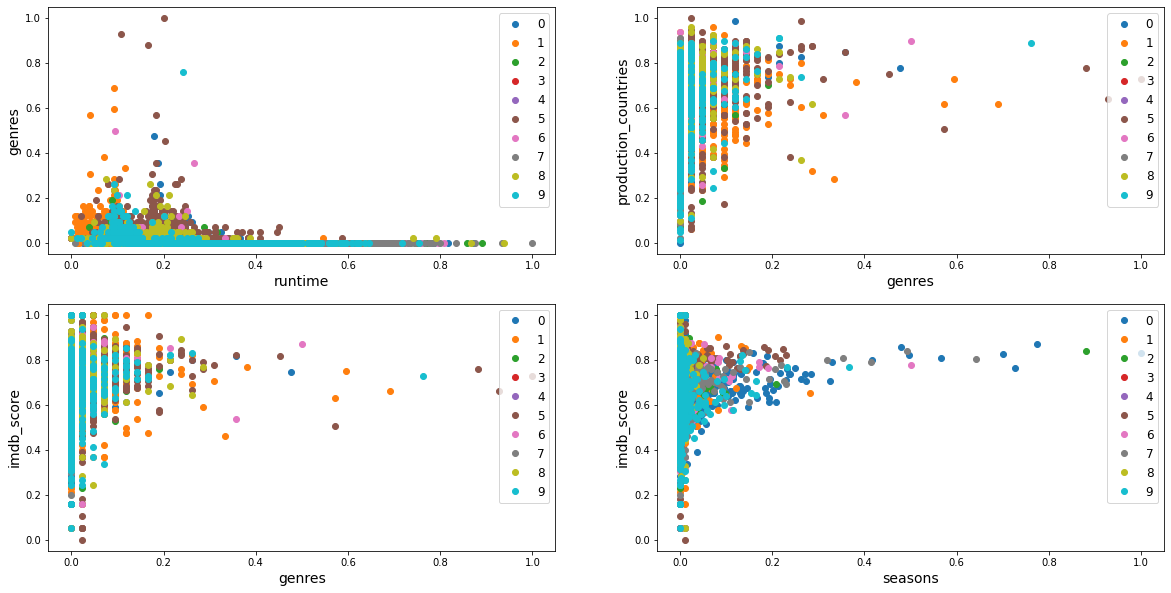

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
for i in range(0, k):
  plt.plot(X[y_pred==i, 2], X[y_pred==i, 3], "o",label=i) #con y==0 prendo solo la classe 0
plt.xlabel("runtime", fontsize=14)
plt.ylabel("genres", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(222)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 4],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("production_countries", fontsize=14)
plt.legend(fontsize=12)

#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [ ]:
y_pred

array([8, 7, 0, ..., 9, 9, 1], dtype=int32)

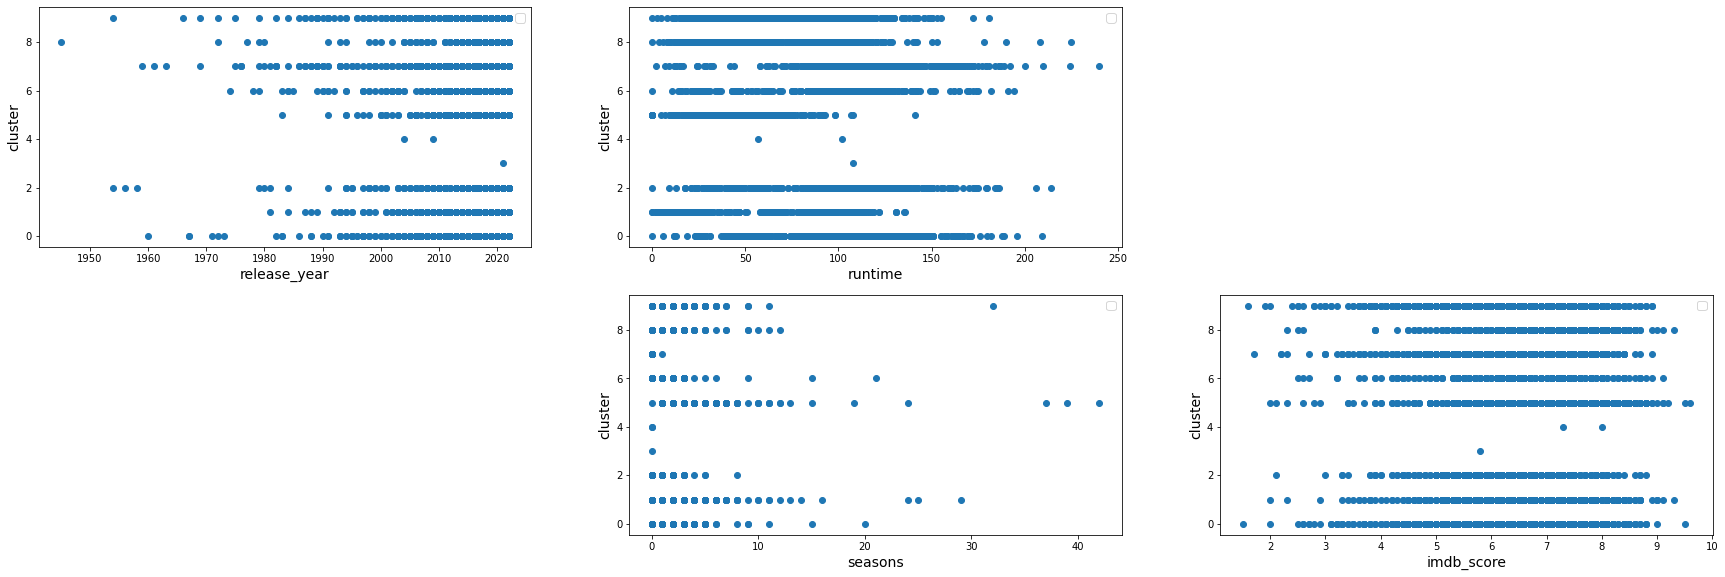

In [ ]:
plt.figure(figsize=(30, 15))

plt.subplot(331)

"""
for i in range(0, k):
  plt.plot(data_titles[y_pred==i,3], y_pred==i,"o", label=i) #con y==0 prendo solo la classe 0
"""

plt.plot(data_titles_pred["release_year"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("release_year", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(332)
plt.plot(data_titles_pred["runtime"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("runtime", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(335)
plt.plot(data_titles_pred["seasons"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("seasons", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(336)
plt.plot(data_titles_pred["imdb_score"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""
plt.subplot(337)
plt.plot(data_titles["imdb_votes"],y_pred,  "o") #con y==0 prendo solo la classe 0
plt.ylabel("cluster", fontsize=14)
plt.xlabel("imdb_votes", fontsize=14)
plt.legend(fontsize=12)


#plotto in base a sepal lenght/width
plt.subplot(223)
for i in range(0, k):
  plt.plot(X[y_pred==i, 3], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("genres", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(224)
for i in range(0, k):
  plt.plot(X[y_pred==i, 5], X[y_pred==i, 6],"o", label=i) #con y==0 prendo solo la classe 0
plt.xlabel("seasons", fontsize=14)
plt.ylabel("imdb_score", fontsize=14)
plt.legend(fontsize=12)

"""

plt.show()

In [ ]:
y_pred[:30]

array([8, 7, 0, 9, 0, 9, 6, 0, 0, 7, 7, 9, 9, 9, 2, 8, 8, 2, 7, 2, 7, 7,
       2, 2, 8, 0, 9, 7, 7, 0], dtype=int32)

In [ ]:
len(X_new[y_pred ==1])

631

## Applico il Kmeans alla persona

In [ ]:
X_new_persona = np.array(X_new_persona)

y_pred_persona_scalata = kmeans.predict(X_new_persona)
#y_pred_persona_scalata = kmeans.predict(persona)

cluster_previsione = np.unique(y_pred_persona_scalata)
cluster_previsione

conta = np.zeros(k)
for i in range(0,len(y_pred_persona_scalata)):
  conta[y_pred_persona_scalata[i]] = conta[y_pred_persona_scalata[i]] + 1

cluster = {}
for i in range(0,len(conta)):
  #print("Cluster",i,":",conta[i])
  cluster[i] = conta[i]

# ordino cluster
cluster = dict(sorted(cluster.items(), key=lambda item: item[1], reverse=True))
cluster = {x:y for x,y in cluster.items() if y!=0}
cluster

y_pred_persona_scalata

array([6, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 5,
       1, 0, 1, 1, 1, 0, 5, 1, 1, 1, 1, 1, 7, 7, 6, 5, 7, 1, 1, 1],
      dtype=int32)

In [ ]:

data_users_pred['y_pred_persona_scalata'] = y_pred_persona_scalata

In [ ]:
cluster

{1: 29.0, 5: 4.0, 6: 4.0, 7: 3.0, 0: 2.0}

In [ ]:
data_users_pred[data_users_pred.y_pred_persona_scalata == 2]

Empty DataFrame
Columns: [user_id, film_id, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score, y_pred_persona_scalata]
Index: []

## Previsione film cluster con calcolo affinità basato sulla distanza punti

In [ ]:
len(kmeans.cluster_centers_)

10

In [ ]:
y_pred_persona_scalata

array([7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype=int32)

In [ ]:
X_new = np.array(X_new)

In [ ]:
len(X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]])

In [ ]:
data_titles_pred[data_titles_pred.title == "The Witcher"]

title  type                                        description  \
1605  The Witcher   1.0  The Witcher Geralt of Rivia, a mutated monster...   

      release_year  runtime  \
1605          2019       58   

                                                 genres production_countries  \
1605  ['scifi', 'action', 'horror', 'drama', 'fantasy']               ['US']   

      seasons  imdb_score  imdb_votes  tmdb_score  y_pred  
1605      2.0         8.2    472202.0       8.244       1

In [ ]:
data_titles_pred[data_titles_pred.title == "Naruto: Ninja Clash in the Land of Snow"]

Empty DataFrame
Columns: [title, type, description, release_year, runtime, genres, production_countries, seasons, imdb_score, imdb_votes, tmdb_score, y_pred]
Index: []

In [ ]:
data_titles_pred[data_titles_pred.title == "The Umbrella Academy"]

title  type  \
1599  The Umbrella Academy   1.0   

                                            description  release_year  \
1599  The Umbrella Academy A family of former child ...          2019   

      runtime                                             genres  \
1599       50  ['comedy', 'drama', 'fantasy', 'scifi', 'action']   

     production_countries  seasons  imdb_score  imdb_votes  tmdb_score  y_pred  
1599               ['US']      3.0         8.0    230211.0         8.7       1

In [ ]:
np.linalg.norm(X_new[505] - X_new[476])

3.1631303197152616

In [ ]:
"""
max_dist_cluster = -1
min_dist_cluster = 10000
min_index = 0
distanze_cluster = 0

for index in range(0, len(X_new[y_pred == keys[indice_cluster_key]])):
  dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - X_new[y_pred == keys[indice_cluster_key]][index])
  distanze_cluster = distanze_cluster + dist
  if(dist > max_dist_cluster):
    max_dist_cluster = dist
  if(dist < min_dist_cluster):
    min_dist_cluster = dist

media_cluster = distanze_cluster/len(X_new[y_pred == keys[indice_cluster_key]])

print(min_dist_cluster, max_dist_cluster, media_cluster)
"""

In [ ]:
print(min_dist, max_dist, media)

1.2179037314993033 1.4935098156147237 1.3353156021892185


In [ ]:
import random
from scipy.spatial import distance

X_new = np.array(X_new)

keys = list(cluster.keys())

if(len(keys)>1):
  #n = len(keys)
  n=2
else:
  n=1

film_top_affinity = pd.DataFrame()

for indice_cluster_key in range(0,n):
  lunghezza = len(X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]])

  max_dist = -1
  min_dist = 10000
  min_index = 0
  distanze = 0
  for index in range(0, lunghezza):
    dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index])
    distanze = distanze + dist
    if(dist > max_dist):
      max_dist = dist
    if(dist < min_dist):
      min_dist = dist
    
  media = distanze/lunghezza
  print(media)
  #print(min_dist)

  min_dist_affine = 0
  max_dist_affine = media

  for index in range(0, lunghezza):
    print("index:",index)
    film_utente = X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index]

    distanze_film_affini = []
    film_affini = []

    for point in X_new[y_pred == keys[indice_cluster_key]]:
      if(np.linalg.norm(point - film_utente) <= max_dist):
        film_affini.append(point)
        #y = (np.linalg.norm(point - film_utente) - 0) / (max_dist_cluster - 0)
        y = np.linalg.norm(point - film_utente)
        #distanze_film_affini.append(float("{:.2f}".format(y % 1)))
        distanze_film_affini.append(y)
        #print(y, np.linalg.norm(point - film_utente))
        #print(point, np.linalg.norm(point - film_utente))


    indici = []
    for i in range(0, len(X_new)):
      #print(i)
      for j in range(0, len(film_affini)):
        if((X_new[i] == film_affini[j]).all()):
          indici.append(i)
          break
      
    
    film = pd.DataFrame()
    film.loc[:, "affinity"] = []

    for i in indici:
      film = film.append(final_data_titles.loc[[i]])

    
    film = film.reset_index()
    film = film.drop('index', axis=1)

    for i in range(0, len(distanze_film_affini)):
      #print(film.at[i,"title"], distanze_film_affini[i])
      film.at[i,"affinity"] = distanze_film_affini[i]

    #film = film.sort_values(by=['affinity'], ascending=False)

    #film = film.reset_index()
    #film = film.drop('index', axis=1)


    film_top_affinity = film_top_affinity.append(film)




#film_top_unici = film_top_affinity["id"].unique()


film_top = pd.DataFrame()


film_top_unici = film_top_affinity["id"].unique()
for id in film_top_unici:
  film_uguali = film_top_affinity[film_top_affinity.id == id]
  min = 10000
  for i in range(0, len(film_uguali)):
    #print(film_uguali.iloc[i]["title"], film_uguali.iloc[i]["affinity"])
    if(film_uguali.iloc[i]["affinity"] < min):
      min = film_uguali.iloc[i]["affinity"]
  #print(max)
  film_top = film_top.append(film_uguali[film_uguali.affinity == min].iloc[0])


#film_top = film_top_affinity

#Togliamo quelli già visti
for i in range(0, len(lista_film_persona)):
  film_top = film_top[film_top.id != lista_film_persona[i]]


#scalo
if(len(film_top["affinity"])>0):
  affinity = film_top["affinity"]
  scaler = MinMaxScaler(feature_range =  tuple([-99.9, -60.0]))
  affinity = np.array(affinity).reshape(-1,1)
  affinity = scaler.fit_transform(affinity)
  film_top["affinity"] = -affinity



film_top = film_top.sort_values(by=['affinity'], ascending=False)

film_top = film_top.reset_index()
film_top = film_top.drop('index', axis=1)

film_top

  
  



7.551597722786459
index: 0


KeyboardInterrupt: ignored

In [ ]:
film_top.head(50)

affinity         id                                              title  \
0   99.900000    tm80339            Naruto: Ninja Clash in the Land of Snow   
1   92.673513    ts76865                                   Devilman Crybaby   
2   88.384896    ts27586                                               Magi   
3   81.921768   ts328671               BASTARD‼ -Heavy Metal, Dark Fantasy-   
4   81.584380   tm282915                      Fate/Grand Order: First Order   
5   80.345205   ts312044                               Beyblade Burst Surge   
6   79.298143    tm49405  Inuyasha the Movie: Affections Touching Across...   
7   78.584495     ts9246                                      Blue Exorcist   
8   78.412588    ts79856                             SWORDGAI The Animation   
9   78.261561    tm54780                       Tiger & Bunny: The Beginning   
10  78.171280    tm89764    Inuyasha the Movie 4: Fire on the Mystic Island   
11  76.989872  tm1198504       Ghost in the Shell: SAC_2045 Sustainable War   
12  76.223083    ts84633                             The Promised Neverland   
13  75.500349   tm152273                          Tiger & Bunny: The Rising   
14  74.778256    ts87471                                      Darwin's Game   
15  74.476462   ts268283                                       RIDE ON TIME   
16  73.637784    ts37539                                      One-Punch Man   
17  73.384680   tm451078  Pokemon the Movie: Mewtwo Strikes Back - Evolu...   
18  73.212415    ts38758                                               Ajin   
19  73.123044    ts12787               Code Geass: Lelouch of the Rebellion   
20  72.936102    ts82228                                     Cells at Work!   
21  72.671132    ts21740                                       Black Butler   
22  72.561244    ts86164                                          Hero Mask   
23  72.265586    ts42169                                             ERASED   
24  71.395803    ts82375                               Beyblade Burst Turbo   
25  70.378627    ts53367                              Little Witch Academia   
26  69.682323    ts57811                                     Fate/Apocrypha   
27  69.348004    ts76603                                             Erased   
28  69.124341   ts218888                                                BNA   
29  69.111736   tm138902  Inuyasha the Movie 3: Swords of an Honorable R...   
30  68.610550   ts222522                                           Spriggan   
31  68.238134   ts218890                                   Drifting Dragons   
32  68.083256    ts55232                        Cyborg 009: Call of Justice   
33  68.004642    ts26776                                     Smile PreCure!   
34  67.856869    ts20983                            Neon Genesis Evangelion   
35  67.439581   tm466832                           Dragon Quest: Your Story   
36  67.114525   ts221749                                         Dorohedoro   
37  66.555316    ts88783                             Bakugan: Battle Planet   
38  66.274199    ts79409                             A.I.C.O. -Incarnation-   
39  66.242053    ts79157                                   B: The Beginning   
40  66.150085    ts32186                                            Sonic X   
41  65.706419    ts84639                                          revisions   
42  65.611321   ts241486                       Pokémon Journeys: The Series   
43  65.576033    ts84772                             Ingress: The Animation   
44  65.551574   tm241990                                             Blame!   
45  65.179683    ts82361                                           Ultraman   
46  65.041214    ts22286                                  Cardcaptor Sakura   
47  64.826188   tm467848                                           NiNoKuni   
48  64.311370    ts41906                    The Disastrous Life of Saiki K.   
49  64.237497   ts106015                               

In [ ]:
film_top_bag_1_persona_1.head(50)

affinity        id                                 title   type  \
0   99.900000  ts215012      Kipo and the Age of Wonderbeasts   SHOW   
1   99.273715  ts104449                         The Liberator   SHOW   
2   99.213419  ts192196                               Q-Force   SHOW   
3   98.625272  ts105601            Archibald's Next Big Thing   SHOW   
4   98.604877  ts121176      DreamWorks Shrek's Swamp Stories   SHOW   
5   98.004440   ts55232           Cyborg 009: Call of Justice   SHOW   
6   98.002824   ts39014                            Kuromukuro   SHOW   
7   97.991462   ts76645                  The Umbrella Academy   SHOW   
8   97.943994   ts32186                               Sonic X   SHOW   
9   97.387644  ts225669                        Dragon's Dogma   SHOW   
10  97.386590   ts84772                Ingress: The Animation   SHOW   
11  97.379055  ts282155                                  Zero   SHOW   
12  97.374902   ts52821                        Watership Down   SHOW   
13  97.305980   ts82281                            Zoids Wild   SHOW   
14  97.303395  ts317709                      Kayko and Kokosh   SHOW   
15  97.274198  tm245155                            The Worthy  MOVIE   
16  96.767002   ts87473                                7SEEDS   SHOW   
17  96.761611  tm137379                                Silent  MOVIE   
18  96.757472   ts77770                Fate/Extra Last Encore   SHOW   
19  96.695009  ts331439        My Little Pony: Make Your Mark   SHOW   
20  96.633723  tm466832              Dragon Quest: Your Story  MOVIE   
21  96.159666   ts80720                         Scissor Seven   SHOW   
22  96.157713   ts86164                             Hero Mask   SHOW   
23  96.151446   ts83239                                 Booba   SHOW   
24  96.138049   ts72247                        Disenchantment   SHOW   
25  96.134474  ts214579                       Dino Girl Gauko   SHOW   
26  96.132046   ts81858                                 Larva   SHOW   
27  96.123881  tm976797  Fukrey Boyzzz: Space Mein Fukrapanti  MOVIE   
28  96.117420   ts53249        Trollhunters: Tales of Arcadia   SHOW   
29  96.096984  ts328671  BASTARD‼ -Heavy Metal, Dark Fantasy-   SHOW   
30  96.092627   ts80042             ReBoot: The Guardian Code   SHOW   
31  96.077789   ts79856                SWORDGAI The Animation   SHOW   
32  96.063398   ts75829     Lego Bionicle: The Journey to One   SHOW   
33  95.991654  ts290643                          Super Crooks   SHOW   
34  95.563673   ts38159                                 Wakfu   SHOW   
35  95.563625   ts84639                             revisions   SHOW   
36  95.560085  ts222522                              Spriggan   SHOW   
37  95.559460  ts223548                   The Midnight Gospel   SHOW   
38  95.552985  ts269881                    Record of Ragnarok   SHOW   
39  95.544330  ts237713                           Sweet Tooth   SHOW   
40  95.540917   ts80057                             Last Hope   SHOW   
41  95.520020  ts309731                               Gormiti   SHOW   
42  95.422615   ts58137    Pac-Man and the Ghostly Adventures   SHOW   
43  95.374476  tm882875                           Sol Levante  MOVIE   
44  94.974764   ts82361                              Ultraman   SHOW   
45  94.970588   ts81331    She-Ra and the Princesses of Power   SHOW   
46  94.966977   ts88361                  Love, Death & Robots   SHOW   
47  94.963528  ts218888                                   BNA   SHOW   
48  94.963446   ts89361                  The Idhun Chronicles   SHOW   
49  94.958148  ts311985                            Inside Job   SHOW   

                                          description  release_year  \
0   A girl explores the possibilities in a post-ap...        2020.0   
1   The true story of one of the bloodiest battles...        2020.0   
2   A handsome secret agent and his team of LGBTQ ...        2021.0   
3   The adventures of a care-free Chicken named 

In [ ]:
film_top_bag_1_persona_2

affinity         id                                         title  \
0    99.900000   tm902993                                    Mama Drama   
1    96.410193  tm1237253  My Little Pony: A New Generation: Sing-Along   
2    96.252139   tm855232          Luccas Neto in: The End of Christmas   
3    96.115129  tm1172010                             The Lockdown Plan   
4    95.587731   tm681614                            Grandmother's Farm   
..         ...        ...                                           ...   
251  60.172859   ts237556                    The Unremarkable Juanquini   
252  60.124223    ts87320                              Can You Hear Me?   
253  60.119616    ts21664                                    One on One   
254  60.077074   ts313902                           Your Life is a Joke   
255  60.000000   ts330289                                Smother-In-Law   

      type                                        description  release_year  \
0    MOVIE                                                NaN        2020.0   
1    MOVIE                                                NaN        2022.0   
2    MOVIE                                                NaN        2019.0   
3    MOVIE                                                NaN        2020.0   
4    MOVIE                                                NaN        2013.0   
..     ...                                                ...           ...   
251   SHOW  An inept magician pulls off the trick of his l...        2020.0   
252   SHOW  Three friends in a low-income neighborhood fin...        2019.0   
253   SHOW  A sportscaster becomes a full-time dad when hi...        2001.0   
254   SHOW  Comedian Oliver Polak gets to know celebrities...        2021.0   
255   SHOW  Living with her family since the pandemic stru...        2022.0   

    age_certification  runtime                       genres  \
0                 NaN     85.0                    ['drama']   
1                 NaN     90.0                          NaN   
2                 NaN     71.0                          NaN   
3                 NaN     49.0                          NaN   
4                 NaN     71.0         ['comedy', 'horror']   
..                ...      ...                          ...   
251             TV-MA     29.0                   ['comedy']   
252             TV-MA     23.0          ['comedy', 'drama']   
253             TV-14     20.0                   ['comedy']   
254             TV-MA     37.0  ['comedy', 'documentation']   
255             TV-MA     25.0                   ['comedy']   

    production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0                 ['US']      0.0  tt12424356        6.30         8.0   
1                    NaN      0.0         NaN        6.51     23439.0   
2                    NaN      0.0         NaN        6.51     23439.0   
3                    NaN      0.0  tt13079112        6.50     23439.0   
4                    NaN      0.0  tt10033686        2.90        78.0   
..                   ...      ...         ...         ...         ...   
251               ['CO']      2.0  tt12189308        4.30       191.0   
252               ['CA']      3.0   tt9747016        7.60       697.0   
253               ['US']      5.0   tt0284770        7.00      2323.0   
254               ['DE']      1.0  tt15663868        5.40        87.0   
255               ['BR']      1.0  tt15353358        4.20       130.0   

     tmdb_popularity  tmdb_score  
0             22.000         6.8  
1             22.000         6.8  
2              1.603         7.8  
3             22.000         6.8  
4             22.000         6.8  
..               ...         ...  
251            7.945         7.0  
252            6.936         9.0  
253            6.204         7.9  
254            0.760         3.0  
255            2.507         9.4  

[256 rows x 16 columns]

In [ ]:
film_top_ifidf_persona_1

affinity        id                                    title   type  \
0   99.900000   tm80339  Naruto: Ninja Clash in the Land of Snow  MOVIE   
1   92.673513   ts76865                         Devilman Crybaby   SHOW   
2   88.384896   ts27586                                     Magi   SHOW   
3   81.921768  ts328671     BASTARD‼ -Heavy Metal, Dark Fantasy-   SHOW   
4   81.584380  tm282915            Fate/Grand Order: First Order  MOVIE   
..        ...       ...                                      ...    ...   
67  60.255284  tm413557                               Okko's Inn  MOVIE   
68  60.245832   ts82281                               Zoids Wild   SHOW   
69  60.086211   ts21034                                 InuYasha   SHOW   
70  60.081713  ts241854                               EDENS ZERO   SHOW   
71  60.000000  ts269881                       Record of Ragnarok   SHOW   

                                          description  release_year  \
0   Naruto is thrilled when he is sent on a missio...        2004.0   
1   Akira Fudo learns from his best friend Ryo Asu...        2018.0   
2   This story is about the flow of fate and the b...        2012.0   
3   When evil forces threaten to resurrect Anthras...        2022.0   
4   The year 2015 CE.  The last era in which magec...        2016.0   
..                                                ...           ...   
67  12-year-old Oriko Seki, who lost her parents i...        2018.0   
68  A quest for freedom and legendary treasure beg...        2018.0   
69  Kagome Higurashi is a modern day young girl wh...        2000.0   
70  Aboard the Edens Zero, a lonely boy with the a...        2021.0   
71  Before eradicating humankind from the world, t...        2021.0   

   age_certification  runtime  \
0              PG-13     90.0   
1              TV-MA     25.0   
2              TV-14     24.0   
3              TV-MA     25.0   
4                NaN     72.0   
..               ...      ...   
67                PG     94.0   
68             TV-Y7     21.0   
69             TV-14     25.0   
70             TV-14     24.0   
71             TV-MA     24.0   

                                               genres production_countries  \
0        ['comedy', 'fantasy', 'animation', 'action']               ['JP']   
1   ['animation', 'action', 'scifi', 'drama', 'fan...               ['JP']   
2   ['scifi', 'action', 'animation', 'comedy', 'fa...               ['JP']   
3   ['animation', 'action', 'scifi', 'comedy', 'fa...               ['JP']   
4                  ['action', 'fantasy', 'animation']               ['JP']   
..                                                ...                  ...   
67        ['fantasy', 'animation', 'drama', 'family']               ['JP']   
68         ['action', 'comedy', 'animation', 'scifi']               ['JP']   
69  ['scifi', 'action', 'fantasy', 'romance', 'ani...               ['JP']   
70         ['scifi', 'animation', 'comedy', 'action']               ['JP']   
71  ['animation', 'action', 'scifi', 'drama', 'fan...               ['JP']   

    seasons     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0       0.0   tt0476680        6.60      6866.0           50.604         7.2  
1       1.0   tt6660498        7.60     19465.0           37.228         7.9  
2       3.0   tt2425098        7.80      4006.0           28.161         8.6  
3       1.0  tt17736234        6.70       854.0           23.009         6.8  
4       0.0   tt6213810        5.70       896.0           12.341         6.8  
..      ...         ...         ...         ...              ...         ...  
67      0.0   tt8328740        7.00      1856.0            7.213         7.1  
68      1.0  tt12317724        6.20        27.0           11.922         6.8  
69      9.0   tt0290223        7.90     15823.0           62.355         8.6  
70      1.0         NaN        6.51     23439.0           24.758         7.8  
71      2.0  tt13676344        6.20      4923.0 

In [ ]:
film_top[film_top.title == "Naruto: Ninja Clash in the Land of Snow"]

Empty DataFrame
Columns: [affinity, id, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score]
Index: []

In [ ]:
film_top[film_top.title == "The Umbrella Academy"]

Empty DataFrame
Columns: [affinity, id, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score]
Index: []

## Test accuratezza

In [ ]:
persona1[persona1.index == 0]["film_id"][0]

'ts20339'

In [ ]:
len(np.delete(X_new_persona, (0), axis=0))

41

In [ ]:
len(X_new_persona)

42

In [ ]:
lista_film_persona

In [ ]:
persona1[persona1.index == 1]["film_id"][1]

'tm134235'

In [ ]:
array_persona = X_new_persona
array_y_persona_scalata = y_pred_persona_scalata
array_film_persona = lista_film_persona

In [ ]:
import random
from scipy.spatial import distance

X_new = np.array(X_new)

keys = list(cluster.keys())

if(len(keys)>1):
  n = len(keys)
  #n=2
else:
  n=1

array_persona = X_new_persona
array_y_persona_scalata = y_pred_persona_scalata
array_film_persona = lista_film_persona

test_verificato = 0
for j in range(0, len(array_persona)):
  X_new_persona = np.delete(X_new_persona, (j), axis=0)

  y_pred_persona_scalata = np.delete(y_pred_persona_scalata, (j), axis=0)
  id_film_test = persona1[persona1.index == j]["film_id"][j]

  lista_film_persona = np.delete(lista_film_persona, (j), axis=0)

  film_top_affinity = pd.DataFrame()

  for indice_cluster_key in range(0,n):
    lunghezza = len(X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]])

    max_dist = -1
    min_dist = 10000
    min_index = 0
    distanze = 0
    for index in range(0, lunghezza):
      dist = np.linalg.norm(kmeans.cluster_centers_[keys[indice_cluster_key]] - X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index])
      distanze = distanze + dist
      if(dist > max_dist):
        max_dist = dist
      if(dist < min_dist):
        min_dist = dist
      
    media = distanze/lunghezza
    print(media)
    #print(min_dist)

    min_dist_affine = 0
    max_dist_affine = media

    for index in range(0, lunghezza):
      print("index:",index)
      film_utente = X_new_persona[y_pred_persona_scalata == keys[indice_cluster_key]][index]

      distanze_film_affini = []
      film_affini = []

      for point in X_new[y_pred == keys[indice_cluster_key]]:
        if(np.linalg.norm(point - film_utente) <= max_dist):
          film_affini.append(point)
          #y = (np.linalg.norm(point - film_utente) - 0) / (max_dist_cluster - 0)
          y = np.linalg.norm(point - film_utente)
          #distanze_film_affini.append(float("{:.2f}".format(y % 1)))
          distanze_film_affini.append(y)
          #print(y, np.linalg.norm(point - film_utente))
          #print(point, np.linalg.norm(point - film_utente))


      indici = []
      for i in range(0, len(X_new)):
        #print(i)
        for j in range(0, len(film_affini)):
          if((X_new[i] == film_affini[j]).all()):
            indici.append(i)
            break
        
      
      film = pd.DataFrame()
      film.loc[:, "affinity"] = []

      for i in indici:
        film = film.append(final_data_titles.loc[[i]])

      
      film = film.reset_index()
      film = film.drop('index', axis=1)

      for i in range(0, len(distanze_film_affini)):
        #print(film.at[i,"title"], distanze_film_affini[i])
        film.at[i,"affinity"] = distanze_film_affini[i]

      #film = film.sort_values(by=['affinity'], ascending=False)

      #film = film.reset_index()
      #film = film.drop('index', axis=1)


      film_top_affinity = film_top_affinity.append(film)




  #film_top_unici = film_top_affinity["id"].unique()


  film_top = pd.DataFrame()


  film_top_unici = film_top_affinity["id"].unique()
  for id in film_top_unici:
    film_uguali = film_top_affinity[film_top_affinity.id == id]
    min = 10000
    for i in range(0, len(film_uguali)):
      #print(film_uguali.iloc[i]["title"], film_uguali.iloc[i]["affinity"])
      if(film_uguali.iloc[i]["affinity"] < min):
        min = film_uguali.iloc[i]["affinity"]
    #print(max)
    film_top = film_top.append(film_uguali[film_uguali.affinity == min].iloc[0])


  #film_top = film_top_affinity

  #Togliamo quelli già visti
  
  for i in range(0, len(lista_film_persona)):
    film_top = film_top[film_top.id != lista_film_persona[i]]
  


  #scalo
  if(len(film_top["affinity"])>0):
    affinity = film_top["affinity"]
    scaler = MinMaxScaler(feature_range =  tuple([-99.9, -60.0]))
    affinity = np.array(affinity).reshape(-1,1)
    affinity = scaler.fit_transform(affinity)
    film_top["affinity"] = -affinity



  film_top = film_top.sort_values(by=['affinity'], ascending=False)

  film_top = film_top.reset_index()
  film_top = film_top.drop('index', axis=1)

  film_top

  id_film_top = film_top["id"]
  if(contiene(id_film_top, id_film_test)):
    print(id_film_test, "true")
    test_verificato = test_verificato+1
  else:
    print(id_film_test, "false")

  X_new_persona = array_persona

  y_pred_persona_scalata  = array_y_persona_scalata

  lista_film_persona = array_film_persona

print(test_verificato)
print(test_verificato/len(array_persona))

1.3346716100086091
index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 13
index: 14
index: 15
index: 16
index: 17
index: 18
index: 19
index: 20
index: 21
index: 22
index: 23
index: 24
index: 25
index: 26
index: 27
index: 28
index: 29
index: 30
index: 31
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
ts20339 true
1.333798557964436
index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 13
index: 14
index: 15
index: 16
index: 17
index: 18
index: 19
index: 20
index: 21
index: 22
index: 23
index: 24
index: 25
index: 26
index: 27
index: 28
index: 29
index: 30
index: 31
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
tm134235 true
1.3349426200776784
index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 

In [ ]:
id_film_test

'ts20339'

In [ ]:
id_film_top

0      tm80339
1      ts76865
2      ts27586
3     ts328671
4     tm282915
        ...   
68    tm413557
69     ts82281
70     ts21034
71    ts241854
72    ts269881
Name: id, Length: 73, dtype: object

In [ ]:
len(lista_film_persona)

42

In [ ]:
id_film_test = persona1[persona1.index == 0]["film_id"][0]

if(contiene(id_film_top, id_film_test)):
    print("true")
else:
  print("false")

false


# Selezione attore

In [ ]:
UTENTI_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/utenti.csv'
data_users = pd.read_csv(UTENTI_PATH)

TITLES_DROP_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_drop.csv'
data_titles = pd.read_csv(TITLES_DROP_PATH)

TITLES_FINALE_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv'
final_data_titles = pd.read_csv(TITLES_FINALE_PATH)

CREDITS_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/credits.csv'
data_credits = pd.read_csv(CREDITS_PATH)


Ottengo i film visti dall'utente

In [ ]:
persona = data_users

persona1 = persona[persona.user_id == "u1"]
persona2 = persona[persona.user_id == "u2"]

persona = persona1

persona = persona.reset_index()
persona = persona.drop('index', axis=1)
data_users_pred = persona

lista_film_persona = list(persona["film_id"])

Selezione attore

In [ ]:
attore = "Leonardo DiCaprio"

Ottengo i film dell'attore non visti dall'utente

In [ ]:
film_attore = data_credits[data_credits.name == attore]["id"]


predizione_film_attore = pd.DataFrame()

for i in range(0, len(film_attore)):
  if not contiene(lista_film_persona,film_attore.iloc[i]): 
    predizione_film_attore = predizione_film_attore.append(final_data_titles[final_data_titles.id == film_attore.iloc[i]])

predizione_film_attore

predizione_film_attore = predizione_film_attore.reset_index()
predizione_film_attore = predizione_film_attore.drop('index', axis=1)

predizione_film_attore

id                   title   type  \
0  tm191110                 Titanic  MOVIE   
1   tm11556  The Quick and the Dead  MOVIE   
2  tm111828     Catch Me If You Can  MOVIE   
3   tm92641               Inception  MOVIE   
4   tm27911            The Departed  MOVIE   
5   tm32919           Blood Diamond  MOVIE   
6   tm41792        Django Unchained  MOVIE   
7  tm856378           Don't Look Up  MOVIE   

                                         description  release_year  \
0  101-year-old Rose DeWitt Bukater tells the sto...          1997   
1  A mysterious woman comes to compete in a quick...          1995   
2  A true story about Frank Abagnale Jr. who, bef...          2002   
3  Cobb, a skilled thief who commits corporate es...          2010   
4  To take down South Boston's Irish Mafia, the p...          2006   
5  An ex-mercenary turned smuggler. A Mende fishe...          2006   
6  With the help of a German bounty hunter, a fre...          2012   
7  Two American astronomers attempt to warn human...          2021   

  age_certification  runtime                                        genres  \
0             PG-13      194                          ['drama', 'romance']   
1                 R      107  ['action', 'thriller', 'western', 'romance']   
2             PG-13      141                            ['drama', 'crime']   
3             PG-13      148      ['action', 'scifi', 'music', 'thriller']   
4                 R      151      ['drama', 'thriller', 'crime', 'action']   
5                 R      143               ['drama', 'thriller', 'action']   
6                 R      165                          ['western', 'drama']   
7                 R      138                  ['comedy', 'drama', 'scifi']   

  production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0               ['US']      0.0   tt0120338         7.9   1146825.0   
1         ['JP', 'US']      0.0   tt0114214         6.5     93767.0   
2               ['US']      0.0   tt0264464         8.1    952602.0   
3         ['US', 'GB']      0.0   tt1375666         8.8   2294231.0   
4               ['US']      0.0   tt0407887         8.5   1296244.0   
5         ['DE', 'US']      0.0   tt0450259         8.0    541547.0   
6               ['US']      0.0   tt1853728         8.4   1472668.0   
7               ['US']      0.0  tt11286314         7.2    515337.0   

   tmdb_popularity  tmdb_score  
0          155.683       7.878  
1           13.056       6.500  
2           72.321       8.000  
3          108.284       8.400  
4           33.795       8.200  
5           47.390       7.500  
6           66.924       8.150  
7          120.874       7.208

# Versione con utenti vettorizzati

## Gestione missing values ( non da runnare)

Da runnare solo per test

In [ ]:
TITLES_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv'
data_titles = pd.read_csv(TITLES_PATH, encoding='latin-1')

Quante colonne contengono almeno un valore nullo

In [ ]:
missing_data_titles = data_titles.columns[data_titles.isnull().any()]
print('dati mancanti = ', len(missing_data_titles))

dati mancanti =  5


In [ ]:
data_titles.isnull().sum(axis = 0)

id                         0
title                      0
type                       0
description               14
release_year               0
age_certification       2618
runtime                    0
genres                    55
production_countries     225
seasons                    0
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

elimino film senza titolo con id -> tm1063792

In [ ]:
data_titles = data_titles[data_titles["title"].notna()]

In [ ]:
data_titles.isnull().sum(axis = 0)

id                         0
title                      0
type                       0
description               14
release_year               0
age_certification       2618
runtime                    0
genres                    55
production_countries     225
seasons                    0
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

Elimino le righe in credits con id (film) -> tm1063792

Count non conta i NaN.
La media non considera i NaN, ovviamente

In [ ]:
mean_imdb_score = data_titles["imdb_score"].mean()
mean_imdb_votes = data_titles["imdb_votes"].mean()
mean_tmdb_popularity = data_titles["tmdb_popularity"].mean()
mean_tmdb_score = data_titles["tmdb_score"].mean()

data_titles["imdb_score"].fillna("{:.2f}".format(mean_imdb_score), inplace=True)
data_titles["imdb_votes"].fillna(int(mean_imdb_votes), inplace=True)
data_titles["tmdb_popularity"].fillna(int(mean_tmdb_popularity), inplace=True)
data_titles["tmdb_score"].fillna("{:.2f}".format(mean_tmdb_score), inplace=True)
data_titles["seasons"].fillna(0, inplace=True)

Gestisco i NaN. Per i film abbiamo messo season = 0

In [ ]:
data_titles.head()

In [ ]:
missing_data_titles = data_titles.columns[data_titles.isnull().any()]
print('dati mancanti = ', len(missing_data_titles))

dati mancanti =  5


In [ ]:
data_titles.isnull().sum(axis = 0)

id                         0
title                      0
type                       0
description               14
release_year               0
age_certification       2618
runtime                    0
genres                    55
production_countries     225
seasons                    0
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

Credits missing values

In [ ]:
missing_data_credits = data_credits.columns[data_credits.isnull().any()]
print('dati mancanti = ', len(missing_data_credits))

NameError: ignored

In [ ]:
data_credits.isnull().sum(axis = 0)

Duplicati

In [ ]:
dup_data_titles = data_titles.copy()
dup_data_titles.drop_duplicates(inplace=True)

print('Numero totale di istanze duplicate: ', data_titles.shape[0] - dup_data_titles.shape[0])
#data = dup_data.copy()
#data

Numero totale di istanze duplicate:  0


In [ ]:
dup_data_credits = data_credits.copy()
dup_data_credits.drop_duplicates(inplace=True)

print('Numero totale di istanze duplicate: ', data_credits.shape[0] - dup_data_credits.shape[0])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

data_type = data_titles[["type"]]
ordinal_encoder = OrdinalEncoder(categories = "auto")
data_type_ordinal = ordinal_encoder.fit_transform(data_type)
print(data_type_ordinal[:10])

data_titles["type"] = data_type_ordinal

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
#data_titles = data_titles.drop("title", axis = 1)
data_titles = data_titles.drop("id", axis = 1)
#data_titles = data_titles.drop("description", axis = 1)
data_titles = data_titles.drop("age_certification", axis = 1)
data_titles = data_titles.drop("imdb_id", axis = 1)
data_titles = data_titles.drop("tmdb_popularity", axis = 1)

In [ ]:
data_titles

In [ ]:
#data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_numeric_bag.csv', index=False)

In [ ]:
data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_drop.csv', index=False)

## Caricamento dataset

In [ ]:
"""
TITLES_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles.csv'
data_titles = pd.read_csv(TITLES_PATH)
"""
#CREDITS_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/credits.csv'

#data_credits = pd.read_csv(CREDITS_PATH)
UTENTI_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/utenti.csv'
data_users = pd.read_csv(UTENTI_PATH, encoding='latin-1')

TITLES_DROP_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_drop.csv'
data_titles = pd.read_csv(TITLES_DROP_PATH, encoding='latin-1')

TITLES_FINALE_PATH = '/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv'
final_data_titles = pd.read_csv(TITLES_FINALE_PATH, encoding='latin-1')


In [ ]:
len(final_data_titles)

5849

In [ ]:
"""
score = final_data_titles["tmdb_score"]
#print("{:.2f}".format(round(a, 2)))
for i in range(0, len(score)):
  score[i] = "{:.1f}".format(round(score[i], 1))

final_data_titles["tmdb_score"] = score

final_data_titles.to_csv('/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv', index=False)
"""

'\nscore = final_data_titles["tmdb_score"]\n#print("{:.2f}".format(round(a, 2)))\nfor i in range(0, len(score)):\n  score[i] = "{:.1f}".format(round(score[i], 1))\n\nfinal_data_titles["tmdb_score"] = score\n\nfinal_data_titles.to_csv(\'/content/drive/Shareddrives/MLDM Progetto/dataset/titles_final.csv\', index=False)\n'

In [ ]:
final_data_titles

id                                      title   type  \
0      ts300399        Five Came Back: The Reference Films   SHOW   
1       tm84618                                Taxi Driver  MOVIE   
2      tm154986                                Deliverance  MOVIE   
3      tm127384            Monty Python and the Holy Grail  MOVIE   
4      tm120801                            The Dirty Dozen  MOVIE   
...         ...                                        ...    ...   
5844  tm1014599                                  Fine Wine  MOVIE   
5845   tm898842                                C/O Kaadhal  MOVIE   
5846  tm1059008                                    Lokillo  MOVIE   
5847  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5848   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5844  A beautiful love story that can happen between...          2021   
5845  A heart warming film that explores the concept...          2021   
5846  A controversial TV host and comedian who has b...          2021   
5847  Jamie Foxx, David Alan Grier and more from the...          2021   
5848  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime                                       genres  \
0                TV-MA       51                            ['documentation']   
1                    R      114                           ['drama', 'crime']   
2                    R      109  ['drama', 'action', 'thriller', 'european']   
3                   PG       91              ['fantasy', 'action', 'comedy']   
4                  NaN      150                            ['war', 'action']   
...                ...      ...                                          ...   
5844               NaN      100                         ['romance', 'drama']   
5845               NaN      134                                    ['drama']   
5846               NaN       90                                   ['comedy']   
5847             PG-13       37                                          NaN   
5848               NaN        7            ['family', 'animation', 'comedy']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0                  ['US']        1         NaN        6.51       23439   
1                  ['US']        0   tt0075314        8.20      808582   
2                  ['US']        0   tt0068473        7.70      107673   
3                  ['GB']        0   tt0071853        8.20      534486   
4            ['GB', 'US']        0   tt0061578        7.70       72662   
...                   ...      ...         ...         ...         ...   
5844               ['NG']        0  tt13857480        6.80          45   
5845                  NaN        0  tt11803618        7.70         348   
5846               ['CO']        0  tt14585902        3.80          68   
5847               ['US']        0         NaN        6.51       23439   
5848                  NaN        1  tt13711094        7.80          18   

      tmdb_popularity  tmdb_score  
0               0.600        6.83  
1              40.965        8.18  
2              10.010        7.30  
3              15.461        7.81  
4              20.398        7.60  
...               ...         ...  
5844            1.466        6.83  
5845           22.000        6.83  
5846           26.005        6.30  
5847            1.296       10.00  
5848            2.289       10.00  

[5849 rows x 15 columns]

In [ ]:
data_titles.head()

title  type  \
0  Five Came Back: The Reference Films   1.0   
1                          Taxi Driver   0.0   
2                          Deliverance   0.0   
3      Monty Python and the Holy Grail   0.0   
4                      The Dirty Dozen   0.0   

                                         description  release_year  runtime  \
0  This collection includes 12 World War II-era p...          1945       51   
1  A mentally unstable Vietnam War veteran works ...          1976      114   
2  Intent on seeing the Cahulawassee River before...          1972      109   
3  King Arthur, accompanied by his squire, recrui...          1975       91   
4  12 American military prisoners in World War II...          1967      150   

                                        genres production_countries  seasons  \
0                            ['documentation']               ['US']        1   
1                           ['drama', 'crime']               ['US']        0   
2  ['drama', 'action', 'thriller', 'european']               ['US']        0   
3              ['fantasy', 'action', 'comedy']               ['GB']        0   
4                            ['war', 'action']         ['GB', 'US']        0   

   imdb_score  imdb_votes  tmdb_score  
0        6.51       23439        6.83  
1        8.20      808582        8.18  
2        7.70      107673        7.30  
3        8.20      534486        7.81  
4        7.70       72662        7.60

In [ ]:
data_titles.tail()

title  type  \
5844                                  Fine Wine   0.0   
5845                                C/O Kaadhal   0.0   
5846                                    Lokillo   0.0   
5847  Dad Stop Embarrassing Me - The Afterparty   0.0   
5848         Mighty Little Bheem: Kite Festival   1.0   

                                            description  release_year  \
5844  A beautiful love story that can happen between...          2021   
5845  A heart warming film that explores the concept...          2021   
5846  A controversial TV host and comedian who has b...          2021   
5847  Jamie Foxx, David Alan Grier and more from the...          2021   
5848  With winter behind them, Bheem and his townspe...          2021   

      runtime                             genres production_countries  \
5844      100               ['romance', 'drama']               ['NG']   
5845      134                          ['drama']                  NaN   
5846       90                         ['comedy']               ['CO']   
5847       37                                NaN               ['US']   
5848        7  ['family', 'animation', 'comedy']                  NaN   

      seasons  imdb_score  imdb_votes  tmdb_score  
5844        0        6.80          45        6.83  
5845        0        7.70         348        6.83  
5846        0        3.80          68        6.30  
5847        0        6.51       23439       10.00  
5848        1        7.80          18       10.00

## Data Visualization

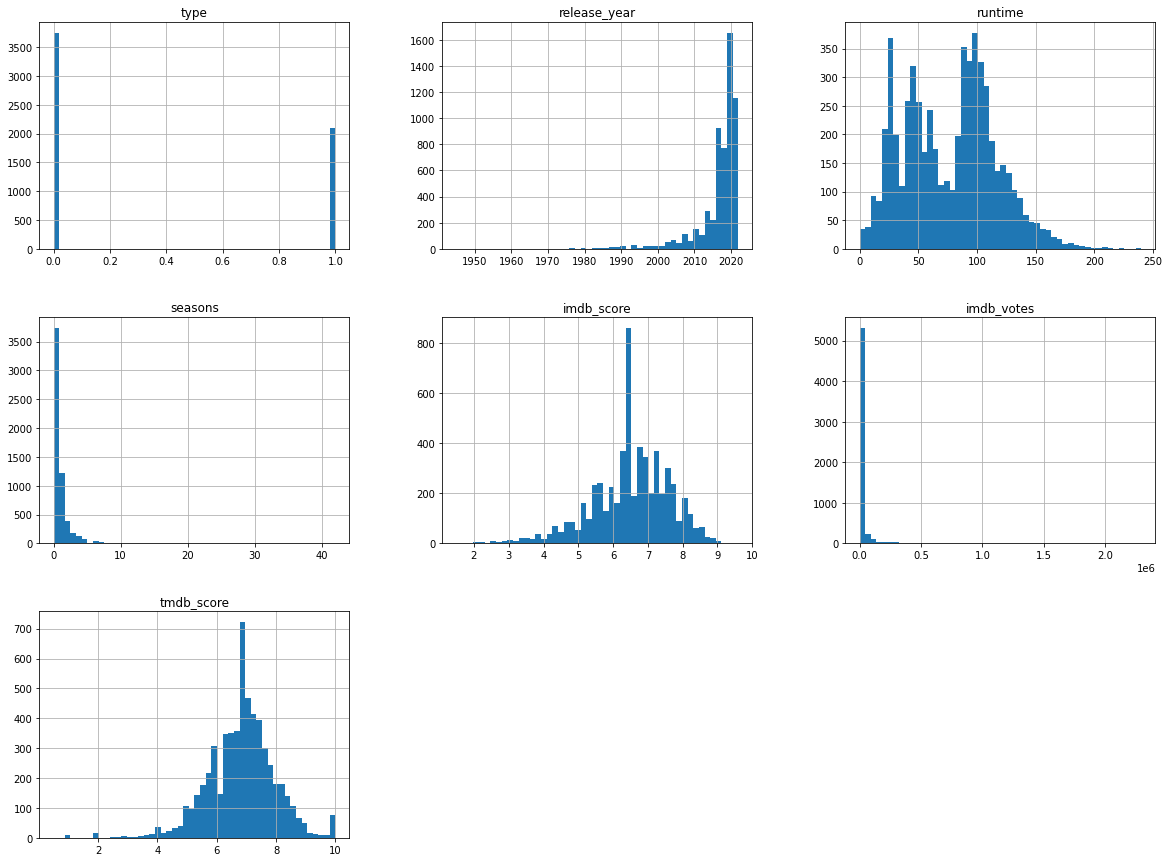

In [ ]:
#data_titles.hist()
%matplotlib inline
import matplotlib.pyplot as plt
data_titles.hist(bins=50, figsize=(20,15))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03194ae910>,
      dtype=object)

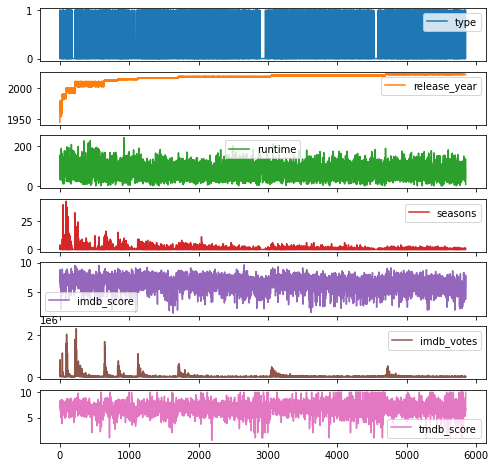

In [ ]:
data_titles.plot(subplots=True, figsize=(8, 8))

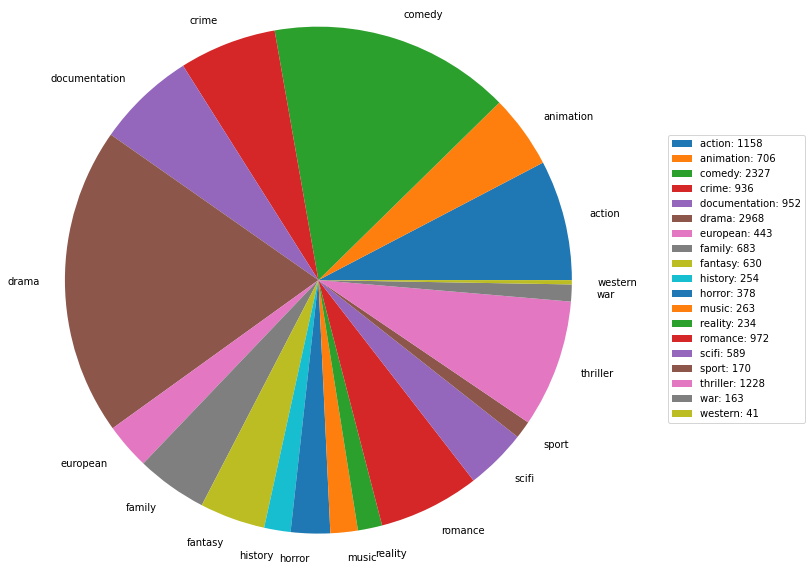

In [ ]:
a = []

for riga in data_titles["genres"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  a.append(row)

generi = []
for riga in a:
  for genere in riga:
    if(not(contiene(generi, genere))):
      generi.append(genere)

generi.remove('nan')
generi.sort()

generi

dict_generi = {}
for i in range(0, len(generi)):
  dict_generi[generi[i]] = len(data_titles[data_titles['genres'].str.contains(generi[i], na=False)])

dict_generi

# Data to plot
labels = []
values = []

for x, y in dict_generi.items():
    labels.append(x)
    values.append(y)

# Plot
plt.figure(figsize=(10, 10))
#plt.subplot(121)
plt.pie(values, labels=labels)

plt.axis('equal')
#plt.tight_layout()
#plt.subplot(122)
plt.legend([m+": "+str(n) for m,n in zip(labels,values)], loc="center", bbox_to_anchor=(1.25, 0.5))  
plt.show()

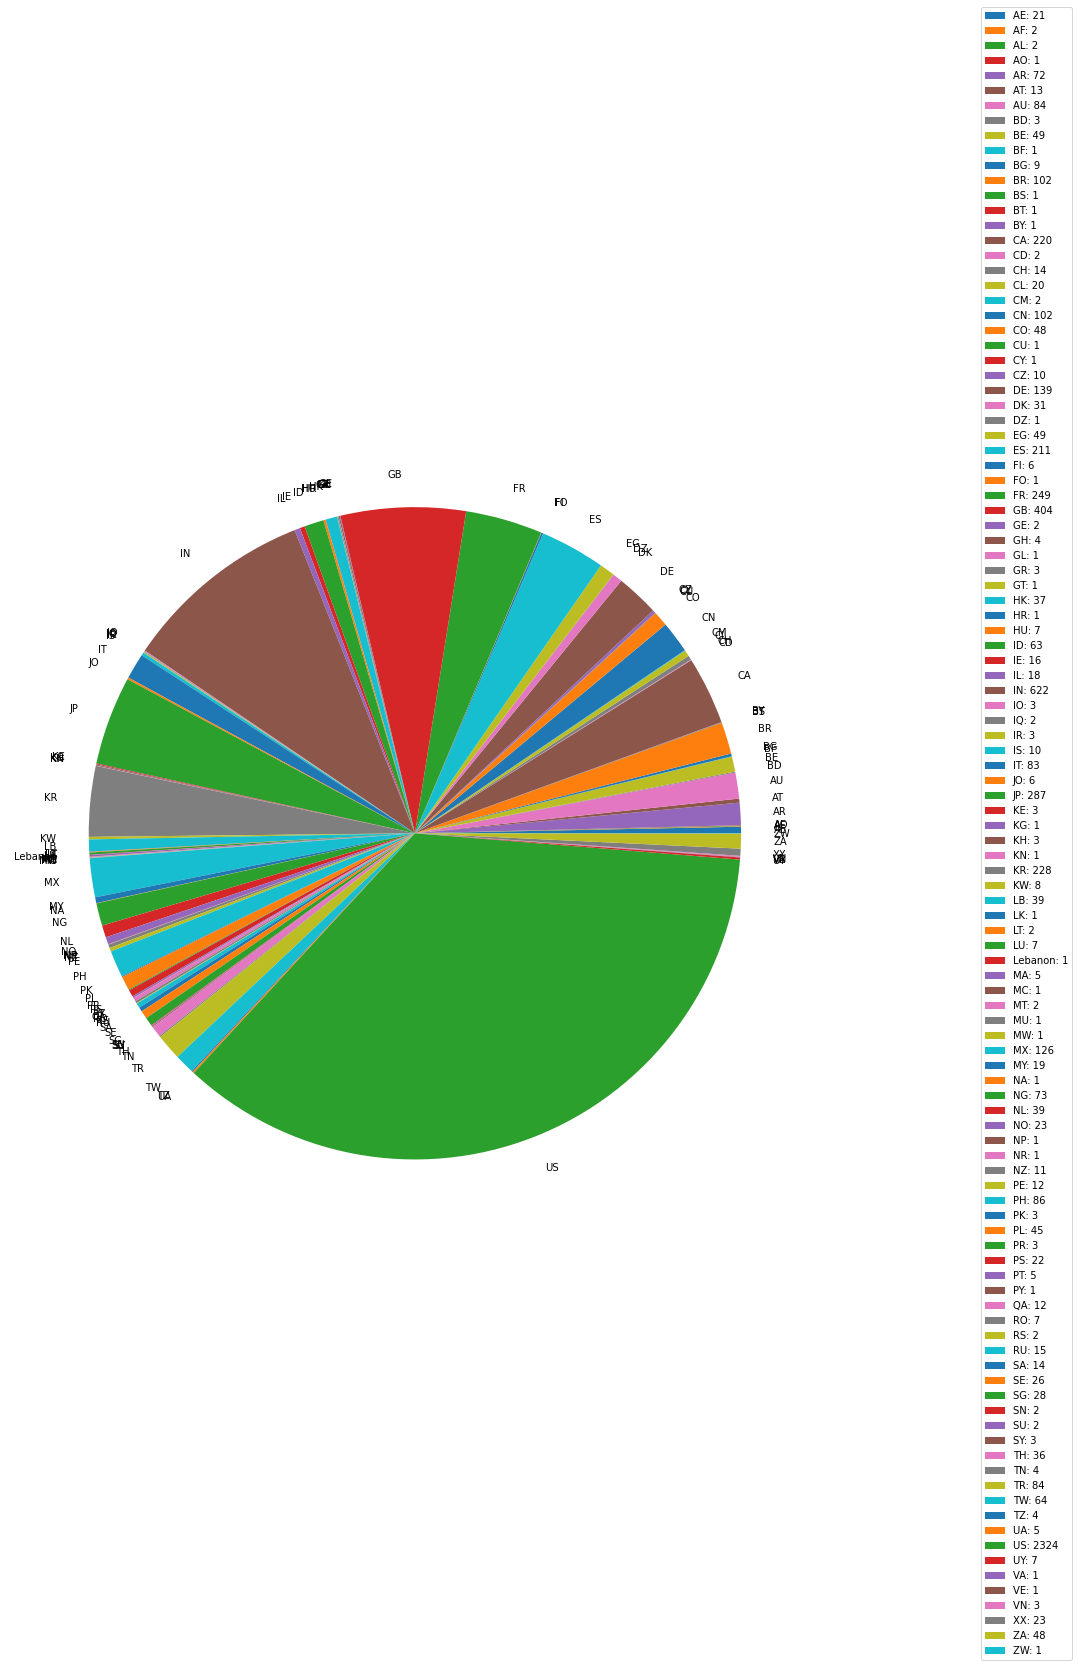

In [ ]:
a = []

for riga in data_titles["production_countries"]:
  #print(riga)
  row = []
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row.append(elemento)

  else:
    row.append(str(riga))

  a.append(row)

paesi = []
for riga in a:
  for genere in riga:
    if(not(contiene(paesi, genere))):
      paesi.append(genere)

paesi.remove('nan')
paesi.sort()

paesi

dict_paesi = {}
for i in range(0, len(paesi)):
  dict_paesi[paesi[i]] = len(data_titles[data_titles['production_countries'].str.contains(paesi[i], na=False)])

dict_paesi

# Data to plot
labels = []
values = []

for x, y in dict_paesi.items():
    labels.append(x)
    values.append(y)

# Plot
plt.figure(figsize=(15, 15))
plt.pie(values, labels=labels)
plt.legend([m+": "+str(n) for m,n in zip(labels,values)], loc="center", bbox_to_anchor=(1.25, 0.5)) 

plt.axis()
plt.show()

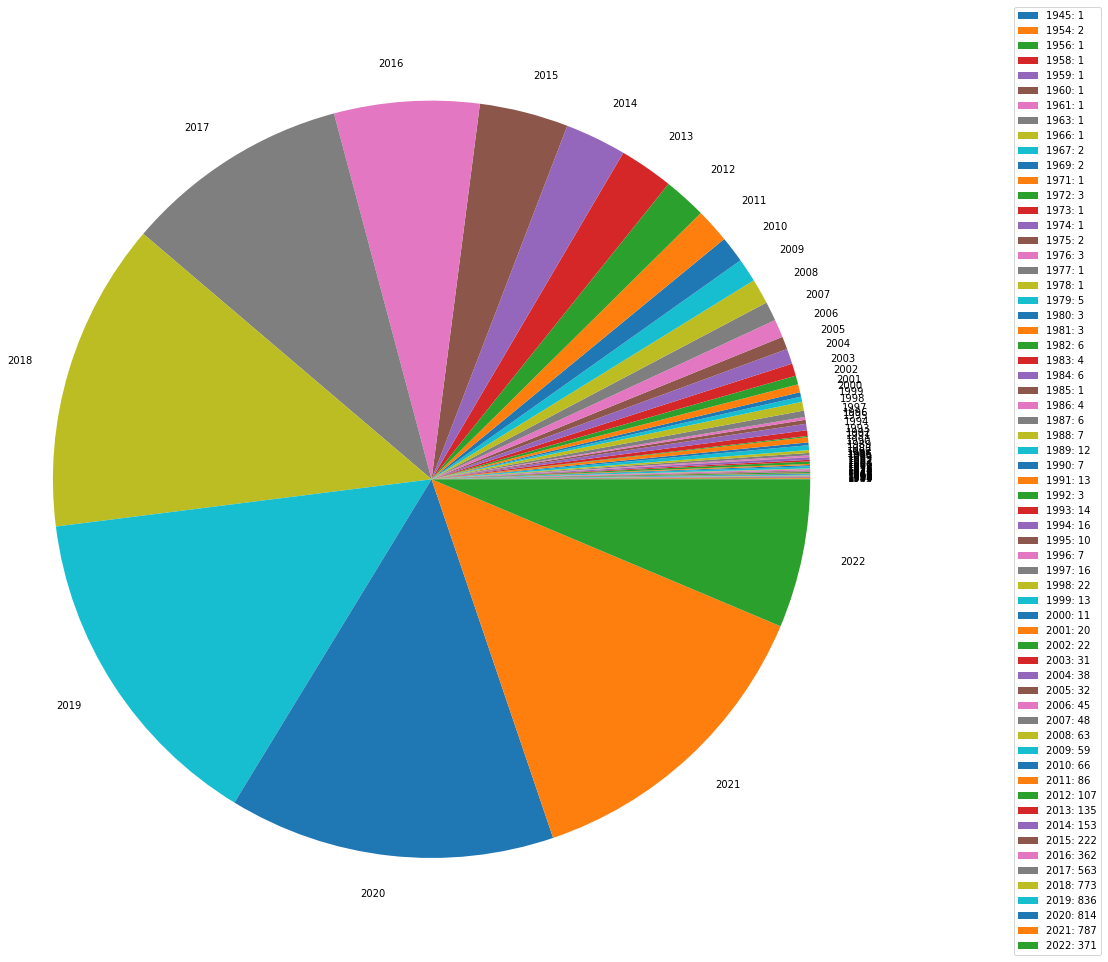

In [ ]:
a = []

for riga in data_titles["release_year"]:
  if not contiene(a, riga):
    a.append(riga)

a.sort()
anni = a

dict_anni = {}
for i in range(0, len(anni)):
  dict_anni[anni[i]] = len(data_titles[data_titles['release_year'] == anni[i]])

dict_anni

# Data to plot
labels = []
values = []

for x, y in dict_anni.items():
    labels.append(x)
    values.append(y)

# Plot
plt.figure(figsize=(15, 15))
plt.pie(values, labels=labels)
plt.legend([str(m)+": "+str(n) for m,n in zip(labels,values)], loc="center", bbox_to_anchor=(1.25, 0.5))

plt.axis('equal')
plt.show()

In [ ]:
data_titles_num = data_titles

data_titles_num = data_titles_num.drop("title", axis = 1)
data_titles_num = data_titles_num.drop("description", axis = 1)
data_titles_num = data_titles_num.drop("genres", axis = 1)
data_titles_num = data_titles_num.drop("production_countries", axis = 1)

data_titles_num

type  release_year  runtime  seasons  imdb_score  imdb_votes  tmdb_score
0      1.0          1945       51        1        6.51       23439        6.83
1      0.0          1976      114        0        8.20      808582        8.18
2      0.0          1972      109        0        7.70      107673        7.30
3      0.0          1975       91        0        8.20      534486        7.81
4      0.0          1967      150        0        7.70       72662        7.60
...    ...           ...      ...      ...         ...         ...         ...
5844   0.0          2021      100        0        6.80          45        6.83
5845   0.0          2021      134        0        7.70         348        6.83
5846   0.0          2021       90        0        3.80          68        6.30
5847   0.0          2021       37        0        6.51       23439       10.00
5848   1.0          2021        7        1        7.80          18       10.00

[5849 rows x 7 columns]

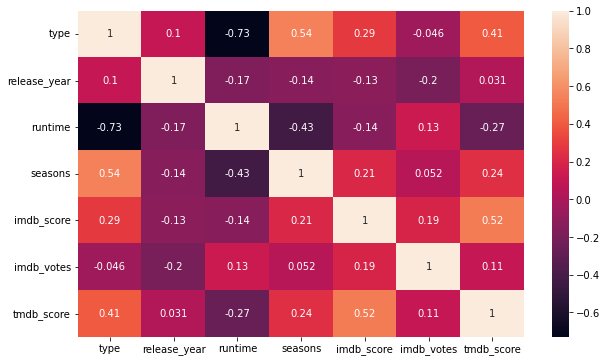

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(data_titles_num.corr(), ax=ax, annot=True)

In [ ]:
r = np.corrcoef(data_titles_num["runtime"], data_titles_num["seasons"])
r

array([[ 1.        , -0.42664021],
       [-0.42664021,  1.        ]])

In [ ]:
#data_titles_num.plot(x='runtime', y='seasons', style='o')

## TFIDF Vectorizer

Ottengo TFIDF di generi

In [ ]:
data_titles_drop = data_titles
a = []

for riga in data_titles_drop["genres"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_generi_vectorizer = TfidfVectorizer()

tfidf_generi_vectorizer.fit(docs)
tfidf_generi = tfidf_generi_vectorizer.transform(docs)


print(tfidf_generi_vectorizer.get_feature_names())

dizionario_generi_tfdf = tfidf_generi_vectorizer.vocabulary_


print(tfidf_generi_vectorizer.vocabulary_)
print(tfidf_generi.toarray())


genres = tfidf_generi

['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
{'documentation': 4, 'drama': 5, 'crime': 3, 'action': 0, 'thriller': 16, 'european': 6, 'fantasy': 8, 'comedy': 2, 'war': 17, 'romance': 13, 'western': 18, 'history': 9, 'music': 11, 'family': 7, 'horror': 10, 'scifi': 14, 'animation': 1, 'reality': 12, 'sport': 15}
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.48602516 0.         0.         ... 0.47514186 0.         0.        ]
 ...
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.64518947 0.39820802 ... 0.         0.         0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Ottengo TFIDF di countries

In [ ]:
a = []
for riga in data_titles_drop["production_countries"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
    elementi = riga.split(",")

    for elemento in elementi:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_countries_vectorizer = TfidfVectorizer()

tfidf_countries_vectorizer.fit(docs)
tfidf_countries = tfidf_countries_vectorizer.transform(docs)


print(tfidf_countries_vectorizer.get_feature_names())

dizionario_countries_tfdf = tfidf_countries_vectorizer.vocabulary_

print(tfidf_countries_vectorizer.get_feature_names())

dizionario_countries_tfidf = tfidf_countries_vectorizer.vocabulary_
print(tfidf_countries_vectorizer.vocabulary_)

print(tfidf_countries.toarray())

countries = tfidf_countries

['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh', 'kn', 'kr', 'kw', 'lb', 'lebanon', 'lk', 'lt', 'lu', 'ma', 'mc', 'mt', 'mu', 'mw', 'mx', 'my', 'na', 'ng', 'nl', 'no', 'np', 'nr', 'nz', 'pe', 'ph', 'pk', 'pl', 'pr', 'ps', 'pt', 'py', 'qa', 'ro', 'rs', 'ru', 'sa', 'se', 'sg', 'sn', 'su', 'sy', 'th', 'tn', 'tr', 'tw', 'tz', 'ua', 'us', 'uy', 'va', 've', 'vn', 'xx', 'za', 'zw']
['ae', 'af', 'al', 'ao', 'ar', 'at', 'au', 'bd', 'be', 'bf', 'bg', 'br', 'bs', 'bt', 'by', 'ca', 'cd', 'ch', 'cl', 'cm', 'cn', 'co', 'cu', 'cy', 'cz', 'de', 'dk', 'dz', 'eg', 'es', 'fi', 'fo', 'fr', 'gb', 'ge', 'gh', 'gl', 'gr', 'gt', 'hk', 'hr', 'hu', 'id', 'ie', 'il', 'in', 'io', 'iq', 'ir', 'is', 'it', 'jo', 'jp', 'ke', 'kg', 'kh

Ottengo TFIDF di titolo e descrizione (uniti)

In [ ]:
data_titles_drop["description"] = data_titles_drop["title"] +" " + data_titles_drop["description"]

stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in data_titles_drop["description"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(docs)
tfidf_text = tfidf_vectorizer.transform(docs)


print(tfidf_vectorizer.get_feature_names_out())

print(tfidf_text.shape)


text = tfidf_text

['aag' 'aagey' 'aakhr' ... 'zur' 'zuru' 'zz']
(5849, 15147)


Solo titoli

In [ ]:
"""
stop_words = set(stopwords.words('english'))
#stop_words = [word for word in stop_words if len(word)>1]

a = []
for riga in data_titles_drop["title"]:
  #print(riga)
  row = ""
  if(type(riga) != float):
    #elementi = riga.split(" ")
    #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
    #riga = riga.replace("  ", " ")
    tokens = word_tokenize(riga)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #from nltk.stem.porter import PorterStemmer
    stemmer = LancasterStemmer()
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    

    for elemento in words:
      row = row+" "+str(elemento)

  else:
    row = row+" "

  row = row.replace(" ", "",1)
  a.append(row)

docs = a

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(docs)
tfidf_text = tfidf_vectorizer.transform(docs)


print(tfidf_vectorizer.get_feature_names_out())

print(tfidf_text.shape)


text = tfidf_text
"""

'\nstop_words = set(stopwords.words(\'english\'))\n#stop_words = [word for word in stop_words if len(word)>1]\n\na = []\nfor riga in data_titles_drop["title"]:\n  #print(riga)\n  row = ""\n  if(type(riga) != float):\n    #elementi = riga.split(" ")\n    #riga = re.sub("[.!,:?\'&=()\\[\\]\\{\\}\\\\/";\\-_@#^<>\\+\\-\\*\\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())\n    #riga = riga.replace("  ", " ")\n    tokens = word_tokenize(riga)\n    # convert to lower case\n    tokens = [w.lower() for w in tokens]\n    # remove punctuation from each word\n    table = str.maketrans(\'\', \'\', string.punctuation)\n    stripped = [w.translate(table) for w in tokens]\n    # remove remaining tokens that are not alphabetic\n    words = [word for word in stripped if word.isalpha()]\n    # filter out stop words\n    words = [w for w in words if not w in stop_words]\n    #from nltk.stem.porter import PorterStemmer\n    stemmer = LancasterStemmer()\n    wnl = WordNetLemmatizer()\n    words = [wnl.lemmatize

## Feature Scaling su dataset

In [ ]:
data_titles_drop = data_titles

Droppo le colonne da trasformare

In [ ]:
data_titles_drop = data_titles_drop.drop("title", axis = 1)
data_titles_drop = data_titles_drop.drop("description", axis = 1)
data_titles_drop = data_titles_drop.drop("genres", axis = 1)
data_titles_drop = data_titles_drop.drop("production_countries", axis = 1)

In [ ]:
# Initialise the Scaler
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()
 
# To scale data
minMaxScaler.fit(data_titles_drop)
dati_scalati_m = minMaxScaler.transform(data_titles_drop)
dati_scalati_s = standardScaler.fit_transform(data_titles_drop)

X = dati_scalati_m

Concateno tutto 

In [ ]:
X_new = np.hstack((X, text.toarray(), genres.toarray(), countries.toarray()))

In [ ]:
X_new.shape

(5849, 15283)

## Vettorizzo gli utenti

In [ ]:
data_users

In [ ]:

#persona1 = persona[persona.user_id == "u1"]

utenti_vettorizzati = []

for i in range(0, len(data_users["user_id"].unique())):
  user_id = "u"+str(i+1)

  persona = data_users[data_users.user_id == user_id]

  persona = persona.reset_index()
  persona = persona.drop('index', axis=1)
  data_users_pred = persona

  lista_film_persona = list(persona["film_id"])


  persona = persona.drop("user_id", axis = 1)
  #persona = persona.drop("title", axis = 1)
  persona = persona.drop("film_id", axis = 1)
  #persona = persona.drop("description", axis = 1)
  persona = persona.drop("age_certification", axis = 1)
  persona = persona.drop("imdb_id", axis = 1)
  persona = persona.drop("tmdb_popularity", axis = 1)
  persona["seasons"].fillna(0, inplace=True)

  from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

  data_type = persona[["type"]]
  ordinal_encoder = OrdinalEncoder(categories = "auto")
  data_type_ordinal = ordinal_encoder.fit_transform(data_type)

  persona["type"] = data_type_ordinal

  #TFIDF
  a = []

  for riga in persona["genres"]:
    #print(riga)
    row = ""
    if(type(riga) != float):
      riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
      elementi = riga.split(",")

      for elemento in elementi:
        row = row+" "+str(elemento)

    else:
      row = row+" "

    row = row.replace(" ", "",1)
    a.append(row)

  docs = a

  tfidf_generi_persona = tfidf_generi_vectorizer.transform(docs)

  persona_generi = tfidf_generi_persona

  #Countries TFIDF
  a = []
  for riga in persona["production_countries"]:
    #print(riga)
    row = ""
    if(type(riga) != float):
      riga = riga.replace("[","").replace("]", "").replace("'", "").replace(" ", "")
      elementi = riga.split(",")

      for elemento in elementi:
        row = row+" "+str(elemento)

    else:
      row = row+" "

    row = row.replace(" ", "",1)
    a.append(row)

  docs = a

  tfidf_countries_persona = tfidf_countries_vectorizer.transform(docs)

  dizionario_countries = tfidf_countries_vectorizer.vocabulary_

  persona_countries = tfidf_countries_persona

  #TESTO TFIDF
  persona["description"] = persona["title"] +" " + persona["description"]

  stop_words = set(stopwords.words('english'))
  #stop_words = [word for word in stop_words if len(word)>1]

  a = []
  for riga in persona["description"]:
    #print(riga)
    row = ""
    if(type(riga) != float):
      #elementi = riga.split(" ")
      #riga = re.sub("[.!,:?'&=()\[\]\{\}\\\/\";\-_@#^<>\+\-\*\/%|—‘’麻婆斗妇01234567890“$]", " ",riga.lower())
      #riga = riga.replace("  ", " ")
      tokens = word_tokenize(riga)
      # convert to lower case
      tokens = [w.lower() for w in tokens]
      # remove punctuation from each word
      table = str.maketrans('', '', string.punctuation)
      stripped = [w.translate(table) for w in tokens]
      # remove remaining tokens that are not alphabetic
      words = [word for word in stripped if word.isalpha()]
      # filter out stop words
      words = [w for w in words if not w in stop_words]
      #from nltk.stem.porter import PorterStemmer
      stemmer = LancasterStemmer()
      wnl = WordNetLemmatizer()
      words = [wnl.lemmatize(word) for word in words]
      words = [stemmer.stem(word) for word in words]
      

      for elemento in words:
        row = row+" "+str(elemento)

    else:
      row = row+" "

    row = row.replace(" ", "",1)
    a.append(row)

  docs = a

  tfidf_text_persona = tfidf_vectorizer.transform(docs)

  persona_text = tfidf_text_persona

  #FEATURE SCALING
  persona = persona.drop("title", axis = 1)
  persona = persona.drop("description", axis = 1)
  persona = persona.drop("genres", axis = 1)
  persona = persona.drop("production_countries", axis = 1)

  # To scale data
  dati_scalati_persona_m = minMaxScaler.transform(persona)
  persona_scalata = dati_scalati_persona_m
  X_new_persona = np.hstack((persona_scalata, persona_text.toarray(), persona_generi.toarray(), persona_countries.toarray()))

  X_new_persona = X_new_persona.mean(axis=0)


  utenti_vettorizzati.append(X_new_persona)

utenti_vettorizzati = np.array(utenti_vettorizzati)
utenti_vettorizzati.shape

(6, 15283)

In [ ]:
utenti_vettorizzati[5][0]

0.0

## Previsione con utenti vettorizzati

In [ ]:
utenti_vettorizzati

indici_utenti = []
for i in range(0, len(utenti_vettorizzati)):
  indici_utenti.append(0)

for i in range(0, len(utenti_vettorizzati)):
  min = 100000
  for j in range(0, len(utenti_vettorizzati)):
    if(i != j):
      print(i+1,j+1,np.linalg.norm(utenti_vettorizzati[i] - utenti_vettorizzati[j]))
      if(np.linalg.norm(utenti_vettorizzati[i] - utenti_vettorizzati[j]) < min):
        min = np.linalg.norm(utenti_vettorizzati[i] - utenti_vettorizzati[j])
        indici_utenti[i] = j+1
        print(i+1,j+1)

  
indici_utenti

Creiamo i dataset

In [ ]:
utente = 3

user_id = "u"+str(indici_utenti[utente-1])
utente_vicino = data_users[data_users.user_id == user_id]
utente_vicino = utente_vicino.drop("user_id", axis = 1)
utente_vicino = utente_vicino.reset_index()
utente_vicino = utente_vicino.drop('index', axis=1)
utente_vicino


id_film_top = film_top["id"]
id_utente_vicino = utente_vicino["film_id"]

id = []
for i in range(0, len(id_film_top)):
  if(contiene(id_utente_vicino, id_film_top[i])):
    #print(id_film_top[i])
    id.append(id_film_top[i])

film = pd.DataFrame()
for i in range(0, len(id)):
  film = film.append(film_top[film_top.id == id[i]])

film = film.drop('affinity', axis=1)
film = film.drop('ricorrenze', axis=1)
film